In [184]:
def model_result_plot(train_pred, y_train, test_pred, y_test):
    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    
    plt.figure(figsize=(15, 5))
    plt.plot(train_pred, label="prediction")
    plt.plot(y_train, label = 'y_train')
    plt.axis('tight')
    plt.grid(True)
    plt.legend()

    # запоминаем ошибку на трейне
    scale = 1
    deviation = mean_absolute_error(train_pred, y_train)
    # и на тестовом
    
    lower = test_pred-scale*deviation
    upper = test_pred+scale*deviation

    Anomalies = np.array([np.NaN]*len(test_pred))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(test_pred, label="prediction")
    #plt.plot(lower, "r--", label="upper bond / lower bond")
    #plt.plot(upper, "r--")
    plt.plot(y_test, label="y_test")
    #plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Mean absolute error {}".format(mean_absolute_error(test_pred, y_test)))#round()
    plt.grid(True)
    plt.legend()

Ошибка - mae

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import traceback
import itertools
import statsmodels.api as sm


- Экспоненциальное сглаживание
- ARIMA, SARIMA
- Garch

##### Динамические линейные модели

Динамические линейные модели представляют другой класс моделей предсказания временных рядов (рис. 14). Идея заключается в том, что в каждый момент времени tt эти модели соответствуют линейной модели, но коэффициент регрессии постоянно меняется.
Пример динамической линейной модели ниже:

y(t)=⍺(t)+tβ(t)+w(t)y(t)=⍺(t)+tβ(t)+w(t),
⍺(t)=⍺(t−1)+m(t)⍺(t)=⍺(t−1)+m(t),
β(t)=β(t−1)+r(t)β(t)=β(t−1)+r(t),
w(t)w(t) ~ N(0,W)N(0,W), m(t)m(t) ~ N(0,M)N(0,M), r(t)r(t) ~ N(0,R)N(0,R).
- TBATS
- Prophet
- NNETAR


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [3]:
import warnings
warnings.filterwarnings("ignore")
%run ../libs/libs.py

import prediction as p
config = "C:/Users/msson/energy_artefacts/conf/gisee_test.json.example"
engine = db.db_connect(config)

The configuration file has been loaded.


Получим данные:

PREPARING DATA
first date for which data are available:           2018-08-20T00:00:00.000000000
total number of days for which there is data:      465
The last date on which the training is conducted:  2019-05-12T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2017-06-01T00:00:00.000000000
total number of days for which there is data:      910
The last date on which the training is conducted:  2019-05-12T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-10-30T00:00:00.000000000
total number of days for which there is data:      762
The last date on which the training is conducted:  2020-05-14T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-10-31T00:00:00.000000000
total number of days for which there is data:      761
The last date on which the training is conducted:  2020-05-14T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-1

PREPARING DATA
first date for which data are available:           2018-08-20T00:00:00.000000000
total number of days for which there is data:      464
The last date on which the training is conducted:  2019-05-11T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-10-19T00:00:00.000000000
total number of days for which there is data:      773
The last date on which the training is conducted:  2020-05-14T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-10-03T00:00:00.000000000
total number of days for which there is data:      789
The last date on which the training is conducted:  2020-05-14T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-10-02T00:00:00.000000000
total number of days for which there is data:      790
The last date on which the training is conducted:  2020-05-14T00:00:00.000000000
PREPARING DATA
first date for which data are available:           2018-1

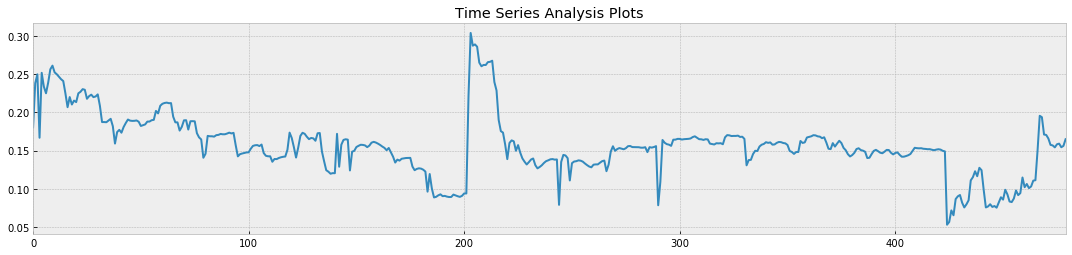

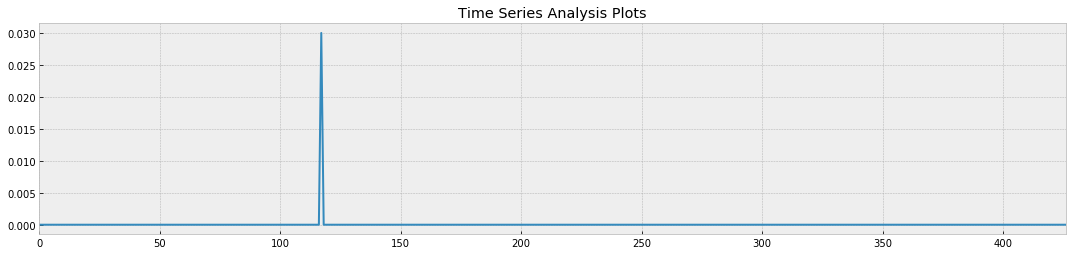

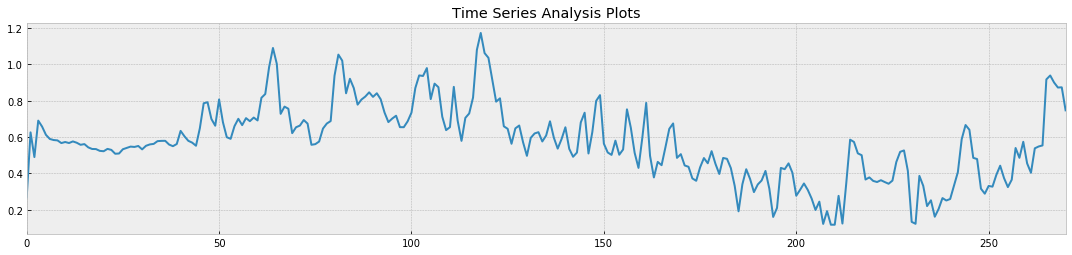

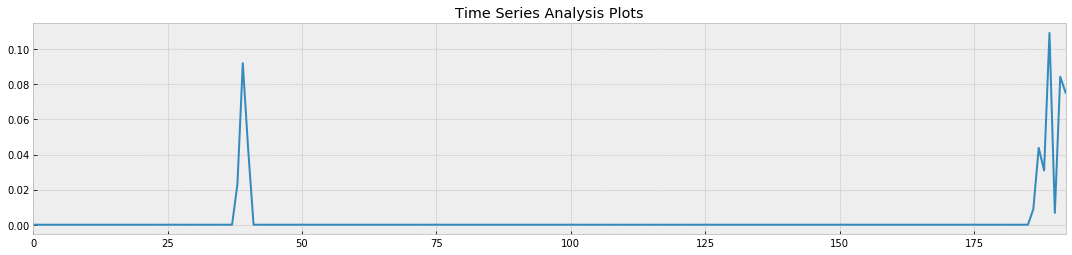

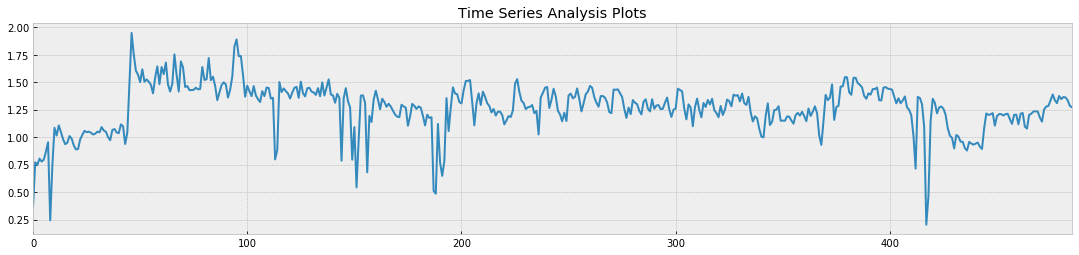

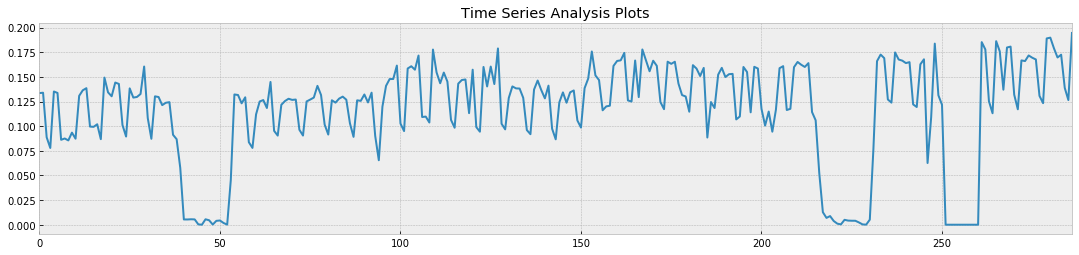

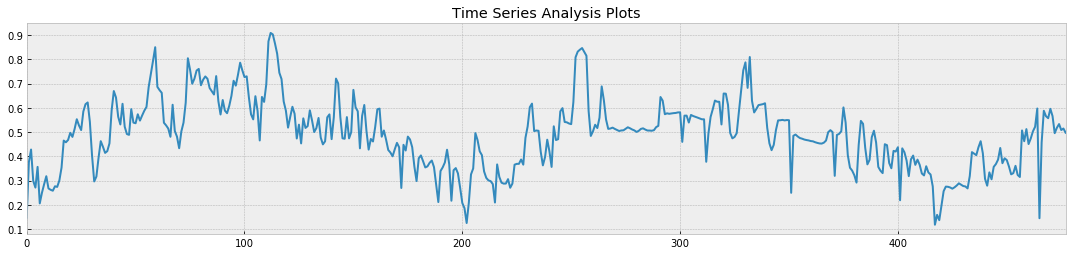

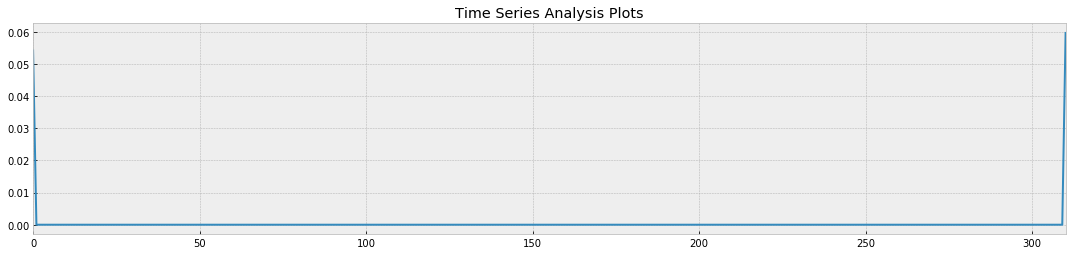

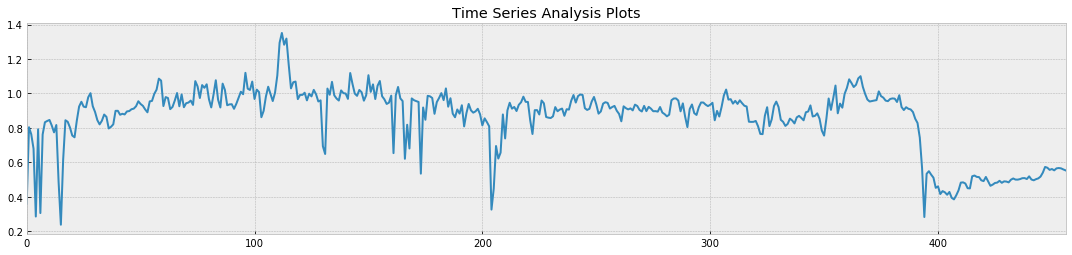

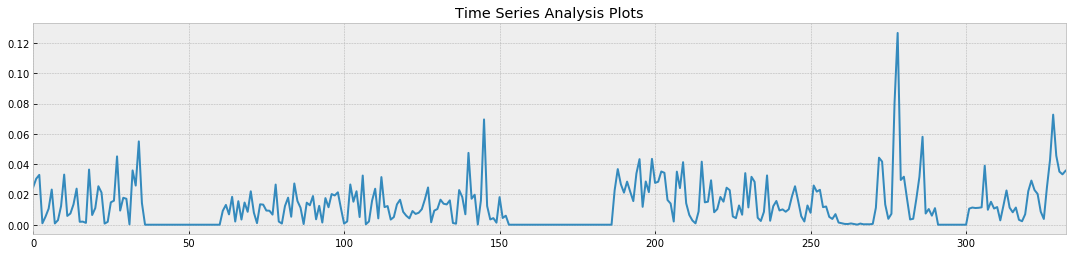

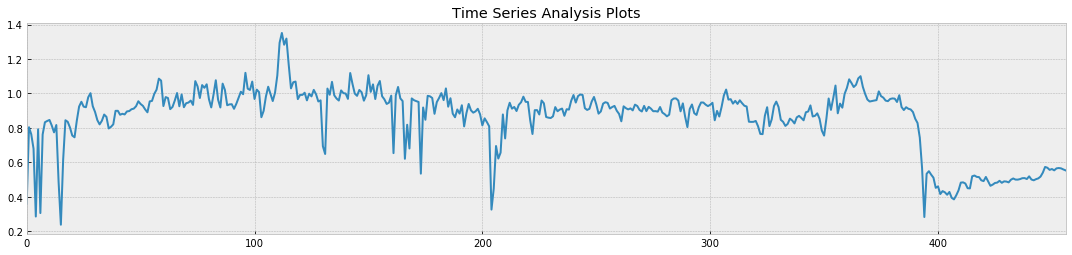

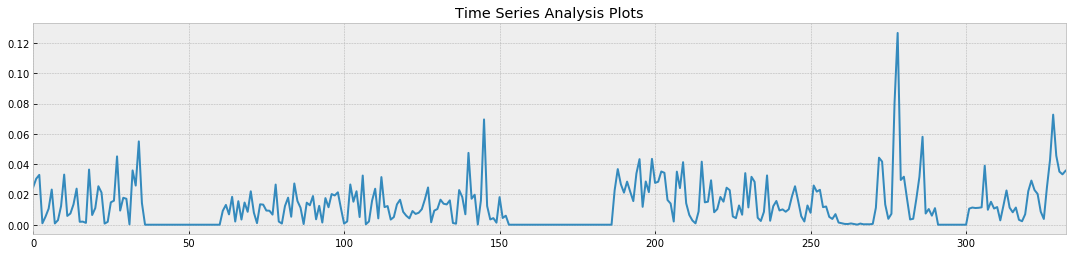

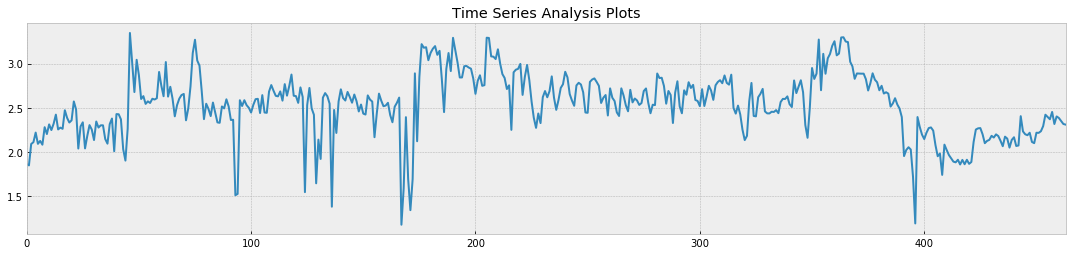

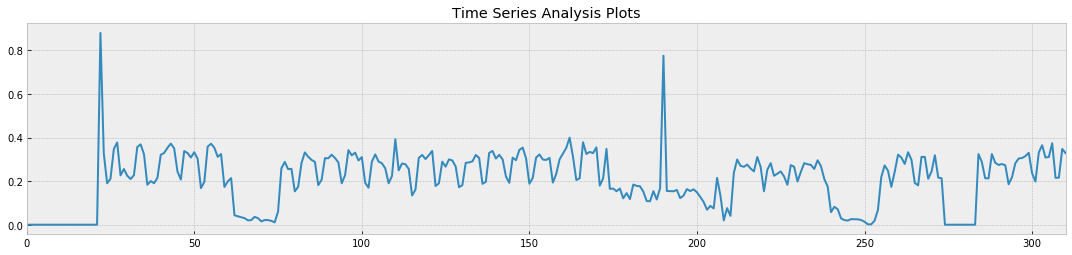

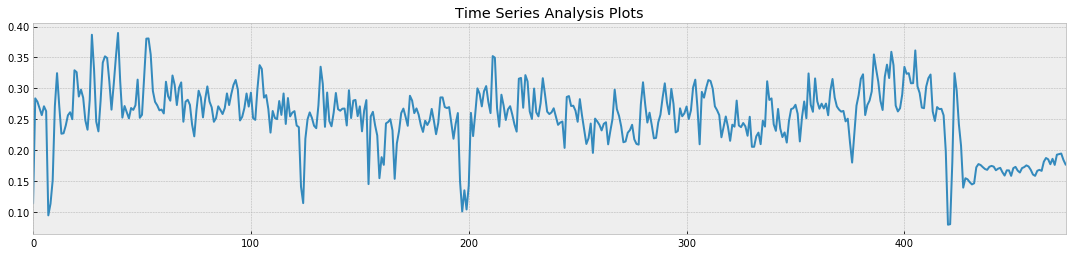

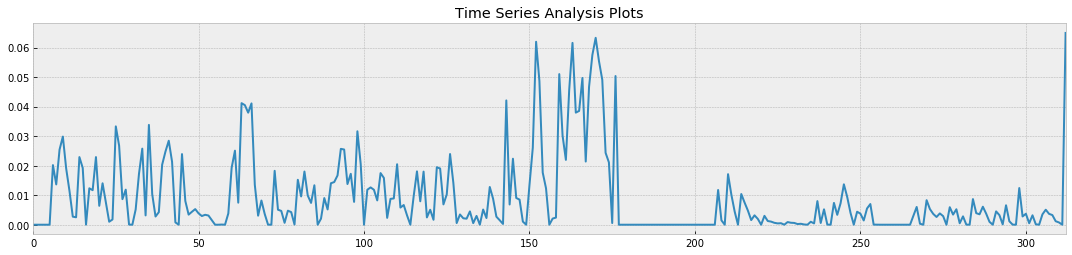

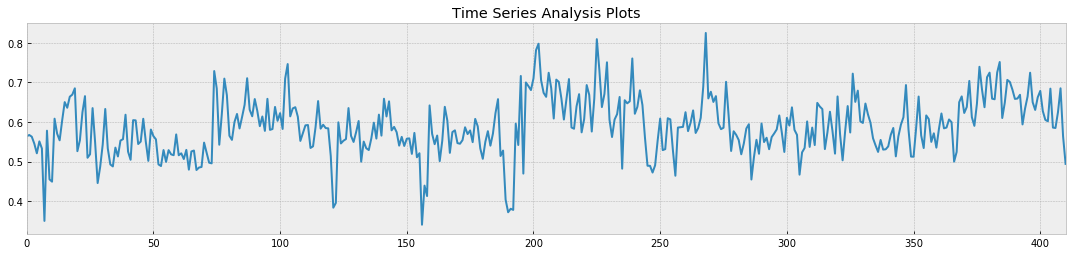

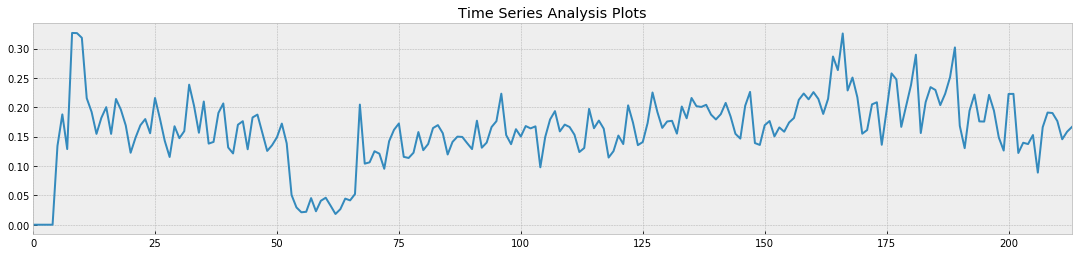

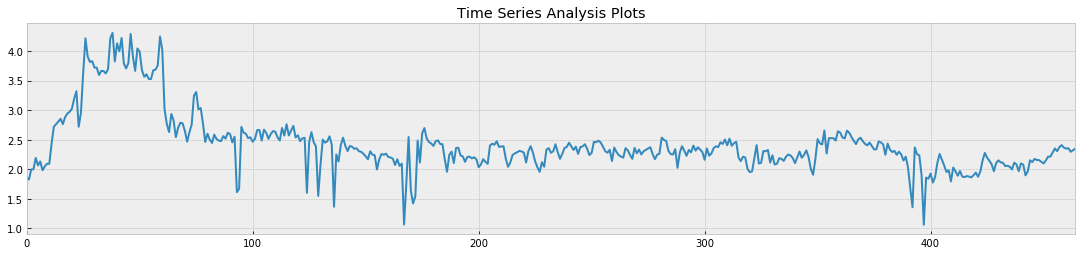

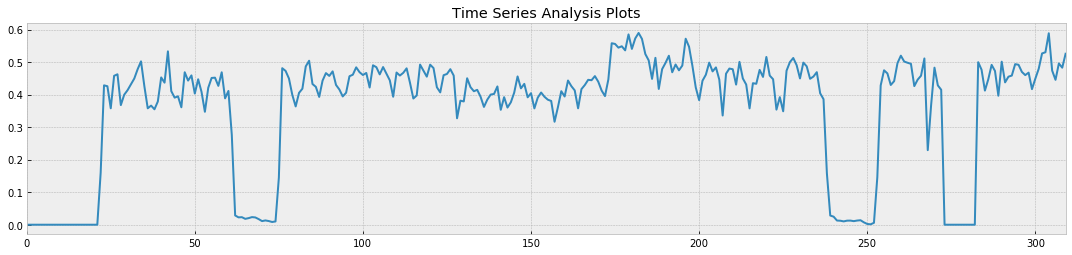

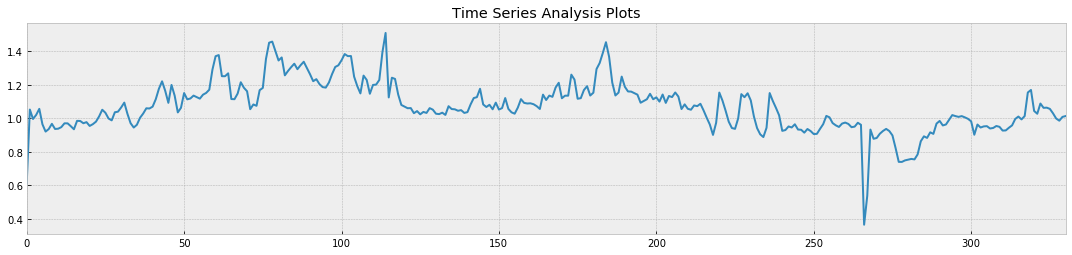

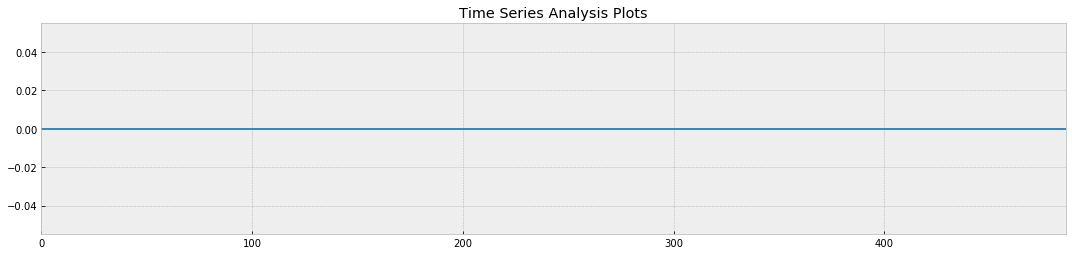

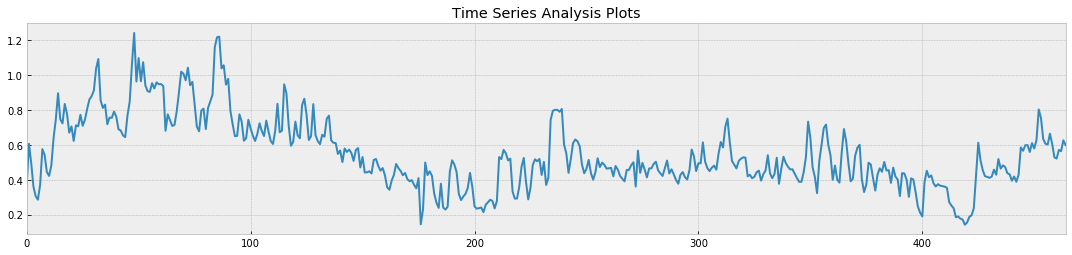

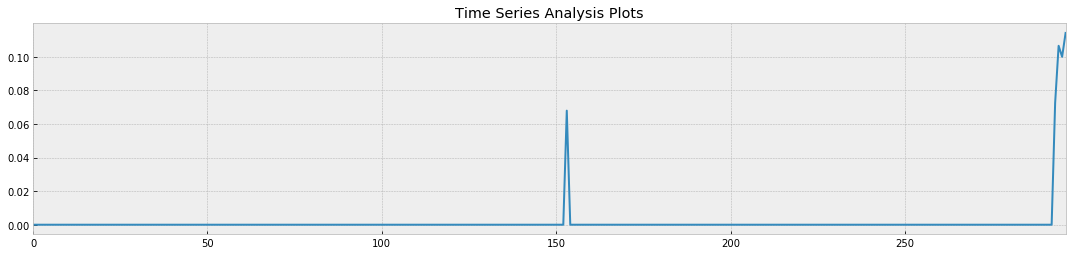

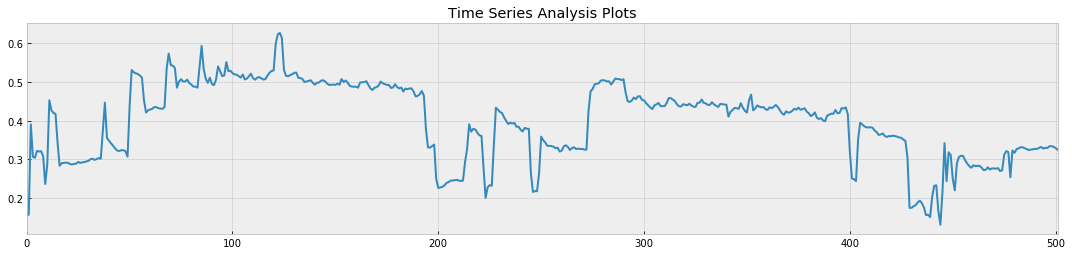

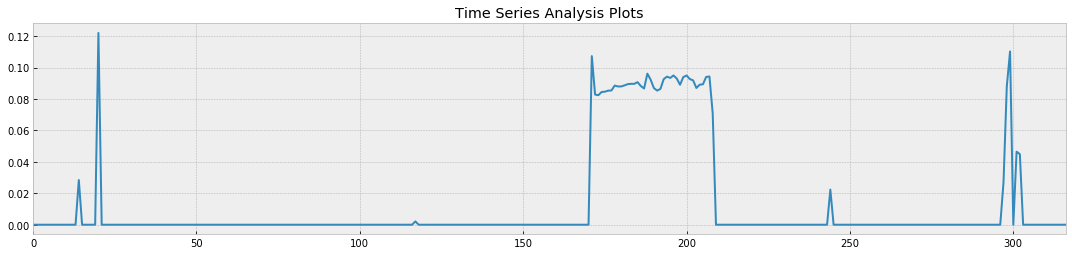

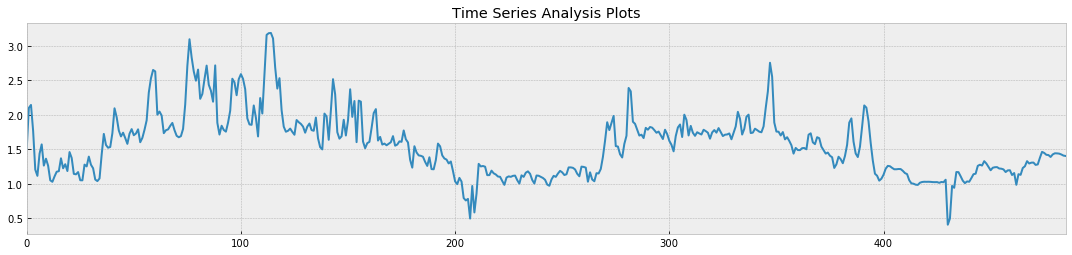

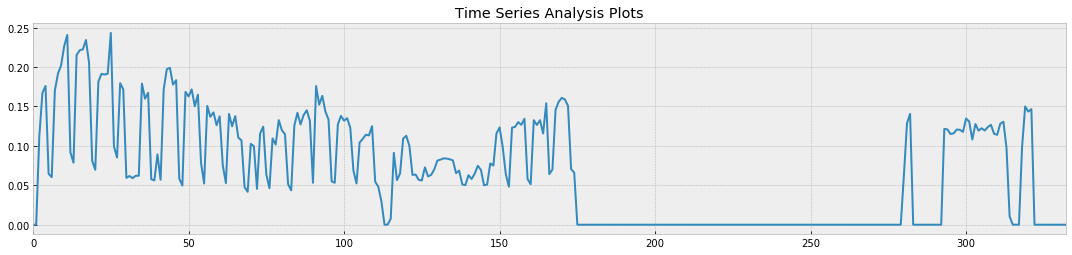

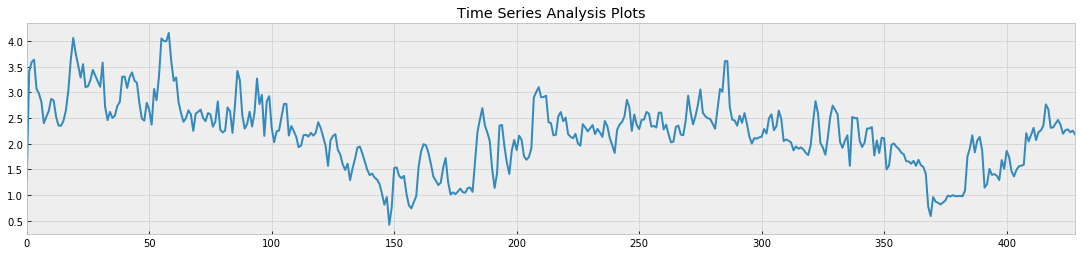

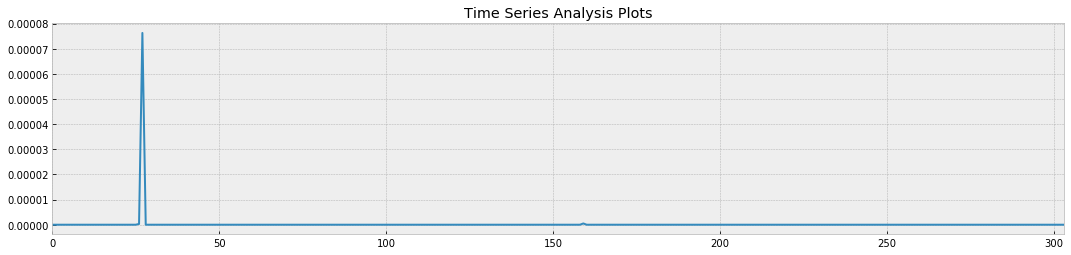

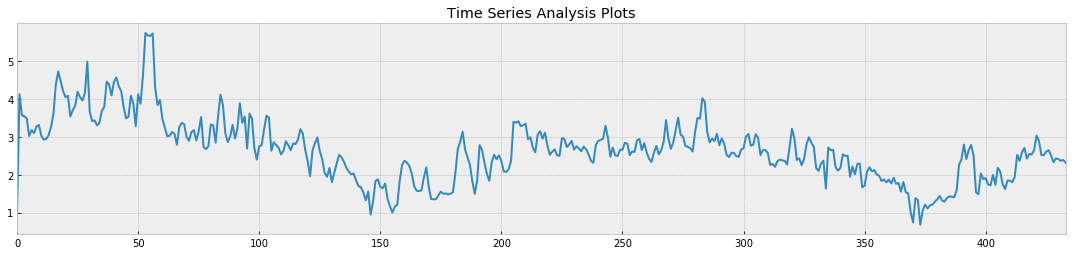

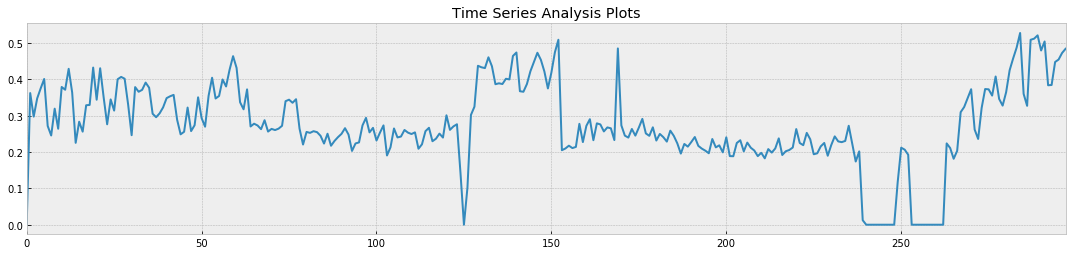

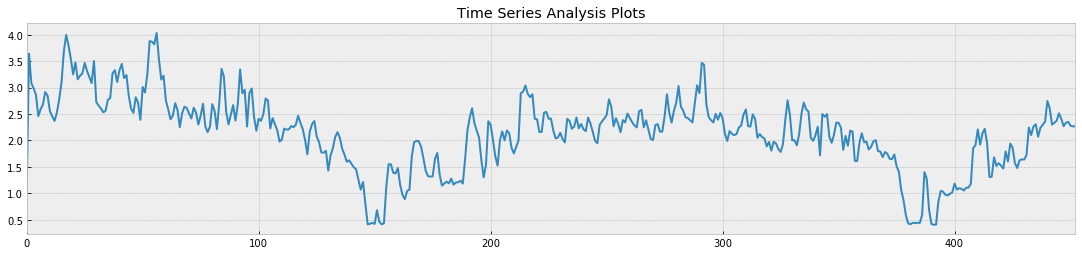

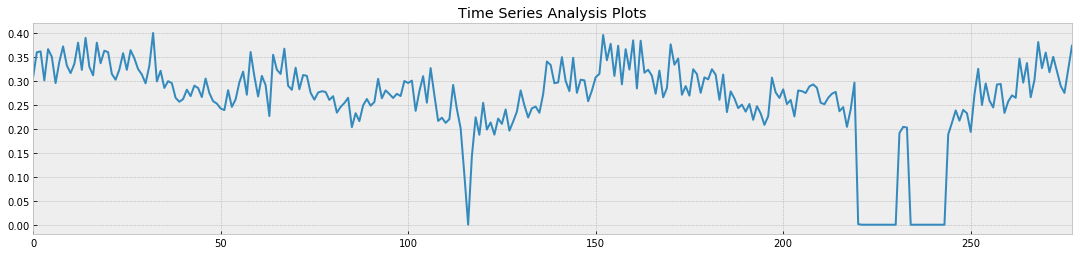

In [6]:
timeseries_water, timeseries_el, timeseries_heat = get_data(engine)

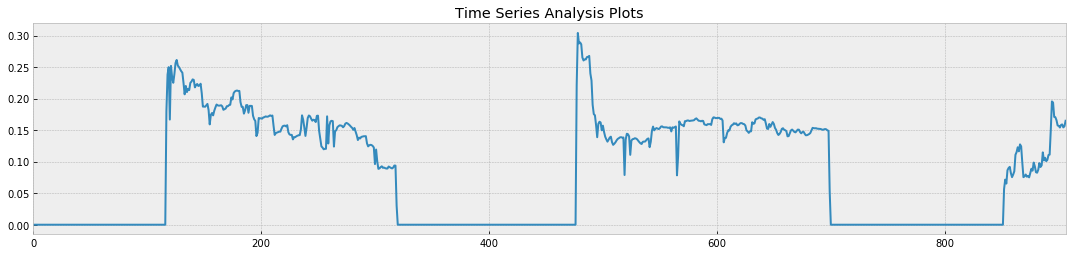

In [663]:
df = timeseries_heat[0]#[:-220]#['2014-01-01':]
#df = timeseries_[0]
tsplot_only(np.array(df.ec_d))

In [664]:
X_y = get_features(df, engine, lags = False)#[:-100]

In [665]:
#y_train, y_test = timeseries_water[1][:-100], timeseries_water[1][-100:] 

In [666]:
X_y_train_features, X_y_test_features =  X_y[:-200], X_y[-200:] 

y_train, y_test = X_y_train_features.ec_d, X_y_test_features.ec_d
X_train = X_y_train_features.drop('ec_d', axis = 1)
X_test = X_y_test_features.drop('ec_d', axis = 1)

In [667]:
X_train

,is_holiday,temperature,sun_time,weekday,is_holidaylag1,is_holidaylag2,is_holidaylag3,is_holidaylag4,is_holidaylag5,is_holidaylag6,...,temperaturelag4,temperaturelag5,temperaturelag6,sun_timelag1,sun_timelag2,sun_timelag3,sun_timelag4,sun_timelag5,sun_timelag6,heat_off
2018-06-13,0,16.5500,17.398631,2,1.0,1.0,1.0,1.0,0.0,0.0,...,10.1625,12.1375,10.9375,17.378900,17.357190,17.333528,17.307946,17.280475,17.251151,0
2018-06-14,0,13.2125,17.416356,3,0.0,1.0,1.0,1.0,1.0,0.0,...,9.8125,10.1625,12.1375,17.398631,17.378900,17.357190,17.333528,17.307946,17.280475,0
2018-06-15,0,15.9625,17.432053,4,0.0,0.0,1.0,1.0,1.0,1.0,...,13.8000,9.8125,10.1625,17.416356,17.398631,17.378900,17.357190,17.333528,17.307946,0
2018-06-16,1,17.5125,17.445698,5,0.0,0.0,0.0,1.0,1.0,1.0,...,16.9000,13.8000,9.8125,17.432053,17.416356,17.398631,17.378900,17.357190,17.333528,0
2018-06-17,1,19.1500,17.457276,6,1.0,0.0,0.0,0.0,1.0,1.0,...,16.5500,16.9000,13.8000,17.445698,17.432053,17.416356,17.398631,17.378900,17.357190,0
2018-06-18,0,21.2125,17.466769,0,1.0,1.0,0.0,0.0,0.0,1.0,...,13.2125,16.5500,16.9000,17.457276,17.445698,17.432053,17.416356,17.398631,17.378900,0
2018-06-19,0,20.9875,17.474165,1,0.0,1.0,1.0,0.0,0.0,0.0,...,15.9625,13.2125,16.5500,17.466769,17.457276,17.445698,17.432053,17.416356,17.398631,0
2018-06-20,0,19.4500,17.479455,2,0.0,0.0,1.0,1.0,0.0,0.0,...,17.5125,15.9625,13.2125,17.474165,17.466769,17.457276,17.445698,17.432053,17.416356,0
2018-06-21,0,18.3375,17.482632,3,0.0,0.0,0.0,1.0,1.0,0.0,...,19.1500,17.5125,15.9625,17.479455,17.474165,17.466769,17.457276,17.445698,17.432053,0
2018-06-22,0,22.9625,17.483691,4,0.0,0.0,0.0,0.0,1.0,1.0,...,21.2125,19.1500,17.5125,17.482632,17.479455,17.474165,17.466769,17.457276,17.445698,0


Выбор признаков

In [523]:
all_features = ['is_holiday', 'temperature', 'sun_time', 'weekday', 'temperaturelag1', 'temperaturelag2',
       'temperaturelag3',  'heat_off']
# 'temperaturelag4', 'temperaturelag5', 'temperaturelag6','is_holidaylag1', 'is_holidaylag2', 'is_holidaylag3', 'is_holidaylag4', 'is_holidaylag5', 'is_holidaylag6', 
# 'sun_timelag1', 'sun_timelag2', 'sun_timelag3','sun_timelag4', 'sun_timelag5', 'sun_timelag6', 

selected_features = ['temperature', 'sun_time', 'weekday', 'is_holiday']
selected_features = all_features

In [524]:
selected_features = select_features(X_y, engine, max_features = 10, target = "ec_d")

901
901
901
901
[{'sun_time': 263, 'temperature': 258, 'temperaturelag6': 146, 'temperaturelag3': 127, 'temperaturelag1': 127, 'temperaturelag2': 127, 'temperaturelag4': 119, 'temperaturelag5': 116, 'is_holiday': 47, 'weekday': 39}, {'ec_d': 1.0, 'heat_off': 0.8085429740579507, 'sun_timelag6': 0.8053349315162589, 'sun_timelag5': 0.8026321092903784, 'sun_timelag4': 0.7997080979094311, 'temperaturelag2': 0.7994292757983641, 'temperaturelag3': 0.7993360407848836, 'temperaturelag4': 0.7982369730660286, 'temperaturelag1': 0.7976245819744744, 'temperaturelag5': 0.7973525616510032}, {}]


In [525]:
selected_features

array(['temperaturelag1', 'temperaturelag2', 'temperaturelag3',
       'temperaturelag4', 'temperaturelag5'], dtype=object)

In [526]:
selected_features = ['temperature', 'sun_time', 'weekday', 'is_holiday']


### SARIMAX
Перебор гиперпараметров: p = d = q = range(0, 2)

In [527]:
def fit_sarimax(X_train, X_test, y_train, y_test):
    print("FITTING SARIMAX")

    p = d = q = range(0, 2)
    pdq = [(x[0], 1,  2) for x in list(itertools.product(p))]#,7
    seasonal_pdq = [(x[0], 1, 1, 7) for x in list(itertools.product(p))]
    res = []

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    print(param)
                    mod = sm.tsa.statespace.SARIMAX(y_train,
                                                    order=param,
                                                    exog=X_train,
                                                    seasonal_order=param_seasonal,
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False)

                    results = mod.fit(disp=False)


                    pred = results.get_prediction(end=results.nobs + len(X_test) - 1, exog = X_test)

                    y_pred = pred.predicted_mean
                    y_obs  = y_test#[-100:]


                    mse  = ((y_pred - y_obs) ** 2).mean()
                    rmse = math.sqrt(mse)
                    cv   = 100 * rmse / y_obs.mean()
                    mape = 100 *((y_pred - y_obs)/y_obs).abs().mean()

                    res.append([param, param_seasonal, results.aic, cv, mape, mse, rmse, results])

                except Exception as e:
                    print('SARIMAX:\n', traceback.format_exc())
                    continue
    return(res)

In [528]:
models = fit_sarimax(X_train[selected_features], X_test[selected_features], y_train, y_test)
model = models[0][-1]

FITTING SARIMAX
(0, 1, 2)
(0, 1, 2)
(1, 1, 2)
(1, 1, 2)


In [529]:
train_pred = model.get_prediction(end=model.nobs - 1).predicted_mean
test_pred = model.get_prediction(end=model.nobs + len(X_test) - 1, exog = X_test[selected_features]).predicted_mean[-len(X_test):]


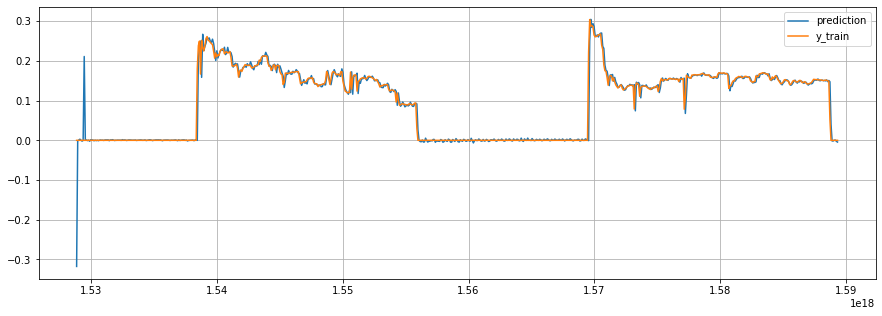

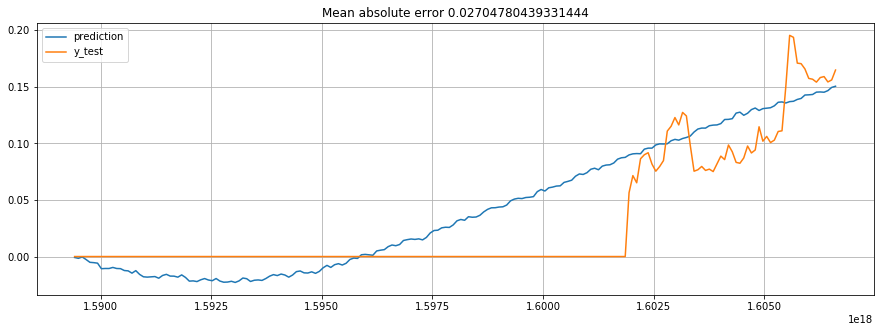

In [530]:
model_result_plot(train_pred, y_train, test_pred, y_test)

### Динамические линейные модели

In [531]:
from fbprophet import Prophet

#### Prophet

Prophet считает, что временной ряд может быть разложен следующим образом:

y(t)=g(t)+s(t)+h(t)+ε(t),

g(t) — тренд,

s(t) — сезонность,

h(t) — каникулы, т.е аномальные данные,

ε(t) — ошибки.

Отобранные неавторегрессионные признаки добавляем в модель как регрессор.

1) переделаем датафрейм для prophet

In [532]:
X_y_train_features_prophet = X_y_train_features.rename(columns={'ec_d': "y" })
X_y_train_features_prophet = X_y_train_features_prophet.reset_index()
X_y_train_features_prophet = X_y_train_features_prophet.rename(columns={'index': "ds" })

#X_y_train_features_prophet = X_y_train_features.rename(columns={'ec_d': "y" })
#X_y_train_features_prophet = X_y_train_features_prophet.reset_index()
#X_y_train_features_prophet = X_y_train_features_prophet.rename(columns={'index': "ds" })


In [533]:
X_y_test_features_prophet = X_y_test_features.reset_index()
X_y_test_features_prophet = X_y_test_features_prophet.rename(columns={'index': "ds" })


2) получим отобранные признаки и добавим их как регрессор

In [534]:
selected_features = ['temperature', 'sun_time', 'weekday', 'is_holiday']

In [535]:
m = Prophet()
for feature in selected_features:
    m.add_regressor(feature, prior_scale=0.5, mode='multiplicative')
m.yearly_seasonality = True
m.weekly_seasonality = True
#m.add_seasonality(name="quaterly", period = 365.25/4, fourier_order=1, prior_scale = 15)
#m.add_seasonality(name="yearly", period = 365.25, fourier_order=2, prior_scale = 30)
m.fit(X_y_train_features_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [536]:
test_pred = m.predict(X_y_test_features_prophet)
train_pred = m.predict(X_y_train_features_prophet)

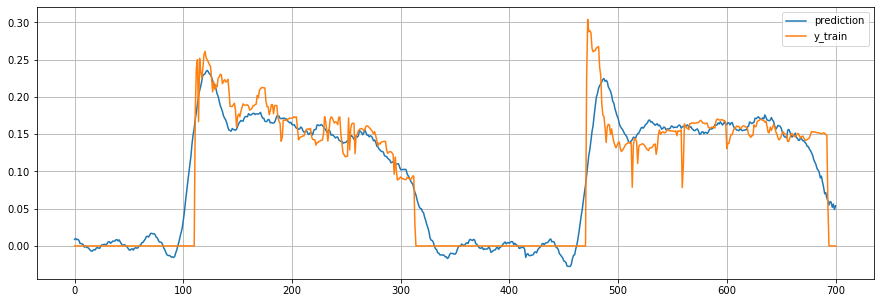

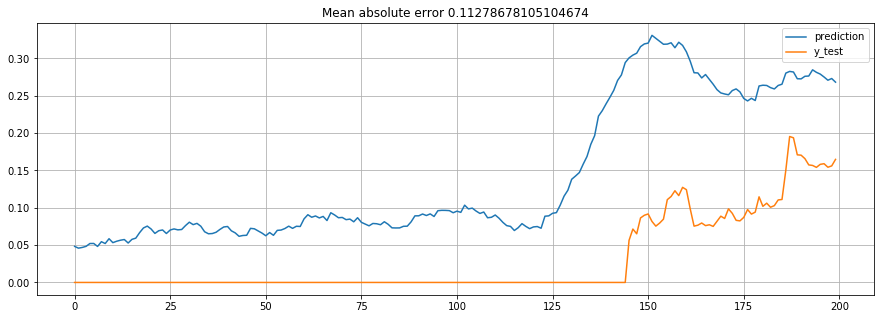

In [537]:
model_result_plot(train_pred.yhat.values, y_train.values, test_pred.yhat.values, y_test.values)

Средняя ошибка

In [538]:
mean_absolute_error(pred.yhat, X_y_test_features_prophet.ec_d)

3008.8622642998043

Стандартные модели машинного обучения
XGBoost

In [539]:
def model_plot(model, x_train, x_test):
    

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = model.predict(x_train)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)
    # запоминаем ошибку на трейне
    deviation = mean_absolute_error(prediction_train.yhat, X_y_test_features_prophet.ec_d)
    # и на тестовом
    prediction_test = model.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()

In [540]:
import xgboost as xgb

def XGB_forecast(X_train, X_test, y_train, y_test , test_size=0.15, scale=1.96):#data

    # исходные данные
    #X_train, X_test, y_train, y_test = train_test_split(data,  test_size)
    #print(X_train)
    #print(X_test)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:squarederror',#'objective': 'reg:linear',
        'booster':'gbtree'#'booster':'gblinear'
    }
    trees = 100

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())
    
    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]
    print('deviation', deviation)
    
    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    '''plt.figure(figsize=(15, 5))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)
    '''
    prediction_test = []
    pred = y_train.values[-1]
    
    if ('lag1' in X_test.columns):
        for ind, row in X_test.iterrows():
            ww = []
            for i in row.values:
                ww.append(i)
            cols = []
            for i in X_test.columns.values:
                cols.append(i)
            pdtest = pd.DataFrame([ww], columns = cols)
            pdtest['lag1'] = pred
            dtest = xgb.DMatrix(pdtest)
            pred = bst.predict(dtest)
            prediction_test.append(pred[0])
    else:
        prediction_test = bst.predict(dtest)
    # и на тестовом
    #
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation
    #print(y_test)
    #print(lower)
    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]
    '''
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    #print(prediction_test, y_test)
    plt.title("XGBoost Mean absolute error {} ".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()'''
    model_result_plot(prediction_train, y_train.values, prediction_test, y_test.values)
    return prediction_test
    


In [541]:
#X_y_xgb[-1:].ec_d.values[0]

In [581]:
selected_features = ['temperature', 'sun_time', 'weekday', 'is_holiday',  'heat_off', 'lag1']
#selected_features = all_features

In [543]:
#X_y_xgb = df
#X_y_xgb = get_features(X_y_xgb, engine, lags = True)
#X_y_xgb = X_y_xgb[selected_features]

In [570]:
X_train

,is_holiday,temperature,sun_time,weekday,is_holidaylag1,is_holidaylag2,is_holidaylag3,is_holidaylag4,is_holidaylag5,is_holidaylag6,...,lag356,lag357,lag358,lag359,lag360,lag361,lag362,lag363,lag364,heat_off
2019-06-06,0,22.2750,17.220008,3,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-07,0,23.8125,17.251151,4,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-08,1,24.7000,17.280475,5,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-09,1,24.8250,17.307946,6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-10,0,23.3625,17.333528,0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-11,1,22.8000,17.357190,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-12,1,19.8125,17.378900,2,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-13,0,15.0875,17.398631,3,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-14,0,16.7000,17.416356,4,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-06-15,1,16.3875,17.432053,5,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [577]:
X_train.columns

Index(['is_holiday', 'temperature', 'sun_time', 'weekday', 'is_holidaylag1',
       'is_holidaylag2', 'is_holidaylag3', 'is_holidaylag4', 'is_holidaylag5',
       'is_holidaylag6',
       ...
       'lag356', 'lag357', 'lag358', 'lag359', 'lag360', 'lag361', 'lag362',
       'lag363', 'lag364', 'heat_off'],
      dtype='object', length=387)

Если добавлять lag1

deviation 0.014797


[0.002788866,
 0.002788866,
 0.002788866,
 0.0033674315,
 0.0033674315,
 0.0033674315,
 0.002788866,
 0.0033674315,
 0.0033674315,
 0.0033674315,
 0.002788866,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002788866,
 0.002788866,
 0.0033674315,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,
 0.002522768,

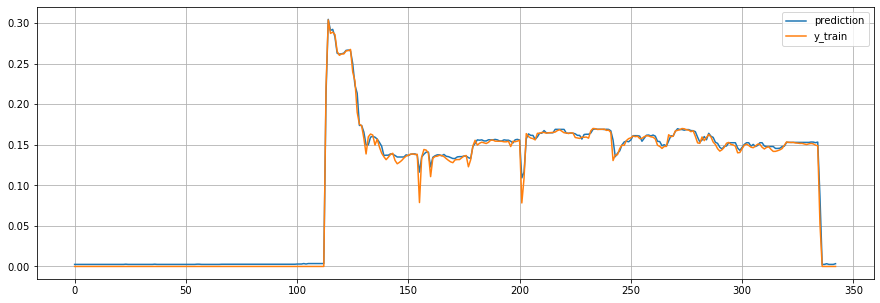

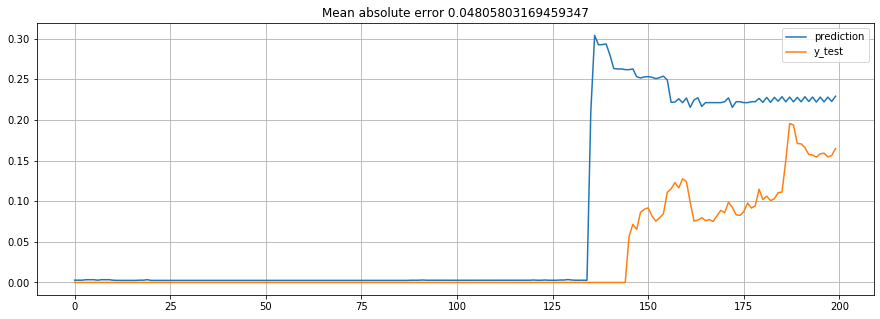

In [582]:
XGB_forecast(X_train[selected_features], X_test[selected_features], y_train, y_test) 

Если не добавлять lag1

deviation 0.0302941


array([ 2.4133265e-02, -7.8677535e-03, -4.0352689e-03,  1.1815343e-02,
        3.5418328e-02,  3.4281768e-02,  1.9392098e-03,  1.5113271e-02,
        4.2998549e-02,  8.8046730e-02,  4.6252754e-02,  1.2117971e-01,
        1.4972863e-01,  1.0743502e-01,  9.7333513e-02,  6.4337566e-02,
        2.3123096e-03,  3.5597646e-04, -9.5529837e-04, -3.1337601e-03,
       -4.7584460e-04, -2.9998664e-03, -2.0036844e-03,  2.5871394e-02,
        3.7024878e-02, -6.6600449e-05, -6.6600449e-05, -2.3029262e-04,
        1.6962535e-04, -3.7016976e-04, -6.6600449e-05, -6.6600449e-05,
       -3.5285577e-04,  3.5982681e-03,  2.9401490e-03, -1.2545185e-03,
       -3.1014398e-04, -6.6600449e-05, -6.6600449e-05, -6.6600449e-05,
       -6.6600449e-05, -2.3029262e-04, -4.7383620e-04, -3.1014398e-04,
       -6.6600449e-05, -6.6600449e-05, -6.6600449e-05, -6.6600449e-05,
       -2.3029262e-04, -4.7383620e-04, -3.1014398e-04, -6.6600449e-05,
       -6.6600449e-05, -6.6600449e-05, -6.6600449e-05, -2.3029262e-04,
      

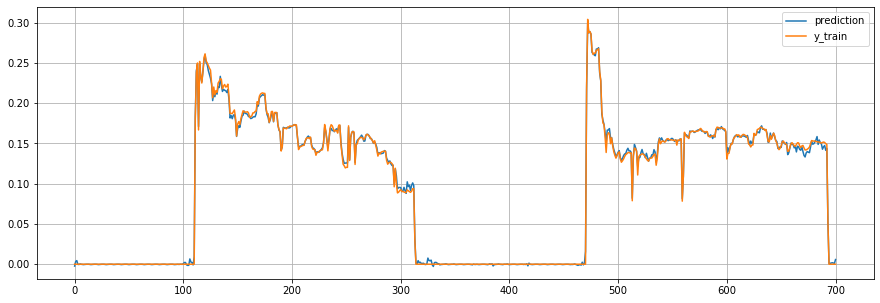

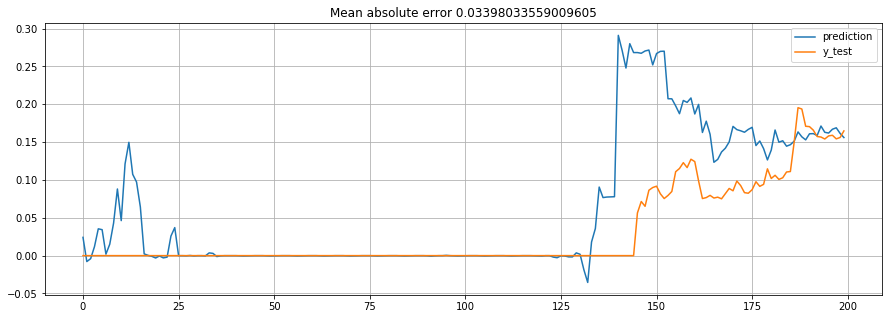

In [545]:
XGB_forecast(X_train, X_test, y_train, y_test) 

In [559]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(365, 30))# 7,7, , 90, 30
model = estimator.fit(y_train)
# Forecast 365 days ahead
#y_forecast = model.forecast(steps=365)


In [560]:
test_pred = model.forecast(steps=365)


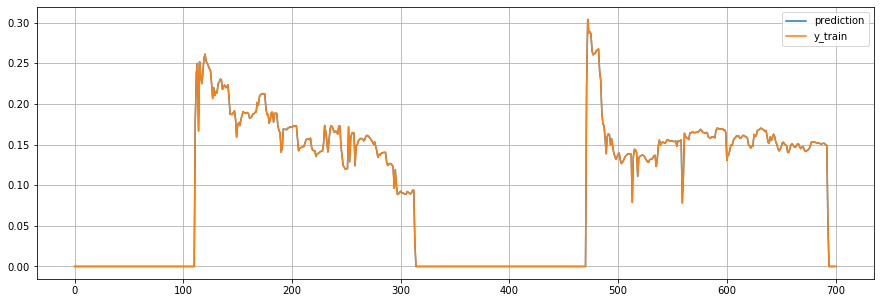

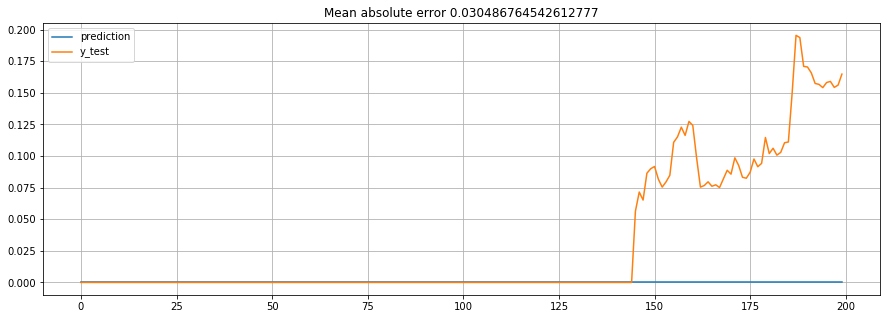

In [561]:
model_result_plot(y_train.values, y_train.values, test_pred[:len(y_test)], y_test.values)

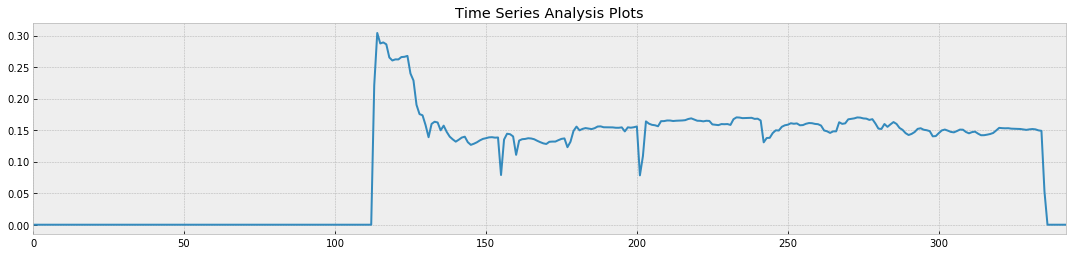

In [600]:
tsplot_only(y_train.values)

In [619]:
X_train

,is_holiday,temperature,sun_time,weekday,is_holidaylag1,is_holidaylag2,is_holidaylag3,is_holidaylag4,is_holidaylag5,is_holidaylag6,...,lag356,lag357,lag358,lag359,lag360,lag361,lag362,lag363,lag364,heat_off


In [668]:
from pygam import LinearGAM, s, f

gam = LinearGAM(s(0) + s(1) + f(2)).fit(X_train, y_train)#[selected_features]


In [669]:
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    215.6677
Link Function:                     IdentityLink Log Likelihood:                                -134632.476
Number of Samples:                          701 AIC:                                           269698.2873
                                                AICc:                                          269893.4389
                                                GCV:                                                0.0037
                                                Scale:                                              0.0018
                                                Pseudo R-Squared:                                   0.8271
Feature Function                  Lam

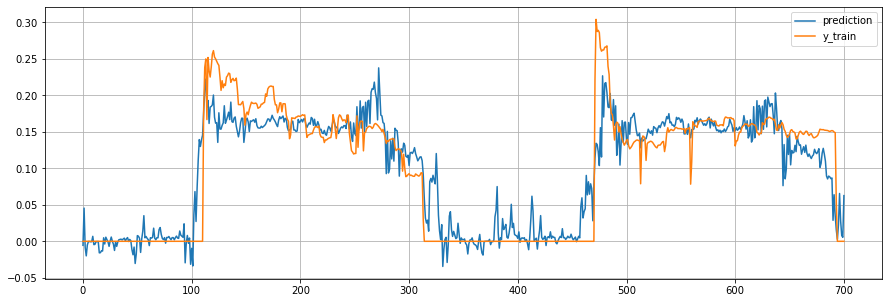

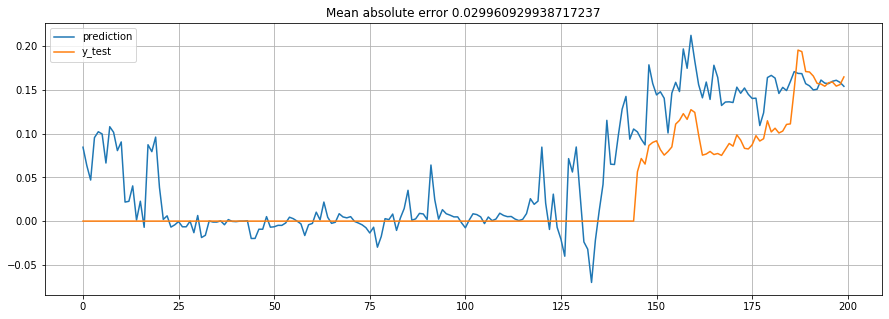

In [670]:
test_pred = gam.predict(X_test)#[selected_features]
train_pred = gam.predict(X_train)#[selected_features]
model_result_plot(train_pred, y_train.values, test_pred, y_test.values)

In [608]:
import numpy as np

lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam.gridsearch(X_train, y_train, lam=lams)
gam.summary()


100% (125 of 125) |######################| Elapsed Time: 0:02:30 Time:  0:02:30


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.4486
Link Function:                     IdentityLink Log Likelihood:                                 -2421.8749
Number of Samples:                         1141 AIC:                                             4866.6469
                                                AICc:                                            4866.8995
                                                GCV:                                                0.1675
                                                Scale:                                              0.1648
                                                Pseudo R-Squared:                                   0.6896
Feature Function                  Lam

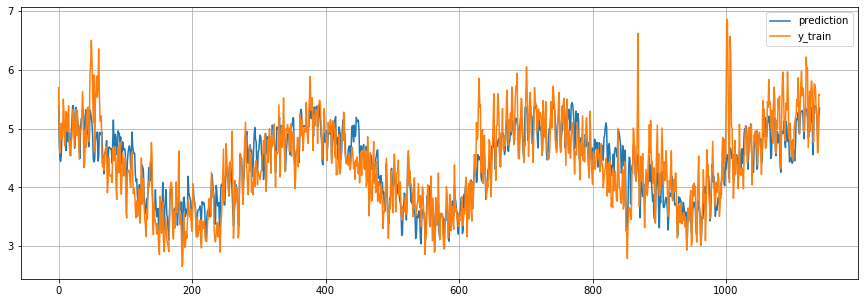

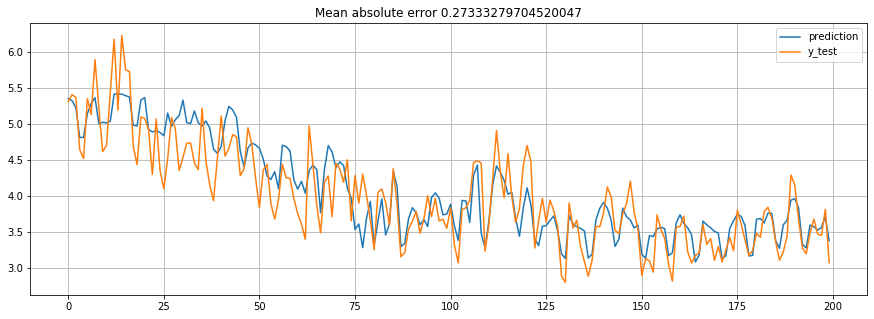

In [609]:
test_pred = gam.predict(X_test)
train_pred = gam.predict(X_train)
model_result_plot(train_pred, y_train.values, test_pred, y_test.values)

Сравнение с автомл

In [499]:

from lightautoml.automl.base import AutoML
from lightautoml.ml_algo.boost_lgbm import BoostLGBM
from lightautoml.ml_algo.tuning.optuna import OptunaTuner
from lightautoml.pipelines.features.lgb_pipeline import LGBSimpleFeatures
from lightautoml.pipelines.ml.base import MLPipeline
from lightautoml.pipelines.selection.importance_based import ImportanceCutoffSelector, ModelBasedImportanceEstimator
from lightautoml.reader.base import PandasToPandasReader
from lightautoml.tasks import Task
from lightautoml.utils.profiler import Profiler
from lightautoml.automl.blend import WeightedBlender

In [500]:
N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TARGET_NAME = 'TARGET' # Target column name

In [552]:
X_y_train_features, X_y_test_features =  X_y[:-200], X_y[-200:] 

y_train, y_test = X_y_train_features.ec_d, X_y_test_features.ec_d
X_train = X_y_train_features.drop('ec_d', axis = 1)
X_test = X_y_test_features.drop('ec_d', axis = 1)

In [501]:
import pandas as pd
from sklearn.metrics import f1_score
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

#df_train, df_test = pd.read_csv('../input/titanic/train.csv'), pd.read_csv('../input/titanic/test.csv')

automl = TabularAutoML(task = Task('binary', metric = lambda y_true, y_pred: f1_score(y_true, (y_pred > 0.5)*1)))
oof_pred = automl.fit_predict(X_y_train_features,  roles = {'target': 'ec_d'})#, 'drop': ['PassengerId']
test_pred = automl.predict(X_y_test_features)

pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived': (test_pred.data[:, 0] > 0.5)*1}).to_csv('submit.csv', index = False)

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:
- time: 3600 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (426, 24)


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [502]:
# Standard python libraries
import os
import time
import re

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task
from lightautoml.utils.profiler import Profiler

In [503]:
N_THREADS = 4 # threads cnt for lightautoml
RANDOM_STATE = 42 # fixed random state for various reasons
TIMEOUT = 6 * 3600 # Time in seconds for automl run


In [504]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [506]:
%%time
def rmse(y_true, y_pred, **kwargs):
    return mean_squared_error(y_true, y_pred, squared = False, **kwargs)

task = Task('reg')


Wall time: 6.48 ms


In [510]:
%%time

roles = {
    'target': 'ec_d',
    #'drop': ['id'],
}

Wall time: 0 ns


In [514]:
%%time 

automl = TabularUtilizedAutoML(task = task, 
                               timeout = TIMEOUT,
                               cpu_limit = N_THREADS,
                               reader_params = {'n_jobs': N_THREADS},
                               general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]}, # Use only linear models and LGBM and no CatBoost
                               tuning_params = {'max_tuning_time': 25 * 60}, # Set 25 minutes for LGBM params tuning
                               lgb_params = {'default_params': {'num_trees': 100000, 'learning_rate': 0.005, 'early_stopping_rounds': 1000}, # Set smaller LR and more ES rounds
                                             'freeze_defaults': True},
                              )


Wall time: 28.9 ms


In [515]:
roles

{'target': 'ec_d'}

In [516]:
oof_pred = automl.fit_predict(X_y_train_features, roles = roles)


Current random state: {'reader_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
Found reader_params in kwargs, need to combine
Merged variant for reader_params = {'n_jobs': 4, 'random_state': 42}
Found general_params in kwargs, need to combine
Merged variant for general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']], 'return_all_predictions': False}
Start automl preset with listed constraints:
- time: 21599.99103498459 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (426, 24)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 21599.151607513428 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -7949.982628845485
Linear model: C = 5e-05 score = -7336.854534973992
Linear model: C = 0.0001 score = -6926.823948914457
Linear model: C = 0.0005 score = -6056.710580124054
Linear model: C 

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-9e75c9cc-14c4-43c4-8e04-76251fbe3518


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6692
[200]	valid's l2: 5954.8
[300]	valid's l2: 5638.59
[400]	valid's l2: 5444.71
[500]	valid's l2: 5323.32
[600]	valid's l2: 5249.9
[700]	valid's l2: 5205.44
[800]	valid's l2: 5172.05
[900]	valid's l2: 5170.02
[1000]	valid's l2: 5164.79
[1100]	valid's l2: 5146.35
[1200]	valid's l2: 5119.21
[1300]	valid's l2: 5102.54
[1400]	valid's l2: 5087.73
[1500]	valid's l2: 5063.88
[1600]	valid's l2: 5025.39
[1700]	valid's l2: 5003.91
[1800]	valid's l2: 4975.54
[1900]	valid's l2: 4951.68
[2000]	valid's l2: 4931.35
[2100]	valid's l2: 4912.22
[2200]	valid's l2: 4896.05
[2300]	valid's l2: 4876.42
[2400]	valid's l2: 4854.28
[2500]	valid's l2: 4836.76
[2600]	valid's l2: 4821.78
[2700]	valid's l2: 4804.44
[2800]	valid's l2: 4791.46
[2900]	valid's l2: 4783.09
[3000]	valid's l2: 4764.2
[3100]	valid's l2: 4753.

INFO:optuna.study:Trial 0 finished with value: -4531.315074353829 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6970.44
[200]	valid's l2: 6268.88
[300]	valid's l2: 5881.25
[400]	valid's l2: 5658.26
[500]	valid's l2: 5487.87
[600]	valid's l2: 5400.26
[700]	valid's l2: 5332.57
[800]	valid's l2: 5281.9
[900]	valid's l2: 5243.29
[1000]	valid's l2: 5223.23
[1100]	valid's l2: 5210.78
[1200]	valid's l2: 5194.57
[1300]	valid's l2: 5195.01
[1400]	valid's l2: 5191.72
[1500]	valid's l2: 5197.84
[1600]	valid's l2: 5174.98
[1700]	valid's l2: 5158.92
[1800]	valid's l2: 5138.99
[1900]	valid's l2: 5129.89
[2000]	valid's l2: 5105.75
[2100]	valid's l2: 5089.71
[2200]	valid's l2: 5067.8
[2300]	valid's l2: 5059.71
[2400]	valid's l2: 5046.89
[2500]	valid's l2: 5022.44
[2600]	valid's l2: 4999.62
[2700]	valid's l2: 4979.41
[2800]	valid's l2: 4964.07
[2900]	valid's l2: 4956.71
[3000]	valid's l2: 4942.26
[3100]	valid's l2: 4

INFO:optuna.study:Trial 1 finished with value: -4561.064463876107 and parameters: {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6786.25
[200]	valid's l2: 6050.66
[300]	valid's l2: 5685.51
[400]	valid's l2: 5467.92
[500]	valid's l2: 5352.87
[600]	valid's l2: 5299.21
[700]	valid's l2: 5280.19
[800]	valid's l2: 5276.03
[900]	valid's l2: 5300.4
[1000]	valid's l2: 5278.4
[1100]	valid's l2: 5262.55
[1200]	valid's l2: 5242.64
[1300]	valid's l2: 5227.2
[1400]	valid's l2: 5204.71
[1500]	valid's l2: 5208.12
[1600]	valid's l2: 5204.03
[1700]	valid's l2: 5193.22
[1800]	valid's l2: 5188.26
[1900]	valid's l2: 5194.44
[2000]	valid's l2: 5187.34
[2100]	valid's l2: 5173.93
[2200]	valid's l2: 5175.79
[2300]	valid's l2: 5163.81
[2400]	valid's l2: 5152.15
[2500]	valid's l2: 5156.87
[2600]	valid's l2: 5131.65
[2700]	valid's l2: 5107.29
[2800]	valid's l2: 5102.24
[2900]	valid's l2: 5083.53
[3000]	valid's l2: 5073.17
[3100]	valid's l2: 50

INFO:optuna.study:Trial 2 finished with value: -4899.899985271481 and parameters: {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6722.91
[200]	valid's l2: 5998.84
[300]	valid's l2: 5656.83
[400]	valid's l2: 5480.34
[500]	valid's l2: 5354.6
[600]	valid's l2: 5308.97
[700]	valid's l2: 5257.46
[800]	valid's l2: 5244.28
[900]	valid's l2: 5204.58
[1000]	valid's l2: 5186.59
[1100]	valid's l2: 5180.26
[1200]	valid's l2: 5149.53
[1300]	valid's l2: 5131.9
[1400]	valid's l2: 5122.4
[1500]	valid's l2: 5130.55
[1600]	valid's l2: 5091.67
[1700]	valid's l2: 5069.35
[1800]	valid's l2: 5036.75
[1900]	valid's l2: 5015.4
[2000]	valid's l2: 4985.76
[2100]	valid's l2: 4975.6
[2200]	valid's l2: 4945.24
[2300]	valid's l2: 4920.95
[2400]	valid's l2: 4908.43
[2500]	valid's l2: 4900.23
[2600]	valid's l2: 4891.22
[2700]	valid's l2: 4857.89
[2800]	valid's l2: 4841.82
[2900]	valid's l2: 4832.52
[3000]	valid's l2: 4807.25
[3100]	valid's l2: 4805

INFO:optuna.study:Trial 3 finished with value: -4680.812912171168 and parameters: {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6810.74
[200]	valid's l2: 6093.35
[300]	valid's l2: 5706.46
[400]	valid's l2: 5494
[500]	valid's l2: 5344.33
[600]	valid's l2: 5287.45
[700]	valid's l2: 5242.29
[800]	valid's l2: 5216.52
[900]	valid's l2: 5223.71
[1000]	valid's l2: 5203.19
[1100]	valid's l2: 5196.31
[1200]	valid's l2: 5188.82
[1300]	valid's l2: 5209.3
[1400]	valid's l2: 5216.83
[1500]	valid's l2: 5210.5
[1600]	valid's l2: 5207.7
[1700]	valid's l2: 5202.91
[1800]	valid's l2: 5187.99
[1900]	valid's l2: 5209.82
[2000]	valid's l2: 5189.79
[2100]	valid's l2: 5183.52
[2200]	valid's l2: 5176.28
[2300]	valid's l2: 5153.16
[2400]	valid's l2: 5152.3
[2500]	valid's l2: 5153.23
[2600]	valid's l2: 5144.17
[2700]	valid's l2: 5119.03
[2800]	valid's l2: 5114.89
[2900]	valid's l2: 5104.74
[3000]	valid's l2: 5097.73
[3100]	valid's l2: 5077.9

INFO:optuna.study:Trial 4 finished with value: -4783.919896148419 and parameters: {'feature_fraction': 0.728034992108518, 'num_leaves': 204, 'bagging_fraction': 0.5998368910791798, 'min_sum_hessian_in_leaf': 0.11400863701127326, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6884.46
[200]	valid's l2: 6193.42
[300]	valid's l2: 5797.66
[400]	valid's l2: 5591.08
[500]	valid's l2: 5442.39
[600]	valid's l2: 5361.59
[700]	valid's l2: 5336.24
[800]	valid's l2: 5336.83
[900]	valid's l2: 5314.65
[1000]	valid's l2: 5297.47
[1100]	valid's l2: 5295.99
[1200]	valid's l2: 5279.17
[1300]	valid's l2: 5282.43
[1400]	valid's l2: 5285.98
[1500]	valid's l2: 5293.9
[1600]	valid's l2: 5264.16
[1700]	valid's l2: 5270.26
[1800]	valid's l2: 5245.82
[1900]	valid's l2: 5258.56
[2000]	valid's l2: 5234.51
[2100]	valid's l2: 5243.93
[2200]	valid's l2: 5265.76
[2300]	valid's l2: 5248.15
[2400]	valid's l2: 5234.52
[2500]	valid's l2: 5221.25
[2600]	valid's l2: 5238.36
[2700]	valid's l2: 5230.59
[2800]	valid's l2: 5226.51
[2900]	valid's l2: 5209.58
[3000]	valid's l2: 5216.47
[3100]	valid's l2: 

INFO:optuna.study:Trial 5 finished with value: -4890.965728021119 and parameters: {'feature_fraction': 0.8037724259507192, 'num_leaves': 56, 'bagging_fraction': 0.5325257964926398, 'min_sum_hessian_in_leaf': 6.245139574743075, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936}. Best is trial 0 with value: -4531.315074353829.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6692.18
[200]	valid's l2: 5953.15
[300]	valid's l2: 5601
[400]	valid's l2: 5417.37
[500]	valid's l2: 5288.4
[600]	valid's l2: 5230
[700]	valid's l2: 5170.43
[800]	valid's l2: 5111.65
[900]	valid's l2: 5093.57
[1000]	valid's l2: 5086.9
[1100]	valid's l2: 5074.67
[1200]	valid's l2: 5045.63
[1300]	valid's l2: 5032.17
[1400]	valid's l2: 5027.35
[1500]	valid's l2: 5011.22
[1600]	valid's l2: 4975.39
[1700]	valid's l2: 4939.51
[1800]	valid's l2: 4906.78
[1900]	valid's l2: 4884.87
[2000]	valid's l2: 4851.15
[2100]	valid's l2: 4836.7
[2200]	valid's l2: 4819.84
[2300]	valid's l2: 4806.18
[2400]	valid's l2: 4794.15
[2500]	valid's l2: 4777.14
[2600]	valid's l2: 4748.52
[2700]	valid's l2: 4730.68
[2800]	valid's l2: 4710.67
[2900]	valid's l2: 4699.79
[3000]	valid's l2: 4681.65
[3100]	valid's l2: 4679.71


INFO:optuna.study:Trial 6 finished with value: -4511.18945154555 and parameters: {'feature_fraction': 0.6523068845866853, 'num_leaves': 39, 'bagging_fraction': 0.8421165132560784, 'min_sum_hessian_in_leaf': 0.057624872164786026, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6836.2
[200]	valid's l2: 6135.03
[300]	valid's l2: 5727.61
[400]	valid's l2: 5479.55
[500]	valid's l2: 5338.42
[600]	valid's l2: 5276.04
[700]	valid's l2: 5218.1
[800]	valid's l2: 5207.73
[900]	valid's l2: 5192.16
[1000]	valid's l2: 5182.14
[1100]	valid's l2: 5173.86
[1200]	valid's l2: 5155.16
[1300]	valid's l2: 5154.15
[1400]	valid's l2: 5133.23
[1500]	valid's l2: 5137.94
[1600]	valid's l2: 5127.03
[1700]	valid's l2: 5097.15
[1800]	valid's l2: 5093.08
[1900]	valid's l2: 5083.84
[2000]	valid's l2: 5053.65
[2100]	valid's l2: 5033.05
[2200]	valid's l2: 5020.45
[2300]	valid's l2: 4992.34
[2400]	valid's l2: 4998.36
[2500]	valid's l2: 4981.67
[2600]	valid's l2: 4960.1
[2700]	valid's l2: 4945.09
[2800]	valid's l2: 4922.9
[2900]	valid's l2: 4912.31
[3000]	valid's l2: 4902.39
[3100]	valid's l2: 488

INFO:optuna.study:Trial 7 finished with value: -4524.476563229006 and parameters: {'feature_fraction': 0.5171942605576092, 'num_leaves': 234, 'bagging_fraction': 0.6293899908000085, 'min_sum_hessian_in_leaf': 0.4467752817973907, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6678.29
[200]	valid's l2: 5971.71
[300]	valid's l2: 5669.09
[400]	valid's l2: 5501.96
[500]	valid's l2: 5301.87
[600]	valid's l2: 5204.51
[700]	valid's l2: 5162.31
[800]	valid's l2: 5161.06
[900]	valid's l2: 5150.86
[1000]	valid's l2: 5136.82
[1100]	valid's l2: 5145.81
[1200]	valid's l2: 5118.74
[1300]	valid's l2: 5080.06
[1400]	valid's l2: 5056.35
[1500]	valid's l2: 5037.15
[1600]	valid's l2: 5007.46
[1700]	valid's l2: 4989.97
[1800]	valid's l2: 4969.17
[1900]	valid's l2: 4967.71
[2000]	valid's l2: 4964.51
[2100]	valid's l2: 4931.81
[2200]	valid's l2: 4919.28
[2300]	valid's l2: 4900.36
[2400]	valid's l2: 4886.19
[2500]	valid's l2: 4875.42
[2600]	valid's l2: 4862.43
[2700]	valid's l2: 4857.45
[2800]	valid's l2: 4845.42
[2900]	valid's l2: 4834.98
[3000]	valid's l2: 4824.65
[3100]	valid's l2:

INFO:optuna.study:Trial 8 finished with value: -4711.719051652512 and parameters: {'feature_fraction': 0.7733551396716398, 'num_leaves': 60, 'bagging_fraction': 0.9847923138822793, 'min_sum_hessian_in_leaf': 1.2604664585649468, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6876.69
[200]	valid's l2: 6136.59
[300]	valid's l2: 5750.97
[400]	valid's l2: 5537.02
[500]	valid's l2: 5391.56
[600]	valid's l2: 5318.69
[700]	valid's l2: 5298.35
[800]	valid's l2: 5280.62
[900]	valid's l2: 5267.72
[1000]	valid's l2: 5244.91
[1100]	valid's l2: 5236.65
[1200]	valid's l2: 5237.7
[1300]	valid's l2: 5218.71
[1400]	valid's l2: 5216.35
[1500]	valid's l2: 5254.71
[1600]	valid's l2: 5227.02
[1700]	valid's l2: 5232.54
[1800]	valid's l2: 5199.19
[1900]	valid's l2: 5249.96
[2000]	valid's l2: 5240.89
[2100]	valid's l2: 5227.51
[2200]	valid's l2: 5244.04
[2300]	valid's l2: 5226.39
[2400]	valid's l2: 5201.08
[2500]	valid's l2: 5187.69
[2600]	valid's l2: 5175.68
[2700]	valid's l2: 5164.6
[2800]	valid's l2: 5159.98
[2900]	valid's l2: 5146.21
[3000]	valid's l2: 5160.57
[3100]	valid's l2: 5

INFO:optuna.study:Trial 9 finished with value: -4822.67361875831 and parameters: {'feature_fraction': 0.7989499894055425, 'num_leaves': 237, 'bagging_fraction': 0.5442462510259598, 'min_sum_hessian_in_leaf': 0.006080390190296602, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6710.85
[200]	valid's l2: 6001.27
[300]	valid's l2: 5702.69
[400]	valid's l2: 5488.28
[500]	valid's l2: 5325.99
[600]	valid's l2: 5242.9
[700]	valid's l2: 5213
[800]	valid's l2: 5201.41
[900]	valid's l2: 5198.27
[1000]	valid's l2: 5176.79
[1100]	valid's l2: 5159.77
[1200]	valid's l2: 5141.21
[1300]	valid's l2: 5116.69
[1400]	valid's l2: 5092.68
[1500]	valid's l2: 5079.59
[1600]	valid's l2: 5044.83
[1700]	valid's l2: 5026.59
[1800]	valid's l2: 5021.42
[1900]	valid's l2: 4993.63
[2000]	valid's l2: 4971.41
[2100]	valid's l2: 4947.69
[2200]	valid's l2: 4944.39
[2300]	valid's l2: 4921.02
[2400]	valid's l2: 4904.65
[2500]	valid's l2: 4885.75
[2600]	valid's l2: 4865.52
[2700]	valid's l2: 4857.83
[2800]	valid's l2: 4842.54
[2900]	valid's l2: 4823.19
[3000]	valid's l2: 4806.72
[3100]	valid's l2: 478

INFO:optuna.study:Trial 10 finished with value: -4687.317853097731 and parameters: {'feature_fraction': 0.6047595825745748, 'num_leaves': 16, 'bagging_fraction': 0.9797780952829837, 'min_sum_hessian_in_leaf': 0.02380775230693608, 'reg_alpha': 0.004323838313271428, 'reg_lambda': 0.018211685984916886}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6784.01
[200]	valid's l2: 6076.01
[300]	valid's l2: 5710.39
[400]	valid's l2: 5499.77
[500]	valid's l2: 5365.44
[600]	valid's l2: 5279.41
[700]	valid's l2: 5216.97
[800]	valid's l2: 5188.17
[900]	valid's l2: 5145.58
[1000]	valid's l2: 5106.58
[1100]	valid's l2: 5113.43
[1200]	valid's l2: 5076.08
[1300]	valid's l2: 5071.75
[1400]	valid's l2: 5064.59
[1500]	valid's l2: 5056.99
[1600]	valid's l2: 5030.37
[1700]	valid's l2: 5021.69
[1800]	valid's l2: 5008.59
[1900]	valid's l2: 4995.58
[2000]	valid's l2: 4975.18
[2100]	valid's l2: 4949.01
[2200]	valid's l2: 4938.48
[2300]	valid's l2: 4912.4
[2400]	valid's l2: 4898.59
[2500]	valid's l2: 4892.32
[2600]	valid's l2: 4858.33
[2700]	valid's l2: 4839.01
[2800]	valid's l2: 4828.7
[2900]	valid's l2: 4818.75
[3000]	valid's l2: 4808.86
[3100]	valid's l2: 4

INFO:optuna.study:Trial 11 finished with value: -4533.546982792836 and parameters: {'feature_fraction': 0.5077119954321798, 'num_leaves': 163, 'bagging_fraction': 0.6898021217101117, 'min_sum_hessian_in_leaf': 0.03480898374451895, 'reg_alpha': 1.451640649418324e-05, 'reg_lambda': 0.0014562440718187755}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6767.93
[200]	valid's l2: 6048.44
[300]	valid's l2: 5647.94
[400]	valid's l2: 5433.55
[500]	valid's l2: 5303.91
[600]	valid's l2: 5243.53
[700]	valid's l2: 5170.78
[800]	valid's l2: 5145.92
[900]	valid's l2: 5116.28
[1000]	valid's l2: 5082.13
[1100]	valid's l2: 5060.63
[1200]	valid's l2: 5030.06
[1300]	valid's l2: 5035.88
[1400]	valid's l2: 5032.15
[1500]	valid's l2: 5037.79
[1600]	valid's l2: 4996.31
[1700]	valid's l2: 4965.87
[1800]	valid's l2: 4947.66
[1900]	valid's l2: 4937.95
[2000]	valid's l2: 4916.95
[2100]	valid's l2: 4909.77
[2200]	valid's l2: 4894.4
[2300]	valid's l2: 4874.77
[2400]	valid's l2: 4859.9
[2500]	valid's l2: 4841.12
[2600]	valid's l2: 4820.11
[2700]	valid's l2: 4793.9
[2800]	valid's l2: 4782.48
[2900]	valid's l2: 4768.1
[3000]	valid's l2: 4765.91
[3100]	valid's l2: 475

INFO:optuna.study:Trial 12 finished with value: -4544.663031585767 and parameters: {'feature_fraction': 0.5859777479335886, 'num_leaves': 129, 'bagging_fraction': 0.6996999140857967, 'min_sum_hessian_in_leaf': 2.789683891954095, 'reg_alpha': 0.00012979518367640274, 'reg_lambda': 2.8623054240457378e-05}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6712.08
[200]	valid's l2: 5982.37
[300]	valid's l2: 5647.43
[400]	valid's l2: 5462.24
[500]	valid's l2: 5345.18
[600]	valid's l2: 5262.19
[700]	valid's l2: 5223.29
[800]	valid's l2: 5188.98
[900]	valid's l2: 5178.59
[1000]	valid's l2: 5148.81
[1100]	valid's l2: 5151.91
[1200]	valid's l2: 5122.59
[1300]	valid's l2: 5090.16
[1400]	valid's l2: 5067.89
[1500]	valid's l2: 5044.69
[1600]	valid's l2: 5020.42
[1700]	valid's l2: 4988.86
[1800]	valid's l2: 4967.12
[1900]	valid's l2: 4942.03
[2000]	valid's l2: 4897.99
[2100]	valid's l2: 4892.11
[2200]	valid's l2: 4873.77
[2300]	valid's l2: 4868.96
[2400]	valid's l2: 4856.39
[2500]	valid's l2: 4837.4
[2600]	valid's l2: 4817.71
[2700]	valid's l2: 4802.8
[2800]	valid's l2: 4781.23
[2900]	valid's l2: 4768.7
[3000]	valid's l2: 4753.34
[3100]	valid's l2: 47

INFO:optuna.study:Trial 13 finished with value: -4553.942175145536 and parameters: {'feature_fraction': 0.6343076595406103, 'num_leaves': 17, 'bagging_fraction': 0.9003095690025296, 'min_sum_hessian_in_leaf': 0.20084898776992002, 'reg_alpha': 4.987543785328777e-07, 'reg_lambda': 0.0050746152798907965}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6808.21
[200]	valid's l2: 6092.99
[300]	valid's l2: 5703.66
[400]	valid's l2: 5499.47
[500]	valid's l2: 5355.03
[600]	valid's l2: 5284.14
[700]	valid's l2: 5216.03
[800]	valid's l2: 5181.75
[900]	valid's l2: 5146.04
[1000]	valid's l2: 5128.35
[1100]	valid's l2: 5140.89
[1200]	valid's l2: 5106.59
[1300]	valid's l2: 5096.08
[1400]	valid's l2: 5085.06
[1500]	valid's l2: 5080.69
[1600]	valid's l2: 5070.25
[1700]	valid's l2: 5060
[1800]	valid's l2: 5040.79
[1900]	valid's l2: 5042.37
[2000]	valid's l2: 5023.71
[2100]	valid's l2: 4999.61
[2200]	valid's l2: 4972.39
[2300]	valid's l2: 4958.43
[2400]	valid's l2: 4951.03
[2500]	valid's l2: 4940.09
[2600]	valid's l2: 4910.05
[2700]	valid's l2: 4891.4
[2800]	valid's l2: 4883.06
[2900]	valid's l2: 4872.37
[3000]	valid's l2: 4852.09
[3100]	valid's l2: 484

INFO:optuna.study:Trial 14 finished with value: -4582.001404613676 and parameters: {'feature_fraction': 0.5031268390636299, 'num_leaves': 159, 'bagging_fraction': 0.6801828529496641, 'min_sum_hessian_in_leaf': 0.03217343636952169, 'reg_alpha': 1.7374935910130822e-07, 'reg_lambda': 6.198828959441548e-07}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6742.47
[200]	valid's l2: 6024.42
[300]	valid's l2: 5648.07
[400]	valid's l2: 5461.63
[500]	valid's l2: 5314.65
[600]	valid's l2: 5242.81
[700]	valid's l2: 5179.44
[800]	valid's l2: 5161.87
[900]	valid's l2: 5155.75
[1000]	valid's l2: 5126.98
[1100]	valid's l2: 5107.24
[1200]	valid's l2: 5095
[1300]	valid's l2: 5092.46
[1400]	valid's l2: 5063.37
[1500]	valid's l2: 5068.97
[1600]	valid's l2: 5060.48
[1700]	valid's l2: 5055.79
[1800]	valid's l2: 5028.47
[1900]	valid's l2: 5011.01
[2000]	valid's l2: 4995.49
[2100]	valid's l2: 4977.5
[2200]	valid's l2: 4967.63
[2300]	valid's l2: 4951.56
[2400]	valid's l2: 4938.46
[2500]	valid's l2: 4936.39
[2600]	valid's l2: 4921.87
[2700]	valid's l2: 4901.72
[2800]	valid's l2: 4907.36
[2900]	valid's l2: 4889.24
[3000]	valid's l2: 4875.34
[3100]	valid's l2: 486

INFO:optuna.study:Trial 15 finished with value: -4614.20093851659 and parameters: {'feature_fraction': 0.5694064187762938, 'num_leaves': 113, 'bagging_fraction': 0.7483016145032468, 'min_sum_hessian_in_leaf': 0.5977801188901309, 'reg_alpha': 9.845417800521474e-05, 'reg_lambda': 0.00011026409669469278}. Best is trial 6 with value: -4511.18945154555.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6689.56
[200]	valid's l2: 5952.06
[300]	valid's l2: 5592.99
[400]	valid's l2: 5418.71
[500]	valid's l2: 5293.03
[600]	valid's l2: 5213.2
[700]	valid's l2: 5194.73
[800]	valid's l2: 5151.54
[900]	valid's l2: 5125.06
[1000]	valid's l2: 5105.76
[1100]	valid's l2: 5091.5
[1200]	valid's l2: 5063.24
[1300]	valid's l2: 5027.68
[1400]	valid's l2: 5012.69
[1500]	valid's l2: 4988.08
[1600]	valid's l2: 4958.65
[1700]	valid's l2: 4927.13
[1800]	valid's l2: 4898.4
[1900]	valid's l2: 4881.37
[2000]	valid's l2: 4843.26
[2100]	valid's l2: 4825.26
[2200]	valid's l2: 4805.95
[2300]	valid's l2: 4797.66
[2400]	valid's l2: 4790
[2500]	valid's l2: 4769.61
[2600]	valid's l2: 4748.03
[2700]	valid's l2: 4728.6
[2800]	valid's l2: 4716.15
[2900]	valid's l2: 4708.02
[3000]	valid's l2: 4686.14
[3100]	valid's l2: 4681.4

INFO:optuna.study:Trial 16 finished with value: -4491.648675066849 and parameters: {'feature_fraction': 0.6530519076030705, 'num_leaves': 185, 'bagging_fraction': 0.8952161982463009, 'min_sum_hessian_in_leaf': 0.059048071807036646, 'reg_alpha': 0.052753187076790185, 'reg_lambda': 0.01890340673313413}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6690.2
[200]	valid's l2: 5953.09
[300]	valid's l2: 5597.88
[400]	valid's l2: 5417.85
[500]	valid's l2: 5298.66
[600]	valid's l2: 5231.58
[700]	valid's l2: 5207.45
[800]	valid's l2: 5166.27
[900]	valid's l2: 5141.75
[1000]	valid's l2: 5124.44
[1100]	valid's l2: 5113.74
[1200]	valid's l2: 5086.13
[1300]	valid's l2: 5058.59
[1400]	valid's l2: 5050.82
[1500]	valid's l2: 5032.96
[1600]	valid's l2: 5000.75
[1700]	valid's l2: 4964.09
[1800]	valid's l2: 4943.22
[1900]	valid's l2: 4919.31
[2000]	valid's l2: 4880.72
[2100]	valid's l2: 4862.2
[2200]	valid's l2: 4846.18
[2300]	valid's l2: 4838.35
[2400]	valid's l2: 4830.57
[2500]	valid's l2: 4811.69
[2600]	valid's l2: 4792.17
[2700]	valid's l2: 4772.36
[2800]	valid's l2: 4754.3
[2900]	valid's l2: 4740.97
[3000]	valid's l2: 4723.66
[3100]	valid's l2: 47

INFO:optuna.study:Trial 17 finished with value: -4554.576506712504 and parameters: {'feature_fraction': 0.6581628923501776, 'num_leaves': 180, 'bagging_fraction': 0.8966055729412542, 'min_sum_hessian_in_leaf': 0.012401766430221846, 'reg_alpha': 0.16854607057632912, 'reg_lambda': 0.03000930782796327}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6587.02
[200]	valid's l2: 5921.03
[300]	valid's l2: 5616.79
[400]	valid's l2: 5432.6
[500]	valid's l2: 5312.69
[600]	valid's l2: 5240.23
[700]	valid's l2: 5190.96
[800]	valid's l2: 5188.31
[900]	valid's l2: 5149.16
[1000]	valid's l2: 5151.96
[1100]	valid's l2: 5140.9
[1200]	valid's l2: 5128.92
[1300]	valid's l2: 5098.62
[1400]	valid's l2: 5075.92
[1500]	valid's l2: 5056.36
[1600]	valid's l2: 5043.31
[1700]	valid's l2: 5035.66
[1800]	valid's l2: 5011.07
[1900]	valid's l2: 4980.63
[2000]	valid's l2: 4964.85
[2100]	valid's l2: 4943.56
[2200]	valid's l2: 4937.02
[2300]	valid's l2: 4928.07
[2400]	valid's l2: 4906.92
[2500]	valid's l2: 4899.17
[2600]	valid's l2: 4883.53
[2700]	valid's l2: 4872.13
[2800]	valid's l2: 4856.5
[2900]	valid's l2: 4841.31
[3000]	valid's l2: 4822.09
[3100]	valid's l2: 48

INFO:optuna.study:Trial 18 finished with value: -4747.4548058485825 and parameters: {'feature_fraction': 0.8626232813873017, 'num_leaves': 200, 'bagging_fraction': 0.9487535788684257, 'min_sum_hessian_in_leaf': 0.0010201459812303041, 'reg_alpha': 0.11284417927616565, 'reg_lambda': 0.1659432842807204}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6676.7
[200]	valid's l2: 5946.05
[300]	valid's l2: 5589.43
[400]	valid's l2: 5428.24
[500]	valid's l2: 5275.42
[600]	valid's l2: 5229.23
[700]	valid's l2: 5197.7
[800]	valid's l2: 5201.28
[900]	valid's l2: 5165.04
[1000]	valid's l2: 5156.88
[1100]	valid's l2: 5132.34
[1200]	valid's l2: 5112.44
[1300]	valid's l2: 5106.14
[1400]	valid's l2: 5100.02
[1500]	valid's l2: 5104.85
[1600]	valid's l2: 5083.21
[1700]	valid's l2: 5080.82
[1800]	valid's l2: 5063.23
[1900]	valid's l2: 5049.98
[2000]	valid's l2: 5024.5
[2100]	valid's l2: 5005.21
[2200]	valid's l2: 4985.52
[2300]	valid's l2: 4967.75
[2400]	valid's l2: 4938.99
[2500]	valid's l2: 4927.12
[2600]	valid's l2: 4915.32
[2700]	valid's l2: 4913.58
[2800]	valid's l2: 4901.86
[2900]	valid's l2: 4901.26
[3000]	valid's l2: 4881.54
[3100]	valid's l2: 48

INFO:optuna.study:Trial 19 finished with value: -4771.343645726999 and parameters: {'feature_fraction': 0.9993979541767993, 'num_leaves': 118, 'bagging_fraction': 0.8091717639949937, 'min_sum_hessian_in_leaf': 0.09123542152308389, 'reg_alpha': 0.01952570704594528, 'reg_lambda': 2.45505176038404e-06}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6710.48
[200]	valid's l2: 5970.98
[300]	valid's l2: 5629.78
[400]	valid's l2: 5449.43
[500]	valid's l2: 5334.94
[600]	valid's l2: 5275.81
[700]	valid's l2: 5215.06
[800]	valid's l2: 5169.64
[900]	valid's l2: 5166.62
[1000]	valid's l2: 5164.83
[1100]	valid's l2: 5136.48
[1200]	valid's l2: 5114.62
[1300]	valid's l2: 5101.29
[1400]	valid's l2: 5087.21
[1500]	valid's l2: 5068.82
[1600]	valid's l2: 5026.65
[1700]	valid's l2: 5005.44
[1800]	valid's l2: 4979.94
[1900]	valid's l2: 4961.45
[2000]	valid's l2: 4939.03
[2100]	valid's l2: 4927.41
[2200]	valid's l2: 4919.6
[2300]	valid's l2: 4894.65
[2400]	valid's l2: 4876.27
[2500]	valid's l2: 4859.28
[2600]	valid's l2: 4840.02
[2700]	valid's l2: 4823.09
[2800]	valid's l2: 4798.64
[2900]	valid's l2: 4788.99
[3000]	valid's l2: 4773.95
[3100]	valid's l2: 

INFO:optuna.study:Trial 20 finished with value: -4555.263147068427 and parameters: {'feature_fraction': 0.6918882343348937, 'num_leaves': 156, 'bagging_fraction': 0.8554344004499498, 'min_sum_hessian_in_leaf': 0.07333160120535523, 'reg_alpha': 0.0011356079568719825, 'reg_lambda': 0.0023610843267529344}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6694.35
[200]	valid's l2: 5989.84
[300]	valid's l2: 5648.5
[400]	valid's l2: 5460.23
[500]	valid's l2: 5314.81
[600]	valid's l2: 5213.94
[700]	valid's l2: 5159.25
[800]	valid's l2: 5145.65
[900]	valid's l2: 5131.94
[1000]	valid's l2: 5119.97
[1100]	valid's l2: 5086.78
[1200]	valid's l2: 5065.56
[1300]	valid's l2: 5030.13
[1400]	valid's l2: 5018.41
[1500]	valid's l2: 4983.91
[1600]	valid's l2: 4973.52
[1700]	valid's l2: 4953.32
[1800]	valid's l2: 4922.67
[1900]	valid's l2: 4912.34
[2000]	valid's l2: 4892.5
[2100]	valid's l2: 4884.94
[2200]	valid's l2: 4863.08
[2300]	valid's l2: 4838.29
[2400]	valid's l2: 4827.87
[2500]	valid's l2: 4817.08
[2600]	valid's l2: 4798.18
[2700]	valid's l2: 4774.83
[2800]	valid's l2: 4763.4
[2900]	valid's l2: 4740.2
[3000]	valid's l2: 4724.97
[3100]	valid's l2: 471

INFO:optuna.study:Trial 21 finished with value: -4534.802078106802 and parameters: {'feature_fraction': 0.5572189364075917, 'num_leaves': 206, 'bagging_fraction': 0.9340633152218508, 'min_sum_hessian_in_leaf': 0.3362173912349785, 'reg_alpha': 1.95529041389835e-06, 'reg_lambda': 0.00017651079250130677}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6721.97
[200]	valid's l2: 6016.16
[300]	valid's l2: 5657.08
[400]	valid's l2: 5461.98
[500]	valid's l2: 5320.09
[600]	valid's l2: 5250.18
[700]	valid's l2: 5207.01
[800]	valid's l2: 5177.33
[900]	valid's l2: 5171.29
[1000]	valid's l2: 5154.67
[1100]	valid's l2: 5138
[1200]	valid's l2: 5119.7
[1300]	valid's l2: 5119.41
[1400]	valid's l2: 5108.36
[1500]	valid's l2: 5111.65
[1600]	valid's l2: 5094.15
[1700]	valid's l2: 5071.45
[1800]	valid's l2: 5039.58
[1900]	valid's l2: 5031.86
[2000]	valid's l2: 5007.78
[2100]	valid's l2: 4993.1
[2200]	valid's l2: 4984.16
[2300]	valid's l2: 4977.56
[2400]	valid's l2: 4961.22
[2500]	valid's l2: 4949.38
[2600]	valid's l2: 4937.62
[2700]	valid's l2: 4918.03
[2800]	valid's l2: 4907.71
[2900]	valid's l2: 4891.31
[3000]	valid's l2: 4885.24
[3100]	valid's l2: 4873

INFO:optuna.study:Trial 22 finished with value: -4653.049821347408 and parameters: {'feature_fraction': 0.6332270362393917, 'num_leaves': 255, 'bagging_fraction': 0.7556538586841872, 'min_sum_hessian_in_leaf': 0.05496925420486594, 'reg_alpha': 4.605124715050895e-05, 'reg_lambda': 0.011654495129712355}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6702.82
[200]	valid's l2: 5969.56
[300]	valid's l2: 5661.55
[400]	valid's l2: 5458.88
[500]	valid's l2: 5336.78
[600]	valid's l2: 5262.72
[700]	valid's l2: 5217.29
[800]	valid's l2: 5175.66
[900]	valid's l2: 5173.12
[1000]	valid's l2: 5174.36
[1100]	valid's l2: 5155.4
[1200]	valid's l2: 5133.92
[1300]	valid's l2: 5105.42
[1400]	valid's l2: 5095.16
[1500]	valid's l2: 5074.64
[1600]	valid's l2: 5048.78
[1700]	valid's l2: 5017.12
[1800]	valid's l2: 4984.79
[1900]	valid's l2: 4962.77
[2000]	valid's l2: 4930.39
[2100]	valid's l2: 4910.86
[2200]	valid's l2: 4886.81
[2300]	valid's l2: 4857.23
[2400]	valid's l2: 4844.1
[2500]	valid's l2: 4820.29
[2600]	valid's l2: 4800.07
[2700]	valid's l2: 4781.89
[2800]	valid's l2: 4766.92
[2900]	valid's l2: 4763.54
[3000]	valid's l2: 4748.67
[3100]	valid's l2: 4

INFO:optuna.study:Trial 23 finished with value: -4531.818928559526 and parameters: {'feature_fraction': 0.6153451871662476, 'num_leaves': 177, 'bagging_fraction': 0.8601029005432832, 'min_sum_hessian_in_leaf': 0.016466537058263515, 'reg_alpha': 5.8227456259153425e-08, 'reg_lambda': 0.0005540474982983082}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6791.39
[200]	valid's l2: 6093.96
[300]	valid's l2: 5694.18
[400]	valid's l2: 5471.96
[500]	valid's l2: 5319.4
[600]	valid's l2: 5253.01
[700]	valid's l2: 5193.16
[800]	valid's l2: 5169.17
[900]	valid's l2: 5172.93
[1000]	valid's l2: 5179.37
[1100]	valid's l2: 5169.05
[1200]	valid's l2: 5170.41
[1300]	valid's l2: 5150.7
[1400]	valid's l2: 5136.35
[1500]	valid's l2: 5126.25
[1600]	valid's l2: 5124.51
[1700]	valid's l2: 5107.05
[1800]	valid's l2: 5099.95
[1900]	valid's l2: 5109.74
[2000]	valid's l2: 5083.31
[2100]	valid's l2: 5069.31
[2200]	valid's l2: 5062.42
[2300]	valid's l2: 5039.83
[2400]	valid's l2: 5047.47
[2500]	valid's l2: 5046.65
[2600]	valid's l2: 5020.91
[2700]	valid's l2: 4992.33
[2800]	valid's l2: 4974.47
[2900]	valid's l2: 4968.97
[3000]	valid's l2: 4967.79
[3100]	valid's l2: 4

INFO:optuna.study:Trial 24 finished with value: -4653.368573600531 and parameters: {'feature_fraction': 0.6667735533393297, 'num_leaves': 213, 'bagging_fraction': 0.6323752998188306, 'min_sum_hessian_in_leaf': 1.3630204960406382, 'reg_alpha': 1.385688446219234e-06, 'reg_lambda': 0.3755297501233789}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6748.45
[200]	valid's l2: 6040.86
[300]	valid's l2: 5678.82
[400]	valid's l2: 5499.43
[500]	valid's l2: 5360.8
[600]	valid's l2: 5272.31
[700]	valid's l2: 5217.33
[800]	valid's l2: 5193.76
[900]	valid's l2: 5176.59
[1000]	valid's l2: 5157
[1100]	valid's l2: 5145.33
[1200]	valid's l2: 5112.86
[1300]	valid's l2: 5106.44
[1400]	valid's l2: 5101.07
[1500]	valid's l2: 5088.65
[1600]	valid's l2: 5076.62
[1700]	valid's l2: 5078.79
[1800]	valid's l2: 5052.46
[1900]	valid's l2: 5040.4
[2000]	valid's l2: 5021.66
[2100]	valid's l2: 5006.77
[2200]	valid's l2: 5007.08
[2300]	valid's l2: 4979.93
[2400]	valid's l2: 4974.38
[2500]	valid's l2: 4963.98
[2600]	valid's l2: 4943.32
[2700]	valid's l2: 4924.77
[2800]	valid's l2: 4908.78
[2900]	valid's l2: 4884.06
[3000]	valid's l2: 4874.78
[3100]	valid's l2: 4864

INFO:optuna.study:Trial 25 finished with value: -4620.742681315754 and parameters: {'feature_fraction': 0.5447635663823542, 'num_leaves': 185, 'bagging_fraction': 0.7501797721116173, 'min_sum_hessian_in_leaf': 0.14062593061615095, 'reg_alpha': 0.31240112519728414, 'reg_lambda': 3.696718859307306e-05}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6685.35
[200]	valid's l2: 5967.24
[300]	valid's l2: 5617.09
[400]	valid's l2: 5431.51
[500]	valid's l2: 5303.54
[600]	valid's l2: 5247.45
[700]	valid's l2: 5189.06
[800]	valid's l2: 5176.46
[900]	valid's l2: 5154.3
[1000]	valid's l2: 5160.86
[1100]	valid's l2: 5120.07
[1200]	valid's l2: 5102.35
[1300]	valid's l2: 5077.26
[1400]	valid's l2: 5070.01
[1500]	valid's l2: 5086.63
[1600]	valid's l2: 5054.01
[1700]	valid's l2: 5040.29
[1800]	valid's l2: 5004.89
[1900]	valid's l2: 4995.19
[2000]	valid's l2: 4962.6
[2100]	valid's l2: 4941.34
[2200]	valid's l2: 4921.42
[2300]	valid's l2: 4902.65
[2400]	valid's l2: 4886.51
[2500]	valid's l2: 4876.47
[2600]	valid's l2: 4856.76
[2700]	valid's l2: 4831.31
[2800]	valid's l2: 4810.7
[2900]	valid's l2: 4802.73
[3000]	valid's l2: 4786.68
[3100]	valid's l2: 47

INFO:optuna.study:Trial 26 finished with value: -4630.370824225347 and parameters: {'feature_fraction': 0.7420319303276157, 'num_leaves': 232, 'bagging_fraction': 0.8281765328967566, 'min_sum_hessian_in_leaf': 0.3994239044844912, 'reg_alpha': 0.0006019963199106643, 'reg_lambda': 0.05731432139353284}. Best is trial 16 with value: -4491.648675066849.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6749.54
[200]	valid's l2: 6063.76
[300]	valid's l2: 5709.51
[400]	valid's l2: 5510.18
[500]	valid's l2: 5362.72
[600]	valid's l2: 5263.25
[700]	valid's l2: 5207.33
[800]	valid's l2: 5169.9
[900]	valid's l2: 5141.57
[1000]	valid's l2: 5112.29
[1100]	valid's l2: 5082.77
[1200]	valid's l2: 5055.59
[1300]	valid's l2: 5041.24
[1400]	valid's l2: 5020.11
[1500]	valid's l2: 4992.92
[1600]	valid's l2: 4983.54
[1700]	valid's l2: 4962.78
[1800]	valid's l2: 4938.55
[1900]	valid's l2: 4909.73
[2000]	valid's l2: 4883.93
[2100]	valid's l2: 4863.58
[2200]	valid's l2: 4845.28
[2300]	valid's l2: 4839.98
[2400]	valid's l2: 4817
[2500]	valid's l2: 4795.83
[2600]	valid's l2: 4763.13
[2700]	valid's l2: 4749.14
[2800]	valid's l2: 4732.68
[2900]	valid's l2: 4708.61
[3000]	valid's l2: 4687.41
[3100]	valid's l2: 467

INFO:optuna.study:Trial 27 finished with value: -4488.278385427456 and parameters: {'feature_fraction': 0.5001823136428388, 'num_leaves': 37, 'bagging_fraction': 0.9189084057952261, 'min_sum_hessian_in_leaf': 0.050754524188461596, 'reg_alpha': 2.0391103396496523e-05, 'reg_lambda': 0.00219949620571774}. Best is trial 27 with value: -4488.278385427456.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6613.04
[200]	valid's l2: 5918.1
[300]	valid's l2: 5596.36
[400]	valid's l2: 5388.45
[500]	valid's l2: 5257.62
[600]	valid's l2: 5164.14
[700]	valid's l2: 5147.38
[800]	valid's l2: 5127.6
[900]	valid's l2: 5109.4
[1000]	valid's l2: 5094.95
[1100]	valid's l2: 5105.25
[1200]	valid's l2: 5089.69
[1300]	valid's l2: 5074.7
[1400]	valid's l2: 5048.82
[1500]	valid's l2: 5038.16
[1600]	valid's l2: 5019.05
[1700]	valid's l2: 5013.01
[1800]	valid's l2: 4978.04
[1900]	valid's l2: 4965.02
[2000]	valid's l2: 4948.57
[2100]	valid's l2: 4928.36
[2200]	valid's l2: 4919.29
[2300]	valid's l2: 4902.76
[2400]	valid's l2: 4894.6
[2500]	valid's l2: 4879.52
[2600]	valid's l2: 4876.61
[2700]	valid's l2: 4863.79
[2800]	valid's l2: 4847.97
[2900]	valid's l2: 4841.85
[3000]	valid's l2: 4828.64
[3100]	valid's l2: 4820

INFO:optuna.study:Trial 28 finished with value: -4738.176658652359 and parameters: {'feature_fraction': 0.8306958890745962, 'num_leaves': 37, 'bagging_fraction': 0.9259515786340766, 'min_sum_hessian_in_leaf': 0.008812492532539472, 'reg_alpha': 0.02570877411871221, 'reg_lambda': 0.004373960960081671}. Best is trial 27 with value: -4488.278385427456.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6762.53
[200]	valid's l2: 6028.3
[300]	valid's l2: 5701.71
[400]	valid's l2: 5487.03
[500]	valid's l2: 5340.53
[600]	valid's l2: 5266.96
[700]	valid's l2: 5222.29
[800]	valid's l2: 5192.02
[900]	valid's l2: 5153.81
[1000]	valid's l2: 5149.5
[1100]	valid's l2: 5143.42
[1200]	valid's l2: 5124.64
[1300]	valid's l2: 5106.34
[1400]	valid's l2: 5082.53
[1500]	valid's l2: 5084.89
[1600]	valid's l2: 5057.41
[1700]	valid's l2: 5037.03
[1800]	valid's l2: 5008.87
[1900]	valid's l2: 4979.61
[2000]	valid's l2: 4949.56
[2100]	valid's l2: 4937.47
[2200]	valid's l2: 4922.97
[2300]	valid's l2: 4894.13
[2400]	valid's l2: 4874.88
[2500]	valid's l2: 4858.84
[2600]	valid's l2: 4834.66
[2700]	valid's l2: 4819.78
[2800]	valid's l2: 4801.73
[2900]	valid's l2: 4786.87
[3000]	valid's l2: 4773.62
[3100]	valid's l2: 4

INFO:optuna.study:Trial 29 finished with value: -4536.669955228335 and parameters: {'feature_fraction': 0.6679629340583537, 'num_leaves': 89, 'bagging_fraction': 0.885228352845723, 'min_sum_hessian_in_leaf': 0.044057748993677745, 'reg_alpha': 1.0116836014802413, 'reg_lambda': 1.8363119521342797}. Best is trial 27 with value: -4488.278385427456.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6655.72
[200]	valid's l2: 5980.53
[300]	valid's l2: 5686.5
[400]	valid's l2: 5489.55
[500]	valid's l2: 5354.48
[600]	valid's l2: 5270.15
[700]	valid's l2: 5211.95
[800]	valid's l2: 5183.64
[900]	valid's l2: 5144.25
[1000]	valid's l2: 5132.63
[1100]	valid's l2: 5119.78
[1200]	valid's l2: 5105.39
[1300]	valid's l2: 5078.73
[1400]	valid's l2: 5042.43
[1500]	valid's l2: 5028.31
[1600]	valid's l2: 5005.35
[1700]	valid's l2: 4988.62
[1800]	valid's l2: 4962.72
[1900]	valid's l2: 4945.04
[2000]	valid's l2: 4921.52
[2100]	valid's l2: 4899.78
[2200]	valid's l2: 4885.91
[2300]	valid's l2: 4872.82
[2400]	valid's l2: 4858.81
[2500]	valid's l2: 4846.55
[2600]	valid's l2: 4838.89
[2700]	valid's l2: 4822.28
[2800]	valid's l2: 4802.92
[2900]	valid's l2: 4790.07
[3000]	valid's l2: 4775.25
[3100]	valid's l2: 

INFO:optuna.study:Trial 30 finished with value: -4653.469968506173 and parameters: {'feature_fraction': 0.7097470011177629, 'num_leaves': 31, 'bagging_fraction': 0.9702779197089776, 'min_sum_hessian_in_leaf': 0.0027298824231784665, 'reg_alpha': 0.007927368963321486, 'reg_lambda': 0.00011411729783323314}. Best is trial 27 with value: -4488.278385427456.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6748.82
[200]	valid's l2: 6058.21
[300]	valid's l2: 5698.21
[400]	valid's l2: 5497.59
[500]	valid's l2: 5370.07
[600]	valid's l2: 5279.23
[700]	valid's l2: 5236.01
[800]	valid's l2: 5225.2
[900]	valid's l2: 5207.97
[1000]	valid's l2: 5182.18
[1100]	valid's l2: 5161.58
[1200]	valid's l2: 5120.79
[1300]	valid's l2: 5094.57
[1400]	valid's l2: 5082.93
[1500]	valid's l2: 5052.78
[1600]	valid's l2: 5021.12
[1700]	valid's l2: 5001.31
[1800]	valid's l2: 4971.87
[1900]	valid's l2: 4940.21
[2000]	valid's l2: 4898.27
[2100]	valid's l2: 4885.52
[2200]	valid's l2: 4861.8
[2300]	valid's l2: 4848.4
[2400]	valid's l2: 4833.08
[2500]	valid's l2: 4817.53
[2600]	valid's l2: 4786.92
[2700]	valid's l2: 4766.99
[2800]	valid's l2: 4747.26
[2900]	valid's l2: 4725.34
[3000]	valid's l2: 4715.19
[3100]	valid's l2: 46

INFO:optuna.study:Trial 31 finished with value: -4458.157883991119 and parameters: {'feature_fraction': 0.5039983056398304, 'num_leaves': 255, 'bagging_fraction': 0.9086025956475591, 'min_sum_hessian_in_leaf': 0.20090974501408107, 'reg_alpha': 1.2957371254022695e-05, 'reg_lambda': 0.0009719189119811745}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6716.44
[200]	valid's l2: 5986.81
[300]	valid's l2: 5628.98
[400]	valid's l2: 5433.68
[500]	valid's l2: 5309.73
[600]	valid's l2: 5224
[700]	valid's l2: 5170.93
[800]	valid's l2: 5119.7
[900]	valid's l2: 5087.64
[1000]	valid's l2: 5087.05
[1100]	valid's l2: 5065.42
[1200]	valid's l2: 5035.88
[1300]	valid's l2: 5020.63
[1400]	valid's l2: 5008
[1500]	valid's l2: 4985.99
[1600]	valid's l2: 4957.96
[1700]	valid's l2: 4937.61
[1800]	valid's l2: 4911.03
[1900]	valid's l2: 4884.45
[2000]	valid's l2: 4846.13
[2100]	valid's l2: 4825.86
[2200]	valid's l2: 4800.21
[2300]	valid's l2: 4786.38
[2400]	valid's l2: 4769.99
[2500]	valid's l2: 4753.27
[2600]	valid's l2: 4723.99
[2700]	valid's l2: 4702.38
[2800]	valid's l2: 4683.11
[2900]	valid's l2: 4674.37
[3000]	valid's l2: 4661.13
[3100]	valid's l2: 4656.7

INFO:optuna.study:Trial 32 finished with value: -4471.234244610882 and parameters: {'feature_fraction': 0.5774934264095687, 'num_leaves': 42, 'bagging_fraction': 0.8456409132496154, 'min_sum_hessian_in_leaf': 0.18262782082220846, 'reg_alpha': 3.567614897751828e-05, 'reg_lambda': 0.0013375447550443866}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6746.83
[200]	valid's l2: 6051.65
[300]	valid's l2: 5714.94
[400]	valid's l2: 5506.38
[500]	valid's l2: 5353.97
[600]	valid's l2: 5249.33
[700]	valid's l2: 5206.26
[800]	valid's l2: 5174.21
[900]	valid's l2: 5144.23
[1000]	valid's l2: 5122.23
[1100]	valid's l2: 5092.95
[1200]	valid's l2: 5069.85
[1300]	valid's l2: 5044.99
[1400]	valid's l2: 5017.1
[1500]	valid's l2: 4995.73
[1600]	valid's l2: 4978.2
[1700]	valid's l2: 4961.9
[1800]	valid's l2: 4934.73
[1900]	valid's l2: 4911.27
[2000]	valid's l2: 4880.89
[2100]	valid's l2: 4868.33
[2200]	valid's l2: 4849.61
[2300]	valid's l2: 4839.74
[2400]	valid's l2: 4827.19
[2500]	valid's l2: 4810.04
[2600]	valid's l2: 4771.24
[2700]	valid's l2: 4761.04
[2800]	valid's l2: 4733.77
[2900]	valid's l2: 4710.65
[3000]	valid's l2: 4696.62
[3100]	valid's l2: 46

INFO:optuna.study:Trial 33 finished with value: -4468.615180148842 and parameters: {'feature_fraction': 0.534163122352955, 'num_leaves': 255, 'bagging_fraction': 0.9180867843316389, 'min_sum_hessian_in_leaf': 0.14780805683001785, 'reg_alpha': 3.6401459960961055e-05, 'reg_lambda': 0.0013284443701217135}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6745.69
[200]	valid's l2: 6024.59
[300]	valid's l2: 5667.72
[400]	valid's l2: 5473.54
[500]	valid's l2: 5319.27
[600]	valid's l2: 5219.52
[700]	valid's l2: 5182.26
[800]	valid's l2: 5158.39
[900]	valid's l2: 5141.43
[1000]	valid's l2: 5119.83
[1100]	valid's l2: 5088.66
[1200]	valid's l2: 5048.07
[1300]	valid's l2: 5024.75
[1400]	valid's l2: 5012.48
[1500]	valid's l2: 4982.12
[1600]	valid's l2: 4959.41
[1700]	valid's l2: 4939.61
[1800]	valid's l2: 4912.84
[1900]	valid's l2: 4894.5
[2000]	valid's l2: 4867.68
[2100]	valid's l2: 4849.92
[2200]	valid's l2: 4832.28
[2300]	valid's l2: 4812.06
[2400]	valid's l2: 4796.15
[2500]	valid's l2: 4777.45
[2600]	valid's l2: 4756.36
[2700]	valid's l2: 4730.54
[2800]	valid's l2: 4710.1
[2900]	valid's l2: 4689.67
[3000]	valid's l2: 4663.49
[3100]	valid's l2: 4

INFO:optuna.study:Trial 34 finished with value: -4481.509947514729 and parameters: {'feature_fraction': 0.5356343245201494, 'num_leaves': 79, 'bagging_fraction': 0.9272136337576151, 'min_sum_hessian_in_leaf': 0.20621894158458506, 'reg_alpha': 2.4393477607796264e-05, 'reg_lambda': 0.001027117572807117}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6764.16
[200]	valid's l2: 6037.64
[300]	valid's l2: 5660.24
[400]	valid's l2: 5463.34
[500]	valid's l2: 5308.31
[600]	valid's l2: 5253.98
[700]	valid's l2: 5219.86
[800]	valid's l2: 5179.89
[900]	valid's l2: 5156.74
[1000]	valid's l2: 5144.2
[1100]	valid's l2: 5124.82
[1200]	valid's l2: 5107.92
[1300]	valid's l2: 5093.52
[1400]	valid's l2: 5079.6
[1500]	valid's l2: 5091.67
[1600]	valid's l2: 5074.06
[1700]	valid's l2: 5058.07
[1800]	valid's l2: 5029.89
[1900]	valid's l2: 5020.53
[2000]	valid's l2: 4986.09
[2100]	valid's l2: 4976.28
[2200]	valid's l2: 4959.55
[2300]	valid's l2: 4948.28
[2400]	valid's l2: 4924.52
[2500]	valid's l2: 4899.06
[2600]	valid's l2: 4879.46
[2700]	valid's l2: 4849.25
[2800]	valid's l2: 4828.37
[2900]	valid's l2: 4808.65
[3000]	valid's l2: 4796.3
[3100]	valid's l2: 47

INFO:optuna.study:Trial 35 finished with value: -4563.625891019687 and parameters: {'feature_fraction': 0.5416964427647711, 'num_leaves': 253, 'bagging_fraction': 0.7826155820192295, 'min_sum_hessian_in_leaf': 0.22734914481370294, 'reg_alpha': 0.00023062067244542216, 'reg_lambda': 0.0009728274320369776}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6676.33
[200]	valid's l2: 5974.85
[300]	valid's l2: 5670.58
[400]	valid's l2: 5484.73
[500]	valid's l2: 5328.99
[600]	valid's l2: 5248.11
[700]	valid's l2: 5225.03
[800]	valid's l2: 5204.16
[900]	valid's l2: 5180.19
[1000]	valid's l2: 5156.14
[1100]	valid's l2: 5136.53
[1200]	valid's l2: 5108.95
[1300]	valid's l2: 5095.02
[1400]	valid's l2: 5077.2
[1500]	valid's l2: 5044.9
[1600]	valid's l2: 5031.94
[1700]	valid's l2: 5007.58
[1800]	valid's l2: 4957.25
[1900]	valid's l2: 4938.76
[2000]	valid's l2: 4923.16
[2100]	valid's l2: 4901.42
[2200]	valid's l2: 4884.12
[2300]	valid's l2: 4867.45
[2400]	valid's l2: 4844.29
[2500]	valid's l2: 4827.42
[2600]	valid's l2: 4813.31
[2700]	valid's l2: 4793.69
[2800]	valid's l2: 4798.56
[2900]	valid's l2: 4784.24
[3000]	valid's l2: 4755.96
[3100]	valid's l2: 4

INFO:optuna.study:Trial 36 finished with value: -4614.343728593324 and parameters: {'feature_fraction': 0.5891356497155077, 'num_leaves': 85, 'bagging_fraction': 0.9505710778944471, 'min_sum_hessian_in_leaf': 0.17905326321264176, 'reg_alpha': 3.2833367507622135e-05, 'reg_lambda': 0.007627992279980959}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6764.43
[200]	valid's l2: 6052.41
[300]	valid's l2: 5701.85
[400]	valid's l2: 5487.25
[500]	valid's l2: 5339.76
[600]	valid's l2: 5260.73
[700]	valid's l2: 5205.57
[800]	valid's l2: 5188.22
[900]	valid's l2: 5147.14
[1000]	valid's l2: 5129.43
[1100]	valid's l2: 5112.08
[1200]	valid's l2: 5071.12
[1300]	valid's l2: 5042.06
[1400]	valid's l2: 5030.76
[1500]	valid's l2: 5019.23
[1600]	valid's l2: 4981.01
[1700]	valid's l2: 4960.71
[1800]	valid's l2: 4936.79
[1900]	valid's l2: 4917.35
[2000]	valid's l2: 4881.51
[2100]	valid's l2: 4867.13
[2200]	valid's l2: 4842.05
[2300]	valid's l2: 4818.58
[2400]	valid's l2: 4812
[2500]	valid's l2: 4802.43
[2600]	valid's l2: 4771.88
[2700]	valid's l2: 4758.33
[2800]	valid's l2: 4743.24
[2900]	valid's l2: 4730.59
[3000]	valid's l2: 4717.89
[3100]	valid's l2: 46

INFO:optuna.study:Trial 37 finished with value: -4498.261579149838 and parameters: {'feature_fraction': 0.5330654335624758, 'num_leaves': 84, 'bagging_fraction': 0.876915677727713, 'min_sum_hessian_in_leaf': 1.0007770606195765, 'reg_alpha': 7.241548948685818e-07, 'reg_lambda': 7.613700194178192e-05}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6632.52
[200]	valid's l2: 5964.92
[300]	valid's l2: 5668.55
[400]	valid's l2: 5509.88
[500]	valid's l2: 5361.7
[600]	valid's l2: 5282.51
[700]	valid's l2: 5225.63
[800]	valid's l2: 5212.71
[900]	valid's l2: 5196.41
[1000]	valid's l2: 5160.76
[1100]	valid's l2: 5140.32
[1200]	valid's l2: 5096.61
[1300]	valid's l2: 5069.23
[1400]	valid's l2: 5035.65
[1500]	valid's l2: 5025.59
[1600]	valid's l2: 5014.97
[1700]	valid's l2: 5008.2
[1800]	valid's l2: 5012.31
[1900]	valid's l2: 4998.04
[2000]	valid's l2: 4982.4
[2100]	valid's l2: 4972.73
[2200]	valid's l2: 4965.31
[2300]	valid's l2: 4954.81
[2400]	valid's l2: 4938.28
[2500]	valid's l2: 4923.63
[2600]	valid's l2: 4900.35
[2700]	valid's l2: 4883.37
[2800]	valid's l2: 4871.82
[2900]	valid's l2: 4854.65
[3000]	valid's l2: 4850.71
[3100]	valid's l2: 48

INFO:optuna.study:Trial 38 finished with value: -4819.645151920891 and parameters: {'feature_fraction': 0.5698271955614008, 'num_leaves': 101, 'bagging_fraction': 0.9989146065407493, 'min_sum_hessian_in_leaf': 0.1181039080152792, 'reg_alpha': 7.322270997922108e-06, 'reg_lambda': 6.738955402457442e-06}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6779.09
[200]	valid's l2: 6069.82
[300]	valid's l2: 5703.18
[400]	valid's l2: 5506.81
[500]	valid's l2: 5377.6
[600]	valid's l2: 5298.77
[700]	valid's l2: 5223.22
[800]	valid's l2: 5174.46
[900]	valid's l2: 5138.24
[1000]	valid's l2: 5134.54
[1100]	valid's l2: 5117.53
[1200]	valid's l2: 5105.54
[1300]	valid's l2: 5087.97
[1400]	valid's l2: 5072.47
[1500]	valid's l2: 5068.91
[1600]	valid's l2: 5040.14
[1700]	valid's l2: 5015.37
[1800]	valid's l2: 4988.83
[1900]	valid's l2: 4957.3
[2000]	valid's l2: 4929.12
[2100]	valid's l2: 4892.21
[2200]	valid's l2: 4862.32
[2300]	valid's l2: 4860.61
[2400]	valid's l2: 4849.55
[2500]	valid's l2: 4841.13
[2600]	valid's l2: 4812.65
[2700]	valid's l2: 4788.15
[2800]	valid's l2: 4775.62
[2900]	valid's l2: 4758.27
[3000]	valid's l2: 4742.03
[3100]	valid's l2: 4

INFO:optuna.study:Trial 39 finished with value: -4489.358986721573 and parameters: {'feature_fraction': 0.5001447799497063, 'num_leaves': 66, 'bagging_fraction': 0.8260831473748002, 'min_sum_hessian_in_leaf': 2.5602906747252483, 'reg_alpha': 7.030701237613988e-05, 'reg_lambda': 0.00025783911185975886}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6708.16
[200]	valid's l2: 6035.22
[300]	valid's l2: 5694.81
[400]	valid's l2: 5479.43
[500]	valid's l2: 5303.89
[600]	valid's l2: 5210.76
[700]	valid's l2: 5148.21
[800]	valid's l2: 5127.72
[900]	valid's l2: 5121.16
[1000]	valid's l2: 5092.43
[1100]	valid's l2: 5073.66
[1200]	valid's l2: 5053.65
[1300]	valid's l2: 5037.6
[1400]	valid's l2: 5011.1
[1500]	valid's l2: 4978.75
[1600]	valid's l2: 4958.72
[1700]	valid's l2: 4932.98
[1800]	valid's l2: 4900.39
[1900]	valid's l2: 4870.48
[2000]	valid's l2: 4842.22
[2100]	valid's l2: 4820.98
[2200]	valid's l2: 4800.17
[2300]	valid's l2: 4779.79
[2400]	valid's l2: 4746.71
[2500]	valid's l2: 4729.24
[2600]	valid's l2: 4711.67
[2700]	valid's l2: 4693.22
[2800]	valid's l2: 4669.08
[2900]	valid's l2: 4662.51
[3000]	valid's l2: 4641.35
[3100]	valid's l2: 4

INFO:optuna.study:Trial 40 finished with value: -4463.223529014413 and parameters: {'feature_fraction': 0.5254310456803315, 'num_leaves': 53, 'bagging_fraction': 0.9537250848271596, 'min_sum_hessian_in_leaf': 0.669698929843028, 'reg_alpha': 0.00043947194151129816, 'reg_lambda': 0.0008043511758248191}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6708.16
[200]	valid's l2: 6035.22
[300]	valid's l2: 5694.81
[400]	valid's l2: 5479.43
[500]	valid's l2: 5303.89
[600]	valid's l2: 5210.76
[700]	valid's l2: 5148.21
[800]	valid's l2: 5127.72
[900]	valid's l2: 5121.16
[1000]	valid's l2: 5092.43
[1100]	valid's l2: 5073.66
[1200]	valid's l2: 5053.65
[1300]	valid's l2: 5037.6
[1400]	valid's l2: 5011.1
[1500]	valid's l2: 4978.75
[1600]	valid's l2: 4958.72
[1700]	valid's l2: 4932.98
[1800]	valid's l2: 4900.39
[1900]	valid's l2: 4870.48
[2000]	valid's l2: 4842.22
[2100]	valid's l2: 4820.98
[2200]	valid's l2: 4800.17
[2300]	valid's l2: 4780.52
[2400]	valid's l2: 4746.28
[2500]	valid's l2: 4728.73
[2600]	valid's l2: 4713.75
[2700]	valid's l2: 4698.68
[2800]	valid's l2: 4676.62
[2900]	valid's l2: 4665.49
[3000]	valid's l2: 4641.57
[3100]	valid's l2: 4

INFO:optuna.study:Trial 41 finished with value: -4468.2876791527515 and parameters: {'feature_fraction': 0.5289864643605531, 'num_leaves': 51, 'bagging_fraction': 0.9552105086884733, 'min_sum_hessian_in_leaf': 0.7019041935560434, 'reg_alpha': 0.00033551362782536506, 'reg_lambda': 0.0008295895796150432}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6713.04
[200]	valid's l2: 6048.48
[300]	valid's l2: 5717.74
[400]	valid's l2: 5512.19
[500]	valid's l2: 5366.28
[600]	valid's l2: 5266.12
[700]	valid's l2: 5201.32
[800]	valid's l2: 5180.18
[900]	valid's l2: 5164.89
[1000]	valid's l2: 5145.56
[1100]	valid's l2: 5118.63
[1200]	valid's l2: 5098.89
[1300]	valid's l2: 5079.85
[1400]	valid's l2: 5055.22
[1500]	valid's l2: 5033.08
[1600]	valid's l2: 5008.01
[1700]	valid's l2: 4980.97
[1800]	valid's l2: 4950.02
[1900]	valid's l2: 4916.4
[2000]	valid's l2: 4885.94
[2100]	valid's l2: 4869.24
[2200]	valid's l2: 4846.41
[2300]	valid's l2: 4820.21
[2400]	valid's l2: 4799.61
[2500]	valid's l2: 4773.56
[2600]	valid's l2: 4756.47
[2700]	valid's l2: 4737.55
[2800]	valid's l2: 4713.68
[2900]	valid's l2: 4697.44
[3000]	valid's l2: 4673.81
[3100]	valid's l2: 

INFO:optuna.study:Trial 42 finished with value: -4499.492165091377 and parameters: {'feature_fraction': 0.5224117881080955, 'num_leaves': 55, 'bagging_fraction': 0.9617831086585634, 'min_sum_hessian_in_leaf': 0.7427069441520766, 'reg_alpha': 0.0002649449572234974, 'reg_lambda': 0.0003329424829502114}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6687.46
[200]	valid's l2: 5999.93
[300]	valid's l2: 5684.91
[400]	valid's l2: 5473.12
[500]	valid's l2: 5318.52
[600]	valid's l2: 5244.57
[700]	valid's l2: 5170.46
[800]	valid's l2: 5144.77
[900]	valid's l2: 5136.16
[1000]	valid's l2: 5112.15
[1100]	valid's l2: 5093.57
[1200]	valid's l2: 5070.55
[1300]	valid's l2: 5049.38
[1400]	valid's l2: 5022.05
[1500]	valid's l2: 4997.61
[1600]	valid's l2: 4979.73
[1700]	valid's l2: 4948.35
[1800]	valid's l2: 4931.11
[1900]	valid's l2: 4905.1
[2000]	valid's l2: 4888.66
[2100]	valid's l2: 4858.42
[2200]	valid's l2: 4846.49
[2300]	valid's l2: 4830.05
[2400]	valid's l2: 4807.66
[2500]	valid's l2: 4799
[2600]	valid's l2: 4765.33
[2700]	valid's l2: 4757.27
[2800]	valid's l2: 4754.02
[2900]	valid's l2: 4739.76
[3000]	valid's l2: 4724.37
[3100]	valid's l2: 472

INFO:optuna.study:Trial 43 finished with value: -4646.170221461262 and parameters: {'feature_fraction': 0.5840824354990388, 'num_leaves': 47, 'bagging_fraction': 0.9898449493433533, 'min_sum_hessian_in_leaf': 1.8138318128652948, 'reg_alpha': 0.0009165586052774806, 'reg_lambda': 0.002816100203267044}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6635.56
[200]	valid's l2: 5956.51
[300]	valid's l2: 5651.69
[400]	valid's l2: 5474.81
[500]	valid's l2: 5316.4
[600]	valid's l2: 5233.25
[700]	valid's l2: 5196.22
[800]	valid's l2: 5185.52
[900]	valid's l2: 5174.88
[1000]	valid's l2: 5155.86
[1100]	valid's l2: 5130.02
[1200]	valid's l2: 5105.64
[1300]	valid's l2: 5076.71
[1400]	valid's l2: 5053.71
[1500]	valid's l2: 5048.46
[1600]	valid's l2: 5041.82
[1700]	valid's l2: 5029.44
[1800]	valid's l2: 5023.25
[1900]	valid's l2: 5008.37
[2000]	valid's l2: 4999.23
[2100]	valid's l2: 4993.29
[2200]	valid's l2: 4983.57
[2300]	valid's l2: 4966.85
[2400]	valid's l2: 4942.68
[2500]	valid's l2: 4931.68
[2600]	valid's l2: 4916.55
[2700]	valid's l2: 4897.91
[2800]	valid's l2: 4893.2
[2900]	valid's l2: 4879.68
[3000]	valid's l2: 4870.68
[3100]	valid's l2: 4

INFO:optuna.study:Trial 44 finished with value: -4840.382367783341 and parameters: {'feature_fraction': 0.5576132271227507, 'num_leaves': 20, 'bagging_fraction': 0.9981770328146373, 'min_sum_hessian_in_leaf': 5.9755206433050825, 'reg_alpha': 0.0029171262806110283, 'reg_lambda': 0.04916596404172342}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6724.09
[200]	valid's l2: 5985
[300]	valid's l2: 5649.2
[400]	valid's l2: 5460.13
[500]	valid's l2: 5321.92
[600]	valid's l2: 5252.17
[700]	valid's l2: 5228.96
[800]	valid's l2: 5201.23
[900]	valid's l2: 5170.78
[1000]	valid's l2: 5152.27
[1100]	valid's l2: 5130.77
[1200]	valid's l2: 5100.62
[1300]	valid's l2: 5071.99
[1400]	valid's l2: 5045.04
[1500]	valid's l2: 5039.1
[1600]	valid's l2: 5019.27
[1700]	valid's l2: 4993.62
[1800]	valid's l2: 4970.41
[1900]	valid's l2: 4935.85
[2000]	valid's l2: 4896.19
[2100]	valid's l2: 4898.2
[2200]	valid's l2: 4866.03
[2300]	valid's l2: 4853.11
[2400]	valid's l2: 4842.41
[2500]	valid's l2: 4815.28
[2600]	valid's l2: 4788.74
[2700]	valid's l2: 4763.25
[2800]	valid's l2: 4748.29
[2900]	valid's l2: 4732.36
[3000]	valid's l2: 4716.07
[3100]	valid's l2: 4700.

INFO:optuna.study:Trial 45 finished with value: -4520.927124073499 and parameters: {'feature_fraction': 0.6059418457589466, 'num_leaves': 72, 'bagging_fraction': 0.9083151110781349, 'min_sum_hessian_in_leaf': 0.35889971206247323, 'reg_alpha': 4.743399743249075e-06, 'reg_lambda': 0.0006645763961461869}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6724.94
[200]	valid's l2: 6030.97
[300]	valid's l2: 5685.52
[400]	valid's l2: 5471.53
[500]	valid's l2: 5307.5
[600]	valid's l2: 5219.67
[700]	valid's l2: 5170.14
[800]	valid's l2: 5140.97
[900]	valid's l2: 5126.3
[1000]	valid's l2: 5116.04
[1100]	valid's l2: 5103.44
[1200]	valid's l2: 5074.84
[1300]	valid's l2: 5047.1
[1400]	valid's l2: 5025.3
[1500]	valid's l2: 4994.34
[1600]	valid's l2: 4977.3
[1700]	valid's l2: 4940.22
[1800]	valid's l2: 4916.99
[1900]	valid's l2: 4891.82
[2000]	valid's l2: 4868.36
[2100]	valid's l2: 4845.42
[2200]	valid's l2: 4818.74
[2300]	valid's l2: 4804.12
[2400]	valid's l2: 4779.71
[2500]	valid's l2: 4769.11
[2600]	valid's l2: 4749.32
[2700]	valid's l2: 4736.28
[2800]	valid's l2: 4720.96
[2900]	valid's l2: 4710.79
[3000]	valid's l2: 4686.26
[3100]	valid's l2: 4681

INFO:optuna.study:Trial 46 finished with value: -4528.090973836016 and parameters: {'feature_fraction': 0.5182717321085825, 'num_leaves': 25, 'bagging_fraction': 0.9493946391375219, 'min_sum_hessian_in_leaf': 0.5721122220196551, 'reg_alpha': 0.0004761001733799972, 'reg_lambda': 0.006254013140549216}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6767.13
[200]	valid's l2: 6053.49
[300]	valid's l2: 5706.09
[400]	valid's l2: 5481.55
[500]	valid's l2: 5350.26
[600]	valid's l2: 5267.37
[700]	valid's l2: 5214.68
[800]	valid's l2: 5187.4
[900]	valid's l2: 5157.69
[1000]	valid's l2: 5143.08
[1100]	valid's l2: 5120.35
[1200]	valid's l2: 5073.59
[1300]	valid's l2: 5045.19
[1400]	valid's l2: 5043.5
[1500]	valid's l2: 5033.42
[1600]	valid's l2: 5009.6
[1700]	valid's l2: 4982.25
[1800]	valid's l2: 4954.04
[1900]	valid's l2: 4934.04
[2000]	valid's l2: 4907.88
[2100]	valid's l2: 4896.64
[2200]	valid's l2: 4865.47
[2300]	valid's l2: 4840.62
[2400]	valid's l2: 4825.8
[2500]	valid's l2: 4822.53
[2600]	valid's l2: 4781.62
[2700]	valid's l2: 4767.94
[2800]	valid's l2: 4759.32
[2900]	valid's l2: 4746.61
[3000]	valid's l2: 4734.6
[3100]	valid's l2: 4707

INFO:optuna.study:Trial 47 finished with value: -4481.799165063658 and parameters: {'feature_fraction': 0.5170615763259653, 'num_leaves': 53, 'bagging_fraction': 0.8757925819992607, 'min_sum_hessian_in_leaf': 0.9918242466727751, 'reg_alpha': 0.00014425098237122225, 'reg_lambda': 4.438991605367749e-05}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6715.33
[200]	valid's l2: 5993.64
[300]	valid's l2: 5628.43
[400]	valid's l2: 5441
[500]	valid's l2: 5330.16
[600]	valid's l2: 5252.46
[700]	valid's l2: 5194.66
[800]	valid's l2: 5142.46
[900]	valid's l2: 5122.69
[1000]	valid's l2: 5112.12
[1100]	valid's l2: 5094.51
[1200]	valid's l2: 5075.54
[1300]	valid's l2: 5062.6
[1400]	valid's l2: 5049.96
[1500]	valid's l2: 5030.59
[1600]	valid's l2: 5000.27
[1700]	valid's l2: 4982.4
[1800]	valid's l2: 4949.95
[1900]	valid's l2: 4923.62
[2000]	valid's l2: 4891.46
[2100]	valid's l2: 4869.13
[2200]	valid's l2: 4845.26
[2300]	valid's l2: 4825.99
[2400]	valid's l2: 4817.46
[2500]	valid's l2: 4804.56
[2600]	valid's l2: 4781.23
[2700]	valid's l2: 4761.04
[2800]	valid's l2: 4743.08
[2900]	valid's l2: 4730.84
[3000]	valid's l2: 4718.19
[3100]	valid's l2: 4709

INFO:optuna.study:Trial 48 finished with value: -4513.921374329523 and parameters: {'feature_fraction': 0.568406907496158, 'num_leaves': 246, 'bagging_fraction': 0.8437129118421736, 'min_sum_hessian_in_leaf': 0.3166843283342858, 'reg_alpha': 2.5616265235016137e-06, 'reg_lambda': 2.656635161947843e-08}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6688.93
[200]	valid's l2: 6002.68
[300]	valid's l2: 5712.88
[400]	valid's l2: 5545.44
[500]	valid's l2: 5376.81
[600]	valid's l2: 5300.47
[700]	valid's l2: 5242.81
[800]	valid's l2: 5223.87
[900]	valid's l2: 5204.33
[1000]	valid's l2: 5168.4
[1100]	valid's l2: 5165.97
[1200]	valid's l2: 5133.99
[1300]	valid's l2: 5097.56
[1400]	valid's l2: 5066.47
[1500]	valid's l2: 5053.91
[1600]	valid's l2: 5020.24
[1700]	valid's l2: 4997.22
[1800]	valid's l2: 4977.86
[1900]	valid's l2: 4956.5
[2000]	valid's l2: 4920.31
[2100]	valid's l2: 4898
[2200]	valid's l2: 4896.68
[2300]	valid's l2: 4880.15
[2400]	valid's l2: 4874.15
[2500]	valid's l2: 4849.69
[2600]	valid's l2: 4839.18
[2700]	valid's l2: 4832.43
[2800]	valid's l2: 4817.75
[2900]	valid's l2: 4799.93
[3000]	valid's l2: 4790.7
[3100]	valid's l2: 4773.

INFO:optuna.study:Trial 49 finished with value: -4650.533049278307 and parameters: {'feature_fraction': 0.6188913832211816, 'num_leaves': 45, 'bagging_fraction': 0.9756698420146337, 'min_sum_hessian_in_leaf': 0.1481993118912182, 'reg_alpha': 9.73133850442349e-06, 'reg_lambda': 1.4139945690705412e-05}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6686.87
[200]	valid's l2: 5979.11
[300]	valid's l2: 5667.67
[400]	valid's l2: 5480.22
[500]	valid's l2: 5345.85
[600]	valid's l2: 5251.02
[700]	valid's l2: 5203.13
[800]	valid's l2: 5177.05
[900]	valid's l2: 5164.82
[1000]	valid's l2: 5148.94
[1100]	valid's l2: 5123.88
[1200]	valid's l2: 5098.07
[1300]	valid's l2: 5082.54
[1400]	valid's l2: 5055.57
[1500]	valid's l2: 5040.19
[1600]	valid's l2: 5032.89
[1700]	valid's l2: 5018.03
[1800]	valid's l2: 4977.04
[1900]	valid's l2: 4966.2
[2000]	valid's l2: 4933.54
[2100]	valid's l2: 4931.53
[2200]	valid's l2: 4911.9
[2300]	valid's l2: 4890.74
[2400]	valid's l2: 4877.45
[2500]	valid's l2: 4863.93
[2600]	valid's l2: 4852.08
[2700]	valid's l2: 4831.95
[2800]	valid's l2: 4816.51
[2900]	valid's l2: 4796.9
[3000]	valid's l2: 4772.96
[3100]	valid's l2: 47

INFO:optuna.study:Trial 50 finished with value: -4596.759390451831 and parameters: {'feature_fraction': 0.5916798225401508, 'num_leaves': 96, 'bagging_fraction': 0.9350856471754352, 'min_sum_hessian_in_leaf': 0.5061870887953587, 'reg_alpha': 0.001713969697941058, 'reg_lambda': 0.0018426514730175664}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.74
[200]	valid's l2: 6026.39
[300]	valid's l2: 5681.83
[400]	valid's l2: 5480.46
[500]	valid's l2: 5332.98
[600]	valid's l2: 5251.92
[700]	valid's l2: 5214.82
[800]	valid's l2: 5188.12
[900]	valid's l2: 5168.17
[1000]	valid's l2: 5127.52
[1100]	valid's l2: 5097.17
[1200]	valid's l2: 5072.24
[1300]	valid's l2: 5051.5
[1400]	valid's l2: 5034.47
[1500]	valid's l2: 5009.88
[1600]	valid's l2: 4988.19
[1700]	valid's l2: 4968.24
[1800]	valid's l2: 4941.65
[1900]	valid's l2: 4917.65
[2000]	valid's l2: 4882.91
[2100]	valid's l2: 4867.58
[2200]	valid's l2: 4853.97
[2300]	valid's l2: 4840.95
[2400]	valid's l2: 4824.02
[2500]	valid's l2: 4808.14
[2600]	valid's l2: 4782.87
[2700]	valid's l2: 4770.45
[2800]	valid's l2: 4760.65
[2900]	valid's l2: 4742.18
[3000]	valid's l2: 4735.73
[3100]	valid's l2: 

INFO:optuna.study:Trial 51 finished with value: -4523.062457617318 and parameters: {'feature_fraction': 0.5338821025290239, 'num_leaves': 68, 'bagging_fraction': 0.9152714442772835, 'min_sum_hessian_in_leaf': 0.21278097410527613, 'reg_alpha': 1.8781529158613166e-05, 'reg_lambda': 0.0007278691803637412}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6667.59
[200]	valid's l2: 6011.7
[300]	valid's l2: 5646.62
[400]	valid's l2: 5435.37
[500]	valid's l2: 5302.06
[600]	valid's l2: 5227.8
[700]	valid's l2: 5182.74
[800]	valid's l2: 5180.78
[900]	valid's l2: 5163.28
[1000]	valid's l2: 5154.22
[1100]	valid's l2: 5132.78
[1200]	valid's l2: 5107.69
[1300]	valid's l2: 5082.9
[1400]	valid's l2: 5058.63
[1500]	valid's l2: 5023.12
[1600]	valid's l2: 5005.36
[1700]	valid's l2: 4984.28
[1800]	valid's l2: 4959.77
[1900]	valid's l2: 4937.3
[2000]	valid's l2: 4916.58
[2100]	valid's l2: 4895.63
[2200]	valid's l2: 4867.51
[2300]	valid's l2: 4846.28
[2400]	valid's l2: 4829.55
[2500]	valid's l2: 4820.07
[2600]	valid's l2: 4813.94
[2700]	valid's l2: 4792.93
[2800]	valid's l2: 4779.88
[2900]	valid's l2: 4762.86
[3000]	valid's l2: 4749.77
[3100]	valid's l2: 473

INFO:optuna.study:Trial 52 finished with value: -4539.552873744337 and parameters: {'feature_fraction': 0.547239596249707, 'num_leaves': 72, 'bagging_fraction': 0.9418743067077932, 'min_sum_hessian_in_leaf': 0.27817985443464, 'reg_alpha': 4.2026961389211615e-05, 'reg_lambda': 0.0002391655762432177}. Best is trial 31 with value: -4458.157883991119.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6748.84
[200]	valid's l2: 6058.22
[300]	valid's l2: 5698.22
[400]	valid's l2: 5497.6
[500]	valid's l2: 5370.08
[600]	valid's l2: 5279.24
[700]	valid's l2: 5236.01
[800]	valid's l2: 5225.2
[900]	valid's l2: 5207.97
[1000]	valid's l2: 5181.95
[1100]	valid's l2: 5158.04
[1200]	valid's l2: 5119.83
[1300]	valid's l2: 5089.66
[1400]	valid's l2: 5078.98
[1500]	valid's l2: 5044.46
[1600]	valid's l2: 5012.3
[1700]	valid's l2: 4991.2
[1800]	valid's l2: 4963.7
[1900]	valid's l2: 4933.94
[2000]	valid's l2: 4888.85
[2100]	valid's l2: 4876.22
[2200]	valid's l2: 4854.23
[2300]	valid's l2: 4842.02
[2400]	valid's l2: 4826.49
[2500]	valid's l2: 4807.22
[2600]	valid's l2: 4784.09
[2700]	valid's l2: 4764.15
[2800]	valid's l2: 4743.53
[2900]	valid's l2: 4722.46
[3000]	valid's l2: 4707.68
[3100]	valid's l2: 4689

INFO:optuna.study:Trial 53 finished with value: -4456.261742266755 and parameters: {'feature_fraction': 0.5007279517280009, 'num_leaves': 59, 'bagging_fraction': 0.9065600011948802, 'min_sum_hessian_in_leaf': 0.09690425393131454, 'reg_alpha': 8.937477355873577e-05, 'reg_lambda': 0.0013241202197863036}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6731.85
[200]	valid's l2: 6036.28
[300]	valid's l2: 5690.19
[400]	valid's l2: 5487.52
[500]	valid's l2: 5367.16
[600]	valid's l2: 5274.94
[700]	valid's l2: 5215.74
[800]	valid's l2: 5196.31
[900]	valid's l2: 5179.88
[1000]	valid's l2: 5163.86
[1100]	valid's l2: 5149.24
[1200]	valid's l2: 5101.36
[1300]	valid's l2: 5059.31
[1400]	valid's l2: 5051.22
[1500]	valid's l2: 5013.27
[1600]	valid's l2: 4978.25
[1700]	valid's l2: 4952.72
[1800]	valid's l2: 4942.07
[1900]	valid's l2: 4910.62
[2000]	valid's l2: 4882.18
[2100]	valid's l2: 4864.99
[2200]	valid's l2: 4846.03
[2300]	valid's l2: 4834.82
[2400]	valid's l2: 4824.13
[2500]	valid's l2: 4806.64
[2600]	valid's l2: 4772.61
[2700]	valid's l2: 4756.75
[2800]	valid's l2: 4745.22
[2900]	valid's l2: 4724.41
[3000]	valid's l2: 4714.45
[3100]	valid's l2:

INFO:optuna.study:Trial 54 finished with value: -4459.790770269188 and parameters: {'feature_fraction': 0.5062843081182623, 'num_leaves': 58, 'bagging_fraction': 0.8980136109854742, 'min_sum_hessian_in_leaf': 0.7489500705787703, 'reg_alpha': 9.709830283417653e-05, 'reg_lambda': 0.011350614241806192}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6723.41
[200]	valid's l2: 6007.34
[300]	valid's l2: 5669.06
[400]	valid's l2: 5473.8
[500]	valid's l2: 5337.32
[600]	valid's l2: 5264.39
[700]	valid's l2: 5212.06
[800]	valid's l2: 5189.91
[900]	valid's l2: 5181.93
[1000]	valid's l2: 5165.58
[1100]	valid's l2: 5138.37
[1200]	valid's l2: 5101.94
[1300]	valid's l2: 5061.15
[1400]	valid's l2: 5049.2
[1500]	valid's l2: 5022.48
[1600]	valid's l2: 4990.18
[1700]	valid's l2: 4971.01
[1800]	valid's l2: 4958.67
[1900]	valid's l2: 4933.67
[2000]	valid's l2: 4905.66
[2100]	valid's l2: 4891.85
[2200]	valid's l2: 4874.74
[2300]	valid's l2: 4860.07
[2400]	valid's l2: 4845.43
[2500]	valid's l2: 4823.34
[2600]	valid's l2: 4800.9
[2700]	valid's l2: 4784
[2800]	valid's l2: 4761.22
[2900]	valid's l2: 4753.89
[3000]	valid's l2: 4739.76
[3100]	valid's l2: 4721.

INFO:optuna.study:Trial 55 finished with value: -4486.937867345756 and parameters: {'feature_fraction': 0.5133171398775342, 'num_leaves': 62, 'bagging_fraction': 0.897258606009591, 'min_sum_hessian_in_leaf': 0.836826157164807, 'reg_alpha': 0.00012130648494907937, 'reg_lambda': 0.013374041132829285}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6716.77
[200]	valid's l2: 6060.2
[300]	valid's l2: 5741.56
[400]	valid's l2: 5532.48
[500]	valid's l2: 5381.7
[600]	valid's l2: 5286.77
[700]	valid's l2: 5215.05
[800]	valid's l2: 5191.92
[900]	valid's l2: 5162.5
[1000]	valid's l2: 5140.4
[1100]	valid's l2: 5125.72
[1200]	valid's l2: 5109.02
[1300]	valid's l2: 5086.34
[1400]	valid's l2: 5066.79
[1500]	valid's l2: 5052.87
[1600]	valid's l2: 5023.26
[1700]	valid's l2: 4998.06
[1800]	valid's l2: 4973.34
[1900]	valid's l2: 4942.71
[2000]	valid's l2: 4917.41
[2100]	valid's l2: 4890.85
[2200]	valid's l2: 4880.86
[2300]	valid's l2: 4868.43
[2400]	valid's l2: 4847.72
[2500]	valid's l2: 4832.45
[2600]	valid's l2: 4815.7
[2700]	valid's l2: 4804.92
[2800]	valid's l2: 4789.16
[2900]	valid's l2: 4773
[3000]	valid's l2: 4758.12
[3100]	valid's l2: 4745.23

INFO:optuna.study:Trial 56 finished with value: -4595.079805057398 and parameters: {'feature_fraction': 0.5027868173362358, 'num_leaves': 146, 'bagging_fraction': 0.968513414128948, 'min_sum_hessian_in_leaf': 0.08631447071206648, 'reg_alpha': 0.0003091314454148825, 'reg_lambda': 0.09131309657003985}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6771.83
[200]	valid's l2: 6071.12
[300]	valid's l2: 5718.62
[400]	valid's l2: 5507.94
[500]	valid's l2: 5373.85
[600]	valid's l2: 5281.69
[700]	valid's l2: 5224.37
[800]	valid's l2: 5196.1
[900]	valid's l2: 5156.67
[1000]	valid's l2: 5147.16
[1100]	valid's l2: 5131.95
[1200]	valid's l2: 5106.7
[1300]	valid's l2: 5075.03
[1400]	valid's l2: 5066.5
[1500]	valid's l2: 5046.15
[1600]	valid's l2: 5014.99
[1700]	valid's l2: 4989.88
[1800]	valid's l2: 4965.1
[1900]	valid's l2: 4946.52
[2000]	valid's l2: 4910.87
[2100]	valid's l2: 4890.33
[2200]	valid's l2: 4865.71
[2300]	valid's l2: 4839.36
[2400]	valid's l2: 4826.56
[2500]	valid's l2: 4815.54
[2600]	valid's l2: 4776.63
[2700]	valid's l2: 4757.54
[2800]	valid's l2: 4744.63
[2900]	valid's l2: 4735.49
[3000]	valid's l2: 4717.96
[3100]	valid's l2: 469

INFO:optuna.study:Trial 57 finished with value: -4501.041253180689 and parameters: {'feature_fraction': 0.5021555375470425, 'num_leaves': 28, 'bagging_fraction': 0.8771791782995131, 'min_sum_hessian_in_leaf': 4.129488939396039, 'reg_alpha': 9.449110854275494e-05, 'reg_lambda': 0.0036883412266140695}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6577.7
[200]	valid's l2: 5902.33
[300]	valid's l2: 5614.06
[400]	valid's l2: 5422.42
[500]	valid's l2: 5260.09
[600]	valid's l2: 5193.38
[700]	valid's l2: 5170.55
[800]	valid's l2: 5142.69
[900]	valid's l2: 5122.2
[1000]	valid's l2: 5126.32
[1100]	valid's l2: 5121.79
[1200]	valid's l2: 5111.46
[1300]	valid's l2: 5096.66
[1400]	valid's l2: 5073.88
[1500]	valid's l2: 5076.09
[1600]	valid's l2: 5055.11
[1700]	valid's l2: 5040.14
[1800]	valid's l2: 5015.71
[1900]	valid's l2: 5005
[2000]	valid's l2: 4988
[2100]	valid's l2: 4963.26
[2200]	valid's l2: 4957.07
[2300]	valid's l2: 4947.92
[2400]	valid's l2: 4930.39
[2500]	valid's l2: 4920.11
[2600]	valid's l2: 4921.67
[2700]	valid's l2: 4910.56
[2800]	valid's l2: 4904.43
[2900]	valid's l2: 4904.05
[3000]	valid's l2: 4893.37
[3100]	valid's l2: 4891.37

INFO:optuna.study:Trial 58 finished with value: -4838.1287677222745 and parameters: {'feature_fraction': 0.9794943797868494, 'num_leaves': 225, 'bagging_fraction': 0.9574854689789917, 'min_sum_hessian_in_leaf': 1.4798387189905273, 'reg_alpha': 0.0007615362181313728, 'reg_lambda': 0.034453606891291746}. Best is trial 53 with value: -4456.261742266755.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6697.66
[200]	valid's l2: 5982.43
[300]	valid's l2: 5634.33
[400]	valid's l2: 5438.85
[500]	valid's l2: 5313.23
[600]	valid's l2: 5227.54
[700]	valid's l2: 5200.76
[800]	valid's l2: 5158.92
[900]	valid's l2: 5160.66
[1000]	valid's l2: 5140.54
[1100]	valid's l2: 5107.15
[1200]	valid's l2: 5078.18
[1300]	valid's l2: 5040.46
[1400]	valid's l2: 5014.8
[1500]	valid's l2: 4994.02
[1600]	valid's l2: 4970.52
[1700]	valid's l2: 4949.14
[1800]	valid's l2: 4925.11
[1900]	valid's l2: 4900.38
[2000]	valid's l2: 4864.8
[2100]	valid's l2: 4856.13
[2200]	valid's l2: 4825.73
[2300]	valid's l2: 4810.48
[2400]	valid's l2: 4791.86
[2500]	valid's l2: 4768.37
[2600]	valid's l2: 4748.95
[2700]	valid's l2: 4723.65
[2800]	valid's l2: 4705.71
[2900]	valid's l2: 4682.89
[3000]	valid's l2: 4667.43
[3100]	valid's l2: 4

INFO:optuna.study:Trial 59 finished with value: -4455.342732034601 and parameters: {'feature_fraction': 0.5611444271080668, 'num_leaves': 104, 'bagging_fraction': 0.9101223733047059, 'min_sum_hessian_in_leaf': 2.059737259031576, 'reg_alpha': 0.005829007590897392, 'reg_lambda': 7.53538761045981e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6722.72
[200]	valid's l2: 5980.93
[300]	valid's l2: 5636.63
[400]	valid's l2: 5437.01
[500]	valid's l2: 5320.83
[600]	valid's l2: 5246.69
[700]	valid's l2: 5205.34
[800]	valid's l2: 5163.74
[900]	valid's l2: 5150.5
[1000]	valid's l2: 5141.81
[1100]	valid's l2: 5118.76
[1200]	valid's l2: 5083.47
[1300]	valid's l2: 5057.94
[1400]	valid's l2: 5049.28
[1500]	valid's l2: 5022.62
[1600]	valid's l2: 4989.59
[1700]	valid's l2: 4966.34
[1800]	valid's l2: 4936.83
[1900]	valid's l2: 4919.31
[2000]	valid's l2: 4885.25
[2100]	valid's l2: 4869.45
[2200]	valid's l2: 4847.46
[2300]	valid's l2: 4828.16
[2400]	valid's l2: 4809.88
[2500]	valid's l2: 4792.06
[2600]	valid's l2: 4770.36
[2700]	valid's l2: 4754.72
[2800]	valid's l2: 4737.99
[2900]	valid's l2: 4726.49
[3000]	valid's l2: 4718.64
[3100]	valid's l2: 

INFO:optuna.study:Trial 60 finished with value: -4468.74840887215 and parameters: {'feature_fraction': 0.5544253868336572, 'num_leaves': 107, 'bagging_fraction': 0.867349948463555, 'min_sum_hessian_in_leaf': 2.3969051262145764, 'reg_alpha': 0.006565858206188309, 'reg_lambda': 8.995230332236555e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.73
[200]	valid's l2: 6026.38
[300]	valid's l2: 5681.82
[400]	valid's l2: 5480.46
[500]	valid's l2: 5332.98
[600]	valid's l2: 5251.92
[700]	valid's l2: 5214.82
[800]	valid's l2: 5188.12
[900]	valid's l2: 5168.17
[1000]	valid's l2: 5127.52
[1100]	valid's l2: 5097.17
[1200]	valid's l2: 5072.24
[1300]	valid's l2: 5051.51
[1400]	valid's l2: 5034.47
[1500]	valid's l2: 5009.88
[1600]	valid's l2: 4988.19
[1700]	valid's l2: 4968.24
[1800]	valid's l2: 4941.14
[1900]	valid's l2: 4917.31
[2000]	valid's l2: 4883.21
[2100]	valid's l2: 4865.03
[2200]	valid's l2: 4851.1
[2300]	valid's l2: 4839.35
[2400]	valid's l2: 4823.65
[2500]	valid's l2: 4806.95
[2600]	valid's l2: 4775.8
[2700]	valid's l2: 4757.28
[2800]	valid's l2: 4744.04
[2900]	valid's l2: 4726.4
[3000]	valid's l2: 4716.83
[3100]	valid's l2: 47

INFO:optuna.study:Trial 61 finished with value: -4515.074682760351 and parameters: {'feature_fraction': 0.5282838714017898, 'num_leaves': 126, 'bagging_fraction': 0.9160636221648679, 'min_sum_hessian_in_leaf': 3.3594231749842645, 'reg_alpha': 0.0018177855404226076, 'reg_lambda': 0.000385403010378405}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6700.01
[200]	valid's l2: 5976.58
[300]	valid's l2: 5636.36
[400]	valid's l2: 5460.48
[500]	valid's l2: 5341.67
[600]	valid's l2: 5272.59
[700]	valid's l2: 5232.49
[800]	valid's l2: 5223.96
[900]	valid's l2: 5226.6
[1000]	valid's l2: 5208.12
[1100]	valid's l2: 5189.74
[1200]	valid's l2: 5162.15
[1300]	valid's l2: 5117.06
[1400]	valid's l2: 5108.17
[1500]	valid's l2: 5085.14
[1600]	valid's l2: 5048.68
[1700]	valid's l2: 5030.51
[1800]	valid's l2: 5010.24
[1900]	valid's l2: 4987.22
[2000]	valid's l2: 4958.11
[2100]	valid's l2: 4944.8
[2200]	valid's l2: 4924.06
[2300]	valid's l2: 4911.43
[2400]	valid's l2: 4901
[2500]	valid's l2: 4885.22
[2600]	valid's l2: 4867.31
[2700]	valid's l2: 4844.44
[2800]	valid's l2: 4821.38
[2900]	valid's l2: 4801.62
[3000]	valid's l2: 4779.5
[3100]	valid's l2: 4761.

INFO:optuna.study:Trial 62 finished with value: -4567.563218033306 and parameters: {'feature_fraction': 0.5562383910358741, 'num_leaves': 50, 'bagging_fraction': 0.8993163608483108, 'min_sum_hessian_in_leaf': 0.4696520264856047, 'reg_alpha': 1.1435509103586502e-05, 'reg_lambda': 0.00020498288602339746}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6750.83
[200]	valid's l2: 6080.04
[300]	valid's l2: 5739.04
[400]	valid's l2: 5519.39
[500]	valid's l2: 5366.37
[600]	valid's l2: 5266.52
[700]	valid's l2: 5215.34
[800]	valid's l2: 5205.88
[900]	valid's l2: 5190.09
[1000]	valid's l2: 5191.13
[1100]	valid's l2: 5162.41
[1200]	valid's l2: 5139.79
[1300]	valid's l2: 5103.75
[1400]	valid's l2: 5092.3
[1500]	valid's l2: 5051.07
[1600]	valid's l2: 5032.5
[1700]	valid's l2: 5013.14
[1800]	valid's l2: 4988.24
[1900]	valid's l2: 4964.28
[2000]	valid's l2: 4938.03
[2100]	valid's l2: 4913
[2200]	valid's l2: 4899.22
[2300]	valid's l2: 4873.29
[2400]	valid's l2: 4858.78
[2500]	valid's l2: 4846.69
[2600]	valid's l2: 4825.11
[2700]	valid's l2: 4805.82
[2800]	valid's l2: 4785.91
[2900]	valid's l2: 4761.97
[3000]	valid's l2: 4740.87
[3100]	valid's l2: 4722

INFO:optuna.study:Trial 63 finished with value: -4539.641672472886 and parameters: {'feature_fraction': 0.5035016750772323, 'num_leaves': 59, 'bagging_fraction': 0.9339330644210103, 'min_sum_hessian_in_leaf': 9.457685570208033, 'reg_alpha': 0.00019249867122671257, 'reg_lambda': 0.008368227149199978}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6901.15
[200]	valid's l2: 6216.34
[300]	valid's l2: 5809.82
[400]	valid's l2: 5591.26
[500]	valid's l2: 5442.84
[600]	valid's l2: 5363.4
[700]	valid's l2: 5303.76
[800]	valid's l2: 5302.05
[900]	valid's l2: 5287.13
[1000]	valid's l2: 5259.42
[1100]	valid's l2: 5263.82
[1200]	valid's l2: 5229.35
[1300]	valid's l2: 5234.27
[1400]	valid's l2: 5243.34
[1500]	valid's l2: 5240.16
[1600]	valid's l2: 5240.77
[1700]	valid's l2: 5258.49
[1800]	valid's l2: 5240.94
[1900]	valid's l2: 5279.38
[2000]	valid's l2: 5276.53
[2100]	valid's l2: 5301.46
[2200]	valid's l2: 5296.29
Early stopping, best iteration is:
[1205]	valid's l2: 5223.02
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 64 finished with value: -5223.025403730015 and parameters: {'feature_fraction': 0.5223767192635297, 'num_leaves': 76, 'bagging_fraction': 0.5038579682127703, 'min_sum_hessian_in_leaf': 0.9551258890726287, 'reg_alpha': 0.012128062549751645, 'reg_lambda': 0.020893574715143734}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6753.26
[200]	valid's l2: 6052.79
[300]	valid's l2: 5694.91
[400]	valid's l2: 5483.95
[500]	valid's l2: 5367
[600]	valid's l2: 5286.42
[700]	valid's l2: 5225.15
[800]	valid's l2: 5188.94
[900]	valid's l2: 5135.34
[1000]	valid's l2: 5131.22
[1100]	valid's l2: 5135.99
[1200]	valid's l2: 5104.9
[1300]	valid's l2: 5089.83
[1400]	valid's l2: 5077.92
[1500]	valid's l2: 5078.41
[1600]	valid's l2: 5045.46
[1700]	valid's l2: 5018.48
[1800]	valid's l2: 4994.81
[1900]	valid's l2: 4963.51
[2000]	valid's l2: 4929.63
[2100]	valid's l2: 4910.64
[2200]	valid's l2: 4888.39
[2300]	valid's l2: 4872.97
[2400]	valid's l2: 4866.99
[2500]	valid's l2: 4845.03
[2600]	valid's l2: 4810.45
[2700]	valid's l2: 4805.38
[2800]	valid's l2: 4791.34
[2900]	valid's l2: 4775.03
[3000]	valid's l2: 4761.47
[3100]	valid's l2: 474

INFO:optuna.study:Trial 65 finished with value: -4513.081445600556 and parameters: {'feature_fraction': 0.500004749302809, 'num_leaves': 93, 'bagging_fraction': 0.8883673704385081, 'min_sum_hessian_in_leaf': 0.1069574609102891, 'reg_alpha': 0.0005132525421833679, 'reg_lambda': 0.0016592410051550475}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6697.66
[200]	valid's l2: 5982.42
[300]	valid's l2: 5634.33
[400]	valid's l2: 5438.84
[500]	valid's l2: 5313.23
[600]	valid's l2: 5227.54
[700]	valid's l2: 5200.76
[800]	valid's l2: 5158.92
[900]	valid's l2: 5160.66
[1000]	valid's l2: 5140.54
[1100]	valid's l2: 5107.14
[1200]	valid's l2: 5078.42
[1300]	valid's l2: 5040.93
[1400]	valid's l2: 5015.46
[1500]	valid's l2: 4996.55
[1600]	valid's l2: 4969.68
[1700]	valid's l2: 4948.16
[1800]	valid's l2: 4924.91
[1900]	valid's l2: 4902.96
[2000]	valid's l2: 4874.99
[2100]	valid's l2: 4864.77
[2200]	valid's l2: 4832.17
[2300]	valid's l2: 4818.12
[2400]	valid's l2: 4802.11
[2500]	valid's l2: 4779.63
[2600]	valid's l2: 4759.86
[2700]	valid's l2: 4735.28
[2800]	valid's l2: 4715.31
[2900]	valid's l2: 4695.39
[3000]	valid's l2: 4680.36
[3100]	valid's l2:

INFO:optuna.study:Trial 66 finished with value: -4474.617174868812 and parameters: {'feature_fraction': 0.542480337793589, 'num_leaves': 37, 'bagging_fraction': 0.9106109155967016, 'min_sum_hessian_in_leaf': 1.9374541892565373, 'reg_alpha': 5.6338508655450166e-05, 'reg_lambda': 6.063158399754392e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6711.49
[200]	valid's l2: 6016.76
[300]	valid's l2: 5707.32
[400]	valid's l2: 5511.55
[500]	valid's l2: 5365.99
[600]	valid's l2: 5289.52
[700]	valid's l2: 5232.64
[800]	valid's l2: 5227.25
[900]	valid's l2: 5213.37
[1000]	valid's l2: 5189.22
[1100]	valid's l2: 5178.99
[1200]	valid's l2: 5155.15
[1300]	valid's l2: 5117.82
[1400]	valid's l2: 5094.91
[1500]	valid's l2: 5077.11
[1600]	valid's l2: 5047.74
[1700]	valid's l2: 5036.86
[1800]	valid's l2: 5017.15
[1900]	valid's l2: 4995.19
[2000]	valid's l2: 4963.75
[2100]	valid's l2: 4941.05
[2200]	valid's l2: 4926.32
[2300]	valid's l2: 4908.54
[2400]	valid's l2: 4892.02
[2500]	valid's l2: 4865.98
[2600]	valid's l2: 4856.48
[2700]	valid's l2: 4851.03
[2800]	valid's l2: 4828.03
[2900]	valid's l2: 4810.76
[3000]	valid's l2: 4804.09
[3100]	valid's l2:

INFO:optuna.study:Trial 67 finished with value: -4664.160489814301 and parameters: {'feature_fraction': 0.5642130354904926, 'num_leaves': 142, 'bagging_fraction': 0.9755964352563792, 'min_sum_hessian_in_leaf': 0.6925797279251181, 'reg_alpha': 0.0037656402229618536, 'reg_lambda': 0.00015320196819228876}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6649.81
[200]	valid's l2: 5891.39
[300]	valid's l2: 5545.06
[400]	valid's l2: 5394.91
[500]	valid's l2: 5237.59
[600]	valid's l2: 5193.89
[700]	valid's l2: 5143.16
[800]	valid's l2: 5129.77
[900]	valid's l2: 5112.85
[1000]	valid's l2: 5105.83
[1100]	valid's l2: 5075.64
[1200]	valid's l2: 5073.84
[1300]	valid's l2: 5050.58
[1400]	valid's l2: 5034.52
[1500]	valid's l2: 5029.68
[1600]	valid's l2: 5003.34
[1700]	valid's l2: 5002.42
[1800]	valid's l2: 4961.73
[1900]	valid's l2: 4940.92
[2000]	valid's l2: 4913.27
[2100]	valid's l2: 4896.14
[2200]	valid's l2: 4882.41
[2300]	valid's l2: 4854.91
[2400]	valid's l2: 4829.98
[2500]	valid's l2: 4821.18
[2600]	valid's l2: 4794.64
[2700]	valid's l2: 4778.85
[2800]	valid's l2: 4773.06
[2900]	valid's l2: 4769.72
[3000]	valid's l2: 4764.34
[3100]	valid's l2:

INFO:optuna.study:Trial 68 finished with value: -4631.444521547189 and parameters: {'feature_fraction': 0.8870690972220574, 'num_leaves': 115, 'bagging_fraction': 0.8244850924246271, 'min_sum_hessian_in_leaf': 0.06646925093498551, 'reg_alpha': 0.0012237136798548074, 'reg_lambda': 1.7602134327583516e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6676.2
[200]	valid's l2: 5974.72
[300]	valid's l2: 5670.5
[400]	valid's l2: 5484.68
[500]	valid's l2: 5328.96
[600]	valid's l2: 5248.1
[700]	valid's l2: 5225.02
[800]	valid's l2: 5204.15
[900]	valid's l2: 5182.99
[1000]	valid's l2: 5162.37
[1100]	valid's l2: 5147.55
[1200]	valid's l2: 5129.5
[1300]	valid's l2: 5119.35
[1400]	valid's l2: 5092.72
[1500]	valid's l2: 5064.12
[1600]	valid's l2: 5055.67
[1700]	valid's l2: 5033.06
[1800]	valid's l2: 4984.87
[1900]	valid's l2: 4969.12
[2000]	valid's l2: 4946.17
[2100]	valid's l2: 4921.11
[2200]	valid's l2: 4904.74
[2300]	valid's l2: 4889.38
[2400]	valid's l2: 4874.51
[2500]	valid's l2: 4857.09
[2600]	valid's l2: 4844.67
[2700]	valid's l2: 4822.57
[2800]	valid's l2: 4823.47
[2900]	valid's l2: 4801.46
[3000]	valid's l2: 4775.95
[3100]	valid's l2: 476

INFO:optuna.study:Trial 69 finished with value: -4619.089549628316 and parameters: {'feature_fraction': 0.5997026658850231, 'num_leaves': 243, 'bagging_fraction': 0.9512706226283334, 'min_sum_hessian_in_leaf': 0.02315813171460135, 'reg_alpha': 0.00038575403636618267, 'reg_lambda': 0.004096089486895928}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6667.67
[200]	valid's l2: 5919.3
[300]	valid's l2: 5578.19
[400]	valid's l2: 5380.64
[500]	valid's l2: 5254.82
[600]	valid's l2: 5191.94
[700]	valid's l2: 5156.11
[800]	valid's l2: 5128.14
[900]	valid's l2: 5115.7
[1000]	valid's l2: 5126.97
[1100]	valid's l2: 5094.37
[1200]	valid's l2: 5058.45
[1300]	valid's l2: 5051.95
[1400]	valid's l2: 5032.62
[1500]	valid's l2: 5028.09
[1600]	valid's l2: 4998.7
[1700]	valid's l2: 4962.41
[1800]	valid's l2: 4935.93
[1900]	valid's l2: 4911.1
[2000]	valid's l2: 4888.32
[2100]	valid's l2: 4872.09
[2200]	valid's l2: 4859.41
[2300]	valid's l2: 4830.05
[2400]	valid's l2: 4816.16
[2500]	valid's l2: 4798.04
[2600]	valid's l2: 4775.72
[2700]	valid's l2: 4764.36
[2800]	valid's l2: 4748.88
[2900]	valid's l2: 4748.95
[3000]	valid's l2: 4731.07
[3100]	valid's l2: 471

INFO:optuna.study:Trial 70 finished with value: -4547.835590849293 and parameters: {'feature_fraction': 0.7751613526344028, 'num_leaves': 63, 'bagging_fraction': 0.8548275608022385, 'min_sum_hessian_in_leaf': 1.2559460904061315, 'reg_alpha': 3.0785478832396354e-06, 'reg_lambda': 0.0005231101632278814}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6722.72
[200]	valid's l2: 5980.92
[300]	valid's l2: 5636.63
[400]	valid's l2: 5437.01
[500]	valid's l2: 5320.83
[600]	valid's l2: 5246.69
[700]	valid's l2: 5205.34
[800]	valid's l2: 5163.81
[900]	valid's l2: 5148.79
[1000]	valid's l2: 5138.04
[1100]	valid's l2: 5118.15
[1200]	valid's l2: 5078.74
[1300]	valid's l2: 5055.5
[1400]	valid's l2: 5040.56
[1500]	valid's l2: 5013.96
[1600]	valid's l2: 4976.87
[1700]	valid's l2: 4949.79
[1800]	valid's l2: 4925.06
[1900]	valid's l2: 4905.02
[2000]	valid's l2: 4871.62
[2100]	valid's l2: 4859.15
[2200]	valid's l2: 4835.28
[2300]	valid's l2: 4819.33
[2400]	valid's l2: 4800.9
[2500]	valid's l2: 4781.3
[2600]	valid's l2: 4749.63
[2700]	valid's l2: 4735.39
[2800]	valid's l2: 4722.1
[2900]	valid's l2: 4708.8
[3000]	valid's l2: 4699.88
[3100]	valid's l2: 4680

INFO:optuna.study:Trial 71 finished with value: -4476.843254594932 and parameters: {'feature_fraction': 0.5570200354395569, 'num_leaves': 104, 'bagging_fraction': 0.8657986587072217, 'min_sum_hessian_in_leaf': 2.439571467323947, 'reg_alpha': 0.004903195635184386, 'reg_lambda': 9.5024460949629e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6673.77
[200]	valid's l2: 5987.37
[300]	valid's l2: 5641.58
[400]	valid's l2: 5465.32
[500]	valid's l2: 5312.19
[600]	valid's l2: 5229.8
[700]	valid's l2: 5187.13
[800]	valid's l2: 5167.82
[900]	valid's l2: 5153.62
[1000]	valid's l2: 5145.33
[1100]	valid's l2: 5116.94
[1200]	valid's l2: 5084.74
[1300]	valid's l2: 5060.72
[1400]	valid's l2: 5049.05
[1500]	valid's l2: 5013.06
[1600]	valid's l2: 5003.19
[1700]	valid's l2: 4981.94
[1800]	valid's l2: 4949.83
[1900]	valid's l2: 4930.6
[2000]	valid's l2: 4904.42
[2100]	valid's l2: 4887.95
[2200]	valid's l2: 4864.27
[2300]	valid's l2: 4840.51
[2400]	valid's l2: 4822.8
[2500]	valid's l2: 4803.91
[2600]	valid's l2: 4784.39
[2700]	valid's l2: 4764.19
[2800]	valid's l2: 4738.74
[2900]	valid's l2: 4712.42
[3000]	valid's l2: 4686.17
[3100]	valid's l2: 46

INFO:optuna.study:Trial 72 finished with value: -4498.989058637998 and parameters: {'feature_fraction': 0.5480263432889239, 'num_leaves': 107, 'bagging_fraction': 0.9303719496231866, 'min_sum_hessian_in_leaf': 3.73416841067229, 'reg_alpha': 0.08447310066379123, 'reg_lambda': 7.165523765017951e-06}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6739.24
[200]	valid's l2: 6015.73
[300]	valid's l2: 5665.33
[400]	valid's l2: 5459
[500]	valid's l2: 5322.19
[600]	valid's l2: 5247.97
[700]	valid's l2: 5211.34
[800]	valid's l2: 5180.47
[900]	valid's l2: 5163.97
[1000]	valid's l2: 5145.37
[1100]	valid's l2: 5120.96
[1200]	valid's l2: 5094.85
[1300]	valid's l2: 5066.33
[1400]	valid's l2: 5045.8
[1500]	valid's l2: 5027.3
[1600]	valid's l2: 5003.32
[1700]	valid's l2: 4981.11
[1800]	valid's l2: 4952.86
[1900]	valid's l2: 4922.52
[2000]	valid's l2: 4888.19
[2100]	valid's l2: 4884.47
[2200]	valid's l2: 4843.79
[2300]	valid's l2: 4823.01
[2400]	valid's l2: 4809.43
[2500]	valid's l2: 4787.84
[2600]	valid's l2: 4764.18
[2700]	valid's l2: 4744.01
[2800]	valid's l2: 4723.54
[2900]	valid's l2: 4704.73
[3000]	valid's l2: 4688.8
[3100]	valid's l2: 4674.

INFO:optuna.study:Trial 73 finished with value: -4458.46452113138 and parameters: {'feature_fraction': 0.5314049734563562, 'num_leaves': 128, 'bagging_fraction': 0.9103418398305858, 'min_sum_hessian_in_leaf': 2.0019286882895697, 'reg_alpha': 0.038571364877235066, 'reg_lambda': 3.1230373257453926e-06}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6728.63
[200]	valid's l2: 5999.97
[300]	valid's l2: 5660.61
[400]	valid's l2: 5463.99
[500]	valid's l2: 5337.69
[600]	valid's l2: 5259.38
[700]	valid's l2: 5221.27
[800]	valid's l2: 5212.75
[900]	valid's l2: 5197.65
[1000]	valid's l2: 5181.05
[1100]	valid's l2: 5149.69
[1200]	valid's l2: 5117.72
[1300]	valid's l2: 5078.51
[1400]	valid's l2: 5061.43
[1500]	valid's l2: 5030.91
[1600]	valid's l2: 5001.21
[1700]	valid's l2: 4980.63
[1800]	valid's l2: 4967.9
[1900]	valid's l2: 4938.02
[2000]	valid's l2: 4894.72
[2100]	valid's l2: 4889.49
[2200]	valid's l2: 4860.83
[2300]	valid's l2: 4840.25
[2400]	valid's l2: 4830.9
[2500]	valid's l2: 4821.81
[2600]	valid's l2: 4795.49
[2700]	valid's l2: 4782.15
[2800]	valid's l2: 4760.94
[2900]	valid's l2: 4738.95
[3000]	valid's l2: 4733.69
[3100]	valid's l2: 4

INFO:optuna.study:Trial 74 finished with value: -4471.240571496204 and parameters: {'feature_fraction': 0.5287615857010363, 'num_leaves': 168, 'bagging_fraction': 0.9082036605170338, 'min_sum_hessian_in_leaf': 1.7625842209144464, 'reg_alpha': 0.1891637912636343, 'reg_lambda': 3.425905516903044e-06}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6750.85
[200]	valid's l2: 6034.44
[300]	valid's l2: 5673.85
[400]	valid's l2: 5472.07
[500]	valid's l2: 5347.18
[600]	valid's l2: 5261.61
[700]	valid's l2: 5216.75
[800]	valid's l2: 5185.96
[900]	valid's l2: 5140.25
[1000]	valid's l2: 5123.15
[1100]	valid's l2: 5116.15
[1200]	valid's l2: 5091.06
[1300]	valid's l2: 5057.01
[1400]	valid's l2: 5044.17
[1500]	valid's l2: 5040.64
[1600]	valid's l2: 5012.48
[1700]	valid's l2: 4988.54
[1800]	valid's l2: 4961.49
[1900]	valid's l2: 4932.89
[2000]	valid's l2: 4911.13
[2100]	valid's l2: 4884.76
[2200]	valid's l2: 4863.48
[2300]	valid's l2: 4844.68
[2400]	valid's l2: 4839.84
[2500]	valid's l2: 4820.41
[2600]	valid's l2: 4794.95
[2700]	valid's l2: 4782.16
[2800]	valid's l2: 4765.53
[2900]	valid's l2: 4759.45
[3000]	valid's l2: 4745.68
[3100]	valid's l2:

INFO:optuna.study:Trial 75 finished with value: -4512.2546821782125 and parameters: {'feature_fraction': 0.5131660233449081, 'num_leaves': 125, 'bagging_fraction': 0.8894984996750863, 'min_sum_hessian_in_leaf': 4.8379717338916794, 'reg_alpha': 0.039435372517391654, 'reg_lambda': 4.2938217147291055e-07}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6683.53
[200]	valid's l2: 6001.96
[300]	valid's l2: 5674.55
[400]	valid's l2: 5517.16
[500]	valid's l2: 5352.44
[600]	valid's l2: 5281.75
[700]	valid's l2: 5224.05
[800]	valid's l2: 5194.72
[900]	valid's l2: 5189.24
[1000]	valid's l2: 5161.97
[1100]	valid's l2: 5147.34
[1200]	valid's l2: 5118.95
[1300]	valid's l2: 5088.28
[1400]	valid's l2: 5061.12
[1500]	valid's l2: 5016.81
[1600]	valid's l2: 4990.32
[1700]	valid's l2: 4973.27
[1800]	valid's l2: 4955.49
[1900]	valid's l2: 4930.09
[2000]	valid's l2: 4928.12
[2100]	valid's l2: 4906.46
[2200]	valid's l2: 4891.05
[2300]	valid's l2: 4872
[2400]	valid's l2: 4855.93
[2500]	valid's l2: 4835.22
[2600]	valid's l2: 4809.46
[2700]	valid's l2: 4797.03
[2800]	valid's l2: 4775.91
[2900]	valid's l2: 4764.33
[3000]	valid's l2: 4752.11
[3100]	valid's l2: 47

INFO:optuna.study:Trial 76 finished with value: -4669.074592438698 and parameters: {'feature_fraction': 0.5806369105984942, 'num_leaves': 144, 'bagging_fraction': 0.9866361329326041, 'min_sum_hessian_in_leaf': 0.1480490847252463, 'reg_alpha': 0.012669899750883541, 'reg_lambda': 1.1157436352491075e-06}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6746.22
[200]	valid's l2: 6074.06
[300]	valid's l2: 5718.2
[400]	valid's l2: 5496.16
[500]	valid's l2: 5366.1
[600]	valid's l2: 5277.42
[700]	valid's l2: 5220.41
[800]	valid's l2: 5213.19
[900]	valid's l2: 5198.69
[1000]	valid's l2: 5190.3
[1100]	valid's l2: 5172.13
[1200]	valid's l2: 5152.89
[1300]	valid's l2: 5122.1
[1400]	valid's l2: 5103.15
[1500]	valid's l2: 5059.31
[1600]	valid's l2: 5034.23
[1700]	valid's l2: 5010.02
[1800]	valid's l2: 4982.82
[1900]	valid's l2: 4966.08
[2000]	valid's l2: 4945.68
[2100]	valid's l2: 4929.32
[2200]	valid's l2: 4905.45
[2300]	valid's l2: 4885.5
[2400]	valid's l2: 4864.06
[2500]	valid's l2: 4850.8
[2600]	valid's l2: 4837.64
[2700]	valid's l2: 4821.58
[2800]	valid's l2: 4806.95
[2900]	valid's l2: 4787.12
[3000]	valid's l2: 4764.59
[3100]	valid's l2: 4745.

INFO:optuna.study:Trial 77 finished with value: -4535.566307418206 and parameters: {'feature_fraction': 0.5367922678418813, 'num_leaves': 136, 'bagging_fraction': 0.9397816454560491, 'min_sum_hessian_in_leaf': 0.42570254081252173, 'reg_alpha': 7.854988394734185e-05, 'reg_lambda': 0.0008981628014784889}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6742.92
[200]	valid's l2: 6041.3
[300]	valid's l2: 5693.3
[400]	valid's l2: 5480.37
[500]	valid's l2: 5335.01
[600]	valid's l2: 5244.21
[700]	valid's l2: 5211.16
[800]	valid's l2: 5184.27
[900]	valid's l2: 5162.1
[1000]	valid's l2: 5125.21
[1100]	valid's l2: 5093.56
[1200]	valid's l2: 5072.05
[1300]	valid's l2: 5043.07
[1400]	valid's l2: 5024.13
[1500]	valid's l2: 4993.58
[1600]	valid's l2: 4978.21
[1700]	valid's l2: 4962.47
[1800]	valid's l2: 4935.41
[1900]	valid's l2: 4914.59
[2000]	valid's l2: 4886.99
[2100]	valid's l2: 4876.23
[2200]	valid's l2: 4862.12
[2300]	valid's l2: 4843.99
[2400]	valid's l2: 4827.73
[2500]	valid's l2: 4807.91
[2600]	valid's l2: 4786.68
[2700]	valid's l2: 4775.43
[2800]	valid's l2: 4751.23
[2900]	valid's l2: 4726.76
[3000]	valid's l2: 4711.48
[3100]	valid's l2: 47

INFO:optuna.study:Trial 78 finished with value: -4498.02759548561 and parameters: {'feature_fraction': 0.519526569518954, 'num_leaves': 81, 'bagging_fraction': 0.9225699280219969, 'min_sum_hessian_in_leaf': 1.2106969783243053, 'reg_alpha': 0.5424139129893581, 'reg_lambda': 0.0024001597099825443}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6650.09
[200]	valid's l2: 5969.9
[300]	valid's l2: 5663.52
[400]	valid's l2: 5457.22
[500]	valid's l2: 5287.97
[600]	valid's l2: 5218.81
[700]	valid's l2: 5153.16
[800]	valid's l2: 5129.69
[900]	valid's l2: 5107.14
[1000]	valid's l2: 5088.15
[1100]	valid's l2: 5083.96
[1200]	valid's l2: 5065.15
[1300]	valid's l2: 5048.13
[1400]	valid's l2: 5025.83
[1500]	valid's l2: 5008.72
[1600]	valid's l2: 4988.62
[1700]	valid's l2: 4970.29
[1800]	valid's l2: 4953.18
[1900]	valid's l2: 4935.58
[2000]	valid's l2: 4900.23
[2100]	valid's l2: 4878.25
[2200]	valid's l2: 4866.12
[2300]	valid's l2: 4845.5
[2400]	valid's l2: 4817.96
[2500]	valid's l2: 4795.31
[2600]	valid's l2: 4782.16
[2700]	valid's l2: 4758.85
[2800]	valid's l2: 4744.88
[2900]	valid's l2: 4721.74
[3000]	valid's l2: 4698.74
[3100]	valid's l2: 4

INFO:optuna.study:Trial 79 finished with value: -4600.700507462765 and parameters: {'feature_fraction': 0.6284352768512395, 'num_leaves': 119, 'bagging_fraction': 0.9647320019766443, 'min_sum_hessian_in_leaf': 8.072123886896732, 'reg_alpha': 1.6181630478836493e-05, 'reg_lambda': 3.0091834755617403e-05}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6705.77
[200]	valid's l2: 5964.81
[300]	valid's l2: 5627.69
[400]	valid's l2: 5435.19
[500]	valid's l2: 5322.71
[600]	valid's l2: 5236.8
[700]	valid's l2: 5223.55
[800]	valid's l2: 5207.36
[900]	valid's l2: 5179.75
[1000]	valid's l2: 5151.93
[1100]	valid's l2: 5137.31
[1200]	valid's l2: 5097.97
[1300]	valid's l2: 5060.34
[1400]	valid's l2: 5047.96
[1500]	valid's l2: 5024.82
[1600]	valid's l2: 4989.19
[1700]	valid's l2: 4970.55
[1800]	valid's l2: 4947.67
[1900]	valid's l2: 4920.27
[2000]	valid's l2: 4885.11
[2100]	valid's l2: 4878.78
[2200]	valid's l2: 4862.2
[2300]	valid's l2: 4848.46
[2400]	valid's l2: 4845.7
[2500]	valid's l2: 4829.67
[2600]	valid's l2: 4798.26
[2700]	valid's l2: 4778.46
[2800]	valid's l2: 4763.1
[2900]	valid's l2: 4749.84
[3000]	valid's l2: 4730.69
[3100]	valid's l2: 471

INFO:optuna.study:Trial 80 finished with value: -4541.588507462869 and parameters: {'feature_fraction': 0.5711134282237637, 'num_leaves': 150, 'bagging_fraction': 0.9048392836749725, 'min_sum_hessian_in_leaf': 0.26341125527605114, 'reg_alpha': 0.00017023547652382496, 'reg_lambda': 0.0012790108750243398}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6731.54
[200]	valid's l2: 6006.75
[300]	valid's l2: 5679.42
[400]	valid's l2: 5459.27
[500]	valid's l2: 5351.94
[600]	valid's l2: 5272.74
[700]	valid's l2: 5225.94
[800]	valid's l2: 5203.47
[900]	valid's l2: 5178.78
[1000]	valid's l2: 5177.56
[1100]	valid's l2: 5153.44
[1200]	valid's l2: 5121.39
[1300]	valid's l2: 5097.58
[1400]	valid's l2: 5086.92
[1500]	valid's l2: 5062.02
[1600]	valid's l2: 5030.49
[1700]	valid's l2: 5012.01
[1800]	valid's l2: 4988.61
[1900]	valid's l2: 4963.37
[2000]	valid's l2: 4938.74
[2100]	valid's l2: 4918.12
[2200]	valid's l2: 4908.59
[2300]	valid's l2: 4883.84
[2400]	valid's l2: 4863.29
[2500]	valid's l2: 4854.86
[2600]	valid's l2: 4815.03
[2700]	valid's l2: 4798.27
[2800]	valid's l2: 4780.1
[2900]	valid's l2: 4761.18
[3000]	valid's l2: 4748.95
[3100]	valid's l2: 

INFO:optuna.study:Trial 81 finished with value: -4536.200901677654 and parameters: {'feature_fraction': 0.5541074200365315, 'num_leaves': 110, 'bagging_fraction': 0.8727972683642937, 'min_sum_hessian_in_leaf': 2.9846743988641196, 'reg_alpha': 0.005432287072939628, 'reg_lambda': 1.1328700609817908e-07}. Best is trial 59 with value: -4455.342732034601.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.58
[200]	valid's l2: 6020.29
[300]	valid's l2: 5662.99
[400]	valid's l2: 5451.62
[500]	valid's l2: 5308.36
[600]	valid's l2: 5233.38
[700]	valid's l2: 5157.28
[800]	valid's l2: 5116.57
[900]	valid's l2: 5098.52
[1000]	valid's l2: 5085.87
[1100]	valid's l2: 5068.89
[1200]	valid's l2: 5034.13
[1300]	valid's l2: 5004.23
[1400]	valid's l2: 4985.67
[1500]	valid's l2: 4964.16
[1600]	valid's l2: 4936.41
[1700]	valid's l2: 4917.57
[1800]	valid's l2: 4906.11
[1900]	valid's l2: 4866.46
[2000]	valid's l2: 4842.58
[2100]	valid's l2: 4830.62
[2200]	valid's l2: 4799.47
[2300]	valid's l2: 4779.75
[2400]	valid's l2: 4767.34
[2500]	valid's l2: 4756.38
[2600]	valid's l2: 4716.45
[2700]	valid's l2: 4701.44
[2800]	valid's l2: 4682.23
[2900]	valid's l2: 4668.12
[3000]	valid's l2: 4652.27
[3100]	valid's l2:

INFO:optuna.study:Trial 82 finished with value: -4422.801885491432 and parameters: {'feature_fraction': 0.5112774696085036, 'num_leaves': 135, 'bagging_fraction': 0.8567877414432761, 'min_sum_hessian_in_leaf': 2.1364549640940145, 'reg_alpha': 0.025775178201786944, 'reg_lambda': 0.00041029999949627696}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6741.95
[200]	valid's l2: 6061.37
[300]	valid's l2: 5713.8
[400]	valid's l2: 5506.94
[500]	valid's l2: 5352.71
[600]	valid's l2: 5244.81
[700]	valid's l2: 5193.99
[800]	valid's l2: 5170.83
[900]	valid's l2: 5139.65
[1000]	valid's l2: 5114.23
[1100]	valid's l2: 5096.26
[1200]	valid's l2: 5068.1
[1300]	valid's l2: 5053.33
[1400]	valid's l2: 5038.89
[1500]	valid's l2: 5005.58
[1600]	valid's l2: 4981.01
[1700]	valid's l2: 4955.52
[1800]	valid's l2: 4923.44
[1900]	valid's l2: 4894.17
[2000]	valid's l2: 4870.53
[2100]	valid's l2: 4852.38
[2200]	valid's l2: 4829.52
[2300]	valid's l2: 4814.03
[2400]	valid's l2: 4797.19
[2500]	valid's l2: 4775.06
[2600]	valid's l2: 4740.61
[2700]	valid's l2: 4729.82
[2800]	valid's l2: 4710.66
[2900]	valid's l2: 4694.11
[3000]	valid's l2: 4680.9
[3100]	valid's l2: 46

INFO:optuna.study:Trial 83 finished with value: -4472.421528968903 and parameters: {'feature_fraction': 0.5089011371597147, 'num_leaves': 133, 'bagging_fraction': 0.921376740562552, 'min_sum_hessian_in_leaf': 0.5533558981141804, 'reg_alpha': 0.03892232542439528, 'reg_lambda': 0.0003901125558429598}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6807.39
[200]	valid's l2: 6093.66
[300]	valid's l2: 5708.46
[400]	valid's l2: 5495.2
[500]	valid's l2: 5348.27
[600]	valid's l2: 5273.07
[700]	valid's l2: 5217.25
[800]	valid's l2: 5178.63
[900]	valid's l2: 5164.52
[1000]	valid's l2: 5162.95
[1100]	valid's l2: 5135.55
[1200]	valid's l2: 5120.61
[1300]	valid's l2: 5106.17
[1400]	valid's l2: 5098.97
[1500]	valid's l2: 5097.03
[1600]	valid's l2: 5079.31
[1700]	valid's l2: 5054.94
[1800]	valid's l2: 5019.7
[1900]	valid's l2: 5008
[2000]	valid's l2: 4964.6
[2100]	valid's l2: 4953.82
[2200]	valid's l2: 4943.85
[2300]	valid's l2: 4935.75
[2400]	valid's l2: 4912.99
[2500]	valid's l2: 4888.04
[2600]	valid's l2: 4870
[2700]	valid's l2: 4848.31
[2800]	valid's l2: 4829.88
[2900]	valid's l2: 4811.67
[3000]	valid's l2: 4796.98
[3100]	valid's l2: 4781.33


INFO:optuna.study:Trial 84 finished with value: -4539.49692556959 and parameters: {'feature_fraction': 0.5307000216566117, 'num_leaves': 54, 'bagging_fraction': 0.7850186067130244, 'min_sum_hessian_in_leaf': 1.5121212379627034, 'reg_alpha': 0.015390459290725642, 'reg_lambda': 0.00016197593123598472}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6768.86
[200]	valid's l2: 6073.42
[300]	valid's l2: 5716.01
[400]	valid's l2: 5522.58
[500]	valid's l2: 5407.06
[600]	valid's l2: 5315.42
[700]	valid's l2: 5277.86
[800]	valid's l2: 5242.13
[900]	valid's l2: 5203.55
[1000]	valid's l2: 5199.24
[1100]	valid's l2: 5186.06
[1200]	valid's l2: 5150.93
[1300]	valid's l2: 5121.48
[1400]	valid's l2: 5116.01
[1500]	valid's l2: 5096.88
[1600]	valid's l2: 5060.84
[1700]	valid's l2: 5039.79
[1800]	valid's l2: 5019.45
[1900]	valid's l2: 4991.57
[2000]	valid's l2: 4957.21
[2100]	valid's l2: 4936.18
[2200]	valid's l2: 4911.92
[2300]	valid's l2: 4897.89
[2400]	valid's l2: 4882.89
[2500]	valid's l2: 4859.55
[2600]	valid's l2: 4819.23
[2700]	valid's l2: 4804.3
[2800]	valid's l2: 4795.71
[2900]	valid's l2: 4785.16
[3000]	valid's l2: 4760.6
[3100]	valid's l2: 4

INFO:optuna.study:Trial 85 finished with value: -4518.198681867045 and parameters: {'feature_fraction': 0.501241915310332, 'num_leaves': 46, 'bagging_fraction': 0.8849181268770906, 'min_sum_hessian_in_leaf': 2.0336939385335904, 'reg_alpha': 0.06523389167527494, 'reg_lambda': 0.0065850327889133906}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6762.98
[200]	valid's l2: 6030.45
[300]	valid's l2: 5663.86
[400]	valid's l2: 5463.95
[500]	valid's l2: 5347.53
[600]	valid's l2: 5274.85
[700]	valid's l2: 5211.74
[800]	valid's l2: 5166.83
[900]	valid's l2: 5170.16
[1000]	valid's l2: 5156.17
[1100]	valid's l2: 5127.57
[1200]	valid's l2: 5087.49
[1300]	valid's l2: 5069.28
[1400]	valid's l2: 5043.73
[1500]	valid's l2: 5023.27
[1600]	valid's l2: 4987.34
[1700]	valid's l2: 4969.99
[1800]	valid's l2: 4942.9
[1900]	valid's l2: 4908.05
[2000]	valid's l2: 4884.31
[2100]	valid's l2: 4867.67
[2200]	valid's l2: 4840.21
[2300]	valid's l2: 4810.8
[2400]	valid's l2: 4794.31
[2500]	valid's l2: 4779.2
[2600]	valid's l2: 4746.48
[2700]	valid's l2: 4731.22
[2800]	valid's l2: 4718.2
[2900]	valid's l2: 4708.13
[3000]	valid's l2: 4693.18
[3100]	valid's l2: 467

INFO:optuna.study:Trial 86 finished with value: -4429.609910509838 and parameters: {'feature_fraction': 0.5151303851608726, 'num_leaves': 99, 'bagging_fraction': 0.8554268321421004, 'min_sum_hessian_in_leaf': 0.7066635858408923, 'reg_alpha': 0.023709116494076487, 'reg_lambda': 0.000655580061795129}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6762.98
[200]	valid's l2: 6030.45
[300]	valid's l2: 5663.86
[400]	valid's l2: 5463.95
[500]	valid's l2: 5347.53
[600]	valid's l2: 5274.85
[700]	valid's l2: 5211.74
[800]	valid's l2: 5166.83
[900]	valid's l2: 5170.16
[1000]	valid's l2: 5156.17
[1100]	valid's l2: 5127.57
[1200]	valid's l2: 5087.49
[1300]	valid's l2: 5069.28
[1400]	valid's l2: 5043.73
[1500]	valid's l2: 5023.27
[1600]	valid's l2: 4987.34
[1700]	valid's l2: 4969.99
[1800]	valid's l2: 4942.9
[1900]	valid's l2: 4908.05
[2000]	valid's l2: 4884.31
[2100]	valid's l2: 4867.67
[2200]	valid's l2: 4840.21
[2300]	valid's l2: 4810.8
[2400]	valid's l2: 4794.31
[2500]	valid's l2: 4779.2
[2600]	valid's l2: 4746.48
[2700]	valid's l2: 4731.22
[2800]	valid's l2: 4718.43
[2900]	valid's l2: 4703.78
[3000]	valid's l2: 4689.66
[3100]	valid's l2: 46

INFO:optuna.study:Trial 87 finished with value: -4445.245808292565 and parameters: {'feature_fraction': 0.5188677983467636, 'num_leaves': 156, 'bagging_fraction': 0.8541390407193827, 'min_sum_hessian_in_leaf': 1.1224069018632417, 'reg_alpha': 0.02533791323664795, 'reg_lambda': 0.0006125093810907416}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6784.57
[200]	valid's l2: 6038.38
[300]	valid's l2: 5668.42
[400]	valid's l2: 5479.15
[500]	valid's l2: 5341.42
[600]	valid's l2: 5264.35
[700]	valid's l2: 5195.59
[800]	valid's l2: 5183.45
[900]	valid's l2: 5161.81
[1000]	valid's l2: 5131.78
[1100]	valid's l2: 5133.56
[1200]	valid's l2: 5108.13
[1300]	valid's l2: 5084.03
[1400]	valid's l2: 5086.15
[1500]	valid's l2: 5082.72
[1600]	valid's l2: 5052.56
[1700]	valid's l2: 5025.2
[1800]	valid's l2: 4990.74
[1900]	valid's l2: 4972.7
[2000]	valid's l2: 4938.45
[2100]	valid's l2: 4906.64
[2200]	valid's l2: 4883.17
[2300]	valid's l2: 4872.18
[2400]	valid's l2: 4856.99
[2500]	valid's l2: 4844.27
[2600]	valid's l2: 4822.1
[2700]	valid's l2: 4790.67
[2800]	valid's l2: 4774.67
[2900]	valid's l2: 4761.58
[3000]	valid's l2: 4750.02
[3100]	valid's l2: 47

INFO:optuna.study:Trial 88 finished with value: -4514.749196915853 and parameters: {'feature_fraction': 0.5140262270029522, 'num_leaves': 121, 'bagging_fraction': 0.8317323369630688, 'min_sum_hessian_in_leaf': 1.1305835519070775, 'reg_alpha': 0.03012794198939912, 'reg_lambda': 0.0005439203819709974}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6710.36
[200]	valid's l2: 5985.18
[300]	valid's l2: 5630.67
[400]	valid's l2: 5438.28
[500]	valid's l2: 5311.16
[600]	valid's l2: 5218.85
[700]	valid's l2: 5173.93
[800]	valid's l2: 5119.48
[900]	valid's l2: 5084.96
[1000]	valid's l2: 5082.71
[1100]	valid's l2: 5068.04
[1200]	valid's l2: 5040.07
[1300]	valid's l2: 5023.26
[1400]	valid's l2: 5006.03
[1500]	valid's l2: 4996.94
[1600]	valid's l2: 4961.91
[1700]	valid's l2: 4941.08
[1800]	valid's l2: 4903.37
[1900]	valid's l2: 4882.83
[2000]	valid's l2: 4850.78
[2100]	valid's l2: 4838.37
[2200]	valid's l2: 4818.52
[2300]	valid's l2: 4802.77
[2400]	valid's l2: 4793.14
[2500]	valid's l2: 4772.55
[2600]	valid's l2: 4743.93
[2700]	valid's l2: 4722.13
[2800]	valid's l2: 4697.05
[2900]	valid's l2: 4688.95
[3000]	valid's l2: 4670.72
[3100]	valid's l2:

INFO:optuna.study:Trial 89 finished with value: -4474.1621451422725 and parameters: {'feature_fraction': 0.5423283140340396, 'num_leaves': 156, 'bagging_fraction': 0.8456693504233196, 'min_sum_hessian_in_leaf': 0.8846232363765358, 'reg_alpha': 0.1698172679358062, 'reg_lambda': 0.003420868607510553}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6768.75
[200]	valid's l2: 6040.61
[300]	valid's l2: 5673.44
[400]	valid's l2: 5499.13
[500]	valid's l2: 5380.55
[600]	valid's l2: 5331.49
[700]	valid's l2: 5277.37
[800]	valid's l2: 5247.48
[900]	valid's l2: 5213.73
[1000]	valid's l2: 5220.93
[1100]	valid's l2: 5213.27
[1200]	valid's l2: 5201.62
[1300]	valid's l2: 5199.51
[1400]	valid's l2: 5193.1
[1500]	valid's l2: 5174.36
[1600]	valid's l2: 5153.31
[1700]	valid's l2: 5131.78
[1800]	valid's l2: 5110.94
[1900]	valid's l2: 5088.59
[2000]	valid's l2: 5054.7
[2100]	valid's l2: 5038.25
[2200]	valid's l2: 5018.69
[2300]	valid's l2: 5011.95
[2400]	valid's l2: 5001.72
[2500]	valid's l2: 4983.19
[2600]	valid's l2: 4967.86
[2700]	valid's l2: 4929.86
[2800]	valid's l2: 4904.37
[2900]	valid's l2: 4891.5
[3000]	valid's l2: 4871.44
[3100]	valid's l2: 48

INFO:optuna.study:Trial 90 finished with value: -4650.079556813312 and parameters: {'feature_fraction': 0.5205837362626221, 'num_leaves': 98, 'bagging_fraction': 0.8044435955661466, 'min_sum_hessian_in_leaf': 5.371823882861031, 'reg_alpha': 0.09969953998610852, 'reg_lambda': 1.4149527247695077e-07}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6746.46
[200]	valid's l2: 6045.62
[300]	valid's l2: 5685.89
[400]	valid's l2: 5498.16
[500]	valid's l2: 5370.49
[600]	valid's l2: 5291.68
[700]	valid's l2: 5217.35
[800]	valid's l2: 5158.75
[900]	valid's l2: 5147.75
[1000]	valid's l2: 5134.17
[1100]	valid's l2: 5112.85
[1200]	valid's l2: 5083.7
[1300]	valid's l2: 5063.67
[1400]	valid's l2: 5052.78
[1500]	valid's l2: 5037.95
[1600]	valid's l2: 5000.69
[1700]	valid's l2: 4993.69
[1800]	valid's l2: 4977.69
[1900]	valid's l2: 4942.75
[2000]	valid's l2: 4916.1
[2100]	valid's l2: 4900.89
[2200]	valid's l2: 4866.27
[2300]	valid's l2: 4839.81
[2400]	valid's l2: 4819.61
[2500]	valid's l2: 4813.22
[2600]	valid's l2: 4779.46
[2700]	valid's l2: 4762.96
[2800]	valid's l2: 4747.95
[2900]	valid's l2: 4730.21
[3000]	valid's l2: 4719.81
[3100]	valid's l2: 4

INFO:optuna.study:Trial 91 finished with value: -4443.864768934797 and parameters: {'feature_fraction': 0.5017416714299349, 'num_leaves': 91, 'bagging_fraction': 0.8550341761405311, 'min_sum_hessian_in_leaf': 1.4768517931392728, 'reg_alpha': 0.020250906744627754, 'reg_lambda': 0.0009704404610392852}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6802.53
[200]	valid's l2: 6091.92
[300]	valid's l2: 5728.07
[400]	valid's l2: 5542.9
[500]	valid's l2: 5405.65
[600]	valid's l2: 5335.12
[700]	valid's l2: 5244.04
[800]	valid's l2: 5199.21
[900]	valid's l2: 5166.06
[1000]	valid's l2: 5161.65
[1100]	valid's l2: 5158.49
[1200]	valid's l2: 5131.51
[1300]	valid's l2: 5116.98
[1400]	valid's l2: 5118.59
[1500]	valid's l2: 5097.32
[1600]	valid's l2: 5078.37
[1700]	valid's l2: 5048.58
[1800]	valid's l2: 5031.8
[1900]	valid's l2: 5010.08
[2000]	valid's l2: 4976.95
[2100]	valid's l2: 4950.65
[2200]	valid's l2: 4924.33
[2300]	valid's l2: 4908.04
[2400]	valid's l2: 4896.14
[2500]	valid's l2: 4878.03
[2600]	valid's l2: 4849.26
[2700]	valid's l2: 4824.64
[2800]	valid's l2: 4808.63
[2900]	valid's l2: 4801.14
[3000]	valid's l2: 4777.72
[3100]	valid's l2: 4

INFO:optuna.study:Trial 92 finished with value: -4515.244430526783 and parameters: {'feature_fraction': 0.5102731691330353, 'num_leaves': 89, 'bagging_fraction': 0.8143569472584786, 'min_sum_hessian_in_leaf': 1.4214604756719145, 'reg_alpha': 0.009444186039499805, 'reg_lambda': 0.0002590933350256703}. Best is trial 82 with value: -4422.801885491432.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.6
[200]	valid's l2: 6020.31
[300]	valid's l2: 5663
[400]	valid's l2: 5451.63
[500]	valid's l2: 5308.37
[600]	valid's l2: 5233.38
[700]	valid's l2: 5157.28
[800]	valid's l2: 5116.58
[900]	valid's l2: 5098.52
[1000]	valid's l2: 5085.87
[1100]	valid's l2: 5068.89
[1200]	valid's l2: 5034.14
[1300]	valid's l2: 5004.23
[1400]	valid's l2: 4985.67
[1500]	valid's l2: 4964.17
[1600]	valid's l2: 4936.42
[1700]	valid's l2: 4917.57
[1800]	valid's l2: 4907.91
[1900]	valid's l2: 4865.94
[2000]	valid's l2: 4847.72
[2100]	valid's l2: 4832.52
[2200]	valid's l2: 4798.4
[2300]	valid's l2: 4775.19
[2400]	valid's l2: 4759.48
[2500]	valid's l2: 4747.71
[2600]	valid's l2: 4709.27
[2700]	valid's l2: 4692.67
[2800]	valid's l2: 4678.42
[2900]	valid's l2: 4665.24
[3000]	valid's l2: 4650.11
[3100]	valid's l2: 4629

INFO:optuna.study:Trial 93 finished with value: -4416.482498070057 and parameters: {'feature_fraction': 0.5030667399602365, 'num_leaves': 194, 'bagging_fraction': 0.8587064590770005, 'min_sum_hessian_in_leaf': 2.2151632778448938, 'reg_alpha': 0.022187320760326094, 'reg_lambda': 0.0009863104090220708}. Best is trial 93 with value: -4416.482498070057.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6731.4
[200]	valid's l2: 6031.84
[300]	valid's l2: 5667.59
[400]	valid's l2: 5476.17
[500]	valid's l2: 5347.3
[600]	valid's l2: 5273.45
[700]	valid's l2: 5202.8
[800]	valid's l2: 5147.3
[900]	valid's l2: 5134.58
[1000]	valid's l2: 5126.13
[1100]	valid's l2: 5098.01
[1200]	valid's l2: 5050.34
[1300]	valid's l2: 5038.66
[1400]	valid's l2: 5014.65
[1500]	valid's l2: 4988.86
[1600]	valid's l2: 4968.06
[1700]	valid's l2: 4940.96
[1800]	valid's l2: 4921.5
[1900]	valid's l2: 4884.92
[2000]	valid's l2: 4848.33
[2100]	valid's l2: 4830.86
[2200]	valid's l2: 4801.96
[2300]	valid's l2: 4784.08
[2400]	valid's l2: 4771.41
[2500]	valid's l2: 4752.96
[2600]	valid's l2: 4727.09
[2700]	valid's l2: 4710.23
[2800]	valid's l2: 4695.09
[2900]	valid's l2: 4683.06
[3000]	valid's l2: 4669.82
[3100]	valid's l2: 4654

INFO:optuna.study:Trial 94 finished with value: -4424.071292363493 and parameters: {'feature_fraction': 0.5002054055531618, 'num_leaves': 198, 'bagging_fraction': 0.8518951702486668, 'min_sum_hessian_in_leaf': 2.2688370750643116, 'reg_alpha': 0.030997095742928207, 'reg_lambda': 0.011146858749197413}. Best is trial 93 with value: -4416.482498070057.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.64
[200]	valid's l2: 6020.35
[300]	valid's l2: 5663.04
[400]	valid's l2: 5451.66
[500]	valid's l2: 5308.39
[600]	valid's l2: 5233.39
[700]	valid's l2: 5157.29
[800]	valid's l2: 5116.59
[900]	valid's l2: 5098.53
[1000]	valid's l2: 5085.87
[1100]	valid's l2: 5068.91
[1200]	valid's l2: 5034.15
[1300]	valid's l2: 5004.25
[1400]	valid's l2: 4985.68
[1500]	valid's l2: 4964.18
[1600]	valid's l2: 4936.43
[1700]	valid's l2: 4917.59
[1800]	valid's l2: 4906.21
[1900]	valid's l2: 4867.04
[2000]	valid's l2: 4844.82
[2100]	valid's l2: 4829.17
[2200]	valid's l2: 4796.81
[2300]	valid's l2: 4771.49
[2400]	valid's l2: 4754.25
[2500]	valid's l2: 4744.87
[2600]	valid's l2: 4705.16
[2700]	valid's l2: 4691.13
[2800]	valid's l2: 4679.55
[2900]	valid's l2: 4663.21
[3000]	valid's l2: 4646.21
[3100]	valid's l2:

INFO:optuna.study:Trial 95 finished with value: -4414.48736340525 and parameters: {'feature_fraction': 0.5014436132251323, 'num_leaves': 194, 'bagging_fraction': 0.8572785535912189, 'min_sum_hessian_in_leaf': 2.997365576358852, 'reg_alpha': 0.024941311440386384, 'reg_lambda': 0.002025218090127403}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.64
[200]	valid's l2: 6020.36
[300]	valid's l2: 5663.04
[400]	valid's l2: 5451.66
[500]	valid's l2: 5308.39
[600]	valid's l2: 5233.39
[700]	valid's l2: 5157.29
[800]	valid's l2: 5116.59
[900]	valid's l2: 5098.53
[1000]	valid's l2: 5085.87
[1100]	valid's l2: 5068.91
[1200]	valid's l2: 5034.15
[1300]	valid's l2: 5004.25
[1400]	valid's l2: 4985.69
[1500]	valid's l2: 4964.18
[1600]	valid's l2: 4936.43
[1700]	valid's l2: 4917.59
[1800]	valid's l2: 4906.21
[1900]	valid's l2: 4867.04
[2000]	valid's l2: 4844.82
[2100]	valid's l2: 4829.17
[2200]	valid's l2: 4796.81
[2300]	valid's l2: 4771.5
[2400]	valid's l2: 4754.25
[2500]	valid's l2: 4744.87
[2600]	valid's l2: 4705.16
[2700]	valid's l2: 4691.13
[2800]	valid's l2: 4679.55
[2900]	valid's l2: 4663.21
[3000]	valid's l2: 4646.21
[3100]	valid's l2: 

INFO:optuna.study:Trial 96 finished with value: -4418.770924095453 and parameters: {'feature_fraction': 0.5088463250208142, 'num_leaves': 196, 'bagging_fraction': 0.8572959124667171, 'min_sum_hessian_in_leaf': 4.212910342742661, 'reg_alpha': 0.024578074355709578, 'reg_lambda': 0.002123163564405921}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6794.1
[200]	valid's l2: 6060.64
[300]	valid's l2: 5688.56
[400]	valid's l2: 5490.91
[500]	valid's l2: 5359.58
[600]	valid's l2: 5291.67
[700]	valid's l2: 5234.85
[800]	valid's l2: 5210.36
[900]	valid's l2: 5192.26
[1000]	valid's l2: 5187.41
[1100]	valid's l2: 5177.01
[1200]	valid's l2: 5161.51
[1300]	valid's l2: 5149.7
[1400]	valid's l2: 5126.92
[1500]	valid's l2: 5126.26
[1600]	valid's l2: 5114.4
[1700]	valid's l2: 5103.45
[1800]	valid's l2: 5078.27
[1900]	valid's l2: 5066.01
[2000]	valid's l2: 5021.49
[2100]	valid's l2: 5017.74
[2200]	valid's l2: 5002.34
[2300]	valid's l2: 4982.17
[2400]	valid's l2: 4962.36
[2500]	valid's l2: 4940.89
[2600]	valid's l2: 4923.69
[2700]	valid's l2: 4895
[2800]	valid's l2: 4880.84
[2900]	valid's l2: 4859.42
[3000]	valid's l2: 4843.83
[3100]	valid's l2: 4829.

INFO:optuna.study:Trial 97 finished with value: -4609.56859995132 and parameters: {'feature_fraction': 0.5148462078322054, 'num_leaves': 198, 'bagging_fraction': 0.7919309653653117, 'min_sum_hessian_in_leaf': 7.7066209508491905, 'reg_alpha': 0.020879323572583118, 'reg_lambda': 0.002100786632374663}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6746.46
[200]	valid's l2: 6045.63
[300]	valid's l2: 5685.9
[400]	valid's l2: 5498.17
[500]	valid's l2: 5373.21
[600]	valid's l2: 5296.36
[700]	valid's l2: 5221.19
[800]	valid's l2: 5158.71
[900]	valid's l2: 5146.94
[1000]	valid's l2: 5137.26
[1100]	valid's l2: 5112.99
[1200]	valid's l2: 5083.95
[1300]	valid's l2: 5063.06
[1400]	valid's l2: 5046.37
[1500]	valid's l2: 5029.04
[1600]	valid's l2: 4992.36
[1700]	valid's l2: 4976.05
[1800]	valid's l2: 4958.85
[1900]	valid's l2: 4924.91
[2000]	valid's l2: 4889.1
[2100]	valid's l2: 4870.36
[2200]	valid's l2: 4840.3
[2300]	valid's l2: 4811.71
[2400]	valid's l2: 4792.2
[2500]	valid's l2: 4784.87
[2600]	valid's l2: 4750.14
[2700]	valid's l2: 4731.38
[2800]	valid's l2: 4719.56
[2900]	valid's l2: 4707.39
[3000]	valid's l2: 4696.21
[3100]	valid's l2: 467

INFO:optuna.study:Trial 98 finished with value: -4428.662895631394 and parameters: {'feature_fraction': 0.5012255026728509, 'num_leaves': 189, 'bagging_fraction': 0.8530372889591933, 'min_sum_hessian_in_leaf': 2.8206569254486915, 'reg_alpha': 0.05896700535524901, 'reg_lambda': 0.0004053748516225905}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6768.58
[200]	valid's l2: 6012.91
[300]	valid's l2: 5653
[400]	valid's l2: 5446.09
[500]	valid's l2: 5311.11
[600]	valid's l2: 5220.61
[700]	valid's l2: 5162.1
[800]	valid's l2: 5131.04
[900]	valid's l2: 5123.35
[1000]	valid's l2: 5106.44
[1100]	valid's l2: 5087.79
[1200]	valid's l2: 5066.42
[1300]	valid's l2: 5056.43
[1400]	valid's l2: 5053.51
[1500]	valid's l2: 5051.75
[1600]	valid's l2: 5036.44
[1700]	valid's l2: 5011.92
[1800]	valid's l2: 4983.21
[1900]	valid's l2: 4978.49
[2000]	valid's l2: 4949.03
[2100]	valid's l2: 4936.48
[2200]	valid's l2: 4935.46
[2300]	valid's l2: 4926.88
[2400]	valid's l2: 4908.55
[2500]	valid's l2: 4892.74
[2600]	valid's l2: 4872.82
[2700]	valid's l2: 4844.55
[2800]	valid's l2: 4830.9
[2900]	valid's l2: 4813.6
[3000]	valid's l2: 4805.16
[3100]	valid's l2: 4799.

INFO:optuna.study:Trial 99 finished with value: -4558.982606066282 and parameters: {'feature_fraction': 0.5397147437713992, 'num_leaves': 193, 'bagging_fraction': 0.7701660855092975, 'min_sum_hessian_in_leaf': 2.985863467140191, 'reg_alpha': 0.3244937180231122, 'reg_lambda': 0.0005400007801961763}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6763
[200]	valid's l2: 6030.47
[300]	valid's l2: 5663.85
[400]	valid's l2: 5462.69
[500]	valid's l2: 5342.38
[600]	valid's l2: 5268.47
[700]	valid's l2: 5208.9
[800]	valid's l2: 5166.79
[900]	valid's l2: 5168.79
[1000]	valid's l2: 5154.67
[1100]	valid's l2: 5128.64
[1200]	valid's l2: 5087.25
[1300]	valid's l2: 5066.24
[1400]	valid's l2: 5047.44
[1500]	valid's l2: 5015.3
[1600]	valid's l2: 4981.14
[1700]	valid's l2: 4963.13
[1800]	valid's l2: 4940.37
[1900]	valid's l2: 4903.82
[2000]	valid's l2: 4879.86
[2100]	valid's l2: 4870.43
[2200]	valid's l2: 4844.16
[2300]	valid's l2: 4807.36
[2400]	valid's l2: 4789.34
[2500]	valid's l2: 4773.65
[2600]	valid's l2: 4740.66
[2700]	valid's l2: 4725.94
[2800]	valid's l2: 4710.32
[2900]	valid's l2: 4699.43
[3000]	valid's l2: 4686.34
[3100]	valid's l2: 4667

INFO:optuna.study:Trial 100 finished with value: -4417.404936008315 and parameters: {'feature_fraction': 0.5210889878075817, 'num_leaves': 211, 'bagging_fraction': 0.8556337145237174, 'min_sum_hessian_in_leaf': 4.3424475785152135, 'reg_alpha': 0.06308977047373059, 'reg_lambda': 0.00033604622730539114}. Best is trial 95 with value: -4414.48736340525.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 6734.64
[200]	valid's l2: 6020.35
[300]	valid's l2: 5663.04
[400]	valid's l2: 5451.66
[500]	valid's l2: 5308.39
[600]	valid's l2: 5233.39
[700]	valid's l2: 5157.29
[800]	valid's l2: 5116.59
[900]	valid's l2: 5098.53
[1000]	valid's l2: 5085.87
[1100]	valid's l2: 5068.91
[1200]	valid's l2: 5034.15
[1300]	valid's l2: 5004.25
[1400]	valid's l2: 4985.68
[1500]	valid's l2: 4964.18
[1600]	valid's l2: 4936.43
[1700]	valid's l2: 4917.59
[1800]	valid's l2: 4906.21
[1900]	valid's l2: 4867.04
[2000]	valid's l2: 4844.82
[2100]	valid's l2: 4829.17
[2200]	valid's l2: 4796.81
[2300]	valid's l2: 4771.49
[2400]	valid's l2: 4754.25
[2500]	valid's l2: 4744.87
[2600]	valid's l2: 4705.16
[2700]	valid's l2: 4691.13
[2800]	valid's l2: 4679.55
[2900]	valid's l2: 4663.21
[3000]	valid's l2: 4646.21
[3100]	valid's l2:

Linear model: C = 0.001 score = -9101.48204213064
Linear model: C = 0.005 score = -9495.129658868047

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -12563.088647740959
Linear model: C = 5e-05 score = -12051.82246021075
Linear model: C = 0.0001 score = -11763.770652124344
Linear model: C = 0.0005 score = -11344.898187942745
Linear model: C = 0.001 score = -11296.220814824135
Linear model: C = 0.005 score = -11323.336866317848
Linear model: C = 0.01 score = -11375.113285587586

===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -8695.27712560142
Linear model: C = 5e-05 score = -8239.088312311871
Linear model: C = 0.0001 score = -7951.461368310037
Linear model: C = 0.0005 score = -7281.284309369341
Linear model: C = 0.001 score = -7063.239240991369
Linear model: C = 0.005 score = -6867.52284853667
Linear model: C = 0.01 score = -6893.781895082451
Linear model: C = 0.05 score = -702

[11700]	valid's l2: 7762.16
[11800]	valid's l2: 7762.52
[11900]	valid's l2: 7765.76
[12000]	valid's l2: 7764.67
[12100]	valid's l2: 7764.95
[12200]	valid's l2: 7762.74
[12300]	valid's l2: 7760.45
[12400]	valid's l2: 7758.24
[12500]	valid's l2: 7758.06
[12600]	valid's l2: 7757.42
[12700]	valid's l2: 7757.69
[12800]	valid's l2: 7754.16
[12900]	valid's l2: 7753.15
[13000]	valid's l2: 7754.29
[13100]	valid's l2: 7754.75
[13200]	valid's l2: 7757.51
[13300]	valid's l2: 7757.28
[13400]	valid's l2: 7759.78
[13500]	valid's l2: 7758.35
[13600]	valid's l2: 7758.84
[13700]	valid's l2: 7757.76
[13800]	valid's l2: 7757.58
[13900]	valid's l2: 7756.91
[14000]	valid's l2: 7757.14
Early stopping, best iteration is:
[13025]	valid's l2: 7752.28

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 11289.2
[200]	valid's l2: 10531
[300]	valid's l2: 10133.6
[400]	valid's l2: 9918.37
[500]	valid's l2: 9751.25
[6

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-11da0bc7-6f6a-473c-a5c2-4f7036e72c0a


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9181.01
[200]	valid's l2: 8537.97
[300]	valid's l2: 8203.04
[400]	valid's l2: 7968.97
[500]	valid's l2: 7895.96
[600]	valid's l2: 7839.27
[700]	valid's l2: 7827.03
[800]	valid's l2: 7853.36
[900]	valid's l2: 7876.72
[1000]	valid's l2: 7928.01
[1100]	valid's l2: 7945.39
[1200]	valid's l2: 7940.27
[1300]	valid's l2: 7959.09
[1400]	valid's l2: 7948.42
[1500]	valid's l2: 7969.95
[1600]	valid's l2: 7968.67
[1700]	valid's l2: 7966.67
Early stopping, best iteration is:
[727]	valid's l2: 7805.71
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 0 finished with value: -7805.710228150943 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: -7805.710228150943.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9441.68
[200]	valid's l2: 8708.97
[300]	valid's l2: 8362.56
[400]	valid's l2: 8110.4
[500]	valid's l2: 7952.36
[600]	valid's l2: 7875.47
[700]	valid's l2: 7862.39
[800]	valid's l2: 7825.51
[900]	valid's l2: 7801.43
[1000]	valid's l2: 7760.26
[1100]	valid's l2: 7754.43
[1200]	valid's l2: 7772.54
[1300]	valid's l2: 7775.57
[1400]	valid's l2: 7756.32
[1500]	valid's l2: 7765.25
[1600]	valid's l2: 7771.11
[1700]	valid's l2: 7767.18
[1800]	valid's l2: 7769.41
[1900]	valid's l2: 7772.42
[2000]	valid's l2: 7771.17
Early stopping, best iteration is:
[1092]	valid's l2: 7747.39
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 1 finished with value: -7747.3906100353315 and parameters: {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285}. Best is trial 1 with value: -7747.3906100353315.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9530.56
[200]	valid's l2: 8739.48
[300]	valid's l2: 8447.57
[400]	valid's l2: 8157.79
[500]	valid's l2: 8082.8
[600]	valid's l2: 7975.94
[700]	valid's l2: 7989.13
[800]	valid's l2: 7992.96
[900]	valid's l2: 7995.99
[1000]	valid's l2: 7979.38
[1100]	valid's l2: 7981.42
[1200]	valid's l2: 7981
[1300]	valid's l2: 7991.95
[1400]	valid's l2: 8046.29
[1500]	valid's l2: 8014.35
[1600]	valid's l2: 8035.59
[1700]	valid's l2: 8033.87
[1800]	valid's l2: 8064.27
[1900]	valid's l2: 8058.14
Early stopping, best iteration is:
[960]	valid's l2: 7952.32
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 2 finished with value: -7952.323917101919 and parameters: {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 1 with value: -7747.3906100353315.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9251.67
[200]	valid's l2: 8530.49
[300]	valid's l2: 8189.7
[400]	valid's l2: 7954.95
[500]	valid's l2: 7856.85
[600]	valid's l2: 7789.55
[700]	valid's l2: 7802.77
[800]	valid's l2: 7822.88
[900]	valid's l2: 7819.76
[1000]	valid's l2: 7825.75
[1100]	valid's l2: 7844.93
[1200]	valid's l2: 7859.04
[1300]	valid's l2: 7870.15
[1400]	valid's l2: 7877.73
[1500]	valid's l2: 7896.41
[1600]	valid's l2: 7916.62
Early stopping, best iteration is:
[621]	valid's l2: 7756.5
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 3 finished with value: -7756.495939285921 and parameters: {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 1 with value: -7747.3906100353315.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9477.42
[200]	valid's l2: 8753.8
[300]	valid's l2: 8453.7
[400]	valid's l2: 8170.57
[500]	valid's l2: 8112.05
[600]	valid's l2: 8024.37
[700]	valid's l2: 8052.85
[800]	valid's l2: 8036.32
[900]	valid's l2: 8060.2
[1000]	valid's l2: 8028.8
[1100]	valid's l2: 8028.18
[1200]	valid's l2: 8017.55
[1300]	valid's l2: 8011.69
[1400]	valid's l2: 8053.4
[1500]	valid's l2: 8033.37
[1600]	valid's l2: 8061.15
[1700]	valid's l2: 8016.47
[1800]	valid's l2: 8047.95
[1900]	valid's l2: 8014.15
[2000]	valid's l2: 7992.93
[2100]	valid's l2: 7990.67
[2200]	valid's l2: 8013.26
[2300]	valid's l2: 8002.93
[2400]	valid's l2: 7995.58
[2500]	valid's l2: 8004.41
[2600]	valid's l2: 8009.44
[2700]	valid's l2: 7987.63
[2800]	valid's l2: 7996.56
[2900]	valid's l2: 8002.32
[3000]	valid's l2: 7999.3
[3100]	valid's l2: 8000.

INFO:optuna.study:Trial 4 finished with value: -7909.184884006728 and parameters: {'feature_fraction': 0.728034992108518, 'num_leaves': 204, 'bagging_fraction': 0.5998368910791798, 'min_sum_hessian_in_leaf': 0.11400863701127326, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08}. Best is trial 1 with value: -7747.3906100353315.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9537.19
[200]	valid's l2: 8775.4
[300]	valid's l2: 8459.87
[400]	valid's l2: 8168.67
[500]	valid's l2: 8122.67
[600]	valid's l2: 8071.68
[700]	valid's l2: 8091.87
[800]	valid's l2: 8067.34
[900]	valid's l2: 8035.05
[1000]	valid's l2: 8037.24
[1100]	valid's l2: 8018.21
[1200]	valid's l2: 8029.24
[1300]	valid's l2: 8052.71
[1400]	valid's l2: 8070.64
[1500]	valid's l2: 8048.35
[1600]	valid's l2: 8049.51
[1700]	valid's l2: 8050.07
[1800]	valid's l2: 8063.29
[1900]	valid's l2: 8069.88
[2000]	valid's l2: 8072.86
[2100]	valid's l2: 8088.48
Early stopping, best iteration is:
[1141]	valid's l2: 8012.58
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 5 finished with value: -8012.582065240655 and parameters: {'feature_fraction': 0.8037724259507192, 'num_leaves': 56, 'bagging_fraction': 0.5325257964926398, 'min_sum_hessian_in_leaf': 6.245139574743075, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936}. Best is trial 1 with value: -7747.3906100353315.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9152.83
[200]	valid's l2: 8471.43
[300]	valid's l2: 8157.49
[400]	valid's l2: 7962.13
[500]	valid's l2: 7851.67
[600]	valid's l2: 7771.03
[700]	valid's l2: 7751.63
[800]	valid's l2: 7763.37
[900]	valid's l2: 7769.38
[1000]	valid's l2: 7779.13
[1100]	valid's l2: 7773.64
[1200]	valid's l2: 7816.73
[1300]	valid's l2: 7821.61
[1400]	valid's l2: 7833.97
[1500]	valid's l2: 7849.62
[1600]	valid's l2: 7874.45
[1700]	valid's l2: 7895.34
Early stopping, best iteration is:
[727]	valid's l2: 7734.84
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 6 finished with value: -7734.836897994663 and parameters: {'feature_fraction': 0.6523068845866853, 'num_leaves': 39, 'bagging_fraction': 0.8421165132560784, 'min_sum_hessian_in_leaf': 0.057624872164786026, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 6 with value: -7734.836897994663.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9453.96
[200]	valid's l2: 8700.47
[300]	valid's l2: 8400.44
[400]	valid's l2: 8155.96
[500]	valid's l2: 8063.99
[600]	valid's l2: 8053.33
[700]	valid's l2: 8060.32
[800]	valid's l2: 8019.9
[900]	valid's l2: 8021.22
[1000]	valid's l2: 8007.61
[1100]	valid's l2: 7989.27
[1200]	valid's l2: 8015.77
[1300]	valid's l2: 8023.25
[1400]	valid's l2: 8030.54
[1500]	valid's l2: 8008.23
[1600]	valid's l2: 8030.52
[1700]	valid's l2: 8021.27
[1800]	valid's l2: 8033.35
[1900]	valid's l2: 8027.74
[2000]	valid's l2: 8037.84
Early stopping, best iteration is:
[1093]	valid's l2: 7983.41
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 7 finished with value: -7983.408405433429 and parameters: {'feature_fraction': 0.5171942605576092, 'num_leaves': 234, 'bagging_fraction': 0.6293899908000085, 'min_sum_hessian_in_leaf': 0.4467752817973907, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129}. Best is trial 6 with value: -7734.836897994663.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9139.87
[200]	valid's l2: 8464.09
[300]	valid's l2: 8198.09
[400]	valid's l2: 8019.38
[500]	valid's l2: 7916.3
[600]	valid's l2: 7893.26
[700]	valid's l2: 7885.47
[800]	valid's l2: 7930.14
[900]	valid's l2: 7949.94
[1000]	valid's l2: 7999.86
[1100]	valid's l2: 8020.77
[1200]	valid's l2: 8066.91
[1300]	valid's l2: 8095.84
[1400]	valid's l2: 8142.3
[1500]	valid's l2: 8173.03
[1600]	valid's l2: 8184.8
[1700]	valid's l2: 8185.34
Early stopping, best iteration is:
[714]	valid's l2: 7874.19
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 8 finished with value: -7874.193120957241 and parameters: {'feature_fraction': 0.7733551396716398, 'num_leaves': 60, 'bagging_fraction': 0.9847923138822793, 'min_sum_hessian_in_leaf': 1.2604664585649468, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483}. Best is trial 6 with value: -7734.836897994663.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9525.94
[200]	valid's l2: 8775.13
[300]	valid's l2: 8467.39
[400]	valid's l2: 8198.79
[500]	valid's l2: 8156.29
[600]	valid's l2: 8091.6
[700]	valid's l2: 8117.43
[800]	valid's l2: 8074.72
[900]	valid's l2: 8061.56
[1000]	valid's l2: 8053.73
[1100]	valid's l2: 8040.11
[1200]	valid's l2: 8040.35
[1300]	valid's l2: 8082.83
[1400]	valid's l2: 8104.24
[1500]	valid's l2: 8088.2
[1600]	valid's l2: 8094.5
[1700]	valid's l2: 8108.48
[1800]	valid's l2: 8104.92
[1900]	valid's l2: 8099.03
[2000]	valid's l2: 8112.43
[2100]	valid's l2: 8117.55
Early stopping, best iteration is:
[1151]	valid's l2: 8020.33
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 9 finished with value: -8020.329632790075 and parameters: {'feature_fraction': 0.7989499894055425, 'num_leaves': 237, 'bagging_fraction': 0.5442462510259598, 'min_sum_hessian_in_leaf': 0.006080390190296602, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06}. Best is trial 6 with value: -7734.836897994663.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9134.18
[200]	valid's l2: 8424.32
[300]	valid's l2: 8122.23
[400]	valid's l2: 7947.09
[500]	valid's l2: 7853.83
[600]	valid's l2: 7826.92
[700]	valid's l2: 7779.05
[800]	valid's l2: 7799.41
[900]	valid's l2: 7842.81
[1000]	valid's l2: 7903.11
[1100]	valid's l2: 7941.23
[1200]	valid's l2: 7977.16
[1300]	valid's l2: 7999.8
[1400]	valid's l2: 8016.84
[1500]	valid's l2: 8032.56
[1600]	valid's l2: 8037.75
Early stopping, best iteration is:
[673]	valid's l2: 7768.89
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 10 finished with value: -7768.8864094979 and parameters: {'feature_fraction': 0.6047595825745748, 'num_leaves': 16, 'bagging_fraction': 0.9797780952829837, 'min_sum_hessian_in_leaf': 0.02380775230693608, 'reg_alpha': 0.004323838313271428, 'reg_lambda': 0.018211685984916886}. Best is trial 6 with value: -7734.836897994663.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9316.26
[200]	valid's l2: 8580.52
[300]	valid's l2: 8290.34
[400]	valid's l2: 8069.58
[500]	valid's l2: 7971.62
[600]	valid's l2: 7945.3
[700]	valid's l2: 7970.87
[800]	valid's l2: 7962.02
[900]	valid's l2: 7980.16
[1000]	valid's l2: 7957.97
[1100]	valid's l2: 7987.9
[1200]	valid's l2: 7985.88
[1300]	valid's l2: 7951.43
[1400]	valid's l2: 7975.31
[1500]	valid's l2: 7956.43
[1600]	valid's l2: 7952.38
[1700]	valid's l2: 7932.8
[1800]	valid's l2: 7930.99
[1900]	valid's l2: 7919.85
[2000]	valid's l2: 7914.71
[2100]	valid's l2: 7911.64
[2200]	valid's l2: 7908.81
[2300]	valid's l2: 7888.08
[2400]	valid's l2: 7881.59
[2500]	valid's l2: 7870.91
[2600]	valid's l2: 7846.61
[2700]	valid's l2: 7850.34
[2800]	valid's l2: 7842.67
[2900]	valid's l2: 7834.48
[3000]	valid's l2: 7834.48
[3100]	valid's l2: 78

INFO:optuna.study:Trial 11 finished with value: -7683.443558348306 and parameters: {'feature_fraction': 0.5080719883608158, 'num_leaves': 166, 'bagging_fraction': 0.7349571827322233, 'min_sum_hessian_in_leaf': 2.7271326003577667, 'reg_alpha': 1.6753286295729314e-08, 'reg_lambda': 0.05620231606350059}. Best is trial 11 with value: -7683.443558348306.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9382.49
[200]	valid's l2: 8631.79
[300]	valid's l2: 8367.42
[400]	valid's l2: 8129.26
[500]	valid's l2: 8061.82
[600]	valid's l2: 8078.49
[700]	valid's l2: 8103.29
[800]	valid's l2: 8068.22
[900]	valid's l2: 8069.38
[1000]	valid's l2: 8044.74
[1100]	valid's l2: 8074.12
[1200]	valid's l2: 8101.7
[1300]	valid's l2: 8077.44
[1400]	valid's l2: 8110.59
[1500]	valid's l2: 8116.53
[1600]	valid's l2: 8128.88
[1700]	valid's l2: 8082.92
[1800]	valid's l2: 8095.95
[1900]	valid's l2: 8081.11
Early stopping, best iteration is:
[997]	valid's l2: 8041.67
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 12 finished with value: -8041.668905060752 and parameters: {'feature_fraction': 0.5859777479335886, 'num_leaves': 155, 'bagging_fraction': 0.6952639971438935, 'min_sum_hessian_in_leaf': 6.007780058916893, 'reg_alpha': 1.2450957517118087e-08, 'reg_lambda': 0.015234992680475762}. Best is trial 11 with value: -7683.443558348306.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9183.11
[200]	valid's l2: 8502.87
[300]	valid's l2: 8172.86
[400]	valid's l2: 7925.3
[500]	valid's l2: 7853.55
[600]	valid's l2: 7781.28
[700]	valid's l2: 7765.08
[800]	valid's l2: 7792.78
[900]	valid's l2: 7802.79
[1000]	valid's l2: 7857.88
[1100]	valid's l2: 7868.83
[1200]	valid's l2: 7875.31
[1300]	valid's l2: 7891.75
[1400]	valid's l2: 7890.06
[1500]	valid's l2: 7911.05
[1600]	valid's l2: 7929.03
[1700]	valid's l2: 7936.24
Early stopping, best iteration is:
[727]	valid's l2: 7742.62
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 13 finished with value: -7742.617876004464 and parameters: {'feature_fraction': 0.638347436196729, 'num_leaves': 166, 'bagging_fraction': 0.8690956945751528, 'min_sum_hessian_in_leaf': 0.026577714558040776, 'reg_alpha': 2.9839839050947836e-07, 'reg_lambda': 0.021788573611498815}. Best is trial 11 with value: -7683.443558348306.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9362.46
[200]	valid's l2: 8582.1
[300]	valid's l2: 8297.58
[400]	valid's l2: 8069.06
[500]	valid's l2: 7987.31
[600]	valid's l2: 7937.12
[700]	valid's l2: 7957.02
[800]	valid's l2: 7925.92
[900]	valid's l2: 7940.34
[1000]	valid's l2: 7912.59
[1100]	valid's l2: 7956.41
[1200]	valid's l2: 7933.66
[1300]	valid's l2: 7902.4
[1400]	valid's l2: 7920.9
[1500]	valid's l2: 7913.62
[1600]	valid's l2: 7896.24
[1700]	valid's l2: 7881.04
[1800]	valid's l2: 7901.57
[1900]	valid's l2: 7867.55
[2000]	valid's l2: 7875.61
[2100]	valid's l2: 7872.67
[2200]	valid's l2: 7847.89
[2300]	valid's l2: 7841.55
[2400]	valid's l2: 7832.81
[2500]	valid's l2: 7820.76
[2600]	valid's l2: 7794.06
[2700]	valid's l2: 7785.93
[2800]	valid's l2: 7776.86
[2900]	valid's l2: 7789.49
[3000]	valid's l2: 7797.32
[3100]	valid's l2: 77

INFO:optuna.study:Trial 14 finished with value: -7660.490554137586 and parameters: {'feature_fraction': 0.5031268390636299, 'num_leaves': 115, 'bagging_fraction': 0.7250776803675472, 'min_sum_hessian_in_leaf': 0.034960320705958246, 'reg_alpha': 7.259776972850799e-05, 'reg_lambda': 2.9635890237517455e-05}. Best is trial 14 with value: -7660.490554137586.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9321.68
[200]	valid's l2: 8541.22
[300]	valid's l2: 8248.11
[400]	valid's l2: 7999.41
[500]	valid's l2: 7921.51
[600]	valid's l2: 7908.53
[700]	valid's l2: 7948.53
[800]	valid's l2: 7913.81
[900]	valid's l2: 7915.76
[1000]	valid's l2: 7880.82
[1100]	valid's l2: 7877.37
[1200]	valid's l2: 7891.72
[1300]	valid's l2: 7880.78
[1400]	valid's l2: 7913.26
[1500]	valid's l2: 7903.41
[1600]	valid's l2: 7886.03
[1700]	valid's l2: 7850.62
[1800]	valid's l2: 7874.16
[1900]	valid's l2: 7859.74
[2000]	valid's l2: 7886.89
[2100]	valid's l2: 7875.24
[2200]	valid's l2: 7867.42
[2300]	valid's l2: 7858.4
[2400]	valid's l2: 7864.63
[2500]	valid's l2: 7850.36
[2600]	valid's l2: 7838.26
[2700]	valid's l2: 7839.18
[2800]	valid's l2: 7827.08
[2900]	valid's l2: 7833.68
[3000]	valid's l2: 7835.8
[3100]	valid's l2: 7

INFO:optuna.study:Trial 15 finished with value: -7579.514557844316 and parameters: {'feature_fraction': 0.5068991874700862, 'num_leaves': 118, 'bagging_fraction': 0.709677519818009, 'min_sum_hessian_in_leaf': 1.562784303079461, 'reg_alpha': 0.21305852864877378, 'reg_lambda': 2.573848465506899e-06}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9418.78
[200]	valid's l2: 8676.74
[300]	valid's l2: 8381.85
[400]	valid's l2: 8093.7
[500]	valid's l2: 8029.81
[600]	valid's l2: 7958.85
[700]	valid's l2: 7984.67
[800]	valid's l2: 7934.43
[900]	valid's l2: 7929.05
[1000]	valid's l2: 7961.01
[1100]	valid's l2: 7972.51
[1200]	valid's l2: 7976.73
[1300]	valid's l2: 7986.38
[1400]	valid's l2: 8048.24
[1500]	valid's l2: 8033.14
[1600]	valid's l2: 8037.89
[1700]	valid's l2: 8004.64
[1800]	valid's l2: 8041.12
Early stopping, best iteration is:
[894]	valid's l2: 7920.6
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 16 finished with value: -7920.6037560518735 and parameters: {'feature_fraction': 0.9430746504312356, 'num_leaves': 115, 'bagging_fraction': 0.6817812186817664, 'min_sum_hessian_in_leaf': 0.015548376179666952, 'reg_alpha': 0.207996044230648, 'reg_lambda': 8.724757446232192e-07}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9376
[200]	valid's l2: 8645.8
[300]	valid's l2: 8355.88
[400]	valid's l2: 8102.82
[500]	valid's l2: 8009.63
[600]	valid's l2: 7974.27
[700]	valid's l2: 8019.83
[800]	valid's l2: 7991.27
[900]	valid's l2: 7992.73
[1000]	valid's l2: 7972.61
[1100]	valid's l2: 7988.35
[1200]	valid's l2: 7998.5
[1300]	valid's l2: 7976.49
[1400]	valid's l2: 8038.55
[1500]	valid's l2: 8028.73
[1600]	valid's l2: 8038.16
[1700]	valid's l2: 8021.17
[1800]	valid's l2: 8025.66
[1900]	valid's l2: 8019.36
Early stopping, best iteration is:
[994]	valid's l2: 7967.55
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 17 finished with value: -7967.54994778678 and parameters: {'feature_fraction': 0.5593706395507221, 'num_leaves': 121, 'bagging_fraction': 0.7292603925001176, 'min_sum_hessian_in_leaf': 0.0013363831485385014, 'reg_alpha': 0.07399766593857199, 'reg_lambda': 6.165130520070852e-06}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9456.25
[200]	valid's l2: 8679.06
[300]	valid's l2: 8426.37
[400]	valid's l2: 8137.67
[500]	valid's l2: 8040.25
[600]	valid's l2: 7989.86
[700]	valid's l2: 7995.38
[800]	valid's l2: 7957.08
[900]	valid's l2: 7967.13
[1000]	valid's l2: 7932.18
[1100]	valid's l2: 7939.36
[1200]	valid's l2: 7961.75
[1300]	valid's l2: 7957.41
[1400]	valid's l2: 8005.57
[1500]	valid's l2: 7980.82
[1600]	valid's l2: 7995.45
[1700]	valid's l2: 7970.98
[1800]	valid's l2: 7985.67
[1900]	valid's l2: 7982.87
Early stopping, best iteration is:
[964]	valid's l2: 7914.79
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 18 finished with value: -7914.791368961913 and parameters: {'feature_fraction': 0.8626232813873017, 'num_leaves': 106, 'bagging_fraction': 0.6563948753777046, 'min_sum_hessian_in_leaf': 0.12322699140154723, 'reg_alpha': 0.0001617748103678915, 'reg_lambda': 3.800025366464324e-08}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9302.69
[200]	valid's l2: 8574.22
[300]	valid's l2: 8219.73
[400]	valid's l2: 7952.06
[500]	valid's l2: 7872.52
[600]	valid's l2: 7787.97
[700]	valid's l2: 7818.91
[800]	valid's l2: 7776.34
[900]	valid's l2: 7774.36
[1000]	valid's l2: 7797.75
[1100]	valid's l2: 7819.15
[1200]	valid's l2: 7849.47
[1300]	valid's l2: 7843.95
[1400]	valid's l2: 7885.23
[1500]	valid's l2: 7901.86
[1600]	valid's l2: 7888.83
[1700]	valid's l2: 7881.49
[1800]	valid's l2: 7887.73
Early stopping, best iteration is:
[822]	valid's l2: 7763.21
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 19 finished with value: -7763.214038996699 and parameters: {'feature_fraction': 0.9993979541767993, 'num_leaves': 143, 'bagging_fraction': 0.7804500851106568, 'min_sum_hessian_in_leaf': 1.4688352871341934, 'reg_alpha': 0.00010172265073186558, 'reg_lambda': 5.528662091313524e-07}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9162.09
[200]	valid's l2: 8431.86
[300]	valid's l2: 8098.09
[400]	valid's l2: 7894.94
[500]	valid's l2: 7764.97
[600]	valid's l2: 7695.52
[700]	valid's l2: 7742.15
[800]	valid's l2: 7756.15
[900]	valid's l2: 7767.4
[1000]	valid's l2: 7774.01
[1100]	valid's l2: 7793.45
[1200]	valid's l2: 7810.22
[1300]	valid's l2: 7824.79
[1400]	valid's l2: 7823.84
[1500]	valid's l2: 7831.3
Early stopping, best iteration is:
[598]	valid's l2: 7694.37
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 20 finished with value: -7694.3670739674935 and parameters: {'feature_fraction': 0.5553617064887679, 'num_leaves': 97, 'bagging_fraction': 0.9148176020271573, 'min_sum_hessian_in_leaf': 0.06053934337079155, 'reg_alpha': 0.020352944106831087, 'reg_lambda': 5.7523782252545906e-05}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9290.85
[200]	valid's l2: 8534.46
[300]	valid's l2: 8252.66
[400]	valid's l2: 8003.29
[500]	valid's l2: 7919.47
[600]	valid's l2: 7871.51
[700]	valid's l2: 7900.03
[800]	valid's l2: 7883.51
[900]	valid's l2: 7891.3
[1000]	valid's l2: 7883.18
[1100]	valid's l2: 7893.11
[1200]	valid's l2: 7892.63
[1300]	valid's l2: 7877.39
[1400]	valid's l2: 7896.75
[1500]	valid's l2: 7904.12
[1600]	valid's l2: 7903.18
Early stopping, best iteration is:
[624]	valid's l2: 7864.49
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 21 finished with value: -7864.492160694499 and parameters: {'feature_fraction': 0.5034015703636329, 'num_leaves': 175, 'bagging_fraction': 0.736227091247224, 'min_sum_hessian_in_leaf': 2.919256415812909, 'reg_alpha': 0.48960042559135175, 'reg_lambda': 0.0021500607774721722}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9351.06
[200]	valid's l2: 8591.97
[300]	valid's l2: 8296.48
[400]	valid's l2: 8078.86
[500]	valid's l2: 7998.18
[600]	valid's l2: 7960.89
[700]	valid's l2: 7996.99
[800]	valid's l2: 7969.21
[900]	valid's l2: 7980.36
[1000]	valid's l2: 7964.29
[1100]	valid's l2: 8004.15
[1200]	valid's l2: 8001.82
[1300]	valid's l2: 7983.25
[1400]	valid's l2: 8017.02
[1500]	valid's l2: 8015.51
[1600]	valid's l2: 8016.54
[1700]	valid's l2: 7999.9
[1800]	valid's l2: 8019.14
Early stopping, best iteration is:
[834]	valid's l2: 7949.64
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 22 finished with value: -7949.638941408806 and parameters: {'feature_fraction': 0.5062460499345158, 'num_leaves': 191, 'bagging_fraction': 0.7291415549773042, 'min_sum_hessian_in_leaf': 8.611253212355264, 'reg_alpha': 0.001193990512676608, 'reg_lambda': 2.2502729148770777e-06}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9252.42
[200]	valid's l2: 8506.95
[300]	valid's l2: 8225.38
[400]	valid's l2: 7999.53
[500]	valid's l2: 7920.31
[600]	valid's l2: 7867.4
[700]	valid's l2: 7853.56
[800]	valid's l2: 7871.19
[900]	valid's l2: 7857.35
[1000]	valid's l2: 7821.44
[1100]	valid's l2: 7835.36
[1200]	valid's l2: 7849.06
[1300]	valid's l2: 7865.78
[1400]	valid's l2: 7896.41
[1500]	valid's l2: 7902.32
[1600]	valid's l2: 7913.99
[1700]	valid's l2: 7884.15
[1800]	valid's l2: 7891.85
[1900]	valid's l2: 7900.43
Early stopping, best iteration is:
[995]	valid's l2: 7814.62
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 23 finished with value: -7814.620922836532 and parameters: {'feature_fraction': 0.5021229774600096, 'num_leaves': 130, 'bagging_fraction': 0.7670610393466089, 'min_sum_hessian_in_leaf': 2.660311691850393, 'reg_alpha': 4.181725845572945e-05, 'reg_lambda': 4.50811255023475e-05}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9393.85
[200]	valid's l2: 8622.9
[300]	valid's l2: 8361.02
[400]	valid's l2: 8146.49
[500]	valid's l2: 8090.18
[600]	valid's l2: 8097.48
[700]	valid's l2: 8122.83
[800]	valid's l2: 8103.45
[900]	valid's l2: 8096.77
[1000]	valid's l2: 8066.18
[1100]	valid's l2: 8092.22
[1200]	valid's l2: 8110.66
[1300]	valid's l2: 8071.27
[1400]	valid's l2: 8101.44
[1500]	valid's l2: 8113.55
[1600]	valid's l2: 8121.34
[1700]	valid's l2: 8068.07
[1800]	valid's l2: 8084.98
[1900]	valid's l2: 8056.62
[2000]	valid's l2: 8062.72
[2100]	valid's l2: 8063.28
[2200]	valid's l2: 8058.43
[2300]	valid's l2: 8039.23
[2400]	valid's l2: 8046
[2500]	valid's l2: 8037.73
[2600]	valid's l2: 8011.19
[2700]	valid's l2: 8023.48
[2800]	valid's l2: 8036.28
[2900]	valid's l2: 8042.64
[3000]	valid's l2: 8017.32
[3100]	valid's l2: 801

INFO:optuna.study:Trial 24 finished with value: -7794.717493096058 and parameters: {'feature_fraction': 0.6047323243400885, 'num_leaves': 138, 'bagging_fraction': 0.6950075931392515, 'min_sum_hessian_in_leaf': 0.32318347043811824, 'reg_alpha': 0.01271251445350986, 'reg_lambda': 1.2584376511384016e-07}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9470.33
[200]	valid's l2: 8710.33
[300]	valid's l2: 8406.76
[400]	valid's l2: 8144.58
[500]	valid's l2: 8036.16
[600]	valid's l2: 8019.55
[700]	valid's l2: 8022.22
[800]	valid's l2: 7974.37
[900]	valid's l2: 7970.11
[1000]	valid's l2: 7961.48
[1100]	valid's l2: 7942.66
[1200]	valid's l2: 7980.22
[1300]	valid's l2: 7969.64
[1400]	valid's l2: 7983.73
[1500]	valid's l2: 7979.33
[1600]	valid's l2: 7988.4
[1700]	valid's l2: 7964.34
[1800]	valid's l2: 7978.92
[1900]	valid's l2: 7939.86
[2000]	valid's l2: 7959.91
[2100]	valid's l2: 7969.56
[2200]	valid's l2: 7953.32
[2300]	valid's l2: 7964.35
[2400]	valid's l2: 7964.43
[2500]	valid's l2: 7942.3
[2600]	valid's l2: 7938.19
[2700]	valid's l2: 7915.1
[2800]	valid's l2: 7911.71
[2900]	valid's l2: 7918.07
[3000]	valid's l2: 7915.94
[3100]	valid's l2: 79

INFO:optuna.study:Trial 25 finished with value: -7696.827003741177 and parameters: {'feature_fraction': 0.5501508461026499, 'num_leaves': 78, 'bagging_fraction': 0.6350732261572221, 'min_sum_hessian_in_leaf': 0.9866064226187815, 'reg_alpha': 0.0005747461975760349, 'reg_lambda': 0.0036420112706468223}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9313.59
[200]	valid's l2: 8649.77
[300]	valid's l2: 8295.9
[400]	valid's l2: 8056.06
[500]	valid's l2: 7976.81
[600]	valid's l2: 7922.42
[700]	valid's l2: 7933.59
[800]	valid's l2: 7917.22
[900]	valid's l2: 7878.41
[1000]	valid's l2: 7891.7
[1100]	valid's l2: 7894.03
[1200]	valid's l2: 7918.16
[1300]	valid's l2: 7928.69
[1400]	valid's l2: 7939.99
[1500]	valid's l2: 7926.44
[1600]	valid's l2: 7944.29
[1700]	valid's l2: 7936.94
[1800]	valid's l2: 7935.77
[1900]	valid's l2: 7948.7
Early stopping, best iteration is:
[976]	valid's l2: 7870.6
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 26 finished with value: -7870.597016117618 and parameters: {'feature_fraction': 0.6334298557485539, 'num_leaves': 181, 'bagging_fraction': 0.7510019452664355, 'min_sum_hessian_in_leaf': 2.5242042353288934, 'reg_alpha': 1.363673406705274, 'reg_lambda': 0.00013177006598775724}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9384.11
[200]	valid's l2: 8638.62
[300]	valid's l2: 8366.4
[400]	valid's l2: 8122.37
[500]	valid's l2: 8055.08
[600]	valid's l2: 8067.61
[700]	valid's l2: 8093.77
[800]	valid's l2: 8058.82
[900]	valid's l2: 8066.36
[1000]	valid's l2: 8040.25
[1100]	valid's l2: 8071.18
[1200]	valid's l2: 8090.22
[1300]	valid's l2: 8061.58
[1400]	valid's l2: 8099.97
[1500]	valid's l2: 8105.62
[1600]	valid's l2: 8114.39
[1700]	valid's l2: 8069.66
[1800]	valid's l2: 8082.68
[1900]	valid's l2: 8067.96
Early stopping, best iteration is:
[997]	valid's l2: 8036.71
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 27 finished with value: -8036.714015383911 and parameters: {'feature_fraction': 0.5755960762803586, 'num_leaves': 162, 'bagging_fraction': 0.6957882781853965, 'min_sum_hessian_in_leaf': 0.18428987941348687, 'reg_alpha': 1.1816054150141674e-06, 'reg_lambda': 0.16638593982031508}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9166.22
[200]	valid's l2: 8490.76
[300]	valid's l2: 8226.68
[400]	valid's l2: 8005.18
[500]	valid's l2: 7901.44
[600]	valid's l2: 7855.8
[700]	valid's l2: 7819.13
[800]	valid's l2: 7839.86
[900]	valid's l2: 7848.39
[1000]	valid's l2: 7857.82
[1100]	valid's l2: 7878.61
[1200]	valid's l2: 7886.4
[1300]	valid's l2: 7889.09
[1400]	valid's l2: 7897.4
[1500]	valid's l2: 7904.12
[1600]	valid's l2: 7915.15
[1700]	valid's l2: 7902.05
Early stopping, best iteration is:
[727]	valid's l2: 7793.77
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 28 finished with value: -7793.767153237888 and parameters: {'feature_fraction': 0.6713762773447327, 'num_leaves': 145, 'bagging_fraction': 0.8306645927016149, 'min_sum_hessian_in_leaf': 0.05211751309450498, 'reg_alpha': 2.423501878048977e-05, 'reg_lambda': 4.256860898568335e-06}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9193.08
[200]	valid's l2: 8423.06
[300]	valid's l2: 8076.39
[400]	valid's l2: 7889.42
[500]	valid's l2: 7799.77
[600]	valid's l2: 7754.94
[700]	valid's l2: 7747.54
[800]	valid's l2: 7793.5
[900]	valid's l2: 7826.59
[1000]	valid's l2: 7839.32
[1100]	valid's l2: 7848.95
[1200]	valid's l2: 7859.89
[1300]	valid's l2: 7894.08
[1400]	valid's l2: 7906.68
[1500]	valid's l2: 7921.66
[1600]	valid's l2: 7930.54
Early stopping, best iteration is:
[629]	valid's l2: 7731.78
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 29 finished with value: -7731.778799372277 and parameters: {'feature_fraction': 0.5338509616649422, 'num_leaves': 100, 'bagging_fraction': 0.873886896441264, 'min_sum_hessian_in_leaf': 0.4831265669352138, 'reg_alpha': 6.718206198523927e-08, 'reg_lambda': 1.1852884546389285e-06}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9502.69
[200]	valid's l2: 8784.74
[300]	valid's l2: 8477.7
[400]	valid's l2: 8227.02
[500]	valid's l2: 8149.84
[600]	valid's l2: 8060.77
[700]	valid's l2: 8067
[800]	valid's l2: 8051.33
[900]	valid's l2: 8033.06
[1000]	valid's l2: 8008.75
[1100]	valid's l2: 8007.37
[1200]	valid's l2: 8016.32
[1300]	valid's l2: 8023.11
[1400]	valid's l2: 8026.95
[1500]	valid's l2: 8046.71
[1600]	valid's l2: 8045.65
[1700]	valid's l2: 8016.86
[1800]	valid's l2: 8038.75
[1900]	valid's l2: 8021.76
Early stopping, best iteration is:
[955]	valid's l2: 7990.28
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 30 finished with value: -7990.277351251657 and parameters: {'feature_fraction': 0.5029311566984679, 'num_leaves': 199, 'bagging_fraction': 0.5811176042731685, 'min_sum_hessian_in_leaf': 0.2378224142521773, 'reg_alpha': 0.0663394718686143, 'reg_lambda': 1.7731805694390916e-07}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9156.35
[200]	valid's l2: 8449.47
[300]	valid's l2: 8138.27
[400]	valid's l2: 7954.91
[500]	valid's l2: 7806.82
[600]	valid's l2: 7792.78
[700]	valid's l2: 7831.76
[800]	valid's l2: 7865.86
[900]	valid's l2: 7926.14
[1000]	valid's l2: 7917.59
[1100]	valid's l2: 7942.44
[1200]	valid's l2: 7965.14
[1300]	valid's l2: 7979.25
[1400]	valid's l2: 7996.05
[1500]	valid's l2: 8004.05
Early stopping, best iteration is:
[589]	valid's l2: 7784.59
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 31 finished with value: -7784.592120174481 and parameters: {'feature_fraction': 0.5501133035699343, 'num_leaves': 93, 'bagging_fraction': 0.9274628776972462, 'min_sum_hessian_in_leaf': 0.05564393347007523, 'reg_alpha': 0.016600226070326657, 'reg_lambda': 5.3367126715795665e-05}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9170.25
[200]	valid's l2: 8441.27
[300]	valid's l2: 8086.43
[400]	valid's l2: 7918.82
[500]	valid's l2: 7804.27
[600]	valid's l2: 7738.82
[700]	valid's l2: 7758.4
[800]	valid's l2: 7790.59
[900]	valid's l2: 7822.23
[1000]	valid's l2: 7834.68
[1100]	valid's l2: 7849.9
[1200]	valid's l2: 7877.61
[1300]	valid's l2: 7889.18
[1400]	valid's l2: 7899.79
[1500]	valid's l2: 7919.4
Early stopping, best iteration is:
[588]	valid's l2: 7735.91
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 32 finished with value: -7735.913356841443 and parameters: {'feature_fraction': 0.5328441002737366, 'num_leaves': 120, 'bagging_fraction': 0.9124374572277687, 'min_sum_hessian_in_leaf': 0.010643968896854969, 'reg_alpha': 0.016313958322551204, 'reg_lambda': 1.8521823161933766e-05}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9241.84
[200]	valid's l2: 8518.25
[300]	valid's l2: 8195.87
[400]	valid's l2: 7974.42
[500]	valid's l2: 7874.92
[600]	valid's l2: 7811.4
[700]	valid's l2: 7860.2
[800]	valid's l2: 7866.14
[900]	valid's l2: 7863.62
[1000]	valid's l2: 7871.33
[1100]	valid's l2: 7879.49
[1200]	valid's l2: 7885.81
[1300]	valid's l2: 7912.06
[1400]	valid's l2: 7906.82
[1500]	valid's l2: 7937.43
[1600]	valid's l2: 7923.83
Early stopping, best iteration is:
[600]	valid's l2: 7811.4
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 33 finished with value: -7811.395714097881 and parameters: {'feature_fraction': 0.5973009039822479, 'num_leaves': 108, 'bagging_fraction': 0.7924961708121683, 'min_sum_hessian_in_leaf': 0.03510906130901781, 'reg_alpha': 0.2826266689804439, 'reg_lambda': 0.0016760875756298397}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9178.51
[200]	valid's l2: 8504.19
[300]	valid's l2: 8201.86
[400]	valid's l2: 7972.61
[500]	valid's l2: 7853.51
[600]	valid's l2: 7786.79
[700]	valid's l2: 7771.52
[800]	valid's l2: 7771.83
[900]	valid's l2: 7767.48
[1000]	valid's l2: 7780.04
[1100]	valid's l2: 7775.4
[1200]	valid's l2: 7820.9
[1300]	valid's l2: 7825.12
[1400]	valid's l2: 7816.52
[1500]	valid's l2: 7834.83
[1600]	valid's l2: 7854.01
[1700]	valid's l2: 7829.87
Early stopping, best iteration is:
[727]	valid's l2: 7758.98
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 34 finished with value: -7758.985568823633 and parameters: {'feature_fraction': 0.5668511650056287, 'num_leaves': 88, 'bagging_fraction': 0.8226126705099296, 'min_sum_hessian_in_leaf': 0.08235871373691929, 'reg_alpha': 0.07131507430552828, 'reg_lambda': 0.00014361363628408405}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9441.2
[200]	valid's l2: 8665.11
[300]	valid's l2: 8437.42
[400]	valid's l2: 8147.09
[500]	valid's l2: 8090.34
[600]	valid's l2: 8063.11
[700]	valid's l2: 8101.64
[800]	valid's l2: 8083.8
[900]	valid's l2: 8082.72
[1000]	valid's l2: 8042.72
[1100]	valid's l2: 8064.88
[1200]	valid's l2: 8081.41
[1300]	valid's l2: 8086.77
[1400]	valid's l2: 8082.92
[1500]	valid's l2: 8067.19
[1600]	valid's l2: 8072.16
[1700]	valid's l2: 8033.12
[1800]	valid's l2: 8060.67
[1900]	valid's l2: 8047.57
[2000]	valid's l2: 8062.04
[2100]	valid's l2: 8065.4
[2200]	valid's l2: 8056.58
[2300]	valid's l2: 8042.36
[2400]	valid's l2: 8014.21
[2500]	valid's l2: 8006.28
[2600]	valid's l2: 7994.08
[2700]	valid's l2: 7989.32
[2800]	valid's l2: 7977.45
[2900]	valid's l2: 7963.53
[3000]	valid's l2: 7955.28
[3100]	valid's l2: 79

INFO:optuna.study:Trial 35 finished with value: -7727.4050346951535 and parameters: {'feature_fraction': 0.6985776887801043, 'num_leaves': 71, 'bagging_fraction': 0.6597857557380759, 'min_sum_hessian_in_leaf': 0.012392024768962678, 'reg_alpha': 7.589379478909928, 'reg_lambda': 3.279612344654887e-05}. Best is trial 15 with value: -7579.514557844316.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9558.38
[200]	valid's l2: 8803.19
[300]	valid's l2: 8428.55
[400]	valid's l2: 8144.52
[500]	valid's l2: 8019.27
[600]	valid's l2: 7950.73
[700]	valid's l2: 7952.25
[800]	valid's l2: 7886.55
[900]	valid's l2: 7888.02
[1000]	valid's l2: 7863.97
[1100]	valid's l2: 7866.29
[1200]	valid's l2: 7871.67
[1300]	valid's l2: 7848.64
[1400]	valid's l2: 7888
[1500]	valid's l2: 7887.07
[1600]	valid's l2: 7886.14
[1700]	valid's l2: 7872.16
[1800]	valid's l2: 7896.03
[1900]	valid's l2: 7866.78
[2000]	valid's l2: 7861.55
[2100]	valid's l2: 7850.93
[2200]	valid's l2: 7835.75
[2300]	valid's l2: 7828.57
[2400]	valid's l2: 7831.99
[2500]	valid's l2: 7822.96
[2600]	valid's l2: 7797.92
[2700]	valid's l2: 7793.62
[2800]	valid's l2: 7786.18
[2900]	valid's l2: 7783.36
[3000]	valid's l2: 7776.15
[3100]	valid's l2: 77

INFO:optuna.study:Trial 36 finished with value: -7504.999933523475 and parameters: {'feature_fraction': 0.5306106951969426, 'num_leaves': 133, 'bagging_fraction': 0.7235107367027318, 'min_sum_hessian_in_leaf': 0.16480807810396067, 'reg_alpha': 0.0037693064089665477, 'reg_lambda': 6.308778484796386}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9430.9
[200]	valid's l2: 8673.31
[300]	valid's l2: 8349.58
[400]	valid's l2: 8080
[500]	valid's l2: 7989.8
[600]	valid's l2: 7939.38
[700]	valid's l2: 7930.64
[800]	valid's l2: 7912.94
[900]	valid's l2: 7915.09
[1000]	valid's l2: 7883.11
[1100]	valid's l2: 7874.85
[1200]	valid's l2: 7885.72
[1300]	valid's l2: 7885.69
[1400]	valid's l2: 7923.02
[1500]	valid's l2: 7914.28
[1600]	valid's l2: 7910.9
[1700]	valid's l2: 7879.98
[1800]	valid's l2: 7919.25
[1900]	valid's l2: 7880.37
[2000]	valid's l2: 7897.73
[2100]	valid's l2: 7899.59
Early stopping, best iteration is:
[1148]	valid's l2: 7861.86
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 37 finished with value: -7861.860419488949 and parameters: {'feature_fraction': 0.5261629606650332, 'num_leaves': 133, 'bagging_fraction': 0.7133632252892103, 'min_sum_hessian_in_leaf': 5.679413913401322, 'reg_alpha': 0.0029664446024937883, 'reg_lambda': 2.670067403814711}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9604.6
[200]	valid's l2: 8871.02
[300]	valid's l2: 8504.77
[400]	valid's l2: 8223.02
[500]	valid's l2: 8081.45
[600]	valid's l2: 7981.93
[700]	valid's l2: 7941.76
[800]	valid's l2: 7877.66
[900]	valid's l2: 7857.37
[1000]	valid's l2: 7841.58
[1100]	valid's l2: 7869.36
[1200]	valid's l2: 7876.46
[1300]	valid's l2: 7868.81
[1400]	valid's l2: 7904.54
[1500]	valid's l2: 7899.81
[1600]	valid's l2: 7924.49
[1700]	valid's l2: 7909.93
[1800]	valid's l2: 7919.9
[1900]	valid's l2: 7919.04
Early stopping, best iteration is:
[976]	valid's l2: 7825.21
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 38 finished with value: -7825.212283991274 and parameters: {'feature_fraction': 0.5030433135844596, 'num_leaves': 152, 'bagging_fraction': 0.7518394377054335, 'min_sum_hessian_in_leaf': 0.7544002930203759, 'reg_alpha': 9.050253375047168e-07, 'reg_lambda': 9.308859223228454}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9487.44
[200]	valid's l2: 8768.34
[300]	valid's l2: 8441.28
[400]	valid's l2: 8208.63
[500]	valid's l2: 8162.45
[600]	valid's l2: 8109.16
[700]	valid's l2: 8110.91
[800]	valid's l2: 8109.62
[900]	valid's l2: 8099.19
[1000]	valid's l2: 8100.46
[1100]	valid's l2: 8083.14
[1200]	valid's l2: 8084.71
[1300]	valid's l2: 8077.7
[1400]	valid's l2: 8089.22
[1500]	valid's l2: 8069.24
[1600]	valid's l2: 8100.28
[1700]	valid's l2: 8068.46
[1800]	valid's l2: 8085.24
[1900]	valid's l2: 8082.38
[2000]	valid's l2: 8101.25
[2100]	valid's l2: 8098.74
[2200]	valid's l2: 8090.54
[2300]	valid's l2: 8068.22
[2400]	valid's l2: 8065.43
[2500]	valid's l2: 8066.28
[2600]	valid's l2: 8053.8
[2700]	valid's l2: 8024.47
[2800]	valid's l2: 8029.96
[2900]	valid's l2: 8017.98
[3000]	valid's l2: 8018.66
[3100]	valid's l2: 8

INFO:optuna.study:Trial 39 finished with value: -7958.316934077994 and parameters: {'feature_fraction': 0.6211216478057959, 'num_leaves': 128, 'bagging_fraction': 0.6144030634454878, 'min_sum_hessian_in_leaf': 0.15285368103517644, 'reg_alpha': 0.0008835569972010354, 'reg_lambda': 0.25436194728130224}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9458.93
[200]	valid's l2: 8691.7
[300]	valid's l2: 8372.4
[400]	valid's l2: 8119.1
[500]	valid's l2: 8010.99
[600]	valid's l2: 7982.03
[700]	valid's l2: 8007.58
[800]	valid's l2: 7934.63
[900]	valid's l2: 7916.8
[1000]	valid's l2: 7886.86
[1100]	valid's l2: 7875.13
[1200]	valid's l2: 7889.58
[1300]	valid's l2: 7907.61
[1400]	valid's l2: 7931.49
[1500]	valid's l2: 7932.46
[1600]	valid's l2: 7962.45
[1700]	valid's l2: 7945.56
[1800]	valid's l2: 7954.68
[1900]	valid's l2: 7958.13
[2000]	valid's l2: 7950.25
[2100]	valid's l2: 7953.41
Early stopping, best iteration is:
[1158]	valid's l2: 7865.52
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 40 finished with value: -7865.524121314807 and parameters: {'feature_fraction': 0.52774215656987, 'num_leaves': 48, 'bagging_fraction': 0.6691132110735746, 'min_sum_hessian_in_leaf': 1.6026668483986324, 'reg_alpha': 1.793034414347857e-05, 'reg_lambda': 3.273008050781912}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9268.12
[200]	valid's l2: 8579.02
[300]	valid's l2: 8257.52
[400]	valid's l2: 8035.02
[500]	valid's l2: 7946.22
[600]	valid's l2: 7911.44
[700]	valid's l2: 7944.45
[800]	valid's l2: 7920.68
[900]	valid's l2: 7909.31
[1000]	valid's l2: 7904.78
[1100]	valid's l2: 7920.68
[1200]	valid's l2: 7932.33
[1300]	valid's l2: 7931.59
[1400]	valid's l2: 7932.84
[1500]	valid's l2: 7938.23
[1600]	valid's l2: 7971.03
[1700]	valid's l2: 7948.75
[1800]	valid's l2: 7950.45
[1900]	valid's l2: 7968.24
Early stopping, best iteration is:
[979]	valid's l2: 7887.64
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 41 finished with value: -7887.638257616494 and parameters: {'feature_fraction': 0.5613676913966298, 'num_leaves': 98, 'bagging_fraction': 0.7697254203193999, 'min_sum_hessian_in_leaf': 0.03595063874257912, 'reg_alpha': 0.026197780899014977, 'reg_lambda': 0.00011692390377053636}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9247.2
[200]	valid's l2: 8529.14
[300]	valid's l2: 8231.97
[400]	valid's l2: 7995.1
[500]	valid's l2: 7887.49
[600]	valid's l2: 7859.1
[700]	valid's l2: 7856.11
[800]	valid's l2: 7855.07
[900]	valid's l2: 7853.83
[1000]	valid's l2: 7848.62
[1100]	valid's l2: 7855.17
[1200]	valid's l2: 7880.42
[1300]	valid's l2: 7886.73
[1400]	valid's l2: 7903.43
[1500]	valid's l2: 7915.78
[1600]	valid's l2: 7921.59
[1700]	valid's l2: 7906
[1800]	valid's l2: 7905.14
[1900]	valid's l2: 7895.42
Early stopping, best iteration is:
[976]	valid's l2: 7835.06
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 42 finished with value: -7835.062015986043 and parameters: {'feature_fraction': 0.5486260121939807, 'num_leaves': 112, 'bagging_fraction': 0.8015619295826256, 'min_sum_hessian_in_leaf': 0.08293256236441442, 'reg_alpha': 0.006955384484806252, 'reg_lambda': 0.0006340478042906352}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9396.55
[200]	valid's l2: 8656.37
[300]	valid's l2: 8369.62
[400]	valid's l2: 8140.27
[500]	valid's l2: 8073.95
[600]	valid's l2: 8016.22
[700]	valid's l2: 8039.66
[800]	valid's l2: 8012.32
[900]	valid's l2: 8031.08
[1000]	valid's l2: 8020.54
[1100]	valid's l2: 8032.78
[1200]	valid's l2: 8027.62
[1300]	valid's l2: 7980.77
[1400]	valid's l2: 8014.92
[1500]	valid's l2: 8003.63
[1600]	valid's l2: 7996.15
[1700]	valid's l2: 7971.05
[1800]	valid's l2: 7970.46
[1900]	valid's l2: 7950.69
[2000]	valid's l2: 7939.3
[2100]	valid's l2: 7938.59
[2200]	valid's l2: 7916.8
[2300]	valid's l2: 7920.57
[2400]	valid's l2: 7921.35
[2500]	valid's l2: 7920.18
[2600]	valid's l2: 7889.39
[2700]	valid's l2: 7879.61
[2800]	valid's l2: 7872.85
[2900]	valid's l2: 7875.06
[3000]	valid's l2: 7862.43
[3100]	valid's l2: 7

INFO:optuna.study:Trial 43 finished with value: -7638.288943641702 and parameters: {'feature_fraction': 0.5799447499191254, 'num_leaves': 83, 'bagging_fraction': 0.7243350807379944, 'min_sum_hessian_in_leaf': 0.41621714870521925, 'reg_alpha': 0.8813999841539477, 'reg_lambda': 2.101062101713491e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9363.9
[200]	valid's l2: 8626.64
[300]	valid's l2: 8360.7
[400]	valid's l2: 8133.73
[500]	valid's l2: 8086.89
[600]	valid's l2: 8068.54
[700]	valid's l2: 8066.33
[800]	valid's l2: 8047.01
[900]	valid's l2: 8051.22
[1000]	valid's l2: 8024.46
[1100]	valid's l2: 8046.87
[1200]	valid's l2: 8028.95
[1300]	valid's l2: 8008.41
[1400]	valid's l2: 8031.45
[1500]	valid's l2: 8033.66
[1600]	valid's l2: 8029.27
[1700]	valid's l2: 7985.91
[1800]	valid's l2: 8003.03
[1900]	valid's l2: 7960.57
[2000]	valid's l2: 7958.25
[2100]	valid's l2: 7943.41
[2200]	valid's l2: 7928.26
[2300]	valid's l2: 7917
[2400]	valid's l2: 7932.85
[2500]	valid's l2: 7907.72
[2600]	valid's l2: 7900.4
[2700]	valid's l2: 7900.88
[2800]	valid's l2: 7908.51
[2900]	valid's l2: 7900.6
[3000]	valid's l2: 7888.01
[3100]	valid's l2: 7890.2

INFO:optuna.study:Trial 44 finished with value: -7651.7203278156985 and parameters: {'feature_fraction': 0.5833837695006491, 'num_leaves': 35, 'bagging_fraction': 0.7079128063082932, 'min_sum_hessian_in_leaf': 0.4442588377902888, 'reg_alpha': 0.870618661026327, 'reg_lambda': 9.009480011844024e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9333.91
[200]	valid's l2: 8637.31
[300]	valid's l2: 8300.35
[400]	valid's l2: 8086.52
[500]	valid's l2: 8020.98
[600]	valid's l2: 7997.19
[700]	valid's l2: 8035.24
[800]	valid's l2: 8018.52
[900]	valid's l2: 8016.7
[1000]	valid's l2: 7989.29
[1100]	valid's l2: 8008.05
[1200]	valid's l2: 8015.38
[1300]	valid's l2: 8000.74
[1400]	valid's l2: 8038.87
[1500]	valid's l2: 8050.37
[1600]	valid's l2: 8030.93
[1700]	valid's l2: 7992.21
[1800]	valid's l2: 8016.82
[1900]	valid's l2: 8012.32
Early stopping, best iteration is:
[980]	valid's l2: 7978.27
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 45 finished with value: -7978.271694760181 and parameters: {'feature_fraction': 0.6775635862895094, 'num_leaves': 24, 'bagging_fraction': 0.7180822619843202, 'min_sum_hessian_in_leaf': 0.4421968442397913, 'reg_alpha': 1.7609777646262017, 'reg_lambda': 1.590211500949795e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9480.93
[200]	valid's l2: 8708.68
[300]	valid's l2: 8425.84
[400]	valid's l2: 8139.13
[500]	valid's l2: 8068.8
[600]	valid's l2: 7988.01
[700]	valid's l2: 7984.09
[800]	valid's l2: 7928
[900]	valid's l2: 7928.21
[1000]	valid's l2: 7883.1
[1100]	valid's l2: 7887.75
[1200]	valid's l2: 7888.87
[1300]	valid's l2: 7914.49
[1400]	valid's l2: 7923.38
[1500]	valid's l2: 7929.1
[1600]	valid's l2: 7953.67
[1700]	valid's l2: 7910.36
[1800]	valid's l2: 7951.95
[1900]	valid's l2: 7922.35
[2000]	valid's l2: 7956.06
Early stopping, best iteration is:
[1062]	valid's l2: 7865.16
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 46 finished with value: -7865.1624235287 and parameters: {'feature_fraction': 0.7401350868509025, 'num_leaves': 41, 'bagging_fraction': 0.6378007172373419, 'min_sum_hessian_in_leaf': 0.2816969250946504, 'reg_alpha': 0.7552792207028889, 'reg_lambda': 2.221317559834107e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9371.63
[200]	valid's l2: 8631.14
[300]	valid's l2: 8357.79
[400]	valid's l2: 8127.98
[500]	valid's l2: 8077.81
[600]	valid's l2: 8082.08
[700]	valid's l2: 8102.27
[800]	valid's l2: 8062.58
[900]	valid's l2: 8057.08
[1000]	valid's l2: 8023.45
[1100]	valid's l2: 8054.18
[1200]	valid's l2: 8058.57
[1300]	valid's l2: 8040.58
[1400]	valid's l2: 8071.73
[1500]	valid's l2: 8081.34
[1600]	valid's l2: 8074.8
[1700]	valid's l2: 8036.31
[1800]	valid's l2: 8054.18
[1900]	valid's l2: 8029.19
Early stopping, best iteration is:
[997]	valid's l2: 8021.6
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 47 finished with value: -8021.599460626292 and parameters: {'feature_fraction': 0.5813014233025606, 'num_leaves': 75, 'bagging_fraction': 0.6978234681696679, 'min_sum_hessian_in_leaf': 0.7926897574132155, 'reg_alpha': 9.531520246112596, 'reg_lambda': 1.1553945694543257e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9538.91
[200]	valid's l2: 8801.53
[300]	valid's l2: 8485.38
[400]	valid's l2: 8198.99
[500]	valid's l2: 8139.95
[600]	valid's l2: 8060.29
[700]	valid's l2: 8058.37
[800]	valid's l2: 8047.45
[900]	valid's l2: 8036.18
[1000]	valid's l2: 8048.6
[1100]	valid's l2: 8030.76
[1200]	valid's l2: 8054.22
[1300]	valid's l2: 8058.96
[1400]	valid's l2: 8047.92
[1500]	valid's l2: 8016.27
[1600]	valid's l2: 8036.89
[1700]	valid's l2: 8029.65
[1800]	valid's l2: 8052.44
[1900]	valid's l2: 8025.63
[2000]	valid's l2: 8015.05
[2100]	valid's l2: 8011.02
[2200]	valid's l2: 8010.25
[2300]	valid's l2: 7991.47
[2400]	valid's l2: 7980.97
[2500]	valid's l2: 7985.94
[2600]	valid's l2: 7989.94
[2700]	valid's l2: 7985.14
[2800]	valid's l2: 7987.21
[2900]	valid's l2: 7983.78
[3000]	valid's l2: 7972.97
[3100]	valid's l2: 

INFO:optuna.study:Trial 48 finished with value: -7880.089352556954 and parameters: {'feature_fraction': 0.616554194448193, 'num_leaves': 27, 'bagging_fraction': 0.5679839087975891, 'min_sum_hessian_in_leaf': 0.45314095596398424, 'reg_alpha': 0.17692887133766877, 'reg_lambda': 4.269346452210386e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9406.11
[200]	valid's l2: 8633.88
[300]	valid's l2: 8352.92
[400]	valid's l2: 8102.54
[500]	valid's l2: 8022.69
[600]	valid's l2: 8018.9
[700]	valid's l2: 8052.96
[800]	valid's l2: 8013.79
[900]	valid's l2: 8025.76
[1000]	valid's l2: 8015.55
[1100]	valid's l2: 8003.75
[1200]	valid's l2: 7999.24
[1300]	valid's l2: 7992.52
[1400]	valid's l2: 8027.96
[1500]	valid's l2: 8036.88
[1600]	valid's l2: 8055.92
[1700]	valid's l2: 8003.72
[1800]	valid's l2: 8043.69
[1900]	valid's l2: 8043.94
[2000]	valid's l2: 8036.36
[2100]	valid's l2: 8014.35
[2200]	valid's l2: 8008.94
Early stopping, best iteration is:
[1207]	valid's l2: 7990.56
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 49 finished with value: -7990.56557721218 and parameters: {'feature_fraction': 0.6500157520757529, 'num_leaves': 66, 'bagging_fraction': 0.6707338536793139, 'min_sum_hessian_in_leaf': 0.20344393485305853, 'reg_alpha': 3.044860603736698, 'reg_lambda': 3.1726704961177412e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9322.97
[200]	valid's l2: 8640.33
[300]	valid's l2: 8304.51
[400]	valid's l2: 8082.05
[500]	valid's l2: 8009.4
[600]	valid's l2: 7959.57
[700]	valid's l2: 7987.82
[800]	valid's l2: 7985.15
[900]	valid's l2: 7980.73
[1000]	valid's l2: 8009.23
[1100]	valid's l2: 7991.39
[1200]	valid's l2: 7987.16
[1300]	valid's l2: 7991.02
[1400]	valid's l2: 8012.81
[1500]	valid's l2: 7992.82
[1600]	valid's l2: 8007.37
Early stopping, best iteration is:
[626]	valid's l2: 7942.07
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 50 finished with value: -7942.072142921496 and parameters: {'feature_fraction': 0.5906177944862057, 'num_leaves': 84, 'bagging_fraction': 0.7529539298368841, 'min_sum_hessian_in_leaf': 0.5858235392337049, 'reg_alpha': 0.00018437663139748522, 'reg_lambda': 8.615979141846065e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9375.01
[200]	valid's l2: 8627.87
[300]	valid's l2: 8330.76
[400]	valid's l2: 8107.22
[500]	valid's l2: 8011.02
[600]	valid's l2: 7996.14
[700]	valid's l2: 8018.97
[800]	valid's l2: 8009.14
[900]	valid's l2: 8014.43
[1000]	valid's l2: 7970.49
[1100]	valid's l2: 7992.56
[1200]	valid's l2: 8008.67
[1300]	valid's l2: 8000.95
[1400]	valid's l2: 8045.09
[1500]	valid's l2: 8040.52
[1600]	valid's l2: 8021.57
[1700]	valid's l2: 7988.01
[1800]	valid's l2: 8019.58
[1900]	valid's l2: 7998.3
Early stopping, best iteration is:
[997]	valid's l2: 7967.68
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 51 finished with value: -7967.680592341818 and parameters: {'feature_fraction': 0.5156973761694026, 'num_leaves': 216, 'bagging_fraction': 0.7151727622235357, 'min_sum_hessian_in_leaf': 4.121527221604116, 'reg_alpha': 0.7636302526171913, 'reg_lambda': 0.6053882671311596}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9323.63
[200]	valid's l2: 8577.55
[300]	valid's l2: 8282.68
[400]	valid's l2: 8043.95
[500]	valid's l2: 7964.6
[600]	valid's l2: 7939.83
[700]	valid's l2: 7950.22
[800]	valid's l2: 7936.52
[900]	valid's l2: 7934.37
[1000]	valid's l2: 7908.03
[1100]	valid's l2: 7942.06
[1200]	valid's l2: 7955.05
[1300]	valid's l2: 7946.1
[1400]	valid's l2: 7976.49
[1500]	valid's l2: 7966.59
[1600]	valid's l2: 7955.47
[1700]	valid's l2: 7924.18
[1800]	valid's l2: 7930.51
[1900]	valid's l2: 7910.41
Early stopping, best iteration is:
[993]	valid's l2: 7903.18
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 52 finished with value: -7903.178542805212 and parameters: {'feature_fraction': 0.531542205168198, 'num_leaves': 151, 'bagging_fraction': 0.7319667824598315, 'min_sum_hessian_in_leaf': 1.5113297322205521, 'reg_alpha': 0.12488679920618746, 'reg_lambda': 0.00035855622374044544}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9250.27
[200]	valid's l2: 8535.23
[300]	valid's l2: 8269.16
[400]	valid's l2: 8028.09
[500]	valid's l2: 7936
[600]	valid's l2: 7894.63
[700]	valid's l2: 7889.88
[800]	valid's l2: 7887.35
[900]	valid's l2: 7879.54
[1000]	valid's l2: 7856.89
[1100]	valid's l2: 7871.04
[1200]	valid's l2: 7873.41
[1300]	valid's l2: 7881.7
[1400]	valid's l2: 7904.98
[1500]	valid's l2: 7902.15
[1600]	valid's l2: 7904.33
[1700]	valid's l2: 7883.26
[1800]	valid's l2: 7891.53
[1900]	valid's l2: 7910.35
Early stopping, best iteration is:
[976]	valid's l2: 7851.56
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 53 finished with value: -7851.564342485405 and parameters: {'feature_fraction': 0.5005584286083461, 'num_leaves': 123, 'bagging_fraction': 0.7809424611306788, 'min_sum_hessian_in_leaf': 0.12109157294048506, 'reg_alpha': 0.041686925345829226, 'reg_lambda': 0.007800426595846548}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9360.32
[200]	valid's l2: 8569.05
[300]	valid's l2: 8301.07
[400]	valid's l2: 8057.82
[500]	valid's l2: 8002.26
[600]	valid's l2: 8000.53
[700]	valid's l2: 8030.86
[800]	valid's l2: 8019.85
[900]	valid's l2: 8018.32
[1000]	valid's l2: 8007.01
[1100]	valid's l2: 8019.74
[1200]	valid's l2: 8023.15
[1300]	valid's l2: 8033.86
[1400]	valid's l2: 8094.52
[1500]	valid's l2: 8104.92
Early stopping, best iteration is:
[525]	valid's l2: 7990.06
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 54 finished with value: -7990.061680024737 and parameters: {'feature_fraction': 0.5755120765793803, 'num_leaves': 166, 'bagging_fraction': 0.6817253995535432, 'min_sum_hessian_in_leaf': 1.0778855913188132, 'reg_alpha': 0.44467589370262534, 'reg_lambda': 0.07383760907085579}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9383.62
[200]	valid's l2: 8640.05
[300]	valid's l2: 8355.91
[400]	valid's l2: 8120.73
[500]	valid's l2: 8033.94
[600]	valid's l2: 8015.74
[700]	valid's l2: 8035.64
[800]	valid's l2: 8006.32
[900]	valid's l2: 8015.5
[1000]	valid's l2: 7961.78
[1100]	valid's l2: 7957.62
[1200]	valid's l2: 7957.22
[1300]	valid's l2: 7932.71
[1400]	valid's l2: 7973.34
[1500]	valid's l2: 7974.48
[1600]	valid's l2: 7959.35
[1700]	valid's l2: 7923.61
[1800]	valid's l2: 7946.42
[1900]	valid's l2: 7921.41
[2000]	valid's l2: 7946.06
[2100]	valid's l2: 7934.69
[2200]	valid's l2: 7904.2
[2300]	valid's l2: 7886.06
[2400]	valid's l2: 7903.57
[2500]	valid's l2: 7873.36
[2600]	valid's l2: 7854.24
[2700]	valid's l2: 7849.95
[2800]	valid's l2: 7849.88
[2900]	valid's l2: 7847.46
[3000]	valid's l2: 7842.58
[3100]	valid's l2: 7

INFO:optuna.study:Trial 55 finished with value: -7654.399181636489 and parameters: {'feature_fraction': 0.5444063125336879, 'num_leaves': 54, 'bagging_fraction': 0.7107960875879232, 'min_sum_hessian_in_leaf': 2.1445971269277866, 'reg_alpha': 5.370401277486401, 'reg_lambda': 1.2471635132373539e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9393.63
[200]	valid's l2: 8613.01
[300]	valid's l2: 8340.27
[400]	valid's l2: 8081.15
[500]	valid's l2: 7946.95
[600]	valid's l2: 7953.43
[700]	valid's l2: 7974.2
[800]	valid's l2: 7960.31
[900]	valid's l2: 7958.4
[1000]	valid's l2: 7926.15
[1100]	valid's l2: 7946.76
[1200]	valid's l2: 7978.01
[1300]	valid's l2: 7989.42
[1400]	valid's l2: 8007.96
[1500]	valid's l2: 7989.62
[1600]	valid's l2: 8002.14
[1700]	valid's l2: 7978.08
[1800]	valid's l2: 7981.03
[1900]	valid's l2: 7953.93
Early stopping, best iteration is:
[991]	valid's l2: 7924.2
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 56 finished with value: -7924.202250795993 and parameters: {'feature_fraction': 0.5348232948004962, 'num_leaves': 54, 'bagging_fraction': 0.6456408590219805, 'min_sum_hessian_in_leaf': 0.37281413110059314, 'reg_alpha': 2.907739744596795, 'reg_lambda': 1.1490565599644258e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9466.09
[200]	valid's l2: 8748.29
[300]	valid's l2: 8423.7
[400]	valid's l2: 8183.1
[500]	valid's l2: 8124.04
[600]	valid's l2: 8065.77
[700]	valid's l2: 8057.33
[800]	valid's l2: 8060.62
[900]	valid's l2: 8051.11
[1000]	valid's l2: 8048.89
[1100]	valid's l2: 8009.06
[1200]	valid's l2: 8016.31
[1300]	valid's l2: 8020.85
[1400]	valid's l2: 8035.84
[1500]	valid's l2: 8031.95
[1600]	valid's l2: 8052.95
[1700]	valid's l2: 8033.54
[1800]	valid's l2: 8047.03
[1900]	valid's l2: 8036.44
[2000]	valid's l2: 8048.3
[2100]	valid's l2: 8048.93
Early stopping, best iteration is:
[1159]	valid's l2: 7984.05
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 57 finished with value: -7984.045886197807 and parameters: {'feature_fraction': 0.6036130212661068, 'num_leaves': 32, 'bagging_fraction': 0.6141973977618759, 'min_sum_hessian_in_leaf': 1.8094932864011584, 'reg_alpha': 6.259790390910449, 'reg_lambda': 1.1311632560270719e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9419.02
[200]	valid's l2: 8707.04
[300]	valid's l2: 8406.16
[400]	valid's l2: 8183.4
[500]	valid's l2: 8131.41
[600]	valid's l2: 8091.69
[700]	valid's l2: 8105.08
[800]	valid's l2: 8082.58
[900]	valid's l2: 8104.69
[1000]	valid's l2: 8093.34
[1100]	valid's l2: 8130.78
[1200]	valid's l2: 8108.11
[1300]	valid's l2: 8078.48
[1400]	valid's l2: 8103.41
[1500]	valid's l2: 8108.9
[1600]	valid's l2: 8080.38
[1700]	valid's l2: 8056.26
[1800]	valid's l2: 8052.83
[1900]	valid's l2: 8056.73
[2000]	valid's l2: 8036.7
[2100]	valid's l2: 8009.74
[2200]	valid's l2: 8018.21
[2300]	valid's l2: 8016.21
[2400]	valid's l2: 7994.82
[2500]	valid's l2: 7971.94
[2600]	valid's l2: 7949.35
[2700]	valid's l2: 7948.78
[2800]	valid's l2: 7962.21
[2900]	valid's l2: 7967.98
[3000]	valid's l2: 7961.38
[3100]	valid's l2: 79

INFO:optuna.study:Trial 58 finished with value: -7809.097192850191 and parameters: {'feature_fraction': 0.8224047769573486, 'num_leaves': 64, 'bagging_fraction': 0.7000863183307544, 'min_sum_hessian_in_leaf': 0.7209882786691564, 'reg_alpha': 1.4634207254880989, 'reg_lambda': 4.670545542884096e-08}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9271.66
[200]	valid's l2: 8556.04
[300]	valid's l2: 8238.76
[400]	valid's l2: 7996.91
[500]	valid's l2: 7931.37
[600]	valid's l2: 7889.7
[700]	valid's l2: 7911.85
[800]	valid's l2: 7901.5
[900]	valid's l2: 7883.88
[1000]	valid's l2: 7901.1
[1100]	valid's l2: 7919.63
[1200]	valid's l2: 7933.96
[1300]	valid's l2: 7936.82
[1400]	valid's l2: 7958.87
[1500]	valid's l2: 7958.39
[1600]	valid's l2: 7975.64
[1700]	valid's l2: 7959.97
Early stopping, best iteration is:
[741]	valid's l2: 7869.6
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 59 finished with value: -7869.597540716819 and parameters: {'feature_fraction': 0.5502090165777689, 'num_leaves': 49, 'bagging_fraction': 0.7640709016257935, 'min_sum_hessian_in_leaf': 2.03433165305728, 'reg_alpha': 5.08826669665726e-05, 'reg_lambda': 3.6654045388485117e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9330.24
[200]	valid's l2: 8646.28
[300]	valid's l2: 8307.05
[400]	valid's l2: 8076.8
[500]	valid's l2: 7996.29
[600]	valid's l2: 7922.42
[700]	valid's l2: 7952.3
[800]	valid's l2: 7934.17
[900]	valid's l2: 7915.28
[1000]	valid's l2: 7896.45
[1100]	valid's l2: 7908.92
[1200]	valid's l2: 7935.25
[1300]	valid's l2: 7926.91
[1400]	valid's l2: 7941.33
[1500]	valid's l2: 7942.27
[1600]	valid's l2: 7950.81
[1700]	valid's l2: 7938.05
[1800]	valid's l2: 7927.88
[1900]	valid's l2: 7944.82
Early stopping, best iteration is:
[982]	valid's l2: 7883.69
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 60 finished with value: -7883.692429314324 and parameters: {'feature_fraction': 0.6198920591242923, 'num_leaves': 84, 'bagging_fraction': 0.7422820810089382, 'min_sum_hessian_in_leaf': 3.703384150857727, 'reg_alpha': 0.0004053233926709648, 'reg_lambda': 5.62159507882197e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9344.44
[200]	valid's l2: 8601.63
[300]	valid's l2: 8314.46
[400]	valid's l2: 8063.17
[500]	valid's l2: 7996.22
[600]	valid's l2: 8003.82
[700]	valid's l2: 8035.48
[800]	valid's l2: 8014.17
[900]	valid's l2: 8020.11
[1000]	valid's l2: 7982.5
[1100]	valid's l2: 7989.75
[1200]	valid's l2: 7981.96
[1300]	valid's l2: 7966.3
[1400]	valid's l2: 8006.55
[1500]	valid's l2: 8015.44
[1600]	valid's l2: 8010.13
[1700]	valid's l2: 7966.92
[1800]	valid's l2: 7982.86
[1900]	valid's l2: 7957.41
[2000]	valid's l2: 7972.75
[2100]	valid's l2: 7980.03
[2200]	valid's l2: 7957.05
[2300]	valid's l2: 7921.79
[2400]	valid's l2: 7936.39
[2500]	valid's l2: 7919.86
[2600]	valid's l2: 7906
[2700]	valid's l2: 7915.51
[2800]	valid's l2: 7923.85
[2900]	valid's l2: 7914.86
[3000]	valid's l2: 7904.94
[3100]	valid's l2: 7898

INFO:optuna.study:Trial 61 finished with value: -7746.076458493139 and parameters: {'feature_fraction': 0.5191381346032727, 'num_leaves': 141, 'bagging_fraction': 0.7083951858281412, 'min_sum_hessian_in_leaf': 7.9056967142742955, 'reg_alpha': 0.3389728968980352, 'reg_lambda': 1.240035491343258e-08}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9336.54
[200]	valid's l2: 8572.48
[300]	valid's l2: 8287.14
[400]	valid's l2: 8048.56
[500]	valid's l2: 7980.38
[600]	valid's l2: 7966.93
[700]	valid's l2: 8014.91
[800]	valid's l2: 7977.19
[900]	valid's l2: 7964.7
[1000]	valid's l2: 7934.07
[1100]	valid's l2: 7944.24
[1200]	valid's l2: 7957.2
[1300]	valid's l2: 7945.58
[1400]	valid's l2: 7981.2
[1500]	valid's l2: 7974.22
[1600]	valid's l2: 7982.82
[1700]	valid's l2: 7954.6
[1800]	valid's l2: 7962.54
[1900]	valid's l2: 7971.17
Early stopping, best iteration is:
[996]	valid's l2: 7925.91
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 62 finished with value: -7925.912962694146 and parameters: {'feature_fraction': 0.5155003108945628, 'num_leaves': 252, 'bagging_fraction': 0.6784121683065382, 'min_sum_hessian_in_leaf': 3.8517722679404294, 'reg_alpha': 3.8238358359789975, 'reg_lambda': 1.5074844459653334e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9374.47
[200]	valid's l2: 8643.1
[300]	valid's l2: 8351.06
[400]	valid's l2: 8093.71
[500]	valid's l2: 8003.2
[600]	valid's l2: 7966.28
[700]	valid's l2: 8006.83
[800]	valid's l2: 7973.8
[900]	valid's l2: 7976.81
[1000]	valid's l2: 7949.18
[1100]	valid's l2: 7955.87
[1200]	valid's l2: 7973.98
[1300]	valid's l2: 7948.37
[1400]	valid's l2: 8004.36
[1500]	valid's l2: 7984.79
[1600]	valid's l2: 7991.05
[1700]	valid's l2: 7968.49
[1800]	valid's l2: 7983.53
[1900]	valid's l2: 7964.83
[2000]	valid's l2: 7965.32
Early stopping, best iteration is:
[1002]	valid's l2: 7943.06
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 63 finished with value: -7943.062410927902 and parameters: {'feature_fraction': 0.546895554316061, 'num_leaves': 19, 'bagging_fraction': 0.7272193916914301, 'min_sum_hessian_in_leaf': 1.2904474926516762, 'reg_alpha': 0.7616454436746546, 'reg_lambda': 2.8733919700138638e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9363.24
[200]	valid's l2: 8603.77
[300]	valid's l2: 8318.54
[400]	valid's l2: 8075.46
[500]	valid's l2: 8027.46
[600]	valid's l2: 8032.31
[700]	valid's l2: 8063.74
[800]	valid's l2: 8052.62
[900]	valid's l2: 8055.83
[1000]	valid's l2: 8046.67
[1100]	valid's l2: 8060.37
[1200]	valid's l2: 8070.88
[1300]	valid's l2: 8073.34
[1400]	valid's l2: 8111.26
[1500]	valid's l2: 8112.01
Early stopping, best iteration is:
[525]	valid's l2: 8014.43
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 64 finished with value: -8014.433018147325 and parameters: {'feature_fraction': 0.5785099894907343, 'num_leaves': 106, 'bagging_fraction': 0.6872143615764849, 'min_sum_hessian_in_leaf': 1.0442584863322821, 'reg_alpha': 3.7065320424287966e-08, 'reg_lambda': 4.038974270578052e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9284.24
[200]	valid's l2: 8533.09
[300]	valid's l2: 8256.92
[400]	valid's l2: 8057.12
[500]	valid's l2: 7981.83
[600]	valid's l2: 7932.09
[700]	valid's l2: 7945.69
[800]	valid's l2: 7934.2
[900]	valid's l2: 7948.79
[1000]	valid's l2: 7922.99
[1100]	valid's l2: 7929.24
[1200]	valid's l2: 7938.58
[1300]	valid's l2: 7926.45
[1400]	valid's l2: 7937.03
[1500]	valid's l2: 7931.57
[1600]	valid's l2: 7960.2
[1700]	valid's l2: 7946.26
[1800]	valid's l2: 7954.14
[1900]	valid's l2: 7945.21
Early stopping, best iteration is:
[991]	valid's l2: 7910.02
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 65 finished with value: -7910.017156281333 and parameters: {'feature_fraction': 0.5000049184790051, 'num_leaves': 39, 'bagging_fraction': 0.7454840208219945, 'min_sum_hessian_in_leaf': 0.17688715750804948, 'reg_alpha': 3.7828154908400658e-06, 'reg_lambda': 8.309379719937968e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9286.8
[200]	valid's l2: 8585.25
[300]	valid's l2: 8278
[400]	valid's l2: 8058.76
[500]	valid's l2: 7933.97
[600]	valid's l2: 7875.55
[700]	valid's l2: 7889.86
[800]	valid's l2: 7863.16
[900]	valid's l2: 7831.06
[1000]	valid's l2: 7825.92
[1100]	valid's l2: 7842.71
[1200]	valid's l2: 7850.31
[1300]	valid's l2: 7837.68
[1400]	valid's l2: 7852.42
[1500]	valid's l2: 7849.78
[1600]	valid's l2: 7876.74
[1700]	valid's l2: 7864.1
[1800]	valid's l2: 7852.31
[1900]	valid's l2: 7862.38
Early stopping, best iteration is:
[976]	valid's l2: 7819.03
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 66 finished with value: -7819.029788576383 and parameters: {'feature_fraction': 0.5417202067163978, 'num_leaves': 163, 'bagging_fraction': 0.7811348713392237, 'min_sum_hessian_in_leaf': 2.4073851692207118, 'reg_alpha': 0.00659834006176487, 'reg_lambda': 6.376636728773375e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9431.44
[200]	valid's l2: 8655.35
[300]	valid's l2: 8380.79
[400]	valid's l2: 8108.31
[500]	valid's l2: 8028.28
[600]	valid's l2: 8016.62
[700]	valid's l2: 8028.14
[800]	valid's l2: 7991.36
[900]	valid's l2: 7992.36
[1000]	valid's l2: 7956.57
[1100]	valid's l2: 7951.93
[1200]	valid's l2: 7969.54
[1300]	valid's l2: 7980.72
[1400]	valid's l2: 8012.04
[1500]	valid's l2: 8023.52
[1600]	valid's l2: 8027.82
[1700]	valid's l2: 8010.39
[1800]	valid's l2: 8011.56
[1900]	valid's l2: 7998.31
[2000]	valid's l2: 8026.2
[2100]	valid's l2: 8028.75
Early stopping, best iteration is:
[1165]	valid's l2: 7945.3
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 67 finished with value: -7945.3054268802825 and parameters: {'feature_fraction': 0.565718467241639, 'num_leaves': 180, 'bagging_fraction': 0.6554675194051154, 'min_sum_hessian_in_leaf': 0.2772249775798684, 'reg_alpha': 1.857190225193728e-07, 'reg_lambda': 1.0830033901185598e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9329.39
[200]	valid's l2: 8571.39
[300]	valid's l2: 8291.76
[400]	valid's l2: 8081.09
[500]	valid's l2: 8024.47
[600]	valid's l2: 8002.2
[700]	valid's l2: 8011.73
[800]	valid's l2: 8009.3
[900]	valid's l2: 8014.37
[1000]	valid's l2: 7989.73
[1100]	valid's l2: 8004.34
[1200]	valid's l2: 8004.65
[1300]	valid's l2: 7999.57
[1400]	valid's l2: 8039.78
[1500]	valid's l2: 8032.89
[1600]	valid's l2: 8022.52
[1700]	valid's l2: 7999.14
[1800]	valid's l2: 8007.87
[1900]	valid's l2: 8001.98
Early stopping, best iteration is:
[983]	valid's l2: 7981.36
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 68 finished with value: -7981.362986618705 and parameters: {'feature_fraction': 0.5144903661763766, 'num_leaves': 118, 'bagging_fraction': 0.7191567020810661, 'min_sum_hessian_in_leaf': 5.219529273723844, 'reg_alpha': 0.15029452094503243, 'reg_lambda': 2.5455531508596554e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9329.8
[200]	valid's l2: 8633.09
[300]	valid's l2: 8305.59
[400]	valid's l2: 8056.76
[500]	valid's l2: 7968.92
[600]	valid's l2: 7907.84
[700]	valid's l2: 7926.04
[800]	valid's l2: 7925.88
[900]	valid's l2: 7914.6
[1000]	valid's l2: 7920.23
[1100]	valid's l2: 7923.2
[1200]	valid's l2: 7933.02
[1300]	valid's l2: 7906.11
[1400]	valid's l2: 7934.04
[1500]	valid's l2: 7907.2
[1600]	valid's l2: 7923.34
Early stopping, best iteration is:
[621]	valid's l2: 7895.08
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 69 finished with value: -7895.078127857632 and parameters: {'feature_fraction': 0.5880016984424662, 'num_leaves': 57, 'bagging_fraction': 0.7360234247802719, 'min_sum_hessian_in_leaf': 0.5835722857548881, 'reg_alpha': 1.886140381475742, 'reg_lambda': 0.03721157479807079}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9399.92
[200]	valid's l2: 8710.1
[300]	valid's l2: 8394.37
[400]	valid's l2: 8147.54
[500]	valid's l2: 8114.54
[600]	valid's l2: 8073.42
[700]	valid's l2: 8088.42
[800]	valid's l2: 8083.56
[900]	valid's l2: 8082.26
[1000]	valid's l2: 8053.55
[1100]	valid's l2: 8102.42
[1200]	valid's l2: 8104.91
[1300]	valid's l2: 8083.9
[1400]	valid's l2: 8115.15
[1500]	valid's l2: 8114.1
[1600]	valid's l2: 8085.29
[1700]	valid's l2: 8052.19
[1800]	valid's l2: 8054.12
[1900]	valid's l2: 8054.41
[2000]	valid's l2: 8048.76
[2100]	valid's l2: 8041.3
[2200]	valid's l2: 8044.67
[2300]	valid's l2: 8051.61
[2400]	valid's l2: 8042.56
[2500]	valid's l2: 8039.5
[2600]	valid's l2: 8010.11
[2700]	valid's l2: 7985.23
[2800]	valid's l2: 7991.93
[2900]	valid's l2: 8000.1
[3000]	valid's l2: 7990.93
[3100]	valid's l2: 7989.

INFO:optuna.study:Trial 70 finished with value: -7926.95032668561 and parameters: {'feature_fraction': 0.7649942382019258, 'num_leaves': 129, 'bagging_fraction': 0.704923250290688, 'min_sum_hessian_in_leaf': 9.650606799602366, 'reg_alpha': 0.0017123579371296656, 'reg_lambda': 0.00025919666962244365}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9271.7
[200]	valid's l2: 8556.08
[300]	valid's l2: 8239.09
[400]	valid's l2: 7993.71
[500]	valid's l2: 7919.29
[600]	valid's l2: 7868.8
[700]	valid's l2: 7887.06
[800]	valid's l2: 7879.48
[900]	valid's l2: 7865.5
[1000]	valid's l2: 7869.98
[1100]	valid's l2: 7875.8
[1200]	valid's l2: 7897.06
[1300]	valid's l2: 7897.87
[1400]	valid's l2: 7919.64
[1500]	valid's l2: 7915.59
[1600]	valid's l2: 7939.06
[1700]	valid's l2: 7919.73
Early stopping, best iteration is:
[741]	valid's l2: 7842.35
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 71 finished with value: -7842.347817623005 and parameters: {'feature_fraction': 0.5615820119986549, 'num_leaves': 95, 'bagging_fraction': 0.7620274071345251, 'min_sum_hessian_in_leaf': 0.07227815640361512, 'reg_alpha': 0.05612863355891856, 'reg_lambda': 6.965501949254135e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9184.85
[200]	valid's l2: 8498.88
[300]	valid's l2: 8178.66
[400]	valid's l2: 7947.87
[500]	valid's l2: 7831.76
[600]	valid's l2: 7774.23
[700]	valid's l2: 7779.75
[800]	valid's l2: 7807.23
[900]	valid's l2: 7827.18
[1000]	valid's l2: 7811.24
[1100]	valid's l2: 7795.82
[1200]	valid's l2: 7827.5
[1300]	valid's l2: 7821.54
[1400]	valid's l2: 7828.24
[1500]	valid's l2: 7838.12
[1600]	valid's l2: 7857.69
Early stopping, best iteration is:
[621]	valid's l2: 7756.25
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 72 finished with value: -7756.253492059416 and parameters: {'feature_fraction': 0.5400459682864488, 'num_leaves': 111, 'bagging_fraction': 0.8187820657886024, 'min_sum_hessian_in_leaf': 0.03253443499519573, 'reg_alpha': 0.026832838565729884, 'reg_lambda': 0.00019527426740096658}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9185.97
[200]	valid's l2: 8429.34
[300]	valid's l2: 8106.51
[400]	valid's l2: 7914.04
[500]	valid's l2: 7826.6
[600]	valid's l2: 7751.85
[700]	valid's l2: 7744.07
[800]	valid's l2: 7765.45
[900]	valid's l2: 7802.21
[1000]	valid's l2: 7794.49
[1100]	valid's l2: 7783.39
[1200]	valid's l2: 7813.66
[1300]	valid's l2: 7833
[1400]	valid's l2: 7837.95
[1500]	valid's l2: 7856.61
[1600]	valid's l2: 7868.73
[1700]	valid's l2: 7860.82
Early stopping, best iteration is:
[715]	valid's l2: 7735.24
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 73 finished with value: -7735.24510040609 and parameters: {'feature_fraction': 0.5177079272700622, 'num_leaves': 101, 'bagging_fraction': 0.8459542785101382, 'min_sum_hessian_in_leaf': 0.04506158194001615, 'reg_alpha': 0.010868427788497803, 'reg_lambda': 0.000885369523710057}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9136.92
[200]	valid's l2: 8433.16
[300]	valid's l2: 8114.75
[400]	valid's l2: 7923.74
[500]	valid's l2: 7798.13
[600]	valid's l2: 7795.19
[700]	valid's l2: 7804.34
[800]	valid's l2: 7815.26
[900]	valid's l2: 7824.5
[1000]	valid's l2: 7849.89
[1100]	valid's l2: 7846.97
[1200]	valid's l2: 7867.21
[1300]	valid's l2: 7883.84
[1400]	valid's l2: 7911.68
[1500]	valid's l2: 7928.22
Early stopping, best iteration is:
[547]	valid's l2: 7780.75
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 74 finished with value: -7780.753259906041 and parameters: {'feature_fraction': 0.5566260231979454, 'num_leaves': 90, 'bagging_fraction': 0.9459774965155736, 'min_sum_hessian_in_leaf': 0.01577871458914487, 'reg_alpha': 0.7300124316389548, 'reg_lambda': 3.765349506205249e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9404.28
[200]	valid's l2: 8642.49
[300]	valid's l2: 8368.51
[400]	valid's l2: 8148.8
[500]	valid's l2: 8095.51
[600]	valid's l2: 8087.25
[700]	valid's l2: 8126.46
[800]	valid's l2: 8116.07
[900]	valid's l2: 8090.14
[1000]	valid's l2: 8084.82
[1100]	valid's l2: 8092.81
[1200]	valid's l2: 8101.62
[1300]	valid's l2: 8099.97
[1400]	valid's l2: 8143.3
[1500]	valid's l2: 8138.03
[1600]	valid's l2: 8130.85
Early stopping, best iteration is:
[624]	valid's l2: 8067.93
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 75 finished with value: -8067.93140272491 and parameters: {'feature_fraction': 0.6420175562736985, 'num_leaves': 78, 'bagging_fraction': 0.6878914471325699, 'min_sum_hessian_in_leaf': 0.12475298720303994, 'reg_alpha': 0.11167262234417183, 'reg_lambda': 1.9971911194482394e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9550.52
[200]	valid's l2: 8759.81
[300]	valid's l2: 8453.78
[400]	valid's l2: 8172.03
[500]	valid's l2: 8153.75
[600]	valid's l2: 8094.49
[700]	valid's l2: 8078.1
[800]	valid's l2: 8033.89
[900]	valid's l2: 8002.33
[1000]	valid's l2: 7975.33
[1100]	valid's l2: 7986.6
[1200]	valid's l2: 8001.72
[1300]	valid's l2: 8018.85
[1400]	valid's l2: 8050.67
[1500]	valid's l2: 8030.87
[1600]	valid's l2: 8051.24
[1700]	valid's l2: 8021.07
[1800]	valid's l2: 8041.99
[1900]	valid's l2: 8022.45
[2000]	valid's l2: 8024.87
[2100]	valid's l2: 8042.49
Early stopping, best iteration is:
[1137]	valid's l2: 7971.14
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 76 finished with value: -7971.14665175361 and parameters: {'feature_fraction': 0.9290013484181103, 'num_leaves': 124, 'bagging_fraction': 0.5050587271240927, 'min_sum_hessian_in_leaf': 0.06708406391788822, 'reg_alpha': 0.004918735828369152, 'reg_lambda': 6.888835515085745e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9391.88
[200]	valid's l2: 8651.03
[300]	valid's l2: 8372.02
[400]	valid's l2: 8138.64
[500]	valid's l2: 8062.81
[600]	valid's l2: 8009.22
[700]	valid's l2: 8033.83
[800]	valid's l2: 8004.2
[900]	valid's l2: 8018.28
[1000]	valid's l2: 7999.33
[1100]	valid's l2: 8021.45
[1200]	valid's l2: 8016.86
[1300]	valid's l2: 7970.6
[1400]	valid's l2: 8005.25
[1500]	valid's l2: 7994.93
[1600]	valid's l2: 7993.68
[1700]	valid's l2: 7969.69
[1800]	valid's l2: 7970.89
[1900]	valid's l2: 7952.35
[2000]	valid's l2: 7928.94
[2100]	valid's l2: 7927.45
[2200]	valid's l2: 7902.08
[2300]	valid's l2: 7911.3
[2400]	valid's l2: 7911.92
[2500]	valid's l2: 7894.47
[2600]	valid's l2: 7870.13
[2700]	valid's l2: 7867.31
[2800]	valid's l2: 7849.37
[2900]	valid's l2: 7856.59
[3000]	valid's l2: 7843.42
[3100]	valid's l2: 78

INFO:optuna.study:Trial 77 finished with value: -7631.847826298206 and parameters: {'feature_fraction': 0.5710490000676, 'num_leaves': 136, 'bagging_fraction': 0.7249724830049371, 'min_sum_hessian_in_leaf': 0.02445053761439435, 'reg_alpha': 0.0029190683724057754, 'reg_lambda': 1.7450717413267658e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9390.69
[200]	valid's l2: 8643.13
[300]	valid's l2: 8341.84
[400]	valid's l2: 8091.52
[500]	valid's l2: 8030
[600]	valid's l2: 7977.01
[700]	valid's l2: 8038.58
[800]	valid's l2: 8009.46
[900]	valid's l2: 8023.16
[1000]	valid's l2: 7994.8
[1100]	valid's l2: 8012.88
[1200]	valid's l2: 7999.93
[1300]	valid's l2: 7966.82
[1400]	valid's l2: 8003.24
[1500]	valid's l2: 7980.17
[1600]	valid's l2: 7977.72
[1700]	valid's l2: 7958.85
[1800]	valid's l2: 7957.85
[1900]	valid's l2: 7944.45
[2000]	valid's l2: 7941.56
[2100]	valid's l2: 7942.68
[2200]	valid's l2: 7920.16
[2300]	valid's l2: 7930.03
[2400]	valid's l2: 7938.15
[2500]	valid's l2: 7917.76
[2600]	valid's l2: 7898.63
[2700]	valid's l2: 7900.41
[2800]	valid's l2: 7887.06
[2900]	valid's l2: 7884.53
[3000]	valid's l2: 7871.58
[3100]	valid's l2: 787

INFO:optuna.study:Trial 78 finished with value: -7642.1239981451245 and parameters: {'feature_fraction': 0.6064223029925802, 'num_leaves': 135, 'bagging_fraction': 0.7239590149396967, 'min_sum_hessian_in_leaf': 0.018938123699302464, 'reg_alpha': 0.0012245842651181468, 'reg_lambda': 3.064865808709487e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9346.9
[200]	valid's l2: 8624.51
[300]	valid's l2: 8314.39
[400]	valid's l2: 8082.92
[500]	valid's l2: 8022.13
[600]	valid's l2: 7975.99
[700]	valid's l2: 8039.32
[800]	valid's l2: 8010.95
[900]	valid's l2: 8024.77
[1000]	valid's l2: 8007.23
[1100]	valid's l2: 8039.17
[1200]	valid's l2: 8030.99
[1300]	valid's l2: 8018.49
[1400]	valid's l2: 8045.53
[1500]	valid's l2: 8043.26
[1600]	valid's l2: 8023.81
Early stopping, best iteration is:
[607]	valid's l2: 7972.44
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 79 finished with value: -7972.444681976165 and parameters: {'feature_fraction': 0.6134723082553108, 'num_leaves': 135, 'bagging_fraction': 0.722595277323858, 'min_sum_hessian_in_leaf': 0.02521194394249704, 'reg_alpha': 0.00022170591037441514, 'reg_lambda': 1.5698380334875306e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9401.07
[200]	valid's l2: 8652.29
[300]	valid's l2: 8378.18
[400]	valid's l2: 8109.72
[500]	valid's l2: 8029.57
[600]	valid's l2: 8017.9
[700]	valid's l2: 8054.91
[800]	valid's l2: 7990.29
[900]	valid's l2: 7996.66
[1000]	valid's l2: 7985.42
[1100]	valid's l2: 8000.03
[1200]	valid's l2: 7998.62
[1300]	valid's l2: 8003.09
[1400]	valid's l2: 8020.06
[1500]	valid's l2: 8013.33
[1600]	valid's l2: 8022.12
[1700]	valid's l2: 7963.03
[1800]	valid's l2: 8004.7
[1900]	valid's l2: 8007.49
[2000]	valid's l2: 8026.71
[2100]	valid's l2: 8025.05
[2200]	valid's l2: 8016.46
[2300]	valid's l2: 8015.31
[2400]	valid's l2: 8030.27
[2500]	valid's l2: 8027.03
[2600]	valid's l2: 8024.24
[2700]	valid's l2: 8013.31
Early stopping, best iteration is:
[1703]	valid's l2: 7962.12
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and

INFO:optuna.study:Trial 80 finished with value: -7962.121299431255 and parameters: {'feature_fraction': 0.6288557488759724, 'num_leaves': 149, 'bagging_fraction': 0.6704116592076252, 'min_sum_hessian_in_leaf': 0.018834755261244066, 'reg_alpha': 0.001011423317278175, 'reg_lambda': 7.345038913245068e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9328.76
[200]	valid's l2: 8644.79
[300]	valid's l2: 8279.38
[400]	valid's l2: 8063.13
[500]	valid's l2: 7997.43
[600]	valid's l2: 7965.02
[700]	valid's l2: 7998.27
[800]	valid's l2: 7989.02
[900]	valid's l2: 7984.71
[1000]	valid's l2: 7990.85
[1100]	valid's l2: 7981.71
[1200]	valid's l2: 7995.17
[1300]	valid's l2: 8007.51
[1400]	valid's l2: 8020.62
[1500]	valid's l2: 7999.33
[1600]	valid's l2: 8009.6
Early stopping, best iteration is:
[626]	valid's l2: 7950.76
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 81 finished with value: -7950.761423220709 and parameters: {'feature_fraction': 0.5996918230510712, 'num_leaves': 136, 'bagging_fraction': 0.7560076316938206, 'min_sum_hessian_in_leaf': 0.006343783744954541, 'reg_alpha': 0.0029121110754754746, 'reg_lambda': 3.4106124294009025e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9343.76
[200]	valid's l2: 8642.05
[300]	valid's l2: 8321.26
[400]	valid's l2: 8081.23
[500]	valid's l2: 8004.36
[600]	valid's l2: 7949.45
[700]	valid's l2: 7998.54
[800]	valid's l2: 7989.91
[900]	valid's l2: 8000.5
[1000]	valid's l2: 7995.43
[1100]	valid's l2: 8007.6
[1200]	valid's l2: 8023.68
[1300]	valid's l2: 8001.5
[1400]	valid's l2: 8025.8
[1500]	valid's l2: 8013.84
[1600]	valid's l2: 8022.03
Early stopping, best iteration is:
[622]	valid's l2: 7945.04
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 82 finished with value: -7945.037111291495 and parameters: {'feature_fraction': 0.5680857501385695, 'num_leaves': 146, 'bagging_fraction': 0.7417298678407992, 'min_sum_hessian_in_leaf': 0.009459029581138308, 'reg_alpha': 0.0006438417376786165, 'reg_lambda': 7.852172741485328e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9343.18
[200]	valid's l2: 8643.93
[300]	valid's l2: 8309
[400]	valid's l2: 8079.84
[500]	valid's l2: 8022.62
[600]	valid's l2: 7992.42
[700]	valid's l2: 8022.66
[800]	valid's l2: 8001.99
[900]	valid's l2: 7999.3
[1000]	valid's l2: 7967.93
[1100]	valid's l2: 7977.54
[1200]	valid's l2: 7987.2
[1300]	valid's l2: 7974.14
[1400]	valid's l2: 8000.84
[1500]	valid's l2: 7989.28
[1600]	valid's l2: 7977.93
[1700]	valid's l2: 7940.47
[1800]	valid's l2: 7969.01
[1900]	valid's l2: 7935.68
[2000]	valid's l2: 7951.62
[2100]	valid's l2: 7953.84
[2200]	valid's l2: 7917.38
[2300]	valid's l2: 7926.53
[2400]	valid's l2: 7938.77
[2500]	valid's l2: 7945.33
[2600]	valid's l2: 7916.72
[2700]	valid's l2: 7906.62
[2800]	valid's l2: 7909.58
[2900]	valid's l2: 7889.34
[3000]	valid's l2: 7882.39
[3100]	valid's l2: 7887

INFO:optuna.study:Trial 83 finished with value: -7607.506483237009 and parameters: {'feature_fraction': 0.6619514589045539, 'num_leaves': 117, 'bagging_fraction': 0.7138983530975456, 'min_sum_hessian_in_leaf': 0.019698582558713654, 'reg_alpha': 0.0017546696409302463, 'reg_lambda': 2.3056642716887877e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9377.39
[200]	valid's l2: 8648.18
[300]	valid's l2: 8328.43
[400]	valid's l2: 8099.45
[500]	valid's l2: 8062.37
[600]	valid's l2: 8045.35
[700]	valid's l2: 8064.31
[800]	valid's l2: 8054.67
[900]	valid's l2: 8060.99
[1000]	valid's l2: 8044.14
[1100]	valid's l2: 8084.53
[1200]	valid's l2: 8082.49
[1300]	valid's l2: 8051.28
[1400]	valid's l2: 8085.9
[1500]	valid's l2: 8072.54
[1600]	valid's l2: 8055.69
[1700]	valid's l2: 7997.87
[1800]	valid's l2: 8010.74
[1900]	valid's l2: 7977.8
[2000]	valid's l2: 7975.47
[2100]	valid's l2: 7964.93
[2200]	valid's l2: 7960.2
[2300]	valid's l2: 7952.95
[2400]	valid's l2: 7967.08
[2500]	valid's l2: 7953.69
[2600]	valid's l2: 7934.47
[2700]	valid's l2: 7938.82
[2800]	valid's l2: 7935.59
[2900]	valid's l2: 7921.09
[3000]	valid's l2: 7900.64
[3100]	valid's l2: 79

INFO:optuna.study:Trial 84 finished with value: -7885.789170620456 and parameters: {'feature_fraction': 0.6676041172950375, 'num_leaves': 114, 'bagging_fraction': 0.707130823043089, 'min_sum_hessian_in_leaf': 0.021470250282199982, 'reg_alpha': 0.0017392456731808801, 'reg_lambda': 2.3697291596046675e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9369.04
[200]	valid's l2: 8650.57
[300]	valid's l2: 8338.74
[400]	valid's l2: 8099.62
[500]	valid's l2: 8008.83
[600]	valid's l2: 7965.56
[700]	valid's l2: 8020.85
[800]	valid's l2: 7978.62
[900]	valid's l2: 7993.8
[1000]	valid's l2: 7969.37
[1100]	valid's l2: 7989.54
[1200]	valid's l2: 8007.04
[1300]	valid's l2: 7994.91
[1400]	valid's l2: 8052.34
[1500]	valid's l2: 8043.48
[1600]	valid's l2: 8039.31
[1700]	valid's l2: 8015.3
[1800]	valid's l2: 8020.79
[1900]	valid's l2: 8025.65
Early stopping, best iteration is:
[990]	valid's l2: 7962.7
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 85 finished with value: -7962.698090432325 and parameters: {'feature_fraction': 0.5877069976191394, 'num_leaves': 156, 'bagging_fraction': 0.7291117243455616, 'min_sum_hessian_in_leaf': 0.007321379236252906, 'reg_alpha': 7.55763599465899e-05, 'reg_lambda': 9.9289899063325e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9296.23
[200]	valid's l2: 8623.2
[300]	valid's l2: 8266.08
[400]	valid's l2: 8027.79
[500]	valid's l2: 7950.06
[600]	valid's l2: 7867.4
[700]	valid's l2: 7882.01
[800]	valid's l2: 7873.29
[900]	valid's l2: 7848.98
[1000]	valid's l2: 7877.65
[1100]	valid's l2: 7870.43
[1200]	valid's l2: 7877.93
[1300]	valid's l2: 7886.1
[1400]	valid's l2: 7906.28
[1500]	valid's l2: 7894.88
[1600]	valid's l2: 7896.27
[1700]	valid's l2: 7881.5
[1800]	valid's l2: 7894.4
Early stopping, best iteration is:
[821]	valid's l2: 7843
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 86 finished with value: -7843.000332409872 and parameters: {'feature_fraction': 0.7262816356406264, 'num_leaves': 127, 'bagging_fraction': 0.7752531575290046, 'min_sum_hessian_in_leaf': 0.0021799786265420495, 'reg_alpha': 0.0005359740201946587, 'reg_lambda': 1.4274144846769271e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9414.04
[200]	valid's l2: 8658.8
[300]	valid's l2: 8354.67
[400]	valid's l2: 8169.44
[500]	valid's l2: 8135.56
[600]	valid's l2: 8102.73
[700]	valid's l2: 8118.95
[800]	valid's l2: 8091.35
[900]	valid's l2: 8085.19
[1000]	valid's l2: 8070.42
[1100]	valid's l2: 8095.28
[1200]	valid's l2: 8077.41
[1300]	valid's l2: 8061.26
[1400]	valid's l2: 8105.83
[1500]	valid's l2: 8104.48
[1600]	valid's l2: 8122.92
[1700]	valid's l2: 8069.07
[1800]	valid's l2: 8090.18
[1900]	valid's l2: 8080.66
[2000]	valid's l2: 8106.51
[2100]	valid's l2: 8094.62
[2200]	valid's l2: 8087.99
[2300]	valid's l2: 8084.43
Early stopping, best iteration is:
[1300]	valid's l2: 8061.26
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 87 finished with value: -8061.263088037851 and parameters: {'feature_fraction': 0.6897596460061759, 'num_leaves': 105, 'bagging_fraction': 0.6912550980213249, 'min_sum_hessian_in_leaf': 0.04521486624204796, 'reg_alpha': 0.0002628989032554944, 'reg_lambda': 2.5157717085421557e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9333.27
[200]	valid's l2: 8640.23
[300]	valid's l2: 8303.17
[400]	valid's l2: 8080.8
[500]	valid's l2: 8026.09
[600]	valid's l2: 7976.66
[700]	valid's l2: 8021.29
[800]	valid's l2: 8009.21
[900]	valid's l2: 8026.23
[1000]	valid's l2: 7986.33
[1100]	valid's l2: 8008.95
[1200]	valid's l2: 8003.21
[1300]	valid's l2: 7986.5
[1400]	valid's l2: 8026.05
[1500]	valid's l2: 8013.89
[1600]	valid's l2: 8006.22
Early stopping, best iteration is:
[602]	valid's l2: 7974.14
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 88 finished with value: -7974.143145525334 and parameters: {'feature_fraction': 0.6553362803179207, 'num_leaves': 119, 'bagging_fraction': 0.7175420940897592, 'min_sum_hessian_in_leaf': 0.012843351471824865, 'reg_alpha': 1.9623145563524404e-05, 'reg_lambda': 3.1089357251775507e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9446.6
[200]	valid's l2: 8692.39
[300]	valid's l2: 8405.44
[400]	valid's l2: 8130.14
[500]	valid's l2: 8059.86
[600]	valid's l2: 8074.97
[700]	valid's l2: 8088.22
[800]	valid's l2: 8040.08
[900]	valid's l2: 8029.27
[1000]	valid's l2: 7997.51
[1100]	valid's l2: 7986.71
[1200]	valid's l2: 8015.05
[1300]	valid's l2: 8024.04
[1400]	valid's l2: 8057.49
[1500]	valid's l2: 8058.9
[1600]	valid's l2: 8062.07
[1700]	valid's l2: 8030.95
[1800]	valid's l2: 8037.72
[1900]	valid's l2: 8029.06
[2000]	valid's l2: 8050.91
Early stopping, best iteration is:
[1093]	valid's l2: 7980.28
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 89 finished with value: -7980.27653353867 and parameters: {'feature_fraction': 0.6120898471069498, 'num_leaves': 141, 'bagging_fraction': 0.6556612662929842, 'min_sum_hessian_in_leaf': 0.0037996476233966, 'reg_alpha': 0.008667098152359724, 'reg_lambda': 1.8549412030747064e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9248.42
[200]	valid's l2: 8539.09
[300]	valid's l2: 8212.46
[400]	valid's l2: 7987.27
[500]	valid's l2: 7880.94
[600]	valid's l2: 7821.51
[700]	valid's l2: 7839.16
[800]	valid's l2: 7853.98
[900]	valid's l2: 7849.48
[1000]	valid's l2: 7852.72
[1100]	valid's l2: 7843.98
[1200]	valid's l2: 7865.75
[1300]	valid's l2: 7869.73
[1400]	valid's l2: 7872.39
[1500]	valid's l2: 7900.13
[1600]	valid's l2: 7888.93
Early stopping, best iteration is:
[609]	valid's l2: 7812.86
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 90 finished with value: -7812.856900887247 and parameters: {'feature_fraction': 0.5714903726831796, 'num_leaves': 46, 'bagging_fraction': 0.7961802056079356, 'min_sum_hessian_in_leaf': 0.10190809901654513, 'reg_alpha': 0.0027412644640357957, 'reg_lambda': 1.5713260994042982e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9374.64
[200]	valid's l2: 8660.74
[300]	valid's l2: 8354.14
[400]	valid's l2: 8128.8
[500]	valid's l2: 8077.89
[600]	valid's l2: 8060.72
[700]	valid's l2: 8079.74
[800]	valid's l2: 8079.26
[900]	valid's l2: 8079.45
[1000]	valid's l2: 8047.38
[1100]	valid's l2: 8066.08
[1200]	valid's l2: 8050.77
[1300]	valid's l2: 8037.99
[1400]	valid's l2: 8059.79
[1500]	valid's l2: 8068.08
[1600]	valid's l2: 8069.42
[1700]	valid's l2: 8020.48
[1800]	valid's l2: 8024.75
[1900]	valid's l2: 8012.57
[2000]	valid's l2: 8002.19
[2100]	valid's l2: 7989.25
[2200]	valid's l2: 7979.2
[2300]	valid's l2: 7982.91
[2400]	valid's l2: 7980.03
[2500]	valid's l2: 7970.19
[2600]	valid's l2: 7948.42
[2700]	valid's l2: 7956.1
[2800]	valid's l2: 7956.21
[2900]	valid's l2: 7948.73
[3000]	valid's l2: 7932.52
[3100]	valid's l2: 79

INFO:optuna.study:Trial 91 finished with value: -7706.952694627673 and parameters: {'feature_fraction': 0.7074564898575944, 'num_leaves': 159, 'bagging_fraction': 0.7042118577010041, 'min_sum_hessian_in_leaf': 0.01883209204458574, 'reg_alpha': 0.001447473913564673, 'reg_lambda': 4.313998143833637e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9275.62
[200]	valid's l2: 8514.05
[300]	valid's l2: 8205.78
[400]	valid's l2: 7987.08
[500]	valid's l2: 7903.85
[600]	valid's l2: 7871.83
[700]	valid's l2: 7899.69
[800]	valid's l2: 7858.57
[900]	valid's l2: 7842.22
[1000]	valid's l2: 7827.9
[1100]	valid's l2: 7860.47
[1200]	valid's l2: 7869.81
[1300]	valid's l2: 7882.46
[1400]	valid's l2: 7887.1
[1500]	valid's l2: 7882.28
[1600]	valid's l2: 7925.72
[1700]	valid's l2: 7908.58
[1800]	valid's l2: 7921.81
[1900]	valid's l2: 7926.31
Early stopping, best iteration is:
[991]	valid's l2: 7821.86
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 92 finished with value: -7821.856562704652 and parameters: {'feature_fraction': 0.5291399238928148, 'num_leaves': 136, 'bagging_fraction': 0.7478741657587779, 'min_sum_hessian_in_leaf': 0.03398695043096079, 'reg_alpha': 0.004737969590768316, 'reg_lambda': 1.0992726919504266e-05}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9327.47
[200]	valid's l2: 8617.9
[300]	valid's l2: 8309.34
[400]	valid's l2: 8029.98
[500]	valid's l2: 7958.8
[600]	valid's l2: 7886.32
[700]	valid's l2: 7915.99
[800]	valid's l2: 7900.72
[900]	valid's l2: 7910.69
[1000]	valid's l2: 7877.38
[1100]	valid's l2: 7885.64
[1200]	valid's l2: 7889.57
[1300]	valid's l2: 7869.69
[1400]	valid's l2: 7893.76
[1500]	valid's l2: 7893.08
[1600]	valid's l2: 7896.71
[1700]	valid's l2: 7854.35
[1800]	valid's l2: 7848.64
[1900]	valid's l2: 7842.17
[2000]	valid's l2: 7846.77
[2100]	valid's l2: 7843.58
[2200]	valid's l2: 7818.58
[2300]	valid's l2: 7821.77
[2400]	valid's l2: 7817.83
[2500]	valid's l2: 7802.31
[2600]	valid's l2: 7790.5
[2700]	valid's l2: 7804.79
[2800]	valid's l2: 7808.8
[2900]	valid's l2: 7825.7
[3000]	valid's l2: 7801.29
[3100]	valid's l2: 7802

INFO:optuna.study:Trial 93 finished with value: -7620.031917765712 and parameters: {'feature_fraction': 0.5407905433910047, 'num_leaves': 130, 'bagging_fraction': 0.7353759764857596, 'min_sum_hessian_in_leaf': 0.3590558737983906, 'reg_alpha': 0.00014508300166916275, 'reg_lambda': 5.705788157938074e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9334.35
[200]	valid's l2: 8653.46
[300]	valid's l2: 8337.68
[400]	valid's l2: 8084.02
[500]	valid's l2: 7993.34
[600]	valid's l2: 7933.23
[700]	valid's l2: 7962.84
[800]	valid's l2: 7945.67
[900]	valid's l2: 7944.63
[1000]	valid's l2: 7940.35
[1100]	valid's l2: 7940.91
[1200]	valid's l2: 7970.08
[1300]	valid's l2: 7950.68
[1400]	valid's l2: 7989.8
[1500]	valid's l2: 7978.62
[1600]	valid's l2: 7968.01
[1700]	valid's l2: 7940.99
[1800]	valid's l2: 7926.74
[1900]	valid's l2: 7930.31
[2000]	valid's l2: 7930.02
[2100]	valid's l2: 7945.98
[2200]	valid's l2: 7917.01
[2300]	valid's l2: 7914.6
[2400]	valid's l2: 7936.55
[2500]	valid's l2: 7916.71
[2600]	valid's l2: 7890.12
[2700]	valid's l2: 7897.73
[2800]	valid's l2: 7889.8
[2900]	valid's l2: 7882.02
[3000]	valid's l2: 7871.27
[3100]	valid's l2: 78

INFO:optuna.study:Trial 94 finished with value: -7615.655214155023 and parameters: {'feature_fraction': 0.5910487654002532, 'num_leaves': 130, 'bagging_fraction': 0.734989211838223, 'min_sum_hessian_in_leaf': 0.34856147707787066, 'reg_alpha': 9.049507228107754e-06, 'reg_lambda': 5.284017547257256e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9332.38
[200]	valid's l2: 8629.94
[300]	valid's l2: 8308.84
[400]	valid's l2: 8054.12
[500]	valid's l2: 7968.56
[600]	valid's l2: 7916.06
[700]	valid's l2: 7937.24
[800]	valid's l2: 7946.98
[900]	valid's l2: 7946.97
[1000]	valid's l2: 7944.51
[1100]	valid's l2: 7942.23
[1200]	valid's l2: 7953.61
[1300]	valid's l2: 7929.89
[1400]	valid's l2: 7964.49
[1500]	valid's l2: 7939.11
[1600]	valid's l2: 7953
Early stopping, best iteration is:
[621]	valid's l2: 7901.8
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 95 finished with value: -7901.797799779006 and parameters: {'feature_fraction': 0.5945254466720947, 'num_leaves': 125, 'bagging_fraction': 0.7373985750079728, 'min_sum_hessian_in_leaf': 0.39775847764106675, 'reg_alpha': 8.327321452855875e-06, 'reg_lambda': 5.862923701377583e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9396.38
[200]	valid's l2: 8606.81
[300]	valid's l2: 8334.1
[400]	valid's l2: 8096.65
[500]	valid's l2: 8039.97
[600]	valid's l2: 8018.41
[700]	valid's l2: 8034.16
[800]	valid's l2: 8003.94
[900]	valid's l2: 7993.76
[1000]	valid's l2: 7985.91
[1100]	valid's l2: 8006.13
[1200]	valid's l2: 8021.21
[1300]	valid's l2: 8028.95
[1400]	valid's l2: 8093.14
[1500]	valid's l2: 8086.6
[1600]	valid's l2: 8074.36
[1700]	valid's l2: 8002.8
[1800]	valid's l2: 8025
[1900]	valid's l2: 8031.94
Early stopping, best iteration is:
[995]	valid's l2: 7979.38
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 96 finished with value: -7979.3850923842265 and parameters: {'feature_fraction': 0.6318083527825061, 'num_leaves': 145, 'bagging_fraction': 0.6797154923977838, 'min_sum_hessian_in_leaf': 0.3210920377713045, 'reg_alpha': 0.00011269944128610679, 'reg_lambda': 2.5316295909244408e-06}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9318.53
[200]	valid's l2: 8620.41
[300]	valid's l2: 8276.04
[400]	valid's l2: 8032.92
[500]	valid's l2: 7976.58
[600]	valid's l2: 7922.49
[700]	valid's l2: 7939.64
[800]	valid's l2: 7930.92
[900]	valid's l2: 7926.05
[1000]	valid's l2: 7930.39
[1100]	valid's l2: 7921.12
[1200]	valid's l2: 7943.15
[1300]	valid's l2: 7965.83
[1400]	valid's l2: 7961.83
[1500]	valid's l2: 7949.41
[1600]	valid's l2: 7973.43
Early stopping, best iteration is:
[626]	valid's l2: 7909.73
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 97 finished with value: -7909.734024304323 and parameters: {'feature_fraction': 0.6059664146778254, 'num_leaves': 30, 'bagging_fraction': 0.7605747944289158, 'min_sum_hessian_in_leaf': 0.5581123847292723, 'reg_alpha': 1.5281246081948552e-06, 'reg_lambda': 6.26756625857205e-07}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9353.5
[200]	valid's l2: 8620.64
[300]	valid's l2: 8343.76
[400]	valid's l2: 8098.93
[500]	valid's l2: 8010.26
[600]	valid's l2: 7992.39
[700]	valid's l2: 8008.57
[800]	valid's l2: 8016.15
[900]	valid's l2: 8021.94
[1000]	valid's l2: 7980.38
[1100]	valid's l2: 7994.56
[1200]	valid's l2: 8002.94
[1300]	valid's l2: 7991.61
[1400]	valid's l2: 8014.56
[1500]	valid's l2: 8006.36
[1600]	valid's l2: 7987.64
[1700]	valid's l2: 7962.35
[1800]	valid's l2: 7982.86
[1900]	valid's l2: 7951.33
[2000]	valid's l2: 7948.94
[2100]	valid's l2: 7948.82
[2200]	valid's l2: 7914.5
[2300]	valid's l2: 7912.99
[2400]	valid's l2: 7926.74
[2500]	valid's l2: 7919.03
[2600]	valid's l2: 7903.9
[2700]	valid's l2: 7892.19
[2800]	valid's l2: 7876.31
[2900]	valid's l2: 7863.42
[3000]	valid's l2: 7850.49
[3100]	valid's l2: 78

INFO:optuna.study:Trial 98 finished with value: -7598.462976963198 and parameters: {'feature_fraction': 0.5857719112257438, 'num_leaves': 130, 'bagging_fraction': 0.7141545430365231, 'min_sum_hessian_in_leaf': 0.1509747764558448, 'reg_alpha': 0.0007370235782534398, 'reg_lambda': 8.116205027696654e-08}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9264.33
[200]	valid's l2: 8568.95
[300]	valid's l2: 8248.16
[400]	valid's l2: 8030.05
[500]	valid's l2: 7930.14
[600]	valid's l2: 7860.13
[700]	valid's l2: 7894.41
[800]	valid's l2: 7864.32
[900]	valid's l2: 7835.51
[1000]	valid's l2: 7836.2
[1100]	valid's l2: 7850.7
[1200]	valid's l2: 7866.81
[1300]	valid's l2: 7855.24
[1400]	valid's l2: 7870.83
[1500]	valid's l2: 7885.4
[1600]	valid's l2: 7886.41
[1700]	valid's l2: 7884.69
[1800]	valid's l2: 7872.78
[1900]	valid's l2: 7876.13
Early stopping, best iteration is:
[933]	valid's l2: 7811.92
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 99 finished with value: -7811.922144016239 and parameters: {'feature_fraction': 0.5771900016282284, 'num_leaves': 131, 'bagging_fraction': 0.7856155613127414, 'min_sum_hessian_in_leaf': 0.22644637646303195, 'reg_alpha': 0.0001213788835909666, 'reg_lambda': 2.0963757911177846e-08}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9381.92
[200]	valid's l2: 8632.21
[300]	valid's l2: 8369.08
[400]	valid's l2: 8126.54
[500]	valid's l2: 8065.64
[600]	valid's l2: 8081.03
[700]	valid's l2: 8105.09
[800]	valid's l2: 8068.7
[900]	valid's l2: 8071.21
[1000]	valid's l2: 8047.85
[1100]	valid's l2: 8071.98
[1200]	valid's l2: 8086.46
[1300]	valid's l2: 8053.44
[1400]	valid's l2: 8086.42
[1500]	valid's l2: 8086.64
[1600]	valid's l2: 8098.6
[1700]	valid's l2: 8057.85
[1800]	valid's l2: 8080.05
Early stopping, best iteration is:
[835]	valid's l2: 8041.43
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 100 finished with value: -8041.428266123034 and parameters: {'feature_fraction': 0.5834814563254819, 'num_leaves': 117, 'bagging_fraction': 0.6951419076383254, 'min_sum_hessian_in_leaf': 0.14860548272785098, 'reg_alpha': 0.00032331731658049033, 'reg_lambda': 7.255030937298834e-08}. Best is trial 36 with value: -7504.999933523475.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 9558.38
[200]	valid's l2: 8803.19
[300]	valid's l2: 8428.55
[400]	valid's l2: 8144.52
[500]	valid's l2: 8019.27
[600]	valid's l2: 7950.73
[700]	valid's l2: 7952.25
[800]	valid's l2: 7886.55
[900]	valid's l2: 7888.02
[1000]	valid's l2: 7863.97
[1100]	valid's l2: 7866.29
[1200]	valid's l2: 7871.67
[1300]	valid's l2: 7848.64
[1400]	valid's l2: 7888
[1500]	valid's l2: 7887.07
[1600]	valid's l2: 7886.14
[1700]	valid's l2: 7872.16
[1800]	valid's l2: 7896.03
[1900]	valid's l2: 7866.78
[2000]	valid's l2: 7861.55
[2100]	valid's l2: 7850.93
[2200]	valid's l2: 7835.75
[2300]	valid's l2: 7828.57
[2400]	valid's l2: 7831.99
[2500]	valid's l2: 7822.96
[2600]	valid's l2: 7797.92
[2700]	valid's l2: 7793.62
[2800]	valid's l2: 7786.18
[2900]	valid's l2: 7783.36
[3000]	valid's l2: 7776.15
[3100]	valid's l2: 77

[13800]	valid's l2: 8961.82
[13900]	valid's l2: 8961.13
[14000]	valid's l2: 8958.89
[14100]	valid's l2: 8954.86
[14200]	valid's l2: 8953
[14300]	valid's l2: 8953.37
[14400]	valid's l2: 8947.63
[14500]	valid's l2: 8946.16
[14600]	valid's l2: 8943.99
[14700]	valid's l2: 8939.36
[14800]	valid's l2: 8936.35
[14900]	valid's l2: 8932.11
[15000]	valid's l2: 8929.52
[15100]	valid's l2: 8929.73
[15200]	valid's l2: 8928.9
[15300]	valid's l2: 8927.36
[15400]	valid's l2: 8928.44
[15500]	valid's l2: 8926.22
[15600]	valid's l2: 8923
[15700]	valid's l2: 8920.93
[15800]	valid's l2: 8919.13
[15900]	valid's l2: 8919.23
[16000]	valid's l2: 8917.25
[16100]	valid's l2: 8917
[16200]	valid's l2: 8914.73
[16300]	valid's l2: 8910.72
[16400]	valid's l2: 8907.98
[16500]	valid's l2: 8907.21
[16600]	valid's l2: 8906.36
[16700]	valid's l2: 8906.55
[16800]	valid's l2: 8902.52
[16900]	valid's l2: 8899.96
[17000]	valid's l2: 8897.13
[17100]	valid's l2: 8896.62
[17200]	valid's l2: 8891.95
[17300]	valid's l2: 8891.63
[1

Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7117.24
[200]	valid's l2: 6668.73
[300]	valid's l2: 6505.97
[400]	valid's l2: 6474.35
[500]	valid's l2: 6509.08
[600]	valid's l2: 6557.99
[700]	valid's l2: 6629.47
[800]	valid's l2: 6682.6
[900]	valid's l2: 6735.98
[1000]	valid's l2: 6780.64
[1100]	valid's l2: 6796.77
[1200]	valid's l2: 6825.48
[1300]	valid's l2: 6863.9
Early stopping, best iteration is:
[375]	valid's l2: 6453.61

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 8223.83
[200]	valid's l2: 7667.03
[300]	valid's l2: 7384
[400]	valid's l2: 7189.42
[500]	valid's l2: 7090.76
[600]	valid's l2: 7068.09
[700]	valid's l2: 7032.23
[800]	valid's l2: 7035.92
[900]	valid's l2: 7027.48
[1000]	valid's l2: 7023.65
[1100]	valid's l2: 6980.9

Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
Optuna may run 17810.610646629335 secs


INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-d7872ebd-8242-4781-9ab9-422cd00b3b36


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7090.53
[200]	valid's l2: 6661.34
[300]	valid's l2: 6551.72
[400]	valid's l2: 6527.24
[500]	valid's l2: 6550.4
[600]	valid's l2: 6615.6
[700]	valid's l2: 6691.13
[800]	valid's l2: 6732.51
[900]	valid's l2: 6761.14
[1000]	valid's l2: 6788.52
[1100]	valid's l2: 6794.12
[1200]	valid's l2: 6818.99
[1300]	valid's l2: 6820.73
Early stopping, best iteration is:
[391]	valid's l2: 6523.7
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 0 finished with value: -6523.698462055284 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: -6523.698462055284.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7234.86
[200]	valid's l2: 6763.19
[300]	valid's l2: 6569.15
[400]	valid's l2: 6502.99
[500]	valid's l2: 6477.38
[600]	valid's l2: 6505.74
[700]	valid's l2: 6554.61
[800]	valid's l2: 6568.94
[900]	valid's l2: 6611.49
[1000]	valid's l2: 6626.4
[1100]	valid's l2: 6631.06
[1200]	valid's l2: 6655.87
[1300]	valid's l2: 6661.25
[1400]	valid's l2: 6686.08
Early stopping, best iteration is:
[498]	valid's l2: 6474.74
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 1 finished with value: -6474.742119460559 and parameters: {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285}. Best is trial 1 with value: -6474.742119460559.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7204.51
[200]	valid's l2: 6770.58
[300]	valid's l2: 6603.78
[400]	valid's l2: 6533.54
[500]	valid's l2: 6520.96
[600]	valid's l2: 6555.48
[700]	valid's l2: 6601.56
[800]	valid's l2: 6673.11
[900]	valid's l2: 6714.38
[1000]	valid's l2: 6749.02
[1100]	valid's l2: 6801.96
[1200]	valid's l2: 6879.5
[1300]	valid's l2: 6898.46
[1400]	valid's l2: 6915.02
Early stopping, best iteration is:
[449]	valid's l2: 6504.18
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 2 finished with value: -6504.179214246361 and parameters: {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 1 with value: -6474.742119460559.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7084.59
[200]	valid's l2: 6643.66
[300]	valid's l2: 6526.71
[400]	valid's l2: 6528.36
[500]	valid's l2: 6566.69
[600]	valid's l2: 6610.44
[700]	valid's l2: 6691.76
[800]	valid's l2: 6727.37
[900]	valid's l2: 6783.05
[1000]	valid's l2: 6814.38
[1100]	valid's l2: 6819.57
[1200]	valid's l2: 6840.07
[1300]	valid's l2: 6846.82
Early stopping, best iteration is:
[332]	valid's l2: 6508.11
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 3 finished with value: -6508.111403955873 and parameters: {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 1 with value: -6474.742119460559.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7171.32
[200]	valid's l2: 6745.64
[300]	valid's l2: 6588.98
[400]	valid's l2: 6559.01
[500]	valid's l2: 6563.93
[600]	valid's l2: 6619.32
[700]	valid's l2: 6644.87
[800]	valid's l2: 6705.92
[900]	valid's l2: 6741.66
[1000]	valid's l2: 6734.73
[1100]	valid's l2: 6789.54
[1200]	valid's l2: 6849.09
[1300]	valid's l2: 6850.26
[1400]	valid's l2: 6886.35
Early stopping, best iteration is:
[438]	valid's l2: 6540.61
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 4 finished with value: -6540.60615872827 and parameters: {'feature_fraction': 0.728034992108518, 'num_leaves': 204, 'bagging_fraction': 0.5998368910791798, 'min_sum_hessian_in_leaf': 0.11400863701127326, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08}. Best is trial 1 with value: -6474.742119460559.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7199.94
[200]	valid's l2: 6755.55
[300]	valid's l2: 6520.29
[400]	valid's l2: 6472.39
[500]	valid's l2: 6447.71
[600]	valid's l2: 6496.98
[700]	valid's l2: 6520.9
[800]	valid's l2: 6611.69
[900]	valid's l2: 6692.39
[1000]	valid's l2: 6730.95
[1100]	valid's l2: 6785.04
[1200]	valid's l2: 6826.94
[1300]	valid's l2: 6845.48
[1400]	valid's l2: 6886.37
Early stopping, best iteration is:
[443]	valid's l2: 6440.73
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 5 finished with value: -6440.730052818919 and parameters: {'feature_fraction': 0.8037724259507192, 'num_leaves': 56, 'bagging_fraction': 0.5325257964926398, 'min_sum_hessian_in_leaf': 6.245139574743075, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7098.2
[200]	valid's l2: 6683.32
[300]	valid's l2: 6581.64
[400]	valid's l2: 6588.67
[500]	valid's l2: 6602.79
[600]	valid's l2: 6638.7
[700]	valid's l2: 6715.78
[800]	valid's l2: 6752.99
[900]	valid's l2: 6778.77
[1000]	valid's l2: 6811.95
[1100]	valid's l2: 6836.12
[1200]	valid's l2: 6858.37
[1300]	valid's l2: 6859.02
[1400]	valid's l2: 6884.64
Early stopping, best iteration is:
[419]	valid's l2: 6565.89
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 6 finished with value: -6565.890254874482 and parameters: {'feature_fraction': 0.6523068845866853, 'num_leaves': 39, 'bagging_fraction': 0.8421165132560784, 'min_sum_hessian_in_leaf': 0.057624872164786026, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7154.3
[200]	valid's l2: 6699.56
[300]	valid's l2: 6545.99
[400]	valid's l2: 6504.8
[500]	valid's l2: 6509.55
[600]	valid's l2: 6563.07
[700]	valid's l2: 6596.84
[800]	valid's l2: 6623.37
[900]	valid's l2: 6682.89
[1000]	valid's l2: 6696.76
[1100]	valid's l2: 6709.1
[1200]	valid's l2: 6720.17
[1300]	valid's l2: 6723.21
Early stopping, best iteration is:
[374]	valid's l2: 6493.23
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 7 finished with value: -6493.233216071452 and parameters: {'feature_fraction': 0.5171942605576092, 'num_leaves': 234, 'bagging_fraction': 0.6293899908000085, 'min_sum_hessian_in_leaf': 0.4467752817973907, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7046.48
[200]	valid's l2: 6625.75
[300]	valid's l2: 6534.42
[400]	valid's l2: 6552.59
[500]	valid's l2: 6651.46
[600]	valid's l2: 6723.69
[700]	valid's l2: 6768.71
[800]	valid's l2: 6823.42
[900]	valid's l2: 6888.62
[1000]	valid's l2: 6941.15
[1100]	valid's l2: 6967.17
[1200]	valid's l2: 6978.11
[1300]	valid's l2: 7016
Early stopping, best iteration is:
[356]	valid's l2: 6516.35
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 8 finished with value: -6516.351742926341 and parameters: {'feature_fraction': 0.7733551396716398, 'num_leaves': 60, 'bagging_fraction': 0.9847923138822793, 'min_sum_hessian_in_leaf': 1.2604664585649468, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7187.59
[200]	valid's l2: 6772.16
[300]	valid's l2: 6569.76
[400]	valid's l2: 6517.47
[500]	valid's l2: 6520.48
[600]	valid's l2: 6550.09
[700]	valid's l2: 6588.58
[800]	valid's l2: 6663.42
[900]	valid's l2: 6718.47
[1000]	valid's l2: 6767.06
[1100]	valid's l2: 6808.25
[1200]	valid's l2: 6849.81
[1300]	valid's l2: 6844.21
[1400]	valid's l2: 6883.39
Early stopping, best iteration is:
[443]	valid's l2: 6485.52
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 9 finished with value: -6485.518702732781 and parameters: {'feature_fraction': 0.7989499894055425, 'num_leaves': 237, 'bagging_fraction': 0.5442462510259598, 'min_sum_hessian_in_leaf': 0.006080390190296602, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7133.04
[200]	valid's l2: 6672.36
[300]	valid's l2: 6506.76
[400]	valid's l2: 6495.58
[500]	valid's l2: 6529.7
[600]	valid's l2: 6559.79
[700]	valid's l2: 6599.54
[800]	valid's l2: 6648.64
[900]	valid's l2: 6704.4
[1000]	valid's l2: 6729.99
[1100]	valid's l2: 6769.61
[1200]	valid's l2: 6791.24
[1300]	valid's l2: 6822.74
Early stopping, best iteration is:
[378]	valid's l2: 6466.32
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 10 finished with value: -6466.3222228175155 and parameters: {'feature_fraction': 0.977507794645142, 'num_leaves': 134, 'bagging_fraction': 0.7103218519060187, 'min_sum_hessian_in_leaf': 6.61575351428252, 'reg_alpha': 7.162524471389166, 'reg_lambda': 0.11000069496968246}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7142.32
[200]	valid's l2: 6687.74
[300]	valid's l2: 6517.34
[400]	valid's l2: 6505.07
[500]	valid's l2: 6527.37
[600]	valid's l2: 6578.06
[700]	valid's l2: 6620.67
[800]	valid's l2: 6660.52
[900]	valid's l2: 6696.48
[1000]	valid's l2: 6702.94
[1100]	valid's l2: 6747.86
[1200]	valid's l2: 6769.91
[1300]	valid's l2: 6808.37
Early stopping, best iteration is:
[373]	valid's l2: 6475.85
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 11 finished with value: -6475.84890078078 and parameters: {'feature_fraction': 0.9418449528095264, 'num_leaves': 135, 'bagging_fraction': 0.6787561698182251, 'min_sum_hessian_in_leaf': 9.98446145698789, 'reg_alpha': 7.811754628381122, 'reg_lambda': 0.11541125857047302}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7216.88
[200]	valid's l2: 6716.07
[300]	valid's l2: 6505.28
[400]	valid's l2: 6494.03
[500]	valid's l2: 6486.71
[600]	valid's l2: 6546.03
[700]	valid's l2: 6607.84
[800]	valid's l2: 6699.12
[900]	valid's l2: 6755.02
[1000]	valid's l2: 6791.35
[1100]	valid's l2: 6826.11
[1200]	valid's l2: 6859.73
[1300]	valid's l2: 6881.29
Early stopping, best iteration is:
[383]	valid's l2: 6460.15
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 12 finished with value: -6460.15179670124 and parameters: {'feature_fraction': 0.8617218605185976, 'num_leaves': 135, 'bagging_fraction': 0.5033667960925721, 'min_sum_hessian_in_leaf': 7.534876102694887, 'reg_alpha': 0.1328079246771962, 'reg_lambda': 0.03469948632134301}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7208.63
[200]	valid's l2: 6708.15
[300]	valid's l2: 6497.33
[400]	valid's l2: 6508.47
[500]	valid's l2: 6499.84
[600]	valid's l2: 6541.21
[700]	valid's l2: 6603.08
[800]	valid's l2: 6685.67
[900]	valid's l2: 6761.14
[1000]	valid's l2: 6763.57
[1100]	valid's l2: 6810.71
[1200]	valid's l2: 6839.85
[1300]	valid's l2: 6865.52
Early stopping, best iteration is:
[374]	valid's l2: 6464.71
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 13 finished with value: -6464.714097197434 and parameters: {'feature_fraction': 0.8443561506138137, 'num_leaves': 181, 'bagging_fraction': 0.5049825136572175, 'min_sum_hessian_in_leaf': 3.6947718693924037, 'reg_alpha': 0.06529412310464798, 'reg_lambda': 0.020401288334806103}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7213.62
[200]	valid's l2: 6751.23
[300]	valid's l2: 6536.62
[400]	valid's l2: 6497.49
[500]	valid's l2: 6487.11
[600]	valid's l2: 6551.77
[700]	valid's l2: 6596.77
[800]	valid's l2: 6673.94
[900]	valid's l2: 6738.06
[1000]	valid's l2: 6768.12
[1100]	valid's l2: 6800.19
[1200]	valid's l2: 6850.92
[1300]	valid's l2: 6879.83
[1400]	valid's l2: 6910.69
Early stopping, best iteration is:
[443]	valid's l2: 6472.27
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 14 finished with value: -6472.271893681915 and parameters: {'feature_fraction': 0.8765133438514089, 'num_leaves': 107, 'bagging_fraction': 0.5201517168233637, 'min_sum_hessian_in_leaf': 3.1563469531815995, 'reg_alpha': 0.11888116938278041, 'reg_lambda': 0.011608424414004547}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7290.16
[200]	valid's l2: 6836.33
[300]	valid's l2: 6611.56
[400]	valid's l2: 6543.14
[500]	valid's l2: 6523.47
[600]	valid's l2: 6566.54
[700]	valid's l2: 6621.07
[800]	valid's l2: 6699.71
[900]	valid's l2: 6738.01
[1000]	valid's l2: 6759.68
[1100]	valid's l2: 6808.49
[1200]	valid's l2: 6851.81
[1300]	valid's l2: 6846.46
[1400]	valid's l2: 6882.09
Early stopping, best iteration is:
[450]	valid's l2: 6508.9
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 15 finished with value: -6508.898099222259 and parameters: {'feature_fraction': 0.84213781660234, 'num_leaves': 16, 'bagging_fraction': 0.5459662809167249, 'min_sum_hessian_in_leaf': 0.03444918172506888, 'reg_alpha': 0.15595588382099665, 'reg_lambda': 2.544223712898592}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7106.32
[200]	valid's l2: 6660.11
[300]	valid's l2: 6479.66
[400]	valid's l2: 6485.38
[500]	valid's l2: 6498.74
[600]	valid's l2: 6540.81
[700]	valid's l2: 6581.07
[800]	valid's l2: 6628.43
[900]	valid's l2: 6677.51
[1000]	valid's l2: 6697.79
[1100]	valid's l2: 6729.57
[1200]	valid's l2: 6739.67
[1300]	valid's l2: 6759.3
Early stopping, best iteration is:
[338]	valid's l2: 6449.08
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 16 finished with value: -6449.083837589502 and parameters: {'feature_fraction': 0.6299389755249813, 'num_leaves': 174, 'bagging_fraction': 0.6565029271499713, 'min_sum_hessian_in_leaf': 2.345893266065381, 'reg_alpha': 0.003947243942700033, 'reg_lambda': 0.008023634101148343}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7140.26
[200]	valid's l2: 6676.38
[300]	valid's l2: 6480.61
[400]	valid's l2: 6489.7
[500]	valid's l2: 6497.42
[600]	valid's l2: 6529.77
[700]	valid's l2: 6570.81
[800]	valid's l2: 6602.01
[900]	valid's l2: 6654.82
[1000]	valid's l2: 6653.57
[1100]	valid's l2: 6692.08
[1200]	valid's l2: 6703.88
[1300]	valid's l2: 6736.03
Early stopping, best iteration is:
[374]	valid's l2: 6457.21
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 17 finished with value: -6457.212379238743 and parameters: {'feature_fraction': 0.6012097381478185, 'num_leaves': 170, 'bagging_fraction': 0.6612583766099077, 'min_sum_hessian_in_leaf': 1.3130371369333096, 'reg_alpha': 0.0013056901805066933, 'reg_lambda': 0.4773101152671715}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7115.35
[200]	valid's l2: 6690.48
[300]	valid's l2: 6553.41
[400]	valid's l2: 6522.77
[500]	valid's l2: 6547.51
[600]	valid's l2: 6580.68
[700]	valid's l2: 6624.31
[800]	valid's l2: 6629.64
[900]	valid's l2: 6673.73
[1000]	valid's l2: 6713.8
[1100]	valid's l2: 6752.5
[1200]	valid's l2: 6779.4
[1300]	valid's l2: 6802.11
Early stopping, best iteration is:
[374]	valid's l2: 6510
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 18 finished with value: -6510.001623483308 and parameters: {'feature_fraction': 0.5961745033701883, 'num_leaves': 175, 'bagging_fraction': 0.7408035362031128, 'min_sum_hessian_in_leaf': 2.0940651301139237, 'reg_alpha': 0.00011997570594360261, 'reg_lambda': 0.003490912420399305}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7178.19
[200]	valid's l2: 6718.24
[300]	valid's l2: 6509.78
[400]	valid's l2: 6481.31
[500]	valid's l2: 6508.28
[600]	valid's l2: 6548.6
[700]	valid's l2: 6607.6
[800]	valid's l2: 6653.95
[900]	valid's l2: 6708.2
[1000]	valid's l2: 6727.06
[1100]	valid's l2: 6749.1
[1200]	valid's l2: 6786.9
[1300]	valid's l2: 6786.65
Early stopping, best iteration is:
[383]	valid's l2: 6476.98
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 19 finished with value: -6476.980602727074 and parameters: {'feature_fraction': 0.6294562448318716, 'num_leaves': 20, 'bagging_fraction': 0.5812397777955967, 'min_sum_hessian_in_leaf': 0.013919523121054407, 'reg_alpha': 0.008871068537479857, 'reg_lambda': 0.0025146999944933813}. Best is trial 5 with value: -6440.730052818919.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7121.93
[200]	valid's l2: 6682.9
[300]	valid's l2: 6481.66
[400]	valid's l2: 6453.48
[500]	valid's l2: 6446.61
[600]	valid's l2: 6483.49
[700]	valid's l2: 6536.79
[800]	valid's l2: 6567.51
[900]	valid's l2: 6623.77
[1000]	valid's l2: 6651.75
[1100]	valid's l2: 6690.61
[1200]	valid's l2: 6720.16
[1300]	valid's l2: 6743.8
Early stopping, best iteration is:
[373]	valid's l2: 6428.23
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 20 finished with value: -6428.227968676324 and parameters: {'feature_fraction': 0.7869193162861604, 'num_leaves': 112, 'bagging_fraction': 0.6549140716955341, 'min_sum_hessian_in_leaf': 0.18907820889350394, 'reg_alpha': 0.00011322483289805516, 'reg_lambda': 4.9202118576771436e-05}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7139.79
[200]	valid's l2: 6716.37
[300]	valid's l2: 6533.44
[400]	valid's l2: 6529.8
[500]	valid's l2: 6506.3
[600]	valid's l2: 6553.82
[700]	valid's l2: 6611.45
[800]	valid's l2: 6662.34
[900]	valid's l2: 6725.04
[1000]	valid's l2: 6729.76
[1100]	valid's l2: 6757.42
[1200]	valid's l2: 6804.79
[1300]	valid's l2: 6828.18
[1400]	valid's l2: 6837.5
Early stopping, best iteration is:
[485]	valid's l2: 6498.94
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 21 finished with value: -6498.942748922433 and parameters: {'feature_fraction': 0.796023961535341, 'num_leaves': 105, 'bagging_fraction': 0.6467388556893141, 'min_sum_hessian_in_leaf': 0.21966106242978797, 'reg_alpha': 0.00014779698102234182, 'reg_lambda': 2.7048938667767977e-05}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7133.06
[200]	valid's l2: 6673.67
[300]	valid's l2: 6498.77
[400]	valid's l2: 6483.02
[500]	valid's l2: 6517.53
[600]	valid's l2: 6573.86
[700]	valid's l2: 6644.23
[800]	valid's l2: 6659.75
[900]	valid's l2: 6719.19
[1000]	valid's l2: 6762.95
[1100]	valid's l2: 6776.71
[1200]	valid's l2: 6788.51
[1300]	valid's l2: 6809.37
Early stopping, best iteration is:
[374]	valid's l2: 6471.07
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 22 finished with value: -6471.068603503678 and parameters: {'feature_fraction': 0.7552861999437109, 'num_leaves': 157, 'bagging_fraction': 0.7122991553723297, 'min_sum_hessian_in_leaf': 0.0010623444778246355, 'reg_alpha': 2.8418463904832325e-05, 'reg_lambda': 5.01725995991921e-06}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7109.26
[200]	valid's l2: 6665.2
[300]	valid's l2: 6491.91
[400]	valid's l2: 6463.49
[500]	valid's l2: 6496.94
[600]	valid's l2: 6569.7
[700]	valid's l2: 6618.98
[800]	valid's l2: 6646.58
[900]	valid's l2: 6697.53
[1000]	valid's l2: 6713.42
[1100]	valid's l2: 6745.3
[1200]	valid's l2: 6761.71
[1300]	valid's l2: 6790.57
Early stopping, best iteration is:
[375]	valid's l2: 6449.04
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 23 finished with value: -6449.041092850536 and parameters: {'feature_fraction': 0.6918820579741766, 'num_leaves': 107, 'bagging_fraction': 0.6893933152573426, 'min_sum_hessian_in_leaf': 0.9987451938326243, 'reg_alpha': 0.009572871797382103, 'reg_lambda': 9.071787669301841e-05}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7083.28
[200]	valid's l2: 6662.83
[300]	valid's l2: 6517.21
[400]	valid's l2: 6497.49
[500]	valid's l2: 6536.22
[600]	valid's l2: 6583.85
[700]	valid's l2: 6634.73
[800]	valid's l2: 6659.79
[900]	valid's l2: 6689.07
[1000]	valid's l2: 6709.95
[1100]	valid's l2: 6741.83
[1200]	valid's l2: 6771.15
[1300]	valid's l2: 6787.52
Early stopping, best iteration is:
[393]	valid's l2: 6489.68
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 24 finished with value: -6489.68177829521 and parameters: {'feature_fraction': 0.6759689552223856, 'num_leaves': 91, 'bagging_fraction': 0.7762323824005064, 'min_sum_hessian_in_leaf': 0.5747542302462026, 'reg_alpha': 1.0060949783133404, 'reg_lambda': 1.0049601456716997e-06}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7089.79
[200]	valid's l2: 6647.04
[300]	valid's l2: 6485.33
[400]	valid's l2: 6467.21
[500]	valid's l2: 6503.18
[600]	valid's l2: 6537.65
[700]	valid's l2: 6613.6
[800]	valid's l2: 6649.06
[900]	valid's l2: 6712.43
[1000]	valid's l2: 6719.2
[1100]	valid's l2: 6761.07
[1200]	valid's l2: 6769.05
[1300]	valid's l2: 6801.57
Early stopping, best iteration is:
[375]	valid's l2: 6437.59
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 25 finished with value: -6437.588537761218 and parameters: {'feature_fraction': 0.8134450834007693, 'num_leaves': 114, 'bagging_fraction': 0.7037006426240474, 'min_sum_hessian_in_leaf': 0.14986764791815918, 'reg_alpha': 0.017216922753333225, 'reg_lambda': 0.00011468247784198195}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7029.71
[200]	valid's l2: 6660.95
[300]	valid's l2: 6585.77
[400]	valid's l2: 6576.91
[500]	valid's l2: 6618.81
[600]	valid's l2: 6664.76
[700]	valid's l2: 6723.18
[800]	valid's l2: 6777.31
[900]	valid's l2: 6840.1
[1000]	valid's l2: 6881.36
[1100]	valid's l2: 6908.54
[1200]	valid's l2: 6933.63
Early stopping, best iteration is:
[284]	valid's l2: 6572.01
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 26 finished with value: -6572.006016189573 and parameters: {'feature_fraction': 0.8116681569822772, 'num_leaves': 54, 'bagging_fraction': 0.9079618951327022, 'min_sum_hessian_in_leaf': 0.02763989143579839, 'reg_alpha': 0.0004809045897442657, 'reg_lambda': 2.3459392312521058e-06}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7086.72
[200]	valid's l2: 6633.38
[300]	valid's l2: 6482.89
[400]	valid's l2: 6455.25
[500]	valid's l2: 6492.02
[600]	valid's l2: 6555.72
[700]	valid's l2: 6623.92
[800]	valid's l2: 6645.54
[900]	valid's l2: 6684.94
[1000]	valid's l2: 6745.94
[1100]	valid's l2: 6794.27
[1200]	valid's l2: 6819.93
[1300]	valid's l2: 6836.85
Early stopping, best iteration is:
[375]	valid's l2: 6437.48
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 27 finished with value: -6437.474794658076 and parameters: {'feature_fraction': 0.9049932435146988, 'num_leaves': 77, 'bagging_fraction': 0.7468186007440754, 'min_sum_hessian_in_leaf': 0.11966139478003618, 'reg_alpha': 0.650296629446593, 'reg_lambda': 0.00015140402264579648}. Best is trial 20 with value: -6428.227968676324.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7101.77
[200]	valid's l2: 6642.27
[300]	valid's l2: 6481.58
[400]	valid's l2: 6440.11
[500]	valid's l2: 6484.36
[600]	valid's l2: 6543.99
[700]	valid's l2: 6600.78
[800]	valid's l2: 6640.99
[900]	valid's l2: 6688.26
[1000]	valid's l2: 6719.86
[1100]	valid's l2: 6745.64
[1200]	valid's l2: 6771.14
[1300]	valid's l2: 6803.1
Early stopping, best iteration is:
[378]	valid's l2: 6423.32
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 28 finished with value: -6423.318859329578 and parameters: {'feature_fraction': 0.9183859791200095, 'num_leaves': 84, 'bagging_fraction': 0.7369414141643926, 'min_sum_hessian_in_leaf': 0.10477206867070257, 'reg_alpha': 0.030054860117229618, 'reg_lambda': 8.450611373328992e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7079.99
[200]	valid's l2: 6646.5
[300]	valid's l2: 6516.79
[400]	valid's l2: 6498.24
[500]	valid's l2: 6523.52
[600]	valid's l2: 6591.69
[700]	valid's l2: 6631.96
[800]	valid's l2: 6642.03
[900]	valid's l2: 6670.63
[1000]	valid's l2: 6710.88
[1100]	valid's l2: 6768.3
[1200]	valid's l2: 6782.04
[1300]	valid's l2: 6790.69
Early stopping, best iteration is:
[375]	valid's l2: 6481.11
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 29 finished with value: -6481.112730540673 and parameters: {'feature_fraction': 0.9952805666341794, 'num_leaves': 79, 'bagging_fraction': 0.7468640476951609, 'min_sum_hessian_in_leaf': 0.06739272977276722, 'reg_alpha': 0.7724511844867413, 'reg_lambda': 1.1086489004512132e-07}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7054.62
[200]	valid's l2: 6655.93
[300]	valid's l2: 6540.43
[400]	valid's l2: 6517.16
[500]	valid's l2: 6591.3
[600]	valid's l2: 6651.7
[700]	valid's l2: 6716.93
[800]	valid's l2: 6763.27
[900]	valid's l2: 6808.49
[1000]	valid's l2: 6849.43
[1100]	valid's l2: 6859.04
[1200]	valid's l2: 6883.94
[1300]	valid's l2: 6884.44
Early stopping, best iteration is:
[375]	valid's l2: 6505.26
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 30 finished with value: -6505.258387738848 and parameters: {'feature_fraction': 0.9053118294372466, 'num_leaves': 123, 'bagging_fraction': 0.8765425208182607, 'min_sum_hessian_in_leaf': 0.21363452768909696, 'reg_alpha': 0.37290912897890605, 'reg_lambda': 4.66158208298435e-07}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7105.52
[200]	valid's l2: 6673.69
[300]	valid's l2: 6511.26
[400]	valid's l2: 6512.9
[500]	valid's l2: 6540.48
[600]	valid's l2: 6580.03
[700]	valid's l2: 6606.3
[800]	valid's l2: 6647.89
[900]	valid's l2: 6697.75
[1000]	valid's l2: 6714.98
[1100]	valid's l2: 6767.35
[1200]	valid's l2: 6778.05
[1300]	valid's l2: 6807.16
Early stopping, best iteration is:
[379]	valid's l2: 6485.28
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 31 finished with value: -6485.276022385043 and parameters: {'feature_fraction': 0.9543400188889477, 'num_leaves': 94, 'bagging_fraction': 0.7203907776815417, 'min_sum_hessian_in_leaf': 0.11973416810052814, 'reg_alpha': 0.02360432953988216, 'reg_lambda': 8.374889270287547e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7072.07
[200]	valid's l2: 6626.92
[300]	valid's l2: 6506.7
[400]	valid's l2: 6467.58
[500]	valid's l2: 6509
[600]	valid's l2: 6556.34
[700]	valid's l2: 6627.17
[800]	valid's l2: 6643.7
[900]	valid's l2: 6685.75
[1000]	valid's l2: 6733.56
[1100]	valid's l2: 6758.15
[1200]	valid's l2: 6798.48
[1300]	valid's l2: 6827.31
Early stopping, best iteration is:
[399]	valid's l2: 6464.41
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 32 finished with value: -6464.408636797044 and parameters: {'feature_fraction': 0.8899371698981974, 'num_leaves': 76, 'bagging_fraction': 0.775899575854912, 'min_sum_hessian_in_leaf': 0.3259763304819057, 'reg_alpha': 0.03866086638797404, 'reg_lambda': 9.49143008152013e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7068.36
[200]	valid's l2: 6639.3
[300]	valid's l2: 6524.81
[400]	valid's l2: 6495.86
[500]	valid's l2: 6551.9
[600]	valid's l2: 6614.79
[700]	valid's l2: 6673.15
[800]	valid's l2: 6678.19
[900]	valid's l2: 6719.63
[1000]	valid's l2: 6749.29
[1100]	valid's l2: 6778.67
[1200]	valid's l2: 6804.68
[1300]	valid's l2: 6837.38
Early stopping, best iteration is:
[397]	valid's l2: 6490
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 33 finished with value: -6489.997842059019 and parameters: {'feature_fraction': 0.9355003844087229, 'num_leaves': 116, 'bagging_fraction': 0.7757114822895237, 'min_sum_hessian_in_leaf': 0.1328333331122851, 'reg_alpha': 0.0004675065892081655, 'reg_lambda': 0.0015293422979783353}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7098.71
[200]	valid's l2: 6665.15
[300]	valid's l2: 6575.29
[400]	valid's l2: 6563.8
[500]	valid's l2: 6565.15
[600]	valid's l2: 6617.04
[700]	valid's l2: 6686.23
[800]	valid's l2: 6727.83
[900]	valid's l2: 6804.71
[1000]	valid's l2: 6831.3
[1100]	valid's l2: 6820.86
[1200]	valid's l2: 6856.76
[1300]	valid's l2: 6873.8
[1400]	valid's l2: 6887.7
Early stopping, best iteration is:
[434]	valid's l2: 6538.97
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 34 finished with value: -6538.968978384316 and parameters: {'feature_fraction': 0.8314962993260429, 'num_leaves': 40, 'bagging_fraction': 0.8205593840026499, 'min_sum_hessian_in_leaf': 0.04520905233540823, 'reg_alpha': 2.765616244705643e-05, 'reg_lambda': 4.134195202659748e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7166.49
[200]	valid's l2: 6704.4
[300]	valid's l2: 6526.65
[400]	valid's l2: 6477.55
[500]	valid's l2: 6480.08
[600]	valid's l2: 6545.05
[700]	valid's l2: 6596.56
[800]	valid's l2: 6659.55
[900]	valid's l2: 6702.08
[1000]	valid's l2: 6731.74
[1100]	valid's l2: 6779.99
[1200]	valid's l2: 6834.56
[1300]	valid's l2: 6857.46
[1400]	valid's l2: 6880.58
Early stopping, best iteration is:
[427]	valid's l2: 6463.63
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 35 finished with value: -6463.6276625469245 and parameters: {'feature_fraction': 0.9140250457814364, 'num_leaves': 74, 'bagging_fraction': 0.6044230478751688, 'min_sum_hessian_in_leaf': 0.19084925669423047, 'reg_alpha': 0.013142858572693985, 'reg_lambda': 0.0003887098014760538}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7103.93
[200]	valid's l2: 6650.95
[300]	valid's l2: 6487.17
[400]	valid's l2: 6455.65
[500]	valid's l2: 6490.23
[600]	valid's l2: 6558.1
[700]	valid's l2: 6625.36
[800]	valid's l2: 6671.5
[900]	valid's l2: 6732.61
[1000]	valid's l2: 6776.77
[1100]	valid's l2: 6784.73
[1200]	valid's l2: 6815.85
[1300]	valid's l2: 6824.81
Early stopping, best iteration is:
[375]	valid's l2: 6435.12
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 36 finished with value: -6435.114904222938 and parameters: {'feature_fraction': 0.7564860517548749, 'num_leaves': 152, 'bagging_fraction': 0.700382464981264, 'min_sum_hessian_in_leaf': 0.07726677182522268, 'reg_alpha': 0.0016611959480867724, 'reg_lambda': 8.194221710842573e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7104.66
[200]	valid's l2: 6682.14
[300]	valid's l2: 6543.21
[400]	valid's l2: 6548.53
[500]	valid's l2: 6574.28
[600]	valid's l2: 6611.53
[700]	valid's l2: 6683.87
[800]	valid's l2: 6701.52
[900]	valid's l2: 6740.86
[1000]	valid's l2: 6795.55
[1100]	valid's l2: 6813.2
[1200]	valid's l2: 6835.09
[1300]	valid's l2: 6872.28
Early stopping, best iteration is:
[337]	valid's l2: 6530.67
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 37 finished with value: -6530.669899122864 and parameters: {'feature_fraction': 0.7425557785076767, 'num_leaves': 123, 'bagging_fraction': 0.7366915752155582, 'min_sum_hessian_in_leaf': 0.01961719653635406, 'reg_alpha': 0.001442477548523543, 'reg_lambda': 1.0112214263902687e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7151.63
[200]	valid's l2: 6661.8
[300]	valid's l2: 6521.91
[400]	valid's l2: 6473.16
[500]	valid's l2: 6475.11
[600]	valid's l2: 6542.23
[700]	valid's l2: 6596.8
[800]	valid's l2: 6640.35
[900]	valid's l2: 6700.06
[1000]	valid's l2: 6727.18
[1100]	valid's l2: 6749.05
[1200]	valid's l2: 6796.03
[1300]	valid's l2: 6813.94
[1400]	valid's l2: 6839.92
Early stopping, best iteration is:
[453]	valid's l2: 6452.15
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 38 finished with value: -6452.146151389042 and parameters: {'feature_fraction': 0.6998951050530251, 'num_leaves': 152, 'bagging_fraction': 0.6291470286422339, 'min_sum_hessian_in_leaf': 0.07082709220350926, 'reg_alpha': 7.574593036695283e-07, 'reg_lambda': 1.1561958431060763e-07}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7101.9
[200]	valid's l2: 6644.08
[300]	valid's l2: 6549.35
[400]	valid's l2: 6536.11
[500]	valid's l2: 6554.49
[600]	valid's l2: 6600.2
[700]	valid's l2: 6690.65
[800]	valid's l2: 6737.8
[900]	valid's l2: 6797.85
[1000]	valid's l2: 6811.07
[1100]	valid's l2: 6829.31
[1200]	valid's l2: 6839.27
[1300]	valid's l2: 6853.03
[1400]	valid's l2: 6893.13
Early stopping, best iteration is:
[438]	valid's l2: 6526.77
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 39 finished with value: -6526.7716294954025 and parameters: {'feature_fraction': 0.7689647474501713, 'num_leaves': 197, 'bagging_fraction': 0.8172996073708568, 'min_sum_hessian_in_leaf': 0.3799937808926171, 'reg_alpha': 9.295075712049774e-05, 'reg_lambda': 2.319490656347372e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7063.9
[200]	valid's l2: 6630.21
[300]	valid's l2: 6530.53
[400]	valid's l2: 6504.46
[500]	valid's l2: 6551.37
[600]	valid's l2: 6603.07
[700]	valid's l2: 6636.12
[800]	valid's l2: 6674.44
[900]	valid's l2: 6708.05
[1000]	valid's l2: 6741.25
[1100]	valid's l2: 6757.98
[1200]	valid's l2: 6800.32
[1300]	valid's l2: 6811.68
Early stopping, best iteration is:
[379]	valid's l2: 6495.92
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 40 finished with value: -6495.919222849102 and parameters: {'feature_fraction': 0.9980204124779148, 'num_leaves': 153, 'bagging_fraction': 0.7671374735976527, 'min_sum_hessian_in_leaf': 0.08057585092687147, 'reg_alpha': 0.003090307409314479, 'reg_lambda': 0.0011348460208781502}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7104.14
[200]	valid's l2: 6653.68
[300]	valid's l2: 6501.9
[400]	valid's l2: 6488.29
[500]	valid's l2: 6507.75
[600]	valid's l2: 6578.19
[700]	valid's l2: 6594.58
[800]	valid's l2: 6623.16
[900]	valid's l2: 6678.84
[1000]	valid's l2: 6692.57
[1100]	valid's l2: 6713.48
[1200]	valid's l2: 6742.57
[1300]	valid's l2: 6773.17
[1400]	valid's l2: 6773.79
Early stopping, best iteration is:
[427]	valid's l2: 6465.98
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 41 finished with value: -6465.983586070413 and parameters: {'feature_fraction': 0.7186506581235321, 'num_leaves': 90, 'bagging_fraction': 0.6879585193175732, 'min_sum_hessian_in_leaf': 0.14899457574749517, 'reg_alpha': 0.0007517244082827589, 'reg_lambda': 0.00020021706458999596}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7087.38
[200]	valid's l2: 6653.15
[300]	valid's l2: 6496.18
[400]	valid's l2: 6464.01
[500]	valid's l2: 6500.9
[600]	valid's l2: 6562.32
[700]	valid's l2: 6622.49
[800]	valid's l2: 6679.24
[900]	valid's l2: 6751.81
[1000]	valid's l2: 6777.79
[1100]	valid's l2: 6792.77
[1200]	valid's l2: 6827.31
[1300]	valid's l2: 6840.85
Early stopping, best iteration is:
[375]	valid's l2: 6442.64
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 42 finished with value: -6442.6368374771255 and parameters: {'feature_fraction': 0.7800935274345662, 'num_leaves': 97, 'bagging_fraction': 0.7017888534079996, 'min_sum_hessian_in_leaf': 0.09769718740495877, 'reg_alpha': 0.00604066600622533, 'reg_lambda': 3.2905232348536696e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7115.59
[200]	valid's l2: 6672.42
[300]	valid's l2: 6496.84
[400]	valid's l2: 6463.55
[500]	valid's l2: 6506.04
[600]	valid's l2: 6536.77
[700]	valid's l2: 6588.53
[800]	valid's l2: 6629.47
[900]	valid's l2: 6694.46
[1000]	valid's l2: 6716.35
[1100]	valid's l2: 6757.61
[1200]	valid's l2: 6812.73
[1300]	valid's l2: 6843.72
Early stopping, best iteration is:
[375]	valid's l2: 6433.37
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 43 finished with value: -6433.371547475092 and parameters: {'feature_fraction': 0.869079126521127, 'num_leaves': 64, 'bagging_fraction': 0.6712006469879799, 'min_sum_hessian_in_leaf': 0.30259138150504317, 'reg_alpha': 1.791620818539377, 'reg_lambda': 0.00017686545393339948}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7153.13
[200]	valid's l2: 6692.07
[300]	valid's l2: 6525.75
[400]	valid's l2: 6479.11
[500]	valid's l2: 6499.32
[600]	valid's l2: 6546.12
[700]	valid's l2: 6603.88
[800]	valid's l2: 6644.27
[900]	valid's l2: 6691.81
[1000]	valid's l2: 6709.46
[1100]	valid's l2: 6752.29
[1200]	valid's l2: 6788.68
[1300]	valid's l2: 6829.4
[1400]	valid's l2: 6835.2
Early stopping, best iteration is:
[432]	valid's l2: 6463.86
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 44 finished with value: -6463.855557720008 and parameters: {'feature_fraction': 0.8716426297660821, 'num_leaves': 71, 'bagging_fraction': 0.6234803633046799, 'min_sum_hessian_in_leaf': 0.30189593889151617, 'reg_alpha': 1.2485993810531122, 'reg_lambda': 1.0595213246494574e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7137.2
[200]	valid's l2: 6679.8
[300]	valid's l2: 6514.12
[400]	valid's l2: 6497.61
[500]	valid's l2: 6530.02
[600]	valid's l2: 6578.62
[700]	valid's l2: 6624.77
[800]	valid's l2: 6650.12
[900]	valid's l2: 6693.17
[1000]	valid's l2: 6689.38
[1100]	valid's l2: 6727.18
[1200]	valid's l2: 6748.16
[1300]	valid's l2: 6785.78
Early stopping, best iteration is:
[375]	valid's l2: 6471.72
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 45 finished with value: -6471.720486527054 and parameters: {'feature_fraction': 0.960508205773886, 'num_leaves': 46, 'bagging_fraction': 0.677723905557577, 'min_sum_hessian_in_leaf': 0.7623121977421746, 'reg_alpha': 2.3532277040033964, 'reg_lambda': 0.0007082206264062863}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7190.03
[200]	valid's l2: 6740.8
[300]	valid's l2: 6583.86
[400]	valid's l2: 6510.06
[500]	valid's l2: 6519.34
[600]	valid's l2: 6567.16
[700]	valid's l2: 6617.05
[800]	valid's l2: 6683.42
[900]	valid's l2: 6726.51
[1000]	valid's l2: 6777.86
[1100]	valid's l2: 6825.47
[1200]	valid's l2: 6880.83
[1300]	valid's l2: 6894.58
[1400]	valid's l2: 6936.61
Early stopping, best iteration is:
[439]	valid's l2: 6491.4
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 46 finished with value: -6491.397409847666 and parameters: {'feature_fraction': 0.8992111337411028, 'num_leaves': 61, 'bagging_fraction': 0.5658614794626644, 'min_sum_hessian_in_leaf': 0.04628416322464948, 'reg_alpha': 0.33189832181338214, 'reg_lambda': 0.0002564147344546917}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7135.02
[200]	valid's l2: 6670.22
[300]	valid's l2: 6510.79
[400]	valid's l2: 6474.14
[500]	valid's l2: 6530.01
[600]	valid's l2: 6579.73
[700]	valid's l2: 6626.03
[800]	valid's l2: 6685.16
[900]	valid's l2: 6741.72
[1000]	valid's l2: 6761.76
[1100]	valid's l2: 6783.72
[1200]	valid's l2: 6803.56
[1300]	valid's l2: 6836.67
Early stopping, best iteration is:
[379]	valid's l2: 6457.47
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 47 finished with value: -6457.472546133945 and parameters: {'feature_fraction': 0.9344706624069955, 'num_leaves': 52, 'bagging_fraction': 0.7264565537383707, 'min_sum_hessian_in_leaf': 0.010305937592555643, 'reg_alpha': 9.476495441477434, 'reg_lambda': 4.128936543774033e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7071.4
[200]	valid's l2: 6644.52
[300]	valid's l2: 6539.91
[400]	valid's l2: 6499.22
[500]	valid's l2: 6548.67
[600]	valid's l2: 6585.6
[700]	valid's l2: 6653.23
[800]	valid's l2: 6708.06
[900]	valid's l2: 6743.63
[1000]	valid's l2: 6776.74
[1100]	valid's l2: 6782.7
[1200]	valid's l2: 6799.12
[1300]	valid's l2: 6818.73
Early stopping, best iteration is:
[398]	valid's l2: 6491.62
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 48 finished with value: -6491.621524576253 and parameters: {'feature_fraction': 0.8567794943032072, 'num_leaves': 32, 'bagging_fraction': 0.8007662105001886, 'min_sum_hessian_in_leaf': 0.4882850193785498, 'reg_alpha': 2.0428984823502226e-05, 'reg_lambda': 2.2846998931326784e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7122.77
[200]	valid's l2: 6696.66
[300]	valid's l2: 6489.88
[400]	valid's l2: 6497.6
[500]	valid's l2: 6498.65
[600]	valid's l2: 6544.27
[700]	valid's l2: 6600.33
[800]	valid's l2: 6655.31
[900]	valid's l2: 6725.94
[1000]	valid's l2: 6737.39
[1100]	valid's l2: 6755.72
[1200]	valid's l2: 6799.79
[1300]	valid's l2: 6822.73
Early stopping, best iteration is:
[373]	valid's l2: 6463.87
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 49 finished with value: -6463.872381227672 and parameters: {'feature_fraction': 0.8222376608293486, 'num_leaves': 255, 'bagging_fraction': 0.6482859555647209, 'min_sum_hessian_in_leaf': 0.025417876397759043, 'reg_alpha': 0.04698885516438352, 'reg_lambda': 5.2125178938444594e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7073.28
[200]	valid's l2: 6621.11
[300]	valid's l2: 6476.53
[400]	valid's l2: 6449.75
[500]	valid's l2: 6495.28
[600]	valid's l2: 6561.24
[700]	valid's l2: 6606.21
[800]	valid's l2: 6640.6
[900]	valid's l2: 6663.19
[1000]	valid's l2: 6727.22
[1100]	valid's l2: 6761.32
[1200]	valid's l2: 6788.34
[1300]	valid's l2: 6816.47
Early stopping, best iteration is:
[379]	valid's l2: 6432.08
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 50 finished with value: -6432.0767171524285 and parameters: {'feature_fraction': 0.8822889544072829, 'num_leaves': 84, 'bagging_fraction': 0.7546975787433466, 'min_sum_hessian_in_leaf': 0.042349472725055674, 'reg_alpha': 3.157449422697413, 'reg_lambda': 1.6561813986846306e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7093.26
[200]	valid's l2: 6654.71
[300]	valid's l2: 6500.18
[400]	valid's l2: 6474.29
[500]	valid's l2: 6534.01
[600]	valid's l2: 6604.35
[700]	valid's l2: 6685.51
[800]	valid's l2: 6706.93
[900]	valid's l2: 6723.29
[1000]	valid's l2: 6744.13
[1100]	valid's l2: 6797.16
[1200]	valid's l2: 6825.93
[1300]	valid's l2: 6858.39
Early stopping, best iteration is:
[375]	valid's l2: 6450.39
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 51 finished with value: -6450.39040536801 and parameters: {'feature_fraction': 0.883603313729848, 'num_leaves': 85, 'bagging_fraction': 0.7420639495990226, 'min_sum_hessian_in_leaf': 0.04071945908641087, 'reg_alpha': 2.0114569037715424, 'reg_lambda': 1.4264150751731535e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7081.9
[200]	valid's l2: 6640.23
[300]	valid's l2: 6506.77
[400]	valid's l2: 6452.54
[500]	valid's l2: 6511.79
[600]	valid's l2: 6563.93
[700]	valid's l2: 6603.48
[800]	valid's l2: 6626.17
[900]	valid's l2: 6654.29
[1000]	valid's l2: 6680.89
[1100]	valid's l2: 6716.84
[1200]	valid's l2: 6752.1
[1300]	valid's l2: 6767.11
Early stopping, best iteration is:
[379]	valid's l2: 6445.26
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 52 finished with value: -6445.262646111491 and parameters: {'feature_fraction': 0.9219076183889763, 'num_leaves': 63, 'bagging_fraction': 0.7642256812928232, 'min_sum_hessian_in_leaf': 0.09793549748138754, 'reg_alpha': 0.4030918571724127, 'reg_lambda': 0.00024079953940663588}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7107.7
[200]	valid's l2: 6676.46
[300]	valid's l2: 6520.02
[400]	valid's l2: 6495.42
[500]	valid's l2: 6514.45
[600]	valid's l2: 6551.83
[700]	valid's l2: 6612.18
[800]	valid's l2: 6663.76
[900]	valid's l2: 6728.91
[1000]	valid's l2: 6735.31
[1100]	valid's l2: 6756.5
[1200]	valid's l2: 6789.52
[1300]	valid's l2: 6831.08
Early stopping, best iteration is:
[375]	valid's l2: 6471.62
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 53 finished with value: -6471.622197014046 and parameters: {'feature_fraction': 0.855153123572481, 'num_leaves': 144, 'bagging_fraction': 0.6627079252011381, 'min_sum_hessian_in_leaf': 0.05722193171143926, 'reg_alpha': 4.478346190776339, 'reg_lambda': 1.0368639652707242e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7180.04
[200]	valid's l2: 6724.64
[300]	valid's l2: 6534.01
[400]	valid's l2: 6491.11
[500]	valid's l2: 6505.16
[600]	valid's l2: 6533.94
[700]	valid's l2: 6593.61
[800]	valid's l2: 6647.48
[900]	valid's l2: 6689.53
[1000]	valid's l2: 6685.9
[1100]	valid's l2: 6724.22
[1200]	valid's l2: 6786.42
[1300]	valid's l2: 6805.16
[1400]	valid's l2: 6824.61
Early stopping, best iteration is:
[453]	valid's l2: 6464.58
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 54 finished with value: -6464.574506732083 and parameters: {'feature_fraction': 0.9731732213493383, 'num_leaves': 99, 'bagging_fraction': 0.6120139986486761, 'min_sum_hessian_in_leaf': 0.2313675724974701, 'reg_alpha': 0.10508933934403451, 'reg_lambda': 0.0006746459021538805}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7116.84
[200]	valid's l2: 6666.76
[300]	valid's l2: 6488.71
[400]	valid's l2: 6470.34
[500]	valid's l2: 6486.02
[600]	valid's l2: 6550.61
[700]	valid's l2: 6580.8
[800]	valid's l2: 6605.7
[900]	valid's l2: 6666.26
[1000]	valid's l2: 6686.54
[1100]	valid's l2: 6706.34
[1200]	valid's l2: 6750.91
[1300]	valid's l2: 6782.18
Early stopping, best iteration is:
[373]	valid's l2: 6446.73
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 55 finished with value: -6446.730949091503 and parameters: {'feature_fraction': 0.7861817175521112, 'num_leaves': 85, 'bagging_fraction': 0.6775099359091125, 'min_sum_hessian_in_leaf': 0.16689063505210447, 'reg_alpha': 9.927391398802566, 'reg_lambda': 6.090189885865405e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7076.07
[200]	valid's l2: 6640.73
[300]	valid's l2: 6500.97
[400]	valid's l2: 6474.33
[500]	valid's l2: 6524.31
[600]	valid's l2: 6569.76
[700]	valid's l2: 6612.39
[800]	valid's l2: 6631.54
[900]	valid's l2: 6650.96
[1000]	valid's l2: 6706.87
[1100]	valid's l2: 6746.93
[1200]	valid's l2: 6796.63
[1300]	valid's l2: 6809.35
[1400]	valid's l2: 6822.71
Early stopping, best iteration is:
[426]	valid's l2: 6459.56
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 56 finished with value: -6459.558472627577 and parameters: {'feature_fraction': 0.7351230533665174, 'num_leaves': 125, 'bagging_fraction': 0.75878018538499, 'min_sum_hessian_in_leaf': 0.09560196661188183, 'reg_alpha': 0.3069562364332176, 'reg_lambda': 1.7863628357035053e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7091.42
[200]	valid's l2: 6669.26
[300]	valid's l2: 6602.92
[400]	valid's l2: 6587.13
[500]	valid's l2: 6611.39
[600]	valid's l2: 6659.49
[700]	valid's l2: 6720.11
[800]	valid's l2: 6748.27
[900]	valid's l2: 6808.49
[1000]	valid's l2: 6840.13
[1100]	valid's l2: 6860.86
[1200]	valid's l2: 6904.45
[1300]	valid's l2: 6907.88
Early stopping, best iteration is:
[345]	valid's l2: 6574.55
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 57 finished with value: -6574.544408690788 and parameters: {'feature_fraction': 0.8389388618350077, 'num_leaves': 70, 'bagging_fraction': 0.8507388521595571, 'min_sum_hessian_in_leaf': 0.2946059442542049, 'reg_alpha': 0.0002190758734492321, 'reg_lambda': 0.0035990873951067563}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7073.42
[200]	valid's l2: 6654.57
[300]	valid's l2: 6516.56
[400]	valid's l2: 6497.58
[500]	valid's l2: 6520.96
[600]	valid's l2: 6594.96
[700]	valid's l2: 6651.49
[800]	valid's l2: 6680.42
[900]	valid's l2: 6719.08
[1000]	valid's l2: 6736.76
[1100]	valid's l2: 6746.15
[1200]	valid's l2: 6754.85
[1300]	valid's l2: 6776.41
[1400]	valid's l2: 6799.83
Early stopping, best iteration is:
[419]	valid's l2: 6492.16
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 58 finished with value: -6492.155408849436 and parameters: {'feature_fraction': 0.7610882552582939, 'num_leaves': 32, 'bagging_fraction': 0.7933316681590481, 'min_sum_hessian_in_leaf': 0.009062563795536991, 'reg_alpha': 1.8891826076522213e-06, 'reg_lambda': 5.526086902904255e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.82
[200]	valid's l2: 6639.7
[300]	valid's l2: 6479.43
[400]	valid's l2: 6459
[500]	valid's l2: 6519.33
[600]	valid's l2: 6556.46
[700]	valid's l2: 6623.94
[800]	valid's l2: 6680.34
[900]	valid's l2: 6715.83
[1000]	valid's l2: 6730.97
[1100]	valid's l2: 6769.43
[1200]	valid's l2: 6792.89
[1300]	valid's l2: 6832.81
Early stopping, best iteration is:
[372]	valid's l2: 6443.91
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 59 finished with value: -6443.909123067228 and parameters: {'feature_fraction': 0.8652023745752913, 'num_leaves': 104, 'bagging_fraction': 0.7219779014987131, 'min_sum_hessian_in_leaf': 0.01840566553687626, 'reg_alpha': 6.64535359631403e-05, 'reg_lambda': 0.00012373339201394152}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7108.53
[200]	valid's l2: 6677.72
[300]	valid's l2: 6498.26
[400]	valid's l2: 6466.09
[500]	valid's l2: 6516.46
[600]	valid's l2: 6581.4
[700]	valid's l2: 6657.99
[800]	valid's l2: 6717.15
[900]	valid's l2: 6790.04
[1000]	valid's l2: 6800.28
[1100]	valid's l2: 6840.34
[1200]	valid's l2: 6871.57
[1300]	valid's l2: 6903.07
Early stopping, best iteration is:
[375]	valid's l2: 6447.6
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 60 finished with value: -6447.604810182125 and parameters: {'feature_fraction': 0.8929610830385802, 'num_leaves': 82, 'bagging_fraction': 0.7023912592971954, 'min_sum_hessian_in_leaf': 0.0028794094701011766, 'reg_alpha': 8.827364150613554e-06, 'reg_lambda': 3.159514709987573e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7109.07
[200]	valid's l2: 6673.52
[300]	valid's l2: 6503.61
[400]	valid's l2: 6474.63
[500]	valid's l2: 6529.45
[600]	valid's l2: 6586.62
[700]	valid's l2: 6645.13
[800]	valid's l2: 6682.39
[900]	valid's l2: 6732.06
[1000]	valid's l2: 6747.15
[1100]	valid's l2: 6794.25
[1200]	valid's l2: 6805.61
[1300]	valid's l2: 6841.77
Early stopping, best iteration is:
[374]	valid's l2: 6460.24
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 61 finished with value: -6460.239603259992 and parameters: {'feature_fraction': 0.7923107697334016, 'num_leaves': 114, 'bagging_fraction': 0.692911900633587, 'min_sum_hessian_in_leaf': 0.12508904003721305, 'reg_alpha': 0.022546851976127002, 'reg_lambda': 0.00012370475519175002}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7128.37
[200]	valid's l2: 6685.18
[300]	valid's l2: 6495.05
[400]	valid's l2: 6460.72
[500]	valid's l2: 6493.92
[600]	valid's l2: 6523.52
[700]	valid's l2: 6601.21
[800]	valid's l2: 6629.53
[900]	valid's l2: 6694.59
[1000]	valid's l2: 6689.97
[1100]	valid's l2: 6725.56
[1200]	valid's l2: 6767.43
[1300]	valid's l2: 6787.76
Early stopping, best iteration is:
[375]	valid's l2: 6428.2
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 62 finished with value: -6428.200605037512 and parameters: {'feature_fraction': 0.9189409840472641, 'num_leaves': 114, 'bagging_fraction': 0.6680081657411113, 'min_sum_hessian_in_leaf': 0.061980009407937395, 'reg_alpha': 0.0010564091759752772, 'reg_lambda': 2.9358479058204156e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7122.17
[200]	valid's l2: 6660.17
[300]	valid's l2: 6491.77
[400]	valid's l2: 6470.17
[500]	valid's l2: 6494.57
[600]	valid's l2: 6533.76
[700]	valid's l2: 6610.53
[800]	valid's l2: 6659.74
[900]	valid's l2: 6705.13
[1000]	valid's l2: 6723.71
[1100]	valid's l2: 6755.19
[1200]	valid's l2: 6787.12
[1300]	valid's l2: 6829.68
Early stopping, best iteration is:
[374]	valid's l2: 6440.18
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 63 finished with value: -6440.183097167129 and parameters: {'feature_fraction': 0.9276561567324919, 'num_leaves': 140, 'bagging_fraction': 0.6663089912242672, 'min_sum_hessian_in_leaf': 0.055062007876778875, 'reg_alpha': 0.001070235732691047, 'reg_lambda': 1.4340944984251552e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7148.02
[200]	valid's l2: 6725.58
[300]	valid's l2: 6583.37
[400]	valid's l2: 6549.47
[500]	valid's l2: 6568.7
[600]	valid's l2: 6610.86
[700]	valid's l2: 6657.31
[800]	valid's l2: 6741.65
[900]	valid's l2: 6795.83
[1000]	valid's l2: 6820.55
[1100]	valid's l2: 6862.22
[1200]	valid's l2: 6912.15
[1300]	valid's l2: 6928.14
[1400]	valid's l2: 6934.13
Early stopping, best iteration is:
[439]	valid's l2: 6528.66
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 64 finished with value: -6528.664058380021 and parameters: {'feature_fraction': 0.9454933872216338, 'num_leaves': 67, 'bagging_fraction': 0.6431686539935386, 'min_sum_hessian_in_leaf': 0.03317779782472601, 'reg_alpha': 0.005642011417931686, 'reg_lambda': 3.777073416465855e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7110.74
[200]	valid's l2: 6663.82
[300]	valid's l2: 6493.47
[400]	valid's l2: 6473.84
[500]	valid's l2: 6518.09
[600]	valid's l2: 6569.43
[700]	valid's l2: 6615.6
[800]	valid's l2: 6663.43
[900]	valid's l2: 6712.81
[1000]	valid's l2: 6745.91
[1100]	valid's l2: 6783.6
[1200]	valid's l2: 6808.7
[1300]	valid's l2: 6828.93
Early stopping, best iteration is:
[379]	valid's l2: 6450.75
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 65 finished with value: -6450.748643129294 and parameters: {'feature_fraction': 0.9136239470231032, 'num_leaves': 101, 'bagging_fraction': 0.7154324491464008, 'min_sum_hessian_in_leaf': 0.0808533931370736, 'reg_alpha': 0.00034238806870966144, 'reg_lambda': 7.470859853639566e-06}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7185.43
[200]	valid's l2: 6754.52
[300]	valid's l2: 6582.4
[400]	valid's l2: 6526.43
[500]	valid's l2: 6521.14
[600]	valid's l2: 6545.65
[700]	valid's l2: 6579.94
[800]	valid's l2: 6629.23
[900]	valid's l2: 6676.73
[1000]	valid's l2: 6698.93
[1100]	valid's l2: 6756.39
[1200]	valid's l2: 6823.88
[1300]	valid's l2: 6836.51
[1400]	valid's l2: 6847.13
Early stopping, best iteration is:
[449]	valid's l2: 6508.84
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 66 finished with value: -6508.840710022636 and parameters: {'feature_fraction': 0.8876176503874429, 'num_leaves': 130, 'bagging_fraction': 0.5899464785560801, 'min_sum_hessian_in_leaf': 0.4512783724301133, 'reg_alpha': 0.0020782342266027127, 'reg_lambda': 4.864908941898588e-07}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7132.89
[200]	valid's l2: 6702.66
[300]	valid's l2: 6539.37
[400]	valid's l2: 6513.79
[500]	valid's l2: 6532.19
[600]	valid's l2: 6576.77
[700]	valid's l2: 6612.83
[800]	valid's l2: 6637.05
[900]	valid's l2: 6689.42
[1000]	valid's l2: 6700.42
[1100]	valid's l2: 6746.81
[1200]	valid's l2: 6790.84
[1300]	valid's l2: 6823.14
Early stopping, best iteration is:
[375]	valid's l2: 6480.49
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 67 finished with value: -6480.486597650484 and parameters: {'feature_fraction': 0.9705867998040297, 'num_leaves': 165, 'bagging_fraction': 0.6757967530738292, 'min_sum_hessian_in_leaf': 0.7060832111331408, 'reg_alpha': 4.724583773255107e-05, 'reg_lambda': 1.5315737106341657e-05}. Best is trial 28 with value: -6423.318859329578.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7104.29
[200]	valid's l2: 6647.73
[300]	valid's l2: 6472.93
[400]	valid's l2: 6442.63
[500]	valid's l2: 6471.98
[600]	valid's l2: 6523.78
[700]	valid's l2: 6593.01
[800]	valid's l2: 6645.45
[900]	valid's l2: 6691.83
[1000]	valid's l2: 6738.42
[1100]	valid's l2: 6772.22
[1200]	valid's l2: 6792.87
[1300]	valid's l2: 6828.48
Early stopping, best iteration is:
[385]	valid's l2: 6422.15
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 68 finished with value: -6422.154153193006 and parameters: {'feature_fraction': 0.9068446178002009, 'num_leaves': 110, 'bagging_fraction': 0.7331266536075456, 'min_sum_hessian_in_leaf': 0.24599297322907115, 'reg_alpha': 3.844520482472151, 'reg_lambda': 0.00040988375449152405}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7097.82
[200]	valid's l2: 6625.43
[300]	valid's l2: 6473.13
[400]	valid's l2: 6428.54
[500]	valid's l2: 6478.29
[600]	valid's l2: 6530.01
[700]	valid's l2: 6587.36
[800]	valid's l2: 6637.71
[900]	valid's l2: 6688.59
[1000]	valid's l2: 6722.54
[1100]	valid's l2: 6746.27
[1200]	valid's l2: 6771.87
[1300]	valid's l2: 6804.29
Early stopping, best iteration is:
[390]	valid's l2: 6423.06
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 69 finished with value: -6423.061240002832 and parameters: {'feature_fraction': 0.8799034630555616, 'num_leaves': 112, 'bagging_fraction': 0.7312368406714232, 'min_sum_hessian_in_leaf': 0.25976914513327687, 'reg_alpha': 6.328313885062141, 'reg_lambda': 0.00044212496625418995}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7090.7
[200]	valid's l2: 6670.42
[300]	valid's l2: 6548.29
[400]	valid's l2: 6524.21
[500]	valid's l2: 6582.44
[600]	valid's l2: 6629.05
[700]	valid's l2: 6694.33
[800]	valid's l2: 6732.24
[900]	valid's l2: 6760.41
[1000]	valid's l2: 6807.84
[1100]	valid's l2: 6801.55
[1200]	valid's l2: 6829.27
[1300]	valid's l2: 6859.95
[1400]	valid's l2: 6873.77
Early stopping, best iteration is:
[414]	valid's l2: 6518.66
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 70 finished with value: -6518.6567102645195 and parameters: {'feature_fraction': 0.8744141072853157, 'num_leaves': 114, 'bagging_fraction': 0.7867875321247868, 'min_sum_hessian_in_leaf': 0.9740665351741857, 'reg_alpha': 4.343091227887487, 'reg_lambda': 0.000439619449669878}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7073.71
[200]	valid's l2: 6614.67
[300]	valid's l2: 6472.81
[400]	valid's l2: 6457.08
[500]	valid's l2: 6492.56
[600]	valid's l2: 6548.19
[700]	valid's l2: 6618.02
[800]	valid's l2: 6654.61
[900]	valid's l2: 6702.28
[1000]	valid's l2: 6735.34
[1100]	valid's l2: 6785.11
[1200]	valid's l2: 6820.33
[1300]	valid's l2: 6837.78
Early stopping, best iteration is:
[364]	valid's l2: 6435.96
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 71 finished with value: -6435.96125113385 and parameters: {'feature_fraction': 0.8249038763462577, 'num_leaves': 111, 'bagging_fraction': 0.7328243048653387, 'min_sum_hessian_in_leaf': 0.262678732937549, 'reg_alpha': 1.6771818227347943, 'reg_lambda': 6.678272466858897e-05}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7148.06
[200]	valid's l2: 6692.21
[300]	valid's l2: 6528.8
[400]	valid's l2: 6492.81
[500]	valid's l2: 6500.5
[600]	valid's l2: 6544.06
[700]	valid's l2: 6592.37
[800]	valid's l2: 6634.1
[900]	valid's l2: 6698.37
[1000]	valid's l2: 6692.62
[1100]	valid's l2: 6724.1
[1200]	valid's l2: 6767.75
[1300]	valid's l2: 6790.87
Early stopping, best iteration is:
[383]	valid's l2: 6477.38
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 72 finished with value: -6477.384833643227 and parameters: {'feature_fraction': 0.847039601370694, 'num_leaves': 129, 'bagging_fraction': 0.6379062854669624, 'min_sum_hessian_in_leaf': 0.19887157362053953, 'reg_alpha': 0.00024041430836325541, 'reg_lambda': 0.0003746291314012858}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7073.49
[200]	valid's l2: 6629.26
[300]	valid's l2: 6492.88
[400]	valid's l2: 6461.75
[500]	valid's l2: 6490.86
[600]	valid's l2: 6569.22
[700]	valid's l2: 6616.11
[800]	valid's l2: 6653.48
[900]	valid's l2: 6681.91
[1000]	valid's l2: 6741.07
[1100]	valid's l2: 6784.45
[1200]	valid's l2: 6820.29
[1300]	valid's l2: 6836.09
Early stopping, best iteration is:
[379]	valid's l2: 6442.7
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 73 finished with value: -6442.697269119 and parameters: {'feature_fraction': 0.9064115208333289, 'num_leaves': 118, 'bagging_fraction': 0.7534309155673153, 'min_sum_hessian_in_leaf': 0.3504002654205743, 'reg_alpha': 5.473485974037975, 'reg_lambda': 0.0013260888768367254}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7138.74
[200]	valid's l2: 6693.98
[300]	valid's l2: 6535.49
[400]	valid's l2: 6519.79
[500]	valid's l2: 6547
[600]	valid's l2: 6574.68
[700]	valid's l2: 6598.73
[800]	valid's l2: 6641.78
[900]	valid's l2: 6695.37
[1000]	valid's l2: 6701.21
[1100]	valid's l2: 6751.43
[1200]	valid's l2: 6771.63
[1300]	valid's l2: 6821.7
Early stopping, best iteration is:
[374]	valid's l2: 6486.86
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 74 finished with value: -6486.855144099122 and parameters: {'feature_fraction': 0.9534684882800889, 'num_leaves': 143, 'bagging_fraction': 0.6924959501923236, 'min_sum_hessian_in_leaf': 0.16749742546471041, 'reg_alpha': 0.0007320143879350517, 'reg_lambda': 0.0069112098052748865}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7108.62
[200]	valid's l2: 6652.11
[300]	valid's l2: 6480.37
[400]	valid's l2: 6471.09
[500]	valid's l2: 6502.35
[600]	valid's l2: 6540.89
[700]	valid's l2: 6616.74
[800]	valid's l2: 6656.39
[900]	valid's l2: 6707.26
[1000]	valid's l2: 6720.36
[1100]	valid's l2: 6741.68
[1200]	valid's l2: 6770.13
[1300]	valid's l2: 6805.7
Early stopping, best iteration is:
[374]	valid's l2: 6453.12
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 75 finished with value: -6453.117459623617 and parameters: {'feature_fraction': 0.8071972991136577, 'num_leaves': 93, 'bagging_fraction': 0.7123399246215797, 'min_sum_hessian_in_leaf': 0.06073712825334496, 'reg_alpha': 0.7670144442795293, 'reg_lambda': 0.00017971291500361083}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7117.11
[200]	valid's l2: 6662.54
[300]	valid's l2: 6517.6
[400]	valid's l2: 6475.8
[500]	valid's l2: 6507.66
[600]	valid's l2: 6558.15
[700]	valid's l2: 6638.33
[800]	valid's l2: 6708.65
[900]	valid's l2: 6753.15
[1000]	valid's l2: 6768.87
[1100]	valid's l2: 6811.75
[1200]	valid's l2: 6836.79
[1300]	valid's l2: 6857.81
Early stopping, best iteration is:
[379]	valid's l2: 6449.49
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 76 finished with value: -6449.494970506711 and parameters: {'feature_fraction': 0.9867909573703693, 'num_leaves': 105, 'bagging_fraction': 0.6573331308082189, 'min_sum_hessian_in_leaf': 0.03223956365863513, 'reg_alpha': 2.4726323951680023, 'reg_lambda': 0.002390546675393613}. Best is trial 68 with value: -6422.154153193006.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.94
[200]	valid's l2: 6637.32
[300]	valid's l2: 6463.16
[400]	valid's l2: 6430.46
[500]	valid's l2: 6473.93
[600]	valid's l2: 6520.03
[700]	valid's l2: 6589.12
[800]	valid's l2: 6642.09
[900]	valid's l2: 6689.28
[1000]	valid's l2: 6741.72
[1100]	valid's l2: 6778.29
[1200]	valid's l2: 6800.05
[1300]	valid's l2: 6838.72
Early stopping, best iteration is:
[385]	valid's l2: 6411.5
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 77 finished with value: -6411.505344527823 and parameters: {'feature_fraction': 0.9223421434475904, 'num_leaves': 132, 'bagging_fraction': 0.7340825067891471, 'min_sum_hessian_in_leaf': 0.08282450182045058, 'reg_alpha': 0.002396083530551203, 'reg_lambda': 2.3676809809003043e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.34
[200]	valid's l2: 6634.44
[300]	valid's l2: 6462.08
[400]	valid's l2: 6432.62
[500]	valid's l2: 6483.75
[600]	valid's l2: 6545.3
[700]	valid's l2: 6583.89
[800]	valid's l2: 6637.37
[900]	valid's l2: 6687.95
[1000]	valid's l2: 6722.21
[1100]	valid's l2: 6753.49
[1200]	valid's l2: 6766.55
[1300]	valid's l2: 6789.56
Early stopping, best iteration is:
[390]	valid's l2: 6421.64
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 78 finished with value: -6421.638724930132 and parameters: {'feature_fraction': 0.9260692472312917, 'num_leaves': 121, 'bagging_fraction': 0.7317789041928107, 'min_sum_hessian_in_leaf': 0.587563409138266, 'reg_alpha': 0.19113052275075498, 'reg_lambda': 2.54369883251398e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7058.59
[200]	valid's l2: 6650.58
[300]	valid's l2: 6560.51
[400]	valid's l2: 6558.39
[500]	valid's l2: 6587.62
[600]	valid's l2: 6630
[700]	valid's l2: 6716.26
[800]	valid's l2: 6746.76
[900]	valid's l2: 6783.94
[1000]	valid's l2: 6806.39
[1100]	valid's l2: 6818.6
[1200]	valid's l2: 6819.53
[1300]	valid's l2: 6838.92
Early stopping, best iteration is:
[313]	valid's l2: 6546.38
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 79 finished with value: -6546.376204801094 and parameters: {'feature_fraction': 0.9422746575372924, 'num_leaves': 133, 'bagging_fraction': 0.8123598738805774, 'min_sum_hessian_in_leaf': 1.4963252920659587, 'reg_alpha': 0.1659558326361835, 'reg_lambda': 2.9926346404678526e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7093.73
[200]	valid's l2: 6684.39
[300]	valid's l2: 6605.44
[400]	valid's l2: 6579.06
[500]	valid's l2: 6624.58
[600]	valid's l2: 6664.13
[700]	valid's l2: 6740.96
[800]	valid's l2: 6764.16
[900]	valid's l2: 6805.1
[1000]	valid's l2: 6842.25
[1100]	valid's l2: 6850.41
[1200]	valid's l2: 6883.21
[1300]	valid's l2: 6885.56
Early stopping, best iteration is:
[380]	valid's l2: 6566.11
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 80 finished with value: -6566.105260873867 and parameters: {'feature_fraction': 0.925491753944825, 'num_leaves': 122, 'bagging_fraction': 0.83222438451805, 'min_sum_hessian_in_leaf': 0.6395911009207489, 'reg_alpha': 0.07482763270632518, 'reg_lambda': 7.209129583027458e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7094.9
[200]	valid's l2: 6644.96
[300]	valid's l2: 6480.9
[400]	valid's l2: 6446.3
[500]	valid's l2: 6496.26
[600]	valid's l2: 6550.2
[700]	valid's l2: 6630.95
[800]	valid's l2: 6652.35
[900]	valid's l2: 6666.5
[1000]	valid's l2: 6703.57
[1100]	valid's l2: 6739.73
[1200]	valid's l2: 6774.84
[1300]	valid's l2: 6798.74
Early stopping, best iteration is:
[378]	valid's l2: 6432.99
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 81 finished with value: -6432.991973320094 and parameters: {'feature_fraction': 0.8813100093712475, 'num_leaves': 110, 'bagging_fraction': 0.7379685737485789, 'min_sum_hessian_in_leaf': 0.4600154889235984, 'reg_alpha': 3.2034619647170977, 'reg_lambda': 0.0008477578010898138}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.27
[200]	valid's l2: 6634.39
[300]	valid's l2: 6461.89
[400]	valid's l2: 6432.45
[500]	valid's l2: 6481.87
[600]	valid's l2: 6548.04
[700]	valid's l2: 6577.85
[800]	valid's l2: 6639.92
[900]	valid's l2: 6688.85
[1000]	valid's l2: 6732.15
[1100]	valid's l2: 6762.61
[1200]	valid's l2: 6772.72
[1300]	valid's l2: 6810.26
Early stopping, best iteration is:
[390]	valid's l2: 6421.46
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 82 finished with value: -6421.463942156141 and parameters: {'feature_fraction': 0.9179960387908279, 'num_leaves': 111, 'bagging_fraction': 0.7301424342231625, 'min_sum_hessian_in_leaf': 0.4931764388444932, 'reg_alpha': 0.0036540189665885286, 'reg_lambda': 0.000867996194187697}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7076.22
[200]	valid's l2: 6639.56
[300]	valid's l2: 6504.86
[400]	valid's l2: 6455.78
[500]	valid's l2: 6492.09
[600]	valid's l2: 6571.74
[700]	valid's l2: 6634.28
[800]	valid's l2: 6654.76
[900]	valid's l2: 6679.33
[1000]	valid's l2: 6744.74
[1100]	valid's l2: 6797.04
[1200]	valid's l2: 6826.29
[1300]	valid's l2: 6850.85
Early stopping, best iteration is:
[390]	valid's l2: 6442.11
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 83 finished with value: -6442.11545025509 and parameters: {'feature_fraction': 0.9175649088243775, 'num_leaves': 138, 'bagging_fraction': 0.7518958467350035, 'min_sum_hessian_in_leaf': 0.2094330749491478, 'reg_alpha': 0.0034332378449375804, 'reg_lambda': 2.6209626689474853e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7068.77
[200]	valid's l2: 6659.78
[300]	valid's l2: 6531.96
[400]	valid's l2: 6504.74
[500]	valid's l2: 6572.48
[600]	valid's l2: 6638.22
[700]	valid's l2: 6696.65
[800]	valid's l2: 6707.85
[900]	valid's l2: 6759.02
[1000]	valid's l2: 6768.13
[1100]	valid's l2: 6795.49
[1200]	valid's l2: 6814.63
[1300]	valid's l2: 6844.94
Early stopping, best iteration is:
[380]	valid's l2: 6489.59
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 84 finished with value: -6489.585065400794 and parameters: {'feature_fraction': 0.9620960291524825, 'num_leaves': 120, 'bagging_fraction': 0.7792367166024948, 'min_sum_hessian_in_leaf': 1.03728964283971, 'reg_alpha': 0.005134441176920521, 'reg_lambda': 0.00030150063922640397}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7134.81
[200]	valid's l2: 6663.27
[300]	valid's l2: 6500.04
[400]	valid's l2: 6462.8
[500]	valid's l2: 6522.47
[600]	valid's l2: 6580.83
[700]	valid's l2: 6619.95
[800]	valid's l2: 6676.42
[900]	valid's l2: 6718.9
[1000]	valid's l2: 6750.91
[1100]	valid's l2: 6770.58
[1200]	valid's l2: 6774.91
[1300]	valid's l2: 6807.7
Early stopping, best iteration is:
[379]	valid's l2: 6450.39
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 85 finished with value: -6450.395648954808 and parameters: {'feature_fraction': 0.900859524062313, 'num_leaves': 90, 'bagging_fraction': 0.7243775117121318, 'min_sum_hessian_in_leaf': 0.1410506197009921, 'reg_alpha': 0.009973434266458667, 'reg_lambda': 4.698047460038628e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7068.77
[200]	valid's l2: 6636.2
[300]	valid's l2: 6523
[400]	valid's l2: 6508.72
[500]	valid's l2: 6562.99
[600]	valid's l2: 6606.27
[700]	valid's l2: 6651.41
[800]	valid's l2: 6674.37
[900]	valid's l2: 6703.05
[1000]	valid's l2: 6729.34
[1100]	valid's l2: 6760.07
[1200]	valid's l2: 6795.74
[1300]	valid's l2: 6809.02
Early stopping, best iteration is:
[378]	valid's l2: 6488.97
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 86 finished with value: -6488.974044956722 and parameters: {'feature_fraction': 0.9352711902476614, 'num_leaves': 128, 'bagging_fraction': 0.7614818875594721, 'min_sum_hessian_in_leaf': 0.5642551145603029, 'reg_alpha': 0.03542760995719568, 'reg_lambda': 0.0005176681655323995}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7112.63
[200]	valid's l2: 6623.23
[300]	valid's l2: 6457.56
[400]	valid's l2: 6428.33
[500]	valid's l2: 6472.98
[600]	valid's l2: 6514.7
[700]	valid's l2: 6552.78
[800]	valid's l2: 6605.82
[900]	valid's l2: 6653.3
[1000]	valid's l2: 6699.23
[1100]	valid's l2: 6745.18
[1200]	valid's l2: 6768.67
[1300]	valid's l2: 6789.37
[1400]	valid's l2: 6805.47
Early stopping, best iteration is:
[427]	valid's l2: 6419.46
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 87 finished with value: -6419.464610642266 and parameters: {'feature_fraction': 0.9477155386906593, 'num_leaves': 100, 'bagging_fraction': 0.7265905463727571, 'min_sum_hessian_in_leaf': 0.38256937544145414, 'reg_alpha': 0.0134327735303485, 'reg_lambda': 1.3729869637172812e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7093.72
[200]	valid's l2: 6622.98
[300]	valid's l2: 6466.64
[400]	valid's l2: 6435.87
[500]	valid's l2: 6476.75
[600]	valid's l2: 6516.2
[700]	valid's l2: 6551.24
[800]	valid's l2: 6594.21
[900]	valid's l2: 6654.49
[1000]	valid's l2: 6694.42
[1100]	valid's l2: 6736.54
[1200]	valid's l2: 6747.33
[1300]	valid's l2: 6774.73
Early stopping, best iteration is:
[379]	valid's l2: 6426.45
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 88 finished with value: -6426.450949885356 and parameters: {'feature_fraction': 0.950240028670739, 'num_leaves': 100, 'bagging_fraction': 0.7299037927967426, 'min_sum_hessian_in_leaf': 0.2531612834471874, 'reg_alpha': 0.002813703767637179, 'reg_lambda': 9.307430047276043e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.51
[200]	valid's l2: 6629.79
[300]	valid's l2: 6491.46
[400]	valid's l2: 6470.93
[500]	valid's l2: 6497.72
[600]	valid's l2: 6530.87
[700]	valid's l2: 6585.72
[800]	valid's l2: 6593.28
[900]	valid's l2: 6629.3
[1000]	valid's l2: 6670.33
[1100]	valid's l2: 6717.91
[1200]	valid's l2: 6743.36
[1300]	valid's l2: 6745.86
Early stopping, best iteration is:
[378]	valid's l2: 6452.45
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 89 finished with value: -6452.447927245107 and parameters: {'feature_fraction': 0.951256863435691, 'num_leaves': 99, 'bagging_fraction': 0.73843361416553, 'min_sum_hessian_in_leaf': 0.4151323600420848, 'reg_alpha': 0.014877753754132202, 'reg_lambda': 0.0018505449120872067}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7137.85
[200]	valid's l2: 6675.52
[300]	valid's l2: 6513
[400]	valid's l2: 6504.29
[500]	valid's l2: 6554.47
[600]	valid's l2: 6598.08
[700]	valid's l2: 6627.68
[800]	valid's l2: 6661.28
[900]	valid's l2: 6710.13
[1000]	valid's l2: 6749.2
[1100]	valid's l2: 6787.48
[1200]	valid's l2: 6806.32
[1300]	valid's l2: 6841.13
Early stopping, best iteration is:
[379]	valid's l2: 6482.2
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 90 finished with value: -6482.201009042236 and parameters: {'feature_fraction': 0.9857378462365677, 'num_leaves': 107, 'bagging_fraction': 0.7259878341792724, 'min_sum_hessian_in_leaf': 0.8830027536108674, 'reg_alpha': 0.002544023378516033, 'reg_lambda': 0.005826634963621183}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7123.8
[200]	valid's l2: 6671.73
[300]	valid's l2: 6482.01
[400]	valid's l2: 6476.71
[500]	valid's l2: 6519.09
[600]	valid's l2: 6552.41
[700]	valid's l2: 6589.52
[800]	valid's l2: 6647.81
[900]	valid's l2: 6694.73
[1000]	valid's l2: 6730.16
[1100]	valid's l2: 6765.46
[1200]	valid's l2: 6787.6
[1300]	valid's l2: 6809.17
Early stopping, best iteration is:
[380]	valid's l2: 6458.38
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 91 finished with value: -6458.3759239970295 and parameters: {'feature_fraction': 0.9640389962227841, 'num_leaves': 110, 'bagging_fraction': 0.7074612464699414, 'min_sum_hessian_in_leaf': 0.25192040825403655, 'reg_alpha': 0.00817157958911761, 'reg_lambda': 7.795433909745302e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7132.25
[200]	valid's l2: 6679.48
[300]	valid's l2: 6503.77
[400]	valid's l2: 6483.13
[500]	valid's l2: 6532.71
[600]	valid's l2: 6587.4
[700]	valid's l2: 6634.08
[800]	valid's l2: 6668.77
[900]	valid's l2: 6733.17
[1000]	valid's l2: 6734.38
[1100]	valid's l2: 6766.26
[1200]	valid's l2: 6799.56
[1300]	valid's l2: 6845.71
Early stopping, best iteration is:
[379]	valid's l2: 6461.63
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 92 finished with value: -6461.626363597362 and parameters: {'feature_fraction': 0.9092894025335864, 'num_leaves': 118, 'bagging_fraction': 0.6888410814008628, 'min_sum_hessian_in_leaf': 0.3805074934312791, 'reg_alpha': 0.0011292323960042103, 'reg_lambda': 0.00011633813856653358}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7074.62
[200]	valid's l2: 6636.73
[300]	valid's l2: 6518.23
[400]	valid's l2: 6475.02
[500]	valid's l2: 6550.99
[600]	valid's l2: 6592.55
[700]	valid's l2: 6638.96
[800]	valid's l2: 6668.21
[900]	valid's l2: 6696.6
[1000]	valid's l2: 6735.74
[1100]	valid's l2: 6763.31
[1200]	valid's l2: 6800.52
[1300]	valid's l2: 6827.74
Early stopping, best iteration is:
[384]	valid's l2: 6463.59
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 93 finished with value: -6463.585276135008 and parameters: {'feature_fraction': 0.928784648066815, 'num_leaves': 96, 'bagging_fraction': 0.768233047778227, 'min_sum_hessian_in_leaf': 0.545436811567331, 'reg_alpha': 0.0008369523067546769, 'reg_lambda': 1.1878691189107203e-05}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.7
[200]	valid's l2: 6635.02
[300]	valid's l2: 6464.39
[400]	valid's l2: 6434.62
[500]	valid's l2: 6485.66
[600]	valid's l2: 6549.97
[700]	valid's l2: 6590.05
[800]	valid's l2: 6642.23
[900]	valid's l2: 6694.29
[1000]	valid's l2: 6731.75
[1100]	valid's l2: 6767.4
[1200]	valid's l2: 6777.8
[1300]	valid's l2: 6800.2
Early stopping, best iteration is:
[390]	valid's l2: 6423
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 94 finished with value: -6423.004366083639 and parameters: {'feature_fraction': 0.8964525199304145, 'num_leaves': 89, 'bagging_fraction': 0.7323164040090415, 'min_sum_hessian_in_leaf': 0.17364467768819092, 'reg_alpha': 0.023309541910520908, 'reg_lambda': 0.015062452987138047}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7102.98
[200]	valid's l2: 6644.05
[300]	valid's l2: 6465.25
[400]	valid's l2: 6432.93
[500]	valid's l2: 6478.39
[600]	valid's l2: 6526.51
[700]	valid's l2: 6592.81
[800]	valid's l2: 6649.94
[900]	valid's l2: 6692.98
[1000]	valid's l2: 6744.91
[1100]	valid's l2: 6774.82
[1200]	valid's l2: 6796.71
[1300]	valid's l2: 6816.56
Early stopping, best iteration is:
[385]	valid's l2: 6412.31
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 95 finished with value: -6412.306717688994 and parameters: {'feature_fraction': 0.89794315586694, 'num_leaves': 90, 'bagging_fraction': 0.7330561920483041, 'min_sum_hessian_in_leaf': 0.25390970820656195, 'reg_alpha': 0.026769008399333664, 'reg_lambda': 0.031375653935498536}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7087.85
[200]	valid's l2: 6633.23
[300]	valid's l2: 6477.9
[400]	valid's l2: 6461.15
[500]	valid's l2: 6507.95
[600]	valid's l2: 6566.77
[700]	valid's l2: 6637.7
[800]	valid's l2: 6654.85
[900]	valid's l2: 6692.46
[1000]	valid's l2: 6733.68
[1100]	valid's l2: 6777.06
[1200]	valid's l2: 6808.41
[1300]	valid's l2: 6826.43
Early stopping, best iteration is:
[375]	valid's l2: 6441.62
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 96 finished with value: -6441.615849204569 and parameters: {'feature_fraction': 0.8969989814541048, 'num_leaves': 87, 'bagging_fraction': 0.7448466365337199, 'min_sum_hessian_in_leaf': 0.29317542890109816, 'reg_alpha': 0.06427643122734833, 'reg_lambda': 0.048349599248081084}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7113.65
[200]	valid's l2: 6622.27
[300]	valid's l2: 6458.39
[400]	valid's l2: 6428.18
[500]	valid's l2: 6474.25
[600]	valid's l2: 6514.59
[700]	valid's l2: 6554.57
[800]	valid's l2: 6610.71
[900]	valid's l2: 6650.51
[1000]	valid's l2: 6689.72
[1100]	valid's l2: 6734.41
[1200]	valid's l2: 6756.9
[1300]	valid's l2: 6776.72
[1400]	valid's l2: 6794.7
Early stopping, best iteration is:
[425]	valid's l2: 6420.89
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 97 finished with value: -6420.891826314586 and parameters: {'feature_fraction': 0.941361812679963, 'num_leaves': 79, 'bagging_fraction': 0.7275549971819786, 'min_sum_hessian_in_leaf': 0.16926242959225032, 'reg_alpha': 0.02628032391674153, 'reg_lambda': 0.03456782078803049}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7126.57
[200]	valid's l2: 6662.13
[300]	valid's l2: 6495.58
[400]	valid's l2: 6487.23
[500]	valid's l2: 6519.02
[600]	valid's l2: 6556.02
[700]	valid's l2: 6583.51
[800]	valid's l2: 6639.2
[900]	valid's l2: 6684.1
[1000]	valid's l2: 6716.27
[1100]	valid's l2: 6756.88
[1200]	valid's l2: 6771.52
[1300]	valid's l2: 6795.94
Early stopping, best iteration is:
[379]	valid's l2: 6458.76
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 98 finished with value: -6458.760031362685 and parameters: {'feature_fraction': 0.9370169854720637, 'num_leaves': 79, 'bagging_fraction': 0.7173584995694485, 'min_sum_hessian_in_leaf': 0.16540876593570644, 'reg_alpha': 0.022263355852229418, 'reg_lambda': 0.2697444220784712}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7087.13
[200]	valid's l2: 6659.82
[300]	valid's l2: 6522.27
[400]	valid's l2: 6488.36
[500]	valid's l2: 6560.61
[600]	valid's l2: 6603.42
[700]	valid's l2: 6646.32
[800]	valid's l2: 6647.71
[900]	valid's l2: 6687.53
[1000]	valid's l2: 6730.44
[1100]	valid's l2: 6724.29
[1200]	valid's l2: 6754.7
[1300]	valid's l2: 6783.37
[1400]	valid's l2: 6784.38
Early stopping, best iteration is:
[406]	valid's l2: 6484.38
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 99 finished with value: -6484.382556809325 and parameters: {'feature_fraction': 0.8909267650247362, 'num_leaves': 91, 'bagging_fraction': 0.7808841819788165, 'min_sum_hessian_in_leaf': 0.10952506586607001, 'reg_alpha': 0.1968231965154992, 'reg_lambda': 0.01616257193208866}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7084.51
[200]	valid's l2: 6671.25
[300]	valid's l2: 6525.78
[400]	valid's l2: 6493.11
[500]	valid's l2: 6536.36
[600]	valid's l2: 6602.04
[700]	valid's l2: 6645.42
[800]	valid's l2: 6667.45
[900]	valid's l2: 6712.17
[1000]	valid's l2: 6741.46
[1100]	valid's l2: 6762.37
[1200]	valid's l2: 6795.82
[1300]	valid's l2: 6806.7
Early stopping, best iteration is:
[397]	valid's l2: 6488.67
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed


INFO:optuna.study:Trial 100 finished with value: -6488.665494707926 and parameters: {'feature_fraction': 0.91376348394803, 'num_leaves': 73, 'bagging_fraction': 0.7928510629399619, 'min_sum_hessian_in_leaf': 1.431146223372243, 'reg_alpha': 0.028384164789339812, 'reg_lambda': 0.026438592839858714}. Best is trial 77 with value: -6411.505344527823.


Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 7099.94
[200]	valid's l2: 6637.32
[300]	valid's l2: 6463.16
[400]	valid's l2: 6430.46
[500]	valid's l2: 6473.93
[600]	valid's l2: 6520.03
[700]	valid's l2: 6589.12
[800]	valid's l2: 6642.09
[900]	valid's l2: 6689.28
[1000]	valid's l2: 6741.72
[1100]	valid's l2: 6778.29
[1200]	valid's l2: 6800.05
[1300]	valid's l2: 6838.72
Early stopping, best iteration is:
[385]	valid's l2: 6411.5

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 1000 rounds
[100]	valid's l2: 8174.91
[200]	valid's l2: 7599.63
[300]	valid's l2: 7365.06
[400]	valid's l2: 7219.51
[500]	valid's l2: 7152.54
[600]	valid's l2: 7123.38
[700]	valid's l2: 7057.6
[800]	valid's l2: 7046
[900]	valid's l2: 7030.98
[1000]	valid's l2: 7040.2
[1100]	valid's l2: 7064.55


===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -13781.240830992085
Linear model: C = 5e-05 score = -13203.322562262383
Linear model: C = 0.0001 score = -12882.007308651759
Linear model: C = 0.0005 score = -12520.010289334426
Linear model: C = 0.001 score = -12566.033009402241
Linear model: C = 0.005 score = -12746.087370406343

===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -7105.133668705165
Linear model: C = 5e-05 score = -6885.6786410919585
Linear model: C = 0.0001 score = -6785.143134607316
Linear model: C = 0.0005 score = -6810.353225082782
Linear model: C = 0.001 score = -6932.108297385056

===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = -9789.147955308537
Linear model: C = 5e-05 score = -9103.012380997734
Linear model: C = 0.0001 score = -8627.1431452122
Linear model: C = 0.0005 score = -7576.301170426206
Linear m

ValueError: No objects to concatenate

In [513]:
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

NameError: name 'oof_pred' is not defined

In [512]:
%%time

test_pred = automl.predict(X_y_test_features, n_jobs = N_THREADS)
print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

print('Check scores...')
print('OOF score: {}'.format(rmse(train_data['target'].values, oof_pred.data[:, 0])))


AttributeError: 'TabularUtilizedAutoML' object has no attribute 'outer_pipes'

In [518]:
import pip
installed_packages = pip.get_installed_distributions()
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
print(installed_packages_list)

AttributeError: module 'pip' has no attribute 'get_installed_distributions'

In [2]:




f = open('clusters.txt', 'w')
l = ['a', 'b']
for index in l:
     f.write(index + '\n')


f.close()

In [8]:
def save_clusters(clusters):
    f = open('clusters.txt', 'w')
    for cluster in clusters:
         f.write(cluster + '\n')
    f.close()

In [9]:
save_clusters(['f', 'r', 'c'])